In [74]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
from matplotlib import colors
%matplotlib notebook
import seaborn as sns
import time

In [75]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36'}
def get_shot_data(full_url):
    json= requests.get(full_url, headers=headers).json()
    return(json)

In [76]:
def draw_court(ax=None, color='gray', lw=1, outer_lines=False):
    if ax is None:
        ax = plt.gca()
    
    # Hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)
    
    # Paint
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    
    # Free throw arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, fill=False)
    
    # Restricted zone
    restricted = Arc((0,0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    
    # Three point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    
    # Center court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)
    
    # List of elements
    court_elements = [hoop, outer_box, inner_box, top_free_throw, bottom_free_throw,
                     restricted, corner_three_a, corner_three_b, three_arc,
                     center_outer_arc, center_inner_arc]
    
    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)
        
    for element in court_elements:
        ax.add_patch(element)
        
    return ax

In [77]:
json = get_shot_data('https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS=2018-19&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2018-19&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=1610612761&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID=')
data = json['resultSets'][0]['rowSet']
columns = json['resultSets'][0]['headers']

df = pd.DataFrame.from_records(data, columns=columns)

In [78]:
df.drop(columns=['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_NAME'])
was = df.loc[df['VTM'] == 'WAS']
bos = df.loc[df['VTM'] == 'BOS']

In [79]:
xwas = was['LOC_X'].tolist()
ywas = was['LOC_Y'].tolist()
make_miss_was = was['EVENT_TYPE'].tolist()

xbos = bos['LOC_X'].tolist()
ybos = bos['LOC_Y'].tolist()
make_miss_bos = bos['EVENT_TYPE'].tolist()

xtot = df['LOC_X'].tolist()
ytot = df['LOC_Y'].tolist()
make_miss = df['EVENT_TYPE'].tolist()

In [90]:
fig, ax = plt.subplots(1, 2, True, True, figsize=(10,5))
plt.ion()
plt.tight_layout
plt.ylim(-100, 500)
plt.xlim(-300, 300)
ax[0].axis('off')
ax[0].set_title('Vs. Washington')
draw_court(ax[0], color='grey', outer_lines='True')

ax[1].axis('off')
ax[1].set_title('Vs. Boston')
draw_court(ax[1], color='grey', outer_lines='True')

fig.canvas.draw()

for shot in range(10):
    if make_miss_was[shot] == 'Missed Shot':
        color_was = 'red'
    else:
        color_was = 'green'
    ax[0].scatter(xwas[shot], ywas[shot], color=color_was)
    
    if make_miss_bos[shot] == 'Missed Shot':
        color_bos = 'red'
    else:
        color_bos = 'green'
    ax[1].scatter(xbos[shot], ybos[shot], color=color_bos)
    fig.canvas.draw()
    time.sleep(0.5)
    
plt.ioff()

In [99]:
make_miss_bin = list(map(lambda x: -1 if x=='Missed Shot' else 1, make_miss))
make_miss_bin

[-1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1

In [100]:
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
	"""
	Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

	e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
	"""
	def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
		self.midpoint = midpoint
		colors.Normalize.__init__(self, vmin, vmax, clip)

	def __call__(self, value, clip=None):
		# I'm ignoring masked values and all kinds of edge cases to make a
		# simple example...
		x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
		return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

<IPython.core.display.Javascript object>


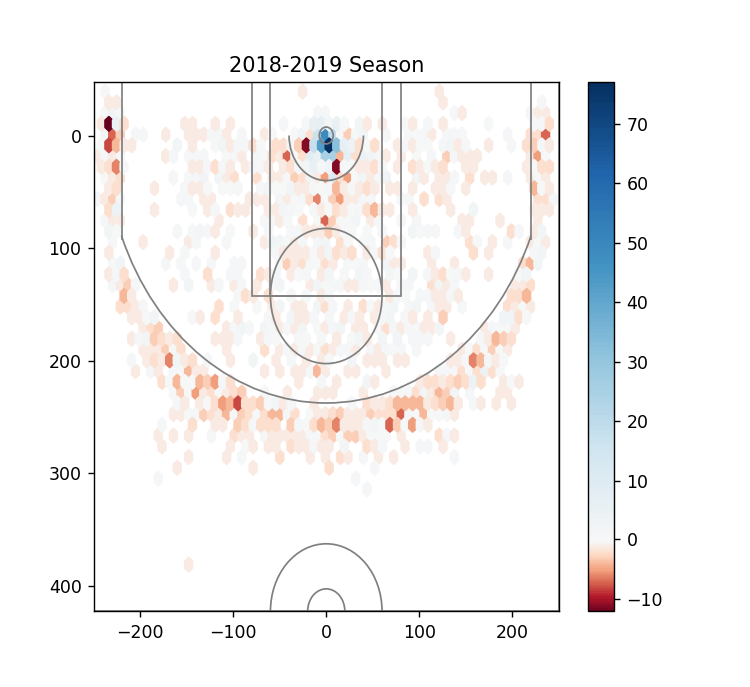

In [104]:
from matplotlib import cm as CM 
plt.ioff()
cmap = plt.cm.RdBu
fig, ax = plt.subplots(1, 1, True, True, figsize=(6,5.5))
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)
ax.set_title('2018-2019 Season')
draw_court(ax, color='grey', outer_lines='True')
# ax.set_xlabel('')
# ax.set_ylabel('')
# ax.tick_params(labelbottom='off', labelleft='off')

fig.canvas.draw()

norm = MidpointNormalize(midpoint=0)
plt.hexbin(xtot, ytot, make_miss_bin, reduce_C_function=np.sum, gridsize=60, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

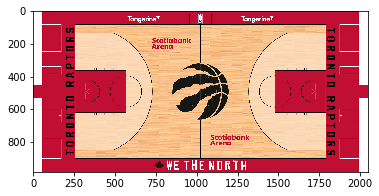

In [67]:
im = plt.imread("Toronto Raptors Court 2018-2019.jpg")data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoQAAAJ3CAYAAAANsUD4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsnXecFdX5/99nZm7ZzsJSF3s3GGN6M8k3Jt+YmOQXo181JjYUe0GxGwU09oYNKxiwY4u9gxgVCxYUEBGVtr3d3bu3zL0zc35/zN16Z+5d2F1Y5Lxfr31xuXPuOc+cOTPnmVOej5BSolAoFAqFQqHYetE2twEKhUKhUCgUis2LcggVCoVCoVAotnKUQ6hQKBQKhUKxlaMcQoVCoVAoFIqtHOUQKhQKhUKhUGzlKIdQoVAoFAqFYitHOYQKhUKhUCgUWznKIVQoNgNCiJAQYpYQYo0QIiqE+EgI8fteafYTQqwQQsSFEAuEENt1O3aIEOLtzLHXe/1uXyFEe68/KYQ4yMeWXYUQTwkhGoQQzUKIl4QQu/VKc6YQolYI0SqEmC2ECHU7dpkQ4lMhhCWEmOaR/2lCiK+FEG1CiMVCiJ/nqJdvCSFeFkK0CCEiQogPhBB/yFefCoVCoegfyiFUKDYPBrAO+CVQBlwMzBNCbA8ghKgAnsh8PxxYDDzS7ffNwAzgqt4ZSyn/K6Us7vgD/gi0Ay/62DIMeBrYDRgNvAc81XFQCPE74HxgP2B7YEdgerffrwLOBZ7rnbEQ4kcZGw/OnOcs4EkhhO5jyzPAKxk7RgGnA20+aRUKhUIxQCiHUKHYDEgpY1LKaVLK1VJKR0r5LPA18L1Mkr8Cy6SUj0opk8A0YG8hxO6Z378qpZwHVPehuKOAx6SUMR9b3pNSzpJSNksp08CNwG5CiBHdfj9LSrlMStkCXAYc3e33c6SULwBRj+y3z5zHB9KVRZoLVOA6ez3IOME7AHdLKVOZv7eklG92S/NHIcTHmdHDt4UQ3+527HwhxJeZEdflQogDux3bWQixMDPC2SiEeKTbsZ8KId7PHHtfCPHTbsdez4yAvpXJ9+WMnQqFQvGNQjmECsUQQAgxGtgVWJb56lvAko7jGWfuy8z3G5JvIe7o3JwN+NkvgFopZZOXLZnPo7s5jLl4AdCFED/KjApOBD4Gaj3SNuGONt4vhPhLpk66n8t3gdnACcAI4E7g6W7T118C++KORE7P5DM2c+wy4GWgHBgP3JLJczjuyObNmTxvAJ7rdW6HA8fgOrFB4Ow+nLdCoVBsUSiHUKHYzAghAsADwBwp5YrM18VAa6+krUDJBmZ/ENAILOyjLeOB24Czun3d25aOz32xJQo8DrwJmMBU4HjpIaKe+e5/gNXA9UCNEOINIcQumSSTgDullO9KKW0p5ZxMnj/O/P5RKWV1ZsT1EeAL4IeZ36aB7YBxUspkt1HHA4AvpJT3SSktKeVDwArgT91Mu1dKuVJKmQDmAd/pw3krFArFFoVyCBWKzYgQQgPuA1LAqd0OtQOlvZKX4j0tm4ujgLndHbBem0227fb9SNxRtJkZx8jPlo7PfbHlONxRwW/hjq79A3hWCDHOK7GUcr2U8lQp5U64DlwMd5qZzP+nZKaLI0KICLANMC5j/5HdppMjwATc6Wlw1zgK4D0hxDIhxMTM9+OANb3MWANUdvt/99HMOK6DrFAoFN8olEOoUGwmhBACd5PFaOCgzPq9DpYBe3dLWwTsRNeUcl/y3wb4FV0OFQDdN5xIKddm0pbjOoNPSykv75VVD1syn+u6TSnnYm/gmcwImyOlfBGoAX6a53dIKdfhjlZOyHy1DrhcSjms21+hlPKhzA7su3Gd6hFSymHAUlwnECllrZRykpRyHO6U80whxM64azC361X0tkBVH85NoVAovjEoh1Ch2HzcDuwB/CkzHdmdJ4EJQoiDhBBh4BLgk44pZSGEnvneADQhRDgz9dydI4C3pZRf5jJCCFEKvAS8JaU83yPJXOBYIcSeGcfxn8C/u/0+kLFFA4yMLR27iN8HDhBC7Chcfou7VnKphx3lQojpmQ0gWmbzxkTgnUySu4ETM+sRhRCiSAhxgBCiBCgCJNCQyesYuhxJhBD/l5kOB2jJpLWB54FdhRCHCyEMIcShwJ7As7nqTKFQKL5pKIdQodgMZEa0TsBdj1bbbQr37wBSygbc9X+X4zowPwIO65bFEUAC16ncN/P57l7FHEnfNpMcCPwAOMZrOjkzqncNsAB3OnUN7lrADu7OlP834KLM5yMyx+YCDwOv44aPuRk4odtaye6kcHclv5pJuxR3jeDRGTsW464jvDVTJ6u6HVuOu+5wEVAH7AW81S3vHwDvCiHacUPsnCGl/DozyvlHYAruppZzgT9KKRv7UG8KhULxjUF4rO1WKBQKhUKhUGxFqBFChUKhUCgUiq0c5RAqFAqFQqFQbOUoh1ChUCgUCoViK0c5hAqFQqFQKBRbOcaGJC4uLpalpb1j5SoUCoVCoVBsHDU1NY1SypGb2w6x7TBJ0tr0BTfEXpJS7r/pC+7JBjmEpaWlVFdXD5YteZk+fTpTp07Nn1Ch2AAGo12ptqpQ7UqxpbC525UQorda0OYhacFBE/KnG2jueLcif6LBZ1CnjJOL38JujQxmEQqFog9YTY3E3397c5uh2MqIvf0GdltvSW6FQjEU2aARwr4ipaTtgTtpf3wOevkIKq6+B2PkmMEoSqFQ5CFdtY6qk47EjrYy/LjTKP/7MZvbJMU3HCklzXfMIPLIXIyRo6m8fS5GxajNbZZCkRehiU1e5lCJBj3gI4TScYjMvIrYfx4Ay8JuaqDhzCNJr1890EUpFIo8mKs+Z/1xh2G3NEE6TcvsmTTedgMqIL1isJCOQ8NVU2l9/EGwLKz6WtZPPIT0+rWb2zSFQpGDAXUIpWXRfM2FxBc8jzST7peOg9MWoWHK0aRWealVKRSKwSD56cdUnXQkTrQNMg6gNJO0PfkQDVdegrTtzWyh4puGTKepvWgy7a++gExm+gDbxm5pZv1xh2F+8fnmNVChUPgyYA6htG2app1O8v03ocMZ7DwokfEYjRccj/nZkoEqUqFQ+BBf/A7VZ05CJuJZx2QySfv8F6m9aLIaKVQMGNJKU33mJBLvLeoaEOg8KHHao1SdfCTJ5Z9uHgMVij4gNLHJ/4YKA+YQ2nXVmJ99AinTN41MJog9O2+gilQoFD5EHp7bNULjgUwmib/7FnZz0ya0SvFNJr1uLeZny7KdwW7IRJy2Jx/ZhFYpFIq+MqCbSoSm518cqQYkFIpNQP4bTWgqLr1igNH1vElUF6AYsojNs6lkqKB6BIVCoVAoFIqtnEEJO6NQKBQKhUKxpaFGCBUKhUKhUCgUWy3KIVQoFAqFQqEYogghdhNCfNztr00IMVkIMVwI8YoQ4ovMv+X9KUc5hAqFQqFQKLZ6BAIhNv1fPqSUn0spvyOl/A7wPSAOPAmcD7wmpdwFeC3z/41mgB3C3PvHpCOx49lx0RQKhUKxdeB4xMZUKBR9Zj/gSynlGuD/AXMy388B/tKfjAfMIdSGlSMCQfDxdqUjMaMpogsXkljy4UAVq1AoPAhP+A4iHPZPoOtoRcVoxSWbzijFNxp9RAVC1337gA7iby0kuVQJFCiGIGKzBaauEEIs7vZ3fA4rDwMeynweLaWsAcj82y/B8IFzCAuLGXnjXLTyEaD1jEXl2A5mWwqkK21Uc9YJxN5+Y6CKVigUvSg/6njKDj0SEfJwCg0DY9QYxs+ehxYKbXrjFN9I9NIyxt/zMHr5cP94hEJAOkX15EnE3nt70xqoUAxdGqWU3+/2d5dXIiFEEPgz8OhgGDGgU8bG6HGMmnE/+phxYAQAcCyHVDTlaql201Otu/gsoi8+M5DFKxSKDEIIRkw6jeEnnIHo7vQFgwS33YHxsx7BqOjXy6RCkUWgchvGz56HMWpMZx/Qg44+IJmg7oIziL724ia2UKHIzRCXrvs98KGUsi7z/zohxFiAzL/1/Tn3Ad9UopePYNQNcwlstxOOI0i1pzyXFkrTpOHa6UQefWCgTVAoFBmGHfIPRp4zFREKIYJBwrt9i8o770cvLdvcpim+oRgVoxg/6xGC2+0AOdRwpJmk4Yp/0vofJWWnUPSRv9E1XQzwNHBU5vNRwFP9yXxQdhlrRcWMvPpubII595lI06TplmsHwwSFQpGhZP8/MfpfN1C8/58Zd/MstILCzW2S4huOXlpG5R33IfK0NWmaNN50zSaySqHYchFCFAK/BZ7o9vVVwG+FEF9kjl3VnzIGTalEhMJowyuwW1tzJ5TOYJmgUCgyFP3kFxT95Beb2wzFVoRWUIgxfATpWHvuhKoPUAwVhrCWsZQyDozo9V0T7q7jAUHFIVQoFAqFQqHYylFaxgqFQqFQKBQM3RHCTYEaIVQoFAqFQqHYylEjhAqFQqFQKLZ6BBscBuYbhRohVCgUCoVCodjKGVyH0On/7jHpODjt0QEwRqFQ9BenPYqUuTXL1f2qGEik4+Dk2ansJBPIVGoTWfTNoi/3qx1ty3m8L9dIMfQZNIcw+cmHWOvX5AxMihAgIPbiY56HZTpNwyVnsv7Q/8X87NNBslShUPQF89MPqDlyf1quuxhpW55poo/Noebw/Wh/8QnP44qtC2PseAgE/RNoGvrwCt/DMp2iafpkao85gNSqzzzTWHW1rD38z6ybeAh2pKW/Jm9VJD9+l5oj9wdA2rZnmuY5d7H6Dz+n7Rnve9oxTWrOPpnVB/4G8/Plg2brJmHzaRkPCQbFIYwveoP6809G69A593IKhUBoUDAiTHTuLbTPu6fHyIOTSFB3zgkkPnzHlTmaMmkwTFUoFH0g8c5CmqZPhnSKxLsLabr0TGTK7DwupSQy+yaiD98DUtJ2z420zZu9GS1WDAXG/OsGQrvuDl6a2YaBXjGK8bff5/lbJx6j4YITMZd+iEzEabzgBMxPP+iRJrX2a9Ydewh2Yz3p9WtYf+yhWPW1g3Eq3zjib8+n+bIpkHZHVpv+NQWZ7hpllVLSeNPVRO67G6SkccaVtNw/q0ceTjxG9WnHkFyyGBmPUXXq0SQ+fH+Tnodi4Bhwh7D95WdovOwcpJlECNHlFIpuXrCmIXRBwfACNF2DlEn7U/fTNus6pJTY0TZqTz8Kc8VSMN1OR5pJAGKvvzzQJisUihzEXn2G5msv6rwHMZOYSz+i4YITceIxpG3TMmM68ecf60wjzSTt8+4lcvf1eaeYFd9ctMJCKm+5l4J9foAIh7sOBIIExm/HNrPnYYwek/U7uy1CwzkTSX+1AjIvHjKZoGn6GcQXvQ6AuWIZVZMOx2mNuMuTLAuroY51Ew8htXb1Jji7LZfYS0/Scv0lPV7qzE8W03DhSTiJONK2qb/sAtqeeQyZ7LqnW+69g8bbMv10pIX1kw7H/OJzZEc/nUhQc87JtP93/mY5r4Fgax4hHNBdxm2P3U9k9i2djQPIOIUSRwikDQiBpgvC5aGeFWEmSSx4Dqu+jsSy5diNDWCls8pouvpinLYIJX8+ZCBNVygUHkSfmEvbA3d1dsqdpEzSX6+kfsrRGCNHk1q+pMthzCDNJPGX/oPT1kr55KkIXd+EliuGCiIYZOzVt1J/+UXE3ngN6UhCu+zGuBvvQissykpvN9bRcO5x2C2NYPVcmiBNk5br/kly/4OJPPIgMpno+WPHwWmNUHX84Yy76R5Cu+05mKe2RRJ99F7aHp7lfU9/uYL6KUfjBEpJLvW+p9uenEe6uhrzs0+xm72uUZL6aefinPVPSg/4y2CfjmIAGbARQquhjpZ7burhDHYghEDTQAtq6AFBeHjI2ys2k8TfWohdV+PpDALIlEnzbddgR5oHynSFQuGBVVdN2/13ZnccHaRT2FVrMJcszuo4OpBmkuSiBSTf++8gWqoY6ghdZ9TFV1J64GEU/fjnVN5yr6czCBC563rsxvosR6OTlEnL3FnZzmAHUuK0R6mbeu4AWf/NwapeR9tD9+S8p82vviLxcY57Opkg/t/XsBvqfK+RNE0arp2+RW40EUJs8r+hwoCNEMqUiTACyLS3IyeEQA/qBIpDubUrJZBniknohm85CoViYJCpFMIweqwryk4kQeSZEta03HkotgqEEFScMiVvOplMDIi+sePj0GzNyHRHP53jfrTtvH2wm1meflrTVD+9haHiECoUCoVCoVBs5SilEoVCoVAoFAqhtIwVCoVCoVAoFFsxaoRQoVAoFArFVo/SMlYoFAqFQqFQbNUM6AhhXwLQSinpr/+tAt16I6XMu4W9L2k2lS2bMp8tiS3tGvWhoAGxZSDsHUr3yEAxlOpuU+YzVPimnc9AsUX202oN4cDQPv8lrNZ2pOPdCBxH8tmSJO+92kra9AkpIKBkXCFFY4p9y3EsB7MpSnS+UizpTnLpx6z+4y9oe9ZfQ7b18QdZ/adfYq701gQdUFsO+AVtzz250XlIK03txWez/pj/w26NDKB1Q5v2px+m9ojfkfry80EtJ7n0I9b/9Ve0v/S0bxpn6RuUjAmgB/0DShdtU0rJDqUI3f8hKmSKxOvP+WqlWl8upf2cA0ktetE3j7bHH2D9wfuRWrXCN00+7JZGGs84lNaZlyMd72dQ4pOPWH3AvrS94F8v+ZBWmtp/nuWW2da60fn0hci8+1jz519hfuHdXmQ6Te1FZ7J+4iH9ssVc9jE1f/8tsfnPbXQefbVFKxsGRp6xinwOmNDQS0s3wsoNI/lp5j56+ZlBL2sgEAVFSJ8Yvx1oQYNgcQDfkRsBweIARmEgd2Hp9BatWLI10m+HUEpJ8+yZtPz7LgDstIPTyym0bcnyT9I0NzjE2yXvzY+SjPd8IAstI2UXMAiWhigeX+rZINNxCyQ03nIjTXPu6a/53whi775F9eTjcVojNN54JS0P3NvjuJSS5lm30TTzRpxIC1WnHEXi48WDY8s7b1I9eRJOW4TGG67IsqUvOGaS6rNOJP72QlKrv3T1SRvqBsHaoYOUktb776B17m04rS00nj8Jc+mHg1JW/N03qT/3JJy2VppvuoLWeXOzbEk9dy/WgnlouqB4fDF6uJdTKKB4h2EESoPo4QAlO5UjjOzHiRbSEQjSny8hcu35WXHJ0kvfJXHzORBrw3zoJsxX5mXZ0jL7ViKzbsGJNFN7xjEkP9nwerHqqmg65yjs2ioSb75C5NrzsmyJLXqDmjOPx2lrpfG6y4g8PNcnN3+cZILqM48nvsgNxL3+2EOxGus3OJ98SClpuutmmu+8GbulmaqTjySxpGe9uLZMIv7Om6S+ztxHjQ0bXFbi/TdpmnoaMtpK621XEv3Pgxucx4bYMuzE8whsvzMEPfSPAREKM/K8qWilZSA8ujDdQB9RwZirbtlgOzeE+KI3qD8vcx/NuJy2xx8Y1PIGAmPUWMrPuMS3bjuUxDRDI1gazuqDhSYIlYXRdIEeMgiU+OSToWnGlUTm3T9A1isGm345hNJxaLzxCiIP3tsjqrmTdnBs1+GzLMnSj9JE2ySO5SBth1RS8v78NuJRd8RA6IKC8jCaJhBIBJJAYYCSbco6G6Sd6jm6IM0kzffMpOGma7fMoekBIvrqC9RdOLkzar80k7TMnknjba6GrHQcGm+4nMhD/+7SmU0kqJlyEu1vLhhYW155nrqLJvfUvpw9k8bbbujzNbLbo1SddCRmh2xSRp90/cRDSK1bM6D2DhWk4xCZeRWx/zwAHdcomaBx6ukk3ntjQMtqf+0FGqdP6aE53PrvmbTcfVNne0k9ehPphY9D2lUzEJqgeFwxRqHR+f+SHcsxCgMIQCDRAjqlOw1DC2YeKQK0oJ65faWrf/zJezRfehpOpq2m3nuN5F3TulQT0iapZ+8l+eRdnbY0z/gX0cfv77I3maD+/JOJL+p7vaTXrKLp3KNxWpvBsSGVxFzi2tKRb/Tl56j751k96qX57ltoumNG39tutM1tu8s+6czHqq9l/cRDSVet67O9+ZCOQ8O1l9I6775u93ScmrNOIPb2G91sOQJz+aeZ+yidseWQDbIlNv95mq86v6uclEn0/ttpnXvbBtZL323RiooZedXdBPf4NoTCPY6JgiIq/jWT0gMOYvysR9BHjAC922hiIEBgbCXjZz9CYGxln89zQ2l/+RkaLzunR3uJzLqFllm3Dvn+qPCXv2P4BdcgetVt56irlCAlmi4IlYY7p1CFLgiWBjuTCSR6QCNQ2iufbkjTpPnOm2i66+YhXy8dbM1axhvtEErLom7auUSf/0+nA9Adx5Ik4zZLFqeIxVxnsPO3jiSdkixeECWZkBSUh7MqRSAxwgal2w3DTjtYyezpJplMEnnsYeqmX+g7HfVNpvWJh2i48mIfvcmHqb/8IuqmnkP0haeyrpE0k9RPPYe2558aGFsef4iGqy7Jki50bXmIhisvyXuNrOZGqo77G6mvV/UQXce2sSMtVE36G+YXGz9lOBSRlkXz1RcSX/B8tlRUyqT56guJvfbsgJTV9uRDNF8/zfMaRZ98iKbrpmHOuQxr8audzmAHQhMUjSkiWBqkZKdy9LCBoOsBL5AIQ6Nkx3L0kI4W0LNn9VIm6VXLab5oEsmXHsK8/7qsckiZpF9/kuTca2mYfg6xV57zbLuNl53Tp2m61IpPaL7oeGQs2nMtY8aWpgsn0XL/LBqunupZL62PPUDDNdN9p5g7sJoaWX/cYaRWf4lMdVOBsG3slibWH3cY5qqBWQZQd/FZtL/8rGe91F18FpHHHnRt+fqrftnS/vTDRG67IkvmTJpJYk8/TORW/6n3DqzGho2yRYTCVEy7mfD3f+Y6hUIgSkoZee0sgrvvBZBx/OZhjB0HgQAiGCK44y5U3vMQxvCKvOe3sbQ9/gDNMy73vo8ev5/mG/+Vt142NwXf/ykjLrsVUVDY80D3e0RKhOY6gVpAI1gSzF4rKSW6IdzRRB+kmaR13n00XHvpkK+XrZ2Ndggjj95P/M3XPZ3BDlYuT5NMSqTt0QgkWGlJ2dgC3wW5AomTdrCSPpqWuCMG0VdfpPWJeb5pvokkVyyj6bYbPLWjwXWW2195ntgb832vkTRNGq+7jNTXX/bPls+W0jTz+ty2vPYCbc88njOfukvOIV2zHrzkjjL6pNWnTeyXrUON9v/cT3LxfztHBrNImURmXkV63df9Ksf87FMid8/wv0ZmEmfJAqyli7KdtAxCExSOK0YLaj2cwc7jZGbwRI4lXukUTu0aUk/d41sOKZPoi0+TeGdhDo1kk+Yb/0V6rX+9SMtyRwGTcV9bzK++oPnum3O33ZefI5pjbS5A7cVnYdVW+7fdaBvVpx2bM4++El/0Zs57uummq7Bqqrz14DtsOT23LeaKT2idc6uv5q00kyQWvkj8ldxrLWsvPgurpnqjbBGGwfBzr6BovwPQR4xi1I33Edhupx5pjOEVjL/7IYI77kL42/tQOXMOenFJTpv6g7lsCZFZt+TU7o69+hztLw7Mi/ZgEtpjb0ZeMwu0zHIQzxE8d8NMoMjDGexMIvNKDcpkkvaXniU6QAMQg8nWPEK40buMndbWnqM4Hli25k7R+CAE6Eae3XG2jTB0ZNo/H5lKDfri7aGGE21FBAxkrkvQh1FTEQjgtEf7aUsbGAHw6VTBvUZOnmtkR5rz2uzEYxtl41DFibZCKrfOrzACOLHBv0YCB5HjfgVA1z2dwU5k5i8HwrHzpnHSFlj+L4IA5Gu7dv48pGXhv3o+kyadzvt8cVpa+tB223Me7yv5nrtuYbk76Hz3kWyPupq3OcqSaQunvS13OZGWnH1APluEpjHspPORJ/rv5NVLShl/z8Nu+kHe7WtHW90NLzkugbTS7n29BRDYfmf00WPzpstXrdKRoOs57wFpW3n7AMXmRQWmVigUCsWQJp+jp8K+KAYEFXZGoVAoFAqFQrE1oxxChUKhUCgUiq0cNWWsUCgUCoViq0dpGSsUCoVCoVAotmrUCKFCoRgwUmg0hksxdYOgbVGaihNy8uwWVigUiqGA2lSycYhgsGeEeK/MRZ7YRPRB914I7ziG3TEMRNBfV9FujdBw/vHEFrzgmyb1xXLqJx9B+usv8hjUP+xIC1WnHE305Y3XBAUQgWAmZEbelDmPOvEY8Q/e9T2e/Gwp6449FPPLlb5pzI/fQSZ8Yr11miFIfvCWb2BSu6UZq642dx6AyNPmYi89ScNFJ/c7lE4++lIv0Wcfo/bs43OH5giE8t5HWBbCCPoeNlcspeYkN6C3H6lP38t/jaTMfz/6xBtLovO2Ucndhd9lwfi9+GDULiwcvxcP7fZL3h29Kwm9y34pBPlj05A31oUTj9H+nn/bNVcuR+YJeSIQecOiYOju8y5XPqHcEl4AOA7pNf7XqM/kay99UYSwbVKr/W1JfviOf/zGznIcYm+/kTPYcN/qxSa9ZuNjoUorTd2/LqThpqsHPfCxCATdcEa50HU3XT9IrfiU+jOPJL32q37lkw+rqRGrPr+0Yt4WJcgbdkloWs5+WrH52WiHsOyQfxDcaRdEDk3EXb8dxgjmilILny9qwbG9m5tEoIf0zPPNJ3h1KER49z0ZdtBhnsethloazvwHqRWf0Hrr5bQ//XBWmuSS92m88ETSX66g4bzjMJcv8bW3P1h1taybeAjJpR/TcPW0fmk8hr/9XYp/9ydE2CdCfJe+EGg5LrOUtMy9i8ij2Tqc8fcXUX3aRFKfL6fqpCNIfvpxVpq2ebOJv/QEelDzv86ahtAF9rpVrgxWL0c2XVvDumMP6Qr26heoPBRm1KXX+p5K27zZtN59A6nlH1F/1pHYLY2+aftDVr0sza4XgJaZ12F++iE1J/8du9nblpK//J3AdjuCTwciQmGK/vh/BHbazfN44oN3qJsyidTKz6g9/SjMZdltN/7kv0n992mMsOF/jYQgXp/ASlpIv5cIXUMbWwq9NIuX6RXcE/4OERHm0PRyfjT+Sw5Y9z4Hr3qLg1a9RUo3eGTXfVk6fFvQNGTAwNh5FBi6ZzESQbAoCJrwbbsSV9e8buZtND2U3XYTixdRf/4pWO0pf/9ICLSghlEQyNHmQoR3n0Dpnw7yycQmWJ6QAAAgAElEQVRl1D8vRyspzfmsMwp1Gs45jtSKT3PmlY/gDjv5O6hCoAX1fO+BaDrUnnYU5mc9bZFS0vbgXcReejLjWPq3F8eSxJcsoW7aub4vp6MuugKtuCR3vRToNJxzLKnPl+Y22gPHTFIz5SRiC14h+sxjOW0ZCML7/JDCX+2fLfvWQTBEaPe9KP7DgRtdRuLDRTT+82TSqz6j4eyJpFYu2+i8cpGurmLNPw4i2ZD75VlKSTrHfSSFwJGCeNz/XUSEwoT2/DYlf/xrP60efIQQm/xvqLDRDqFeXELl7XMJTdjbQxMRAsUByseG+cGvSwiGBULvWZQQUD4M2usTfPFOE7bVsyVJBLZpUbekAStpY3s4jSIcpuB7P2T8HXPQCouyjqfXr6bhzCOxmxrAtpEpk7a5t9F63+2duorxRQtovvTMLi3gRJymS04lsfjtja0aT1Jrv2bdxEOwG+tdW8xkvzQehaYx8uyLKTvsKG9Nyl66lJ4i8J3GpWi+YwZN93TpcLYvfJXa80/vqpd4nOrJk4i9899MtpLI3dfTPu9eSJkYYR3dy+HQNFcovchApE2SH7xN4yWndjp/qTVfsf7YQ7EbG7qC6UqZlY8oKGDsdTMp3vfXWeZ3t6VD/9iur6F+8hFYtVV9qc4+077gZZ96ebPTluZbr3Y/d2gx19ZQc+LfSNdk26IVl1Bx9SyCu03IFpwPhig5fBJlx5zu+dCILXyFhovP6GZLjLpzTyD+/tudtrTPnUH86fsQ6RTBEoNAkYfzIwSOA1YiTdPyRu+Hv65h7D6K0HfHE/zZDhByr/UKfTgLA9tyqLmc/5VfsfQ3ZXy23zg+Pmx77IBGSTrJvtXL+euqt/lk5A58Nm4HRpyyL+EDJhDYZ9ssp1AisEyLRFMi85JBllMoJaRiFqn2NDKZpO7Ga6m/vavtxha+QsMlrr63k3a8nUIhQLoP/2BJAKMwu15EOEzB93/CuJvuQest8dWL0M67Mf6eh9HLR7gBentkBMHiIEbQQCZiNP7zZBIfvpMzv1xU3j6X0B57eT539QKDYFGAYEnGofZoN3pAQ9M1t71MmUR88SLAbS+td1xL+xP3uQol0jvKuERgpx1SbUlkMkn8rYXUnH0SjkfQ89AuHfUyPH+9XHTSBtWL3R6l6pSjSX76MdLsZss5J3vaMhAITWPE2VMpOfBvWfUvQm57GX3NHWjhgo3KP/7fV2i+vJtGciJG44UnkvzIfyR8YzC//II1RxyM3dSEk3IdaOlkP3ellCSbk6Tb05iRZFZfJRGkkw5rlsdoqE7R1ipxejUZEQ5T8KOfMW7GXRtdL4pNgz5t2rQ+J77++uunTZkypfP/wjAo+e0fSK36HKuu2lUFEBAsCRIscoeGA0GNMdsEaahKY9vC1UcUMLwcOl5yzZhNW6PJ8PGFaJpwO4WE6ww6addJkI5k+Z57MWHlMnc2KRym+H9+y7grb0ALZA9Dp1atoPG8SdkaprZFetVn2I212M2NRG69PFueybZILFqAMXocge137nP9+GGuWEb1yUe505i9bDE/X45VV0PhT36xwW8KQggKv/tDRGERyY/fd4fsuzuCPRPnHjWwLcwVy7Dqa7Ea62m8Znq2nJdtEVv4KvqYccSfeoDE6y92PriEEOiZkSOnY4pfCLSQTqBA7zo328aONJF87020UeOpmTwpu1467XUdAq2omMpb7iU84TtZZkvbpuXGaT1s6Th/mUwQn/884R/8DH3YcN9TX7hwIb/61a9yVI5L61OP0njtpdn1YlnEFr6GPmYs0XlziL/2Ah+P34XvrMnoLksHmUwSe+VZCn60r9s5dj9Vw6DwV78n/dXnWA217pRUMMSwE8+l+I+HeNoSffYxmmf8y9OWxH9fRRtTifn8g5hvvwKpbtcoM3rkdCr/CBwpcVKZ/0tINCUIFAXRQxk9Yl0Q2HscgZ1cfVgR1NHHldJQa/GUthMHmysYZpi8vv9Ymke5nWS8Ikzz9sWMWdqCZktCmmQHo535Yyew/TZByooExrblYGjYVRFwpDvql7BJNsY77RW66KF+IiWY0VRPbXPLIrH0E6yGBmSkjpYZl/dQ2JCOxEnbaMFMO+y8z2RnOUaoZ72IcAHFv/4do6dejTD6ttRaLy2j+Ld/IPb6KzjJJJ/ssDvf/no5wWJXC7YT2yLx9nyMcdtkSbHlY+HChfzPb35Lyf8egLlyubvMIjOFaRQaBEKurUJzr7WTdjLOr3uuekDruUbKdtuLPnY8scfuJfHmK76ybODWmJ1xsrvnYTc2EFv0BiX77Z81etmzXhLui1/GGdzYerFamqg+8R+k162GdLYt8Xf+S7GHLQOBEIKC7/0YAkHMpR+CbSNCYQr/Z38qLryiz+2lN+3PP0bk9qu9+6O3XsMYvx2BbXfst/2JpUtYf2KmP8rcA0t3ncAeS5a4GuWZwRvpSBLNCWRmsEbaEjtlYxQYCOH206mEzdrl7XQsE07GHaSEUIHmPsLDYYp/8wdGX3xlzuU+06dPr5k2bdpd/T65fnLZjVdNK/jpdpu83NiLK4fE+fd7l7EwAoy+7HqKf/07AIKlQQKFPR20YFjj+/9TTEGRQGgwYjj09uFizSk+e73effOMpqhdUo9jZa8HsdMOEij9418YM/0qRO+3Tlw5sMYLjkfG2z3HsKWZJP7as7TecY2vVicpk8itl2Mu854O7Ct2a4Sq047BifnYkkzS/vKztNx7x0aXMez//s7I86Z3y9RjxDGP1mSHLdHn/0PjDVfk0Lw1ablxOom3XvPsOIywgVHg3vh6yCAQ1rMd3VSK1NerqJ48ybdeOkYnRChE5d0PEdptT097Wv99C8lF8707MSmR7W00nHuc2xH1g/i7b9F0yzU5tYCbrrmE+Buv+tji4ERbqT39KJxEti3CMBh+wdUU/vJ3oOsMP+dyin77Z8+yEu+/TcvM63Jeo/aZl5F6//VOZ7A7HSNIUoLjdHMGOzOAyBfNJFtT7mj/97fB2K6XExsOMH/YLvxEr6UslOS1P44jMqLnCGdku2LenbQrTtjAGFfGDpO+z++/r/Pc4q7ygt/dltCvd3dH/drTJJt6rlsTQqAFBOjCHa1oS2GZ2W1ZJpNEn32Clluv8ZRbk7YkHe02UujR5jpH1oDS/3cwIy+4zPP5kgujYhTjZz2CMWqUm2dJEM3weMymTFpumo654pMNyr8DEQgw5vIZFP3CHTE3igyMUM8OV2iCYHGg0//Vg5rngnlpmrRcfwmJd17P7QxKiW3aPZ3BjmMpk9SXK6k591TP33bWy8jRoImc9RK56dK80+rVp04kXV3lqR0tUybmqs+pOe+0nHn0l7JDjmT4GReBEJT89XBGnD0VkWt5Tg6S779J6+ybcvdHN0zt9/Sx1dTI+pMm4sSy5QKlI0k0xnHSNo4jSTR1OYMdOGmHZFMSx5Yk2m3WLG/PWoIbjdg011tICSV/OYyR503b6HrZHGzNWsYDcpWEplF+9PEUbTOcQIH3otFAUGOXbwUZNVrD7wUqEbVY/W4DdZ82IP3WFTpgE2T4Ucf7jqg50TbyLqJJp/M7SULDbqjJnSYPrgZqHq3UZNJ90+0HJf97AKKoKPeC8r5MTfehXoRGz7fyXhghg1BZqOfIYG9T0qn89khJ4U9+QXDb7X2TWFVrfB2jzmwsC9lPDeR0TVXfVlbnqBcAbNtX01ZoGsNOvYgxc16k4Me/9M3Cqq3OZ4g7smZld5YdBAoD2Gmn20hhNvFIkuB+u2KMK8s6FjUFNe0Gw39dwMsHbkd7qfd93z6mEOfsXzD8uJ+ghQz23EYQN6G+tasyA3uOJdaUwIx4OyMiswkl1pLCTuVom3butitt6a5KyNHuAoUBCiuHUX7EsRu9tkcvLWP4P44GQNP9H7FC07Eb8m+k8v+9+9wNjy7HCHo/VIUmMMKaO/KT63w04elcdcdsM7HiOdKk06Sr1/keduvlKEIjSnLWC5rujpTnwKqvyb25I50mXeVvy0BR/Ls/M/7x+ZQf572so69Y9dV59afRjX61FwC7pSVr+VYPJCQaEySakr59sGM5rF8ZZ91n7b63WyzqUF0NZX87ZkitkVPkZsDcdnd6J3d2mibQ8njDji3zd7yqgXkicq0T7Eo16HbAwG3dF8bWtStNCIFeNmxzm9GJ8HE0ltcH2K0ijR4QWME87a4g0PlsEELwrW0FS9f07EnyvRuIzJq/TUG+51if8tjIacMNLqcPz90BW7g+APUvDGNIjYgMBHpZ+eY2YeDJc637spnbcbbA6yzUCKFCoVBsEMvqA3xrdO4RJT8mbKexbO0m8u4UCoVC0SdUYGqFQrHBNMc1xpbYrN+I344th0jMXb+Yb8ZAoVAoNhVKuk6hUGwR1NbWkkrlWaO4iTBtQUjfuFE+IQQBHVJDQMDEFhr1BdlrJBUKhWJrI69DKIQ4XgixWAixOB7PE7leoVAMGk899RRNTU2b2wzA3YPgs+a8T9gODMBSvX4TN4K8su0+m9sMhUKh2OzknTKWUt4F3AUwbtw4tfBHodhMaJqGM8jSXH2lICCJpQRkx4PPi5l2HyM+QiWbFIlAbKrdKgqFYsizBUXIGXAG7NTT61aTamnPqboRj6bz6xJLJ58kIoZmka5a63s8tfZrzJboRimA9LYlp8JHHxCall/7ErKj+Pcww6Ft7q0k3lmQr7A+WDT4nZ8br8xyI9/7ISBYGsi76dn8cqXvdZS2jdWXcD3pFFZN7tVutZde5Bmbq4PUymUI8l3H3HUrpSTVGiO9zj8chrnyM+quuBjHI0yOYRhYlkVq1TLA/yaRUhKri5Ns9Q/HkzIdVq1Mk4j722yMLEaEvXd571BusbIxgF0cZnRRiW8ejiO5bOEK/rOqK3zT51WSHcd07XyVmkHZqQehV470zUcvCFAxYYQbTseHUFmoM46gF1JKzEiSdKxrM4yt6ejdnGzpSNKRGFa1f3tJfr48b3vp045/x8mZzm6NUHfZhaTWfu2bJr1+DdLMHWPTTtvYaTvn89AxLRwrd5vS9DzB7SFvvLnUymU5wyEBCMck/fXnvsft1ggyz9IJoQt0J4GTT7+7n9iRlsw1Wt2/jPrQXmQqibnqs34VY67+0jMOandsy8nbXkZUhigu948AoWlQXu7kfe4qhhYD4hAmP/2IhkvPwzEtUtG0pyPQVJWkrSHTofos2iwu0QCB7bhTSl4ESwLoAUHtBaeTXJ4dvDSx5ENqLz4npy0IAcWl6GPG+2rIEgxibLM94R/83Pt4HzHGjad4v9/n0BzW0ErLKD9ikudhmU4TufY84i8+SuvN04i9/IRvWSNOP7cPYvI5tKU1DVFSSmDc+C4Zmd6/DoYQI8cjCos985GOG7xW2hI7aXm/AAgwwgGMggAFFYU5Oxlr/VrqLs3WP5bpNM1XnIvdlF+YHaDp0smkvlie9X38w8UAtL3wDGuOORSrpTkrTesjc0gseNGV1g16O+4iGMKo3B5RWORbL6mYhZN2qJp8Isnl2bqtiY8XU3XKUbS//CzrJx2O3cuWwsJCmua/QPLNV9B1gebhrEkpSbbbJFtNWtfFiDdnx/ZLxm3eebGV5kbJsk/StEezr1F4x3JG/f077jCehxLQhFFpPm4O4YwcxsjCErYrHZGVxrIdbnnua+Z8up6/v/gR93y6BoClayQTts04g0YAttuL8L57U3HdKQR2rszKxyg0GLZLOcWVJYz72fie6hYZisYUUVpZTKgsRHhk9rCllBIr6WDF0iSaEqQywZUTRpCw7X6WjiQVTeGkbOrOPwVzpUd7+eB91k06grYXnmHtMYdhR1qy0gAU/Hw/94NH3QEQDGFstxOh7/3U87DVUMf6Yw+l/dUXqJp0OObn2baYn35A5MapnlKPHaSTFnbKycRgFN6dvBDgSJyUg+0hBiAdiZ200XStU+nGCxEKM+L0870PAtHH5pB489Wc9mpBHQEkXnyU+GtPZx236mtZP/GQnHGKNEMjWBJCw6bh7GOw2yK+afuDVV/bdY2O975GfaXg57/BGFPp3x8JAY5D7OmHib36zEaVEV/8LnWXXpSz/m1b4tjg2GD7tJfC0UWUjQoxfo8iykZl26sbMHbbIEUlGnVnn4i5sn9O7KZECNCF2OR/Q4V+O4Txd96g/ryTkImMsnXmodrhiEkpqVuTpH5t0v1OZuIM9qqEklKNQKBr+sa2weoWx6gjuaa5MkwyHqP69InE3l/UmSb29hvUnHVCpy3SkZjdbHEz0NHKKxg94z5G3XQ/wZ33yNaQDYUI7fEdRl51t6dG8oYghGDkhZdReuBh2dqjuoE+ooLxsx4huH22JJE0kzRfehrmkvfcCPYpk+i/b6L9sdmeZZX+/s+MmnaNv/C6m6v317qBPryCbe59lPGzHyW0255ZzqUIhQl/ex8q73qYkTf8G610WI/x9Q5nsHsRtmn3HHnQMg/9zGCDZmgUVBT22tnV9VmmTOJvzKfm3FM79UmdZILGi08m+fG7+QNBi6720njhiSSXvN95KPrGAqpOP979j2WRXreWtUccTLrWHc2SUtJy1wxa59zuql9Id1esHurpFIpQmPDe36Xy7ocZO/NBtF5xBDucQVeCTeLE2ll34lHE3u/SbW1/83VqppyETCRcW6rWsu7YQ11psowtxvqvaV70ekbNwB2x0boFgneVPFwHgMy9Fq2JE2voGhGItbnOoJlw3Otlw2dLLVojXY5AwZ6jGH3cD9FChnvfCXo4NhII7x6iNaERjYImBMNChexUNrLzyplpm2ueWMWydVFMyyZh2ZyxcBlXLvqSdY2S3SoFMhCGbb8NRgihaWhFYYZfcQLBvbruhUBxkOLtytx4XQICxQaVP69ED3ddg5JtSigdV9yVpjBAwejiHvWSTtiZGKfu8yfZbGK2pUjqQQqsFI7tkGpLdV4jGWun7sxjXUnIjvay8DWqzjih8xql1q1hzREHk67LDhaslbgbVQI77u7xfAkT+tY+jLzyTk+N5NS6NayfeAhWvStL58TaqTrlaBIfdtmSeGchTdNdvWZPBaTMOdtJu+ucbAfHpmcn30vqUqbsHk6he093vYwJ8HQKRbiAMVffQvEv9/O0JTL7JqIP39NNI5msUTEt1BGjUELKpG3W9bQ/OberXtauZt3EQ7Aa6nwD4WkBjUBx0D0tx8aqXpvRs+/bi2Nf6WGLbeG0R6k69WgSH72f/8ce6KXDGHndvQR22CW7vXS/RimTyO1XE33ivg3KP7rgVaomZ54vPs60ZWfiAGfKko7s6RQKKBpbnAly7vbFY3cuZHhlV39jBGDsNkGMgEBI6dbLKUeR+HjxBtmr2Dz0yyFsf/U5Gqefk6Uhi4RUWwrbsqn5Kklzda+o5x1vKMJ9gJeUaRiGyFIZcBywpMjoXga6ftuRTTJJ3fmn0b7gZaIvPUvdxWd52mK2uQ98jAD6mHGMmnEfxuhxaOECKi6/ndDeP+hyokJhwt//OSOm35THseo7QggqTplC+cSTu5ysQIDA2ErGz36EwNjsURGnvY2mCyeRXrW8p5xRyqT9ybm0zb7B8+2teN9fM/a6mYiCHCLivd8QAwEC4yoZf+88AmPGoRUWUnnTLAq++6POkU0RDlP4s18y9rrb0UIhApXbMWrGfegVo8EwujoOKbMeOE7KwbFshCbQAnrPvkRKNF2joKLAbY0emsvSTJJcspjq047Bqq+l4dxjSa1c7iHz5DH62aO9JGi+9EziixbQ+ux/qL1wSs/2YllYDfWsPfJgzK++pOm66USfejirTQkh0Ds0Y8NhCn/+K8ZeO9Otl222Y+wdD7tpDcN1NGLprHqRiQTVZ55MdMGrtL3wNPVTz86yxW6sZ92xh2Cu/pLIzZdhfLWCZPdbtsNBLQi4slORNLYle3aWjqS9PkFbbZy25jTvvhQhZTo9XpIcB1Z+ZtHcaFP8vXGMOmKf7JHQjFMogapxJUQqCtlhL50lr1vudKKAkmCYXcpHEzdt/jVvJavrE6S6vQwkLJtPVgZpC7QQKCqEbSeA3nPZgBYOUn7J0YR+tCfBshBF25T0eFkQuNPHlT+vxCgyGLbDMIpHFfbwLQQSI2xQNLbEdYzitvto6V4vUmK2mrSlNUIpk3Q0lX2NkgnqLzyN2JvzaX3mSWovyr5GVn0da484mNSa1Xgx8so7CE34buezRITCFPzol4yYeiOid8ePu2SgatLf3JHH7lPZyQQ155wMQOzVZ2i+9qLsZ13HFLyUpJN21/3YLY2U4FgZp7DD2+91v8q046rY2A52sutFpsc1COqddS4Kixh3y2wKv//jrPORtk3LjOnEn38s2166bNY6dLO725IyaX90Nm1zbyH5+XKqjj8cpzXi7wwGNQJFwZ6PgMx9VH/GP7Cq/ZcZbQimjy0ykaDm7JNpfzPP0h4ftMIiRl55J6Fv7QMdfY+XNn3KJPrgXbTee0uflkW1PvU4tRd79NPd2gu4Sj49xgsc6SqD2aLTGdRCeo81t5omGLVdAaN2KCQYEozdJuiufur1rKuZctJG18umRtfEJv8bKmy0Qxh7cz7NN1zqqRva8WCt+TxGa73pLYGTETgvKQFDz3YGO/KREkLFhu8spzRN6qafR/1Vl3hLmGVsSUVT6GO3ZdQNc9HLu6a3RCDAiIuuI/yz/UAIin59AMPPvSKnEPfGUv73Y6g46yLQdYI77kLlPQ9hDK/INtlxaLrgOKyqr71HwMwk8deeJjrnZs9yCvb5AZW3zcl+0+xRSDfpsG23p/LuhzC610swyJirbqbol791tTp///8YPe2aHgoMesVoRt44F61iTFfH4VseCEPzmW2SCE24Iw+9bOtMYbr6pLWTDsRa51MvZDujWSlSJvXTz6X+imneuq2Ogx2JUHXc/xGb/wIy6a2RLAToAY2SP/yF0VOv7lEvxsjRAOgjx5CO+deLNJPUXjyFhmumebddx8FpjVB38t+Iv/Ey4WSchNFrikZKEJBoTbl9k1dn6Uhaq5O890orVtpbCchxwBw/mhEH7YUW8FnPKqC6spTWsjBSg92+r2FbsPRtd72REBDWAlzx6BfUtJikei0G/lnRDgzXing2/hVm5Z7u3JJHg9BCQUr3/x6F40s9Y4IJJFpQZ/TeoygYHvJ8NggkIqBhJW23SfjUS0zqBOOJnNeo7pKzqb/S/xrZkRbWHn0oVlNjth2BICMuuZHwj38FQlD42/9H+dmXeT5f0lXrqDrlaJz2qM894LbFyG1XemveZn6TjqddfWqve8Fxep6q33M3beOY/msKBaAFdLTiYsbf/SDhPSZ4povcejlJH93zDvu0gJZRovGwN5Uk9uw8qk/4h2+9dOQRKAx69xOOjdMWof6so7Ej2UtCNoT0+rVUnXpMzmtUP/Uc4ovf8fh1fkQwxIipNxL+4b7dMvUup/25ebTdNzNnfm0vPkf9tZf7943gvkT6lIPjIKW7JEMP6AiPNJoGw0YGGDM+4Lshw62Xcze6XhSbho12CFMrlubVkE0m8NVDBKAjMG0O/VFNI/+CW8vKq8MpwoWUTZyMVlScfUzXKZ88lZHX3UvZSecNqhB36QEHMn7WI1TOnINe7LMY33Gwa9e55+WHmST12ce+h0O77kHpAX/Ja48oKKTijPM8bRG6zqh/Xk7lnQ9QcdZFnvWilw6j7JgzEB5TXz3yMrS8ioOOTW6HLpVy9Wpz1QvklTZ0kilXS9kPKdFw/IXmM2mEoVNx5oW+7aVs0pmIwtz1gm3nbrtSIoQ7VVSYThILeoz8SonTe2SwF8lk7g0MAOXfGu67RrKDWGEAmclG0wQ/+oNB/RrJR/Nt4lGJ5ThUtySwutlSpAXZv2QPvlewLQ+0fMC44WWk8sSscWobcu7+FQCOzHmphZQ4aSdnvSTChRSmvTWUO20x08g81wgpXb1rLzt0nfIplzLyunsZdsLZvjJyqbWr+7bFMc+mDGnjLhnww3HwGhnMIk97EZrOsEP+QXC77OUuHZjLl3g7g53Gys5lHX7YiQQyj766FtBz3/ZSgnSw6/unTZ9auzpv/yAtu1/r5oRuMOy0f7ptIdc1MpOkln2UM6/k0o9z1z8g8+0Ukk5m3W7uNiWMPPViW6RWrshdlmKzMrhKJQM1EprngdGnLDTNf8Eu7rRucNdv9auMvhLaebdNUo5WlH/9o9A0tID/SKIQgvCee+XOIxgcWnv1B6C9uI03fx65NGK1oLs2rr+WdFCeiNJSkP1C02cGYWYiVCDY968GKz+0mf9wmjE7CnYKjiDupAkJg11CI/lOQSWfJKqZ3fwO7U7ul8gNM7X/J9RaXMouzdX9zifv7ttN+HwZMPLdAgK0fC88m4y+tIWhMzWXDyFybP4bsmxp9mYjYEht8tjUKOk6hWILodSMEQsWYAkNI8+IyaYkGBZM+KnBLvtIPv/Q4ieFOxDWAiSdNLVWGzMb3yTaR0dwUyJxHcJh8bbNbYpCoVBsdpRDqFBsIehSUmLGaQ0XMyIx9JyYUIFgtx9qHP3iYux+j9AOPolwAbpjE84zBatQKLYSxNBQUNpcbMWnrlBsebjTxv6BoBV9p7WkjLL2oedYKxQKxeZAjRAqFFsQI+KtNBSVsXOz9wYGRd9pLiunfJCCFisUii0PwdAKFL2pUSOECsUWxLhoEzUl2aGKFBtOXcVoxjQPbMBihUKh2FLZ+LAz69bkTdM3LeE+pBmABfQyR+iJTYl0HCKP3Jez/pxY+wDsknXjmuW1J2ViNWYrLXS3pe3hWfk1QfPWbx/eugZq3VmukBt9JF+Yi0yinLqg6ZoqHDOPkkrfjOn8WBFvJRosIGn464j6ZpOnXkSfbtf8iZw+3NP5NqX36dnRj/ZiaxpNw4Yzqrmhb9c6nymmid3o71za0Taa/33nANxHA0Vf6jffcYlVnf8ZMzC25KuX/HnIVNJVFqeLaaIAACAASURBVPHBbmt1r1Eyt9Zv/r5kgJ5jm2od7kCVk+8aDf1lxVs9G+UQtj75MLE3X899fTWNYRV6zlBWQhM4CF9tY+gWNNOvBxECUVCYMw6eCAYJVG5DaNfdc1k86EgrTd3Uc2i6cwZVk/7mGavKbmmi4dyJmX4hhxMVDFH057/7Hm5/dh7pJYty+2GaBo5N6+1XkfoyW0zebmmi/swjiT4yi4ZzjsWJtnpmE9p9L/SKUf66rUIg9RAilEM9RQiMcO4YeAjhxrXMMaTvhhtz/GOoCUFgeFluJRdNc+P65bEFoPa0I7HbvOulfsa1bgDtHN6Pp9Zz9+NCYLancTLOnCYlY9qbe4wSCiEwCoyc91FRIQQMifBbMS0E6xdU4aRt3/taOjCiqg2R9g9YHA4Y/HnCthQG/FejfLy2GsfKEbDbkWi77oRjS/9njBBohf66uh1p9ALDs700lo+gLNqGnrLc4Nc5ni96UMsdAkTTEDi0zryC9Ncrsw5bjQ2sP+4wWubcSdVJ/u0lPGFvjIqROe8jyOMsB4MEx1fm1jQXAinzhDUJBNHKh+e2RTok33iR2PznfLMp+esROQPkS4mrtexvSVeMwRzXyDat3PUiBI6Zpu5f/8Rclf2ssxobWH/soV3XKOq9tjQ8YW/0ERU56kVDKyqmaN9f5zij/IhQmPBPf92lWOJFMETRX/z7AIDSA/6SOxaqpqHpuV/WpRQko+mcfmNnMHvfa6ShFRVR9Iv+1ctg0xF2RmkZ95Hme2+n6dbrkWYKO5XpPHqfkKaBgPIxYcbsEPbsm4UmKBmmUzZcJxDyeeAKKB5mYAR9FC50Hb18uKu/e89DaGXlWQ1ShMKE9tiLytvneuqGbiocM0nNlJOIv/0GpFKeGo9WXTX1k4/Arqt2lQL8RnSCIYaddTkFP/tN1iEpJW0P3kXrv29BkxbBkmCnTGAPNA2hC4IlAUjEaDx/Ema3IKeuLf/Arq8GK41VtYb6yUdiNzVklakVlzD2tvsJ7rhrthyXrqMNG86Y2x9ixNWzESVl2Q8NIXAsiUw7aIbPzSGEq6HZ+fDKTiclpNtTmK0mjuVkn3PGlrEzH2Tbfz/iag73tkXT0AIaobIgWjDvMBbpdV9Te9LhWN1Gh9rf/q/7oWM0SErPc0aQCfja7bvu2SMwE5J1XySp+SrR2R7GRpuoKhmRSeO+NIWKdNeh9nm4BEKCPfbQKCgArZdTKHSNcLHO9/Yfjv3hWvBwCqUtcerbCc/5kIrHl3o6hQJBhSzksYP/l6P22c3TKSwMGMw+cF9Kko1gp7JGJ6TtYDW3sXryPVS/VYWT9nAWMudoFAQwSoKeTqF04P+zd95xklTl+v+eih0m59mdTSxLVhBBRTGAilf0Xvl5FVCyBAlKTkqQKFEBQQFJkoP5Gq6KYoArqIhkWWHZNGF3cujp7orn90f1hJ6uqp7dHXYX6efzWXaZOlPnPfk57zn1Ptn+LF7OLfqdCaxvbKVlsJeahdVUz68O2iGkLyAg3ZKiZmF10PdCxpGiKyQaTMhl6Dv7WKyXn5t87HStpfPoA3HXdYPjYK96nc5jDsbtLx1HanUN8297EGObZaXjaFpsTXvULvxzhi2mibHD25l/549oPveSSOlNoYog2Dkh7wBEIkHzJdcx/64fYyzeNtwWCOQbPYeRb19B5qcPhuaV/tgB1J98QSgplBLyYzYjq8ewRsMJhwSk62NUG+HEfUKr3JOFepGlZRICz5XYoxb+2BhdJxxO/oWpoP5O19op7WjHwV61ImijEOUZtaaWjtsexFiyNGSu01AbGwNt+gWLQutjthBC0HDW5aT22T+0HYWZoOG8a0jttU/sexI77szCOx5Aqakp3SQX+reejN6IS8B2oHdFlsygE3r4IiW4WQd1Yu6e2UaqhtrYRMcdD6N3LIy1t4Itiw0mhMP33zkV+VyCZ3nTdDEJPHZKsKsWQlDTYDB/22Sx1qiAugaF+gYFRVFIphSMpFI8jgVUNxgYSQ0hBIo27ZcBNB2tpY2OOx9B71iIsWgbOu54GLWpGQoyYsJMkNxzL+Zdf9sWJYNeZoyuk44k/0Jx1PjpGo/OmtfpPe1w/KH+QL0CAlLoFTtSRCJFwwU3kNhj75J8pO8zcss1ZH50LxTyUVQFs6awaE7UnSJQdAUjrU0GVpb5HANfO5ncX/+Es3oFvacdhj80MGkLroPXv57eUw8NPSZS0lW0XX8n5tveMTWBaTpaSzvttz6EPm8BWscSmq7+HkpdI4HgZUB6PMfHGZ2yt4QUCtASKnpCjZS4khLssQIRBOzRfOBdnuwvGmpzGy3X34fW1oG5zbYsuvf7wW5/shAC1VRJ1BmFPqdGk8IJG1wXt3cdPcd/DqdrDaO//gU9Z59Smnb6GClMmJOSXdPTTbQHglxWsr4zWPwzQy5dr2bxfcnCkfWsqWvDI9CJlraLEAIzpaKnS+XgVF2gqoFe+A7bQVUVKAVVAUVTSNVpfPhLS6hqMCBr4z69Cix3sojSk3hdI+R/8wp4PlUv9tJy/7MIe4oUCgStMk0bVaiKwk2ffC9n7b1rESmsMnR+c+T+fHy7hYEE1sg6cKzJupSuj9M9yMoDr8TpGsDJOHQ/0YWXn05Qi7Vd1YSGVlNMCqUvyazLkF03XtxW09DZ3sH2yihmjYlQBOmWFKqpTi1mioJQINmYQNEUNFOdIoWTaYr7C4DMZxm48Evk/vZEkM8xB+MNFo8jd30PnV84MPRKh1pVzfzv3E3ibbtNjaMZC7n0A3Ij/Wl9ykyQeOf7aLr4RoSZoPqj+9N6+XWIRLEnXGgCVRVT42jmUEumaL36VlLveh9KVTWtN9yFsdPbp2wpkAg1oU7KCkrbYvTe7zBy782hXrrUBz9Gw1evLiI2UkJuKI81FMSnHF83Tm7Imim9XJDgKwT2rtJm1H9YvdhF9TJzfgGQuSzdpx3L+FOPY722PGij6XOd4+Cu66bzC5/F6e4sbaPqGuZ/5x7MXabVy6Q2/SOh2vQbA6Eo1J14LukDDimqO5FM03TZd0juvtes3mNuux0L7/4+auPUvBus06CoU8H19eSM+gQsGxw7aJTBNeOM9VozJMElzpiFdP1A433CIT/RNpP18vCc1csbClHRMt4ghGm7TpJCAm+DoouihS5dq7Ng+3QwlwhoaFapqSvelSSSCmYq+JlQoKbJCDyHBUy8b0I2yFi4mI47HkZraplMo7e1s+COR9DnLQBNo+rD/0Hb5dchotz7mwG+ZdF13OexV/wrVPdZWnn6LjqL3tMOR46NlHpMXA/pBl4SkUzTcNmtGDvuFprX8LcuJfu7n5VIFQlFYE7ssAFF19CTaonKhrTyDF55Lr2nH4EcGy1dSH0Pf2SI3tMPx11XOlEKw6TliptI7vVB0DT0hUtou/kBtMbmyTRqczuN19yN2jIPSTDhu2PF9aKoCuo0z5mW1NASM71NcvK/UkrssVLNbGc0j1s4jtIWLKHluntQp2lH6+3zWXTfDwvGB/mYNXpRvSiaGhCFOPge/vAga4/8b9Zfcn6sbuuE7TPHyFSyQL97POPT1118/zA76rH2lSw14xkSjkVPog7pTiNlQmAmVYz0NF1lXQTykBPlUQTLtoXa2mBBqG4x2ffExSSqp9Vv3sX92yrIOUhP4r4+gPX7V4vKkHptkLY7/46wPYSE+bKaZqaUcYQQfG3fd3L1x96NqanUJ02eOPa/eO/Ctqk0SBhbD3YukPta0c3Kz12JNzB1XOfmXLqe6MTNulOkcEa/VE0NvS7w1khfMtY5Rn5gxj2wab8zUluHlzBYoIxP2aIIUs3J4OidwIuWbEgUeVNVXaV2YfXkhkVL6iX9BYJx1H/ZWQD4YePI8/CGBug85uBQuTvFTND+jZtJ7fX+wuoqS+cFX2KN5vELVyhS++xPwzlXFGlqp9+zN/Ou/+4kKRRqsDGIqheRrqLtxnswd961yJbWq75D4l3vm/Rqq2b43DH+0wcYueO6kvIAJN/5Xhov+zaYCaSUZPtz2GPF8R9z/TnG+3KTY8B3infDQgiMtDa5mZncaIXWi184jvZwxkLm3XyedV85ha7jDoluo8FBOo8+CGddqZKNkkgy75u3knrP3qBpGEu2jdSm3xQIIag99HhqDj8JdANRXUPzNXdg7BCvHjUTRscCFt37A7S29uAHarDhmd6Oqq5iFNZgKQOfwswQncPdOYZ6JtpI4ozaRfOuEKJAMgv5vkH1UsEbgzkLO+M7PnpaLxxHlC50ySqV+csS2OM+iYhrEWZCQUuoaCqoEbqIiipBN2i9/JuoNbUlz9X6Bjpue4DsX/6P9D77xUqLbQ64vetwe9fH6tUKP16LWXoSNI30Z45GX7wsMl3uqT9E6lYKJTge9h2/1DM1HY4Tf+NfSqTnYb/yIlpbR2k+qkbTeVeQ/cNvSO71QZSQu3pqbQM1J19C7+lH4WfDP7oQSnCnUNG16GNkwM17+JYb+cGEm7GQSYPWc65Cqaopea41BEeviaZqFMULrRehKgjNDzRioy7SSImfs5B2jM6ylMH4iBgjAK4tGR7yyI6F3y3Mj3v0d+ZY0trJisYO2gZLjx6NpIb0QHoR5RGCbRZLlH3ambdLDVqYF9TxcJ5aga/oeKsHQ21JdI6w8PEelA/uQpUafk/sxHfvzPZNdSxtqGFxfYheNiAzffRc/0dGf/MMMl86Dnzbp/eZ9bTvNQ8Rwc0VXcWxPTJd47iZaFWUdHsVy5dsx/bZ3pLDUiEEycYEtiYCD1hI3SmaQvW8KvLDFqoZPY78XLx+LFIiXRfr5RdCPSdC02m95Fpe/8i7ojW1JdgjebTGeupOPDfUlsQuu1H/+SMYefBOhB999xPDpO4LJ2Es2TbUluYLr6HrgPeB70SWWVp5ck/8lrpjTg99bu7wdsyPHsTA927HzYaPE2vYwkgbqBErkxACPaVi2W7MWAR71ELR1IBURsFxkLFznT/VRm3zSm3RdFov/QaZx35N+v37oMTd99tEVP3XwWgLl6DNW4jW0r5R79Cammm/9Cq6vnQ0uHZk/5aKTy5HsNkIQabXIpFS0RQfQqapgBRKpKbTduW3UKvePHFTgzuEW9qKLYc5DTsjtBiiARimQiId723RTS2SDEKhsxk6SiL6owAlXUXVvh/b4mRwEnNhh1CDO5KbZIZANcIXug19T+xzRSG973+EksEJKIkUUsZ3P6GIqcvKEZB++a9nfV+JvE81Aa0qEVuuudIWLTdGAHLj8eXxHMni3i7WNM3Di3iXUiYfIQQdb4sggxNwfby1Q7G2GBmXtIz3wH94aUcoGZy0BRj77T9CyeAEZnp/o+DmYwg5oCZ1XqtpY7vx8K9NJz7Qia07tXyaWWEW42i6xy8KUin1Uk6H1thU9j1C01DrGmJtUUxjk8us1DZMfSgYgci70xO2FDyVsZBMXh/ZJMyijao/8vE3lAxOILHbuzeaDE5ASVeVb0ch8P34cnt2OBmceoVANTSUuI+bKtjqUIlDWEEFb0JUWTnqsqOsbdy0BeKthp5UParv0+RktrQpFVRQQQVbFSpKJRVU8CbFjl0reHn+tizuL73jVEE4nm9YxK5jnbOJillBBRW8BbE1feSxuVHxEFZQwZsUC/t7yJoJeqs37SrBWwWj6SrWperYcbxnS5tSQQUVVLBBEELUCSF+IIR4RQjxTyHEXkKIBiHEo0KIVwt/b9JiUCGEFVTwJoWCZKfOFbzUEf2hUQVTWL5ke3YaWos+B8okFVRQwb8ftvLA1DcAv5JS7gDsCvwTOBf4nZRyGfC7wv9vNCqEsIIK3sRYtn416+qaGE2kyyd+CyNvmKyet5BdBudCaq2CCiqoYPNBCFEDfAC4A0BKaUsph4FPAXcXkt0NHLAp+cwZIZRSBsolMfo20pNFcdPCYGVdXKfcF4V+ZHiVrRJzohU5F/q85dvI9/z4UA0E4Uy80eHYfMYe+02sJqifzxHEcYnJx5dlbZkNpOfiW9GhSACkG/91KlD+y8a50IcFkqkyXzaKqS8odc9lx64VPLN4p6I0iiYm405GwR7MxX69K0MCF8+El8ljr4jWhwVwXuvBG4z+iENKyfBgjDIPgABnzI7vu64f+VHoi9vtzJKuVZjZLF5Mn5JS4ow7sV+uS1/i5stJpUU/mvam+KeF0DSbCndwAN+Jf49vO3jD8WPat534+V1K3EwuNo03NMicaN7OKs1sxuNbS2DXz44jZwYXnAGhgG6UG/h+/BiREjfv4EeFTNpKIcTmD0pduLPYJIR4etqf42aYtg3QB9wlhPiHEOJ2IUQaaJVS9gAU/m5hEzCHHkKBO+7g5v3QCcFzPOwxG9/2IsMBjGd8+rps1q2xsK3wNEpCR1Ulg1d/FT8zNnfmv0HQWlrjtS8BqWiT6iqhEEF0fmO7XWLzSuz5/kjtS+lL7DEHJ6aNfNfHHrOxRy1cK2YBsS3G7r8VZ/Vrpfl4Huu+di49553J2mMPC9UE9UaGGfrm+aiKj2KG10uw6HrYYzG2CIGaNBGGEW2rEOC6rL/gNLyQ/uKNFMKqOHZsiAmhq0HInoggVZ4XkBHFiNbXFYaBSKVjQ+BohkJTq0ZDS3i96HqgS+yO27gFpZCdO1+jt7aR3uogbIjQFIxqnWRTEhERw9GsT5JZMczwS/2h41H6En/MQegKIiL0j2d7jPzunwx842dk//JqaJrc/73C6M2/YuSan+D2lIaw8V2fJ4//OatWuLy2UuCFEFShCBK1JtmuMbLrs6F918nYWAM59IRaErdypKqaNe0LeNuKl8n1ZxldM4pnlZJCKSXj63Nk+3NkenOhC57v+ox1ZbCG8tiZaFKoGsF4LpImLCqUQCgq5g47hz6Wrsv6i88p3y8TCdIf+HDk89xLz9N/1x04Izk8O5wIe56PN55j4NZvYa9cUWqL59J/2bl447lAdzhMKagwv9jrB+m//orQNLmXnmf4wbtQhRetcS8EriNAjxnTuoFaV1s2lNTE+2JRRv9YKEpkG73Z4A4N0HvZeWDH9CkB6VqDhlYNMxXeSIYpkI6LPe6ExiqUUuJaPm7GovvMU/AylS/6Z4F+KeUe0/58d8ZzDdgduFlK+Q5gnE08Hg7DBhNCERVVugDPcnGyxV4oz/bID+Ynd3XSkyUdaWzUZ3QwiEzve7B+rY2VK12oJoS43bUr6T39cLyhUr3JrQmKmaDj9ocwFi8NJS7CTNB8wZW0fON7iKrq0oGqKCjVtTR/43to8xbE5lV/2kWkPvTxkolS+hJrzJ5c4Dw7pI0cDztjT7aRm3VjSaHMZug762jsV16Y/Jlv23SdfiKZ3z8Krou14jXWHHFQkSao27eOvtMOxSsoNCiqQEkUkx/fl3jOVNuH2qIoKDV1tN/yIM1nX4QIi3c1rS7tlSvoOuZzuIMzbDn1sMjfKfpx4ZFiaogZcTI9TyILsdUmSeHM3zdNzO13YvGPH6Xqo/tHjqOJcIdVNQpN84r7i2lCc4vKhOPPy3u4tofue+y+6mX+tvRtoKsohViTQhEkG5IlpCTRmJxUX/GyLsMv9AcSYQVIz8cbzIMvg3KrAjGjTE7eYbwvC74Ex2P4jj8w/tiLRWmyv3mW7I//Aq6HzFqMXvcznFVTms9e3uWPn/8hnf/7KtKHvCV4dYXAmRanTqiC6nnpydik9pDFeNd4Ud+1RvIMLx8M7BWBgsh0ycFnd9yVnVYuJyndQvkkI2tHcXNTfUr6krHu8WAMEATaz6zL4ntT/dBzfEbXjE0SaDfnFDR4Q0hs4W89bZQq3agqal098297EH1+6Zj2LYues04i+/jvp+QMwwKMmwlqP/05mk79SskzgPG//JnO449C5gJPvVvoL9Mxve/6Y6N0fvEQ8i9PjWlpW/R+9cvknvxjQRmkWJlqou4m5xfpM/aLn7D+orOLvJvTbRGAqiulm6sJbfrvfZ+6E78Sqn+MYWIs24kFD/8qiDUbtR5Nr6+NiZ1YsKXj9ofQ55UG4H+zwVnXTedRB+L2TItIMKNehKAQpzbwlNU1GySrZyiKpRRSaRH0bwlO1ikaI1JKnLw/OUas15az5qiDcIfCg9tXMGt0Ap1Syr8U/v8HBARxvRCiHaDwd2/E788KG0wIaw86vHRnNqGLCYFig+tjjwe7ZyfnkB+aIoMTkK6P70l832dk2Ccz4hfrWPrQ22mTzQQTmJrUJ98PBNq6vT30nnoY7rpS+aetCWp1DfNvvgdz57cXa1ImkrRf822qPvgR9CXLaLnuHpS6him9SVVDbWim+fp70TsWl81HKAp1J32F9Kc+P5mP7/lYo/aExluQ0C9uI9dycTJOSRu5ORcnP0OrehpkLkv/+SeSe+ZJ/Ow4nccfSe7vf52SN3RsnO4uVh/2GZzuLpzOVfSddjjeQB94E4uFDEhhoX2DI+vSjUCRLZqG2thM83X3oHcspvo//pPWS79Z3C8n7J0os+Pg9HTS+YWDcHoKtpx6ON50pY+JtHEeGQLCJww1OIL3ZMmxq5jxD5FIkNzj3XTc8j3Uqmqaz7mI2s8eGjuOBJJUStDSYSAEJJLQ2KyWiMh4lodr+2yzbjW+qrCqpaNYElwRJBoSAUESkGhKBZP+RGP7Pn7eZfj5Pry8i3R9vKH8DFkwiVAEokBs7KxDbmDGmHZcRh5+krGfPo3v+2R+9BS5R5+DaUeV0nIY/fb/Yr/SiZOx+N0BD9L35Fq8XHCEJT0fy4FXXwPblgVVkHRBPm7KXmfMJrNmDOlL8oM5Rl8bDojptGrUEhpqQmNdUyuj1bXs0DnD8+VLRjvHsMcDIjPalQmCWk8ItfrBopbpyeK7Pp7tMbpmNNjI+lPjyLM88iPRR9lCgJbSp+YvTUdrbqXjzkcwFiwqSe9nx+n+8lHkn//71LUYv3Q8CDNBw9En0Xji6aFBhsd+92u6z/gScsa1jYn+EvTd0oDfMjtO98lHk/3bk/jjGdaddjTW888U2yKDzYj0Zej8IvM5sk/8gZ6zTsK3rFBbBKBqYkqGTtfRW9tY+vCPMBctJv2RT9Jw9teLSKEwEyR2exdNl30HNV1F81cvpfbTnyu7Hk3+rBwm0mgaWktboEvcsbD8723lsFeuoPPog/AG+6fm3ZB6UQy1eO4QUNOgk6oLvN2pKoVEQhQfgEhwxl08xyus917QpybGiG3jdK5lzWGfwVn35vi6XxWb/085SCnXAWuFENsXfvRh4GXgf4AjCj87AvjpppRdxN6DmYF58+bJ7u5uhh+5j4Gbvxkrt4ai4Hse0vGj73sIwciIj5WPVptQVFiwYxWqrnD7Oz/BMU//vOQdIl1N87V3os8vnWC3JkjXYd2FZ5F76nGEbtB+w+0kZhxHeIP99J1zDF5/L1p7B01XfBe1tm6D88r89EGG7vwW9mAmuv4VpSD1EfMiIdCrdFRdjTxekZqB7SZwBwaCI66SdyioNVUk602klQt/j1BwcjZeLuaoWghUUyO53bah9ZJ77hm6zzge8vmCJlp4Pmp1GiOtT9py+x6fLO5XQil/zwmCKxBeqZ4qwH0f/QyHPPoDpFQCTe2vfR2hFu+2hx+6h4FbbwivswKkUHDyLoqU0WuaEJh1Jv2Nzfxum9359Mt/IukWv1NKifQDbebQsolArq16flV0gYUgP5wn35+L7DPC0DA76pCjWYiQ8XOl4G9/thjvyeKHpRGC6lrBbu9NF+kwF0FRkNIP+kvE3GGrGv/zjn3Y41/P0dEXvRgJTQmqJIR4TZALz/Ej80FR0FMqRlWxR3d6v5KAZ/kobQuZd+NdoWPay4zR9cVDcbo7I8aR4L6P/DeH/vF/aD7jAmo+EX5/fOR/fkTv1ZdF37MWAsUoKNlEEVnTQG9qxB8ZjrRF+n5QL5F9wUTUNeL29iIj7/AKPCnRFy5l8V33os2oF+vFZxi4+FSk75F8/37Uf/n8knE0dP9dDN5+Y9n1KLR9Z9iCCPR35910V6g06psN1quv0HXSkcjseHgCRUEIyb37/jdH/unHoUl8X2Jl3OC0IG6xmPBkh9WzoqDW1LLgrocwOkq94kKIv0sp95hFkd5QVC9tlO+88mObPd8/Hvhg2fILIXYDbgcM4HXgKAKn3iPAQmAN8Fkp5Ua7YzfqDmHdgYeS2usD8Yl8H+nIWLIhfZ98VsZeTjWTanA5PkZDVo6PkXvit7OwfMtCaDptl32T+qNPYv537y8hgwBqQxMt191D9WeOoPna8IVjNqj61OfQ3/bueLLnlyGDADLw4MXdtfHGs7h966OJjfRR/Dwyn41pRx/fLnfZXOJZbmS9JHfdnaYvnQG6FpuPcMrbUg6y4AmPqxcB6K2ttF18ZckiBlB38OEk3/Xe2HyE9FHDTwynG4NqKLRlBtl2sIsnFr29pFkDfdEYoislejpegg4psUfs+DFtu/h9I5FkEGC4xyLbkwkng4V8muYZ0WQQwI8ngwB/22YXWof6YskgFLxkUWRBSjw3hgwWbNGSZaThAC2hMv+W+yPHdP6FZ3F718WMo8CGqo/sH0kGAQbvvi3+o7sJ72+cM8Cx8Qf6Y20JNkMx2dgWTldnDBkEkKiqwpL7HiohgwDmLrvTdNVt1B7xJepPuTB0HNUfchTJ3d8dkwezIIOBLQjB/Fvv+7cggwCjv/hxNBkE8P2CBz4aQgQhrmLJ4LT3Rf3cGxsNrhNtxRCwpT4qKQsp5bOF+4Vvl1IeIKUcklIOSCk/LKVcVvh7k87mN/qjEmPhklm8fY4ifpe9GDw32WwOCEWh/pAvYCzaJjKNUlVDzSFfREltWigRvWMWHtOtRe8ZZn2sE1cv+rwFiLC7R2+ELbOA1tQUqxtqLlw8p7bs0bWcUTPFq40h957mZDzOTb3Mic54zDvWNrTRU9fCO5c/t0nvKSSYxTtmMZUqCkoqVTZNORiz6TNlMZsylXs+mzacRRpFQY0Zk1f1XwAAIABJREFU08Y221P1X5+L7TPGwjma6xQFJVmmjf7dMFdrQLn3bE1rTQWhqEjXVVDBvxFU6fOhlf/gf7d7D+1jA1Tb0aF//l2R0w3+vGw3PvDPv2J4mx62pYIKKniLQLAhgaL/7VAJTF1BBf9maMyNsVvPqzy67Z44SnjImH9XeELw+53ezbJ1q2kbGdjS5lRQQQUVvGlQIYQVVPBviJ17V9GYHeEPS3Z7M92o2CRI4Kltd8N0HN6x+p9b2pwKKqiggjcVKoSwggr+DSGAvVe/gKUZ/LVjxy1tzmbBCwu2Y6C6jg8sf3qObjpWUEEFbyUItmot4zccFUJYQQX/plClz0dee5o1tS0827Z0S5vzhmJ5+2KWty/hwy8+iV65N1hBBRVUsMF4YwnhW+Wsao4hpcResXyT3+Nns3NgzebEbLRH33gr5hLxITfAz8WEhJh6y0bnn/Ac9v/XU7za2MEzbdvOhSL2Jr9hzlAw5Z/ztuH5BdvxseefIG1vhMZ52SLNkSbuVlR1s8Lm0mAvk4+fz+F0rpoDWzYdfi6LvWZlbBq3dx3u0KbdX5VSYr++6WvALHPbTPls/QjCzmz+P1sLNj7szPY7zkJL0o//1FxRAlGOmFALriPLx4UzDPQl25Wx5c0B6fsM33g5facdxvB3r40Vio+DvWI5md/8zywyDFchmYSiBPNFTBo1mUSUCbvhO17ZaUdM6MPF2uLTf8OVkfWiz19QNuaYFApo8TH3pO8j4w4eNR1h6GU1qO3XXyXzx/AYmdarrzD6vz+LtaNgTdl6kV50mrRj8YnlT7Kyro2n528f2Q5ePlqbt2AFqqHE2iIRSF/G1l2qVkOWaaPxYXcW4SAlL3Qs4+X5S/n4c49Tk59Brifmlbi6E5SdX2ZzoOPZbtk2Evhk7vtWZB0bCxYFup1lYC7bIfZ5Ypdd4yVGlYLyS1w7SlG2jYSmxmq0F95Ufkz7Hv03hc913ugwfWccSe+XP0fuqT9GvsbcYZey65H0y9ii6xjbLIt87I0M03nc51l7+KfJPP5YaBpr+cusPez/0Xn4p7HXrIq1J9JOz2PouovoO/UwRu68YaPXAIDEbOrFKzPQhDKl3RmHcv1F1TC3i++7FWxZbDQhrN5nP5pOPy9WQ1ZPaii6Gt6RlCBSflObiqaBCKHJQgg0DfID4ULzABgm9SdfQPJd79/Yomw1kK7L4BVnk/3Tr0FKsr/5KUPXXoDcwCOw/Iv/YN0pR6E4Vqle6AQKUeX1ah3FjG4jRVcwqvUgOHgI6RNmgqr/+BQddzyAUlUV/h4BepU+qUMdlkBKCvqXEVGYFWXSkzD6sx/Se8m5RVqpE9DnL2D+TXehpMNtEaZJ47mXU3fCOeFaqSIgNLn+HK4VQWINA2PJMhY88DP0BYtAL9WonoSU9F5yLiP/84OiH+ee+ztdJx4OcQGERaCcEDuOhILvS8Z6xvFsHxkmMQjoYzn2ffL3rK1p4f8W7oIXks7Nu+SHrNAFSCKQrk+2LxtIn4XQJInAyXuseW44kBkMo1KKoHZhFR84dhFaQgllW0KBqoSHPWZFOI8Ejid5omE7lrcu4mPPPUGVlSt5iWCCwBK+6RQCLWWQaEjEsj5FUxBa9DgSikBP6URGEFcUhAJ6WiP/2E/J3HIpMoT46R0LmX9jfN8FSL37fdHGAm0XXEbVhz6MSCRDbVF0hVRzKpgbQjfjQd6e40eLTJkmLRdcRdOpX4ldAxSt4AKJGtMCFF1h9CcP03v5eUhvql68gV76Tjsct3sNuC6D15zH+G/DN1DVH/skjV8+K9IWSWFTGkEKhWliLtuR+TfdFfp+t3cdnV84EGftanBdei86m9Ff/KQoTe4ff6PrS0fij2fwhofoOu7zWP/asI+bpGMzcNkZ5P/8GEjJ+C9/wNANlxTVy4ag+j/+M7ZeAPwJ7fCI+UVRBcmmZHR/EQLixgjBOtF2yVWk3x0fiH9rQOUO4Uai5hMH0HLR1TM0ZINXqoaCoipopkAxZixmExOBBqqm0NSqoOkzSKGAVFpQXRVoxeYGChP+tPcIM0HDV68m9cHNLzUz1/DzefovOJH8M09NkgRp5cn95Y8MXHIa0o4/epxA9qk/0Xv2CchccFysagrKzIFaIBpGtY6qqegJFdXUStpIM1WqWpIoaiDNJWZ6c80EVZ8+jNrjzya50y4s/N4jqHX1xWkEJJuSGGkjfGEtEDB71CrooYbJhylFygoyn2f8T4/Rc86XkHapkoK5/U7Mv+1BlNq6IltEIknrFd+iet+Pkd7vU9SfeWnxRCkEvueT688hPYk9lMPJucWkxExg7rgbzVfdht42n45b7w92vWET7oS9lsXADVcxdO/tAIz/3x/pOf14ZC4mRmChLVQ9ZhwJgS8DPV3pw1hPJvj3NHYjJTgZB3skj5HLs++fH2NcT/DL7fciq0/TidUCJRN33CE/kC8ihRKBb3v0v9SPl/dwM1YhH4rSWFmP3pXjeLak8/khrHG3mBQqAqMphdmWoqEjyb4nLMZIFZSIJpIosO1SQUODgptzsYZLbclKlV8ueCeDDY3s+YtHEQPjxW0kBBD0FyEEqlbQXy3ql4Eko1mtoxoqycZkELg7YnJW1PC+K1RBuj2NahR0pmeSwkIaPakGgZWtPNZf/8DoN85FhqiAmDvszPzv3o9SU9p32668MdS2mRCaRtslV1P7qf8u9hQqCmpCJd2aRNEUkg2JYG4oWeQnlEzAswvtPH3eTSRpvvQG0h/8KLWf+iwt53+9VEd8QpNbCBRFhtYLIpAmFUIEY/oPj7Lu3JORjoPbvYbeUw7F618PExs/22L45qsY+9G9oeWuPeBAms/7esmYllLiWx5I8G0Pf4ZzQZgJErvuwbwb7wwNem+vWcXaow8K1JgKtkjLov+blzP8wPcAyDz+GD1nnjg1pqXEz4zRddIR5J59OtTemfBzWfq+egLW809PKs1IK0/+id8y+PWzkHHSfDEI6uXyknqZudvyZ+haIwSogcyhokb3F6EKVDWYPxS91JsokknmX38z1ft+dKPsr2DzYZNPr6vevy/t134HkUxOTsSqLiajygsh0E0F1Zw6vhHTJgIARRE0tSgYCVGYlKGqWhA4nII0EyLsE14kkUzReNm3Sb5z699xlIM/nqHv7KOxl78EM4mflcd68R/0feV4/Fz8ncDM7/6X/ovPKpGtUlQFVZ9W/4rArDYmJYuECBYsNaEWvCkCLamRak5MLtYTacTExG6Y1B51MjWfP26yjYxFi1l47w/QWloLpF+Qak0F3pNptij6VLfzPYk1mi/2AE+fqKYt7tMhrTy5Z5+m68tHhd6VNBYuZsGdj6A1t4KqIlJp5t1wO+lpUnGpvfah8cLrJzLCd31y/dkiW5wRCzvjBNnrBok996bx4hsm1VCUVJr5N95F8h17xnoKpZVn6Hu30n3GCay/8Ix4aTEmyGDMOELg++BZ0zwHEjI947j5YBGXEuwxCyczRTx0y2bvJ//EvOFefrLj3qxP16MUSOcE3JxLri9XOPoFz3IZeKm/SFrQzdq4BbIsJeTGXPpXjU9eR5I+dL04THbEmSQUZmsasyU1WabqZpMPn7SERI0GikBRYbvtFGprp2zxLI/8UEAKJdCrVfHjHfYmNTzKHo/+HjNvMTZgMzZSIO4TC9G0/iKEQNGYWqgKmyFjmlSfoikkGxNF5HQmikihEAhNId2WCrxghXxUVRR55RVdQU8oxSobtoXz8t8ZufxkZL50U2As2oaOOx5GbWqe6rvfuoPUnntF2jYTQghazvwqDUceFxABRaClNFJNiak+pQgS9SZK3DUAGbSBLFwtEak0rd+4jeQ73zOZpGqf/Wi78luBRzLM+zazXoQAVSlaAyDY6OX+/he6jz+E3tOOwB8dLj2GtC3GHvguI98LJ8fV++5H65U3TtoySQanF8n2Jk/mhWGS/sC+tF99E0rIps569RW6jvs8/vBQiS3SyjN4x7fpPvNEei86O3RMy1yOnjNOIPPEH0LtnYCfGaXvrC/grHilZA2QVp78s3+l//wT8fMbcUcWqN73Y0X1EmqD4+F5TI5XoSnFc1BIfwk2ktPInyKm5nchUNJVLLjlblJ7lJEWrGCrwJxcZ0y+Y09aL74GoRZ3oOnQDBXFEKCAmDERQPD/DY2CVApqaiCdCu+0uf4sjuXS8NVrMXd4+1yYv8WR+/NjuF2ro3VDbQtn9Wvk//ZE7HuGbroy0pMoFBF4bTUxdQQ8A3pCQ6/SMaoMUo1maBvpCQXF1Kn6xKep+sRnS9/R2saie3+AXmWSbkuhmaV37IQS9APX9rBH8vF3muM0Vy0Le8W/yD75p9DHWksbHXc8THqf/ei45T4SO5f2F/PtgZ64a3nk+rMQ4qB0x23sEQsa59Fw1uUItbhMwjBov+omtKbmmIJMeHyfKPuhCYqMHUco4PkSzw4/RhpfP4497mAN53GzIdcNfMkOzz3H3qtf4NFt9+Bv7dvhzrgO4Fke4z3j5AdyDLzYX9iIFcPLu2SHLDKDNoNrQzYrEtb9cwQMjURHFUZj6RFmqk7nwyctpqEedtxBoaqqtMy+7TPWn+fp2sX8aof3sOzZ59nx6X+gTOsX2WGXXKZwBzKkvwSkBFRTxagxijYpE1DUgBTGQVEVVFNFS2pUtaVCdWAVVSD0oByaqYS2I7aFu+ZV7OeeCs1Hb2tnwR2PkP7QR+m49X4SO70t1q4oNB59PLX7749RmyDZED6mE7VG2ZXAszx8T9Jy5Xcwd9il5Hlqz71oPu8yoNTzNAGlQAqFGngNw+pF2hZez0pkNhP5HmnlyfzkAfyxkdDn6T33ovkrlwTXUKzwMSJdD9/10RYspuXCKxERd4EHv3sjfmYs1pbcU4/Hjmlp5Rm4/orI5wC5xx/F7VkbvwasWI71jydj3xOHiXoJ8w5O2uoG9SUKJ0tR/UVoYvJUYSaEECh64NyZf9NtJHYq7S9bK4TY/DrGs9Uy3hyYs+9bjEVL0KpS4ZNfAaquohp6ZBohBDV1GslkjFkSnJxAbV+wqSZvPfC96B16AUIoZS+cl7scLBSBXmXEtpGe1Ek2JGPbSK9JYW4fPcjVunpS8+tRjWiVDCEEbm4WdyPLabsKJfZ+jVpXT9tFV2Nss23sa2xLiSWmbt5Fad8GEWGPUFWMxdH61LOGCMZJXBspqoLvx/cXe8wt9h7OhITF2X4+89r/MWKm+f6yvelKNxQl8WyPkVWj0fd3ATvrMtJf5igrnUCvjSZaZlpj6TKNZDK8TP11Dfz6vR+lK93IXr/8NfNWrg5N59iSOE1hIQR6tYmejP4QQhROKOIgJu5UxUzkqqZO5hltT/yYVusbaLv4GowlmxYyqGr3d5BorIod06pRXsVUCg1tXohGdgHm4qXBSVEMFE1BKdO/ZwVVif3oxVi8FLR4TXPpSYyl28faIt2NO6YtzavM3O178RtjKHyAU/ZLq1gYS5aG3y2dAdXQYvuLltBDyWBRmpSJ0bFwo22tYPOjomVcQQVvYaRdi4+ueZZV1S38oePttI0Pskfva9TaWz5k0XgixcvLdqSzdT67vvgsda+sRsSQ0woqqKCCTYHgra1lXCGEFVRQAYvHepn36gDPNy3hJ0v3YsFYH7v1vIrJxt1Z2hRkkmle3nZH1rZ3sHTN6+z/x1+h5S1GN7slFVRQQQVvHVQIYQUVVACA4Xvs0fsab+tfxUuNC/nZsr1oah5gm+7VzO/rQS0fGHCj4QtBd0s7qzoWs66plWWrX+OTv/8lZuFO1cYF3aigggoq2DBsTYGiNzcqhLCCCioogum77N73OjuvX8krehPLFyzlqR13Z2FvFwvXd9E8MjAn8nCOFHTLNP/ya3nxQztSPZ5hcdcq9nzhaYyNDLFRQQUVVFDBxqFCCCuooIJQ6L7Htj2r2bZrFeNmkpXtC3lxmx0YrK6nJjtKy9AA1X39KAPjJMcymLk8IjSoNYxJjVFpMCoNemSKTllFn0zQLPJso4yy31OPUTU2tvkLWUEFFVRQAbAVEsJNkenZEvDGRlGra7a0GQHK1J2UEunL2K8jJ9PE3KuVvr/RkfOn5zM3kKGqD28EyinGbGqdbBA2w73n6W2UtnLssmo5u6xajicUBmrq6a1voqdtPpnFKXKpFLZpYuQtVM9DSIkUAl9V+E0qSdLxqBE2Ndi0KDk+qHQzT4yjiyCP1dlMWXuE2HTVVelLpBL/9a+UEhFTwZNjJFJ5Z5a2eH5Zebi5mF+kFyh0vNFdRko5u3G9Geb4qPBDFZTHbNaA2YzEN9taDhOxuCsflWwylKqa8pqghgExoTCkL8HzY+MkBS8KAl5uaYz97lf0XnwOdQcfQcMJp210KAW1uY1C+OVo+B5qU2vk4+zjj6Ji4Rsavl1KXKSU+L7AG7HQ0hpaSJgJKSXWkE1+IE+6LT0VzHq6GY5PrncQ9767MPf8EEpEmAmlsQXPykEISZJS4js+qibwXRnZbSbC1ngRobmEIjBMSe7nD1L1oY+izCKcQiTiFmYBicYUcvlfcbvXos0rDXnkrH4NufIFjJoE9mj4hxhCESiaQEqB74SPA0VTyy7cyZYUKWBkbQbfKbVbKKAZACp+RKxCCIqsampo6JOJQMRmjYGTcYriEKrSp2VkgJaRgUDPFslgj43jC6xkAl9RkIqC8H10DRbOV0lU6dTu2BAqUTm2egQn6yE0UVA5K60B1dRoSEpGhzwcKyTOoAI1rQk0XeDl/dDBJH2JNZhF0VUS9aUx+QDsjI1v+QgtkJsLH9OCXF8Ws85ES0RMoWW0sj3bY3xtH/k7bmPeO98f2nfHHv0FvZd+lbpDj6bh2C9v1PzijY0ycM/dOD3DBaWJqLBJShBYPSoOHoCmoSRToY+k7zN8/x1QJnh+kDh6phOKCCJNlVkDhKojzPDxPmmLZxE3sYpEItA+j4HesZD888/Exw4VIuiAURtTXUdvnxebj9rchlCU+JCsnova2BL7nnJQa+tjQx1JXzLa74BvU9+RCl0DJsiiYsTPLzgOQw/dTeMXT9n0MEMVbBbM2fVJtbaO1m/cjgiR/oFAHqjqI/vTdMq5obqK0pfTFrcYCamqahbcdi9q1ZYlhCM/eZi+r18Avs/Ijx6k74oLN9pDlNh9L2q+cGq4ti4EqiAnnou5y+6hjzO//CFD118MgKIJFLN4MZJS4ntiMk6hO+7iWsWkUfoSe8xB+sG/M+vGSwIfe7ZHbjAHvsReu4p1Jx+ONxoeHLbhoptQW+aDXmqLm/Pwbb8QwFQN9ViqpopQlGDHZqolHjGhCowaAyHA7V5D39lH42c2/jvUjpvvDO+7CiSbChOjbdF7+hE4K/9VlMR+5QX6zjoGXCcI/B0Sc0+oQQT/QMqrIEM3MytDjdF7JlDYqE2g6iqKplC7sDrQ6p2Rj5EOYn0KRQl0qkveI1Cqa2i48EbU1nkl5CXoL4BfiN1XZQTqBDOgmiqqpqCqgsZ5JoYqSY5nSY9lqBoZpd7NsrgVNN/HzTgMvzhQEuB6+F9D9P5lXZCvB54vSjwLiqEG8nNCUFOvYSaK60hRBa1Lq9CMIL6dmtBL+ov0JZ4TEEXfleQGrZL4itaYTX6wIBnmSXw/xMsxzU1pjVg42ZC7jmaCxAc+Hvw7ZEy7lktmXaCIY69aSdcJh+ONFffdkR8+QN+VXwvml0fupe+aS8p6E0vyGein85jP4fSuA1+SG8yHbiAwTJrOuZj0ez9QLHU3WWYFpbqG+TffE0pcpeuw/oIzGP/jb+MNmiBOUY+njenINUAIRFUNzdfcjhJia2DL6WQffywQXTLC5xeRSFKz/3/RcNRxsSY3nXIOqffsHVsv7TfcjtY+r2Sug0AJxViylLarborNJ/muD1Bz+Emxa0D9yRdg7LBxAconoDU20f7N7yJCiL3vSzKjgYqL78Pg2izuTJUXz8fLuwV58CBIexxGf3A/fddeusF9d0uiEph6jmDusAvtN92LUlNbrMNpJqg+4GAaz7qY2k8fVKKr6Ht+8UQV5jJSg4638O6HSWy/41yavUGQUjL4vVsYuPHaKb3JfJ7M737FuvNO3Wi9yar9/5v6U79WOiEYJg3nfJ30hz8ZasvoQ7czeuf1RXJHiipQEvpkGs8Lds3Td9xuzsXJF3Q5PYk1ZgcL5MTALZBCt5DGzbvkh6apitg2zppVrDvx87gDfSW2qbUNNF55J9qCpZOSblJKnKwXeMcmtE4J5L2me45UsxC4ttAPBAVvYWHcKJqCUT3Nw+PYuGtX0nvqYXiD/fEVHYHkLruy8M4Hgr5bWLSCAMQFNYrCEZQcH6Pv7GOxXn4OgNwzT9F//onI3DiFQk6Ruom/tIDATRPpKpDCKe+SaqooSoxXRBEYNQVptUIaRRXULqxGS6iT/2+ktKl1VBZI9/RJW1VRGxpZeM8jJHd/F41X3oW2YJuiNpogg1N6tKCnjEDvepq909tIUaCh3UA3g8zNtErTolRQJgDfx8u5DD/fh28HUmgDLw4w8GzfpCwlMtAt97wpUqiYWlGZhYCqOo1EOiiTqgtal6ZRDQXBVBo1oQcymATzizd9fvH9QB99MI/v+UgpyY/YWEPWVP+WEjyJ9KaRQiEoUuKQYI/Z2OPTxryRIP3Jg6n54rkAVB1zbtGYdrIO4+uzk++QtoW9agWdxxyMO9Af1MvtNzHwnesmvVIynyfzm5+z/oLTQ7tGGJzuTjqPPhB3XTdMzEm+JDeYK97oGQnqzryC9D6foPXSb1C13yeLyY+qojY00HH7Q5hLtyvJx7fydJ9+PNmnHkfORlYt4jigZEzLQKK0iNmrKkpdIy3X3YO+qDTQvJ/P0X3aF8k+9X+TtghA6ErR8b5IJKg/5Ahazv1aZKD5ybSaTuul3wypFy2olzseJrX7u+i4/SGMxUuDU7CJ3zUTmLu8nfnfuWdWx/5V/3UwdV8+r2QNEGaChq9eTeqDHyv7jtkg+fZ3BOS+uqaIdI+PeEG3LKwV0pcMdWVx8kF/8V1vhlSmjxAzSOEMEi/zeTK//hnrLzxzzoJ8V/DGYc4/sNYXbUP7LQ+iNjQFOpymSe0RJ1B/3KlTGqaTuoqJYEJ2w8535FTnUlW01jYg0KjdUpBS0n/9lQzfd0eJbqW08uT+9hTdpx5bVnM4Cqn3f5SG866dFIoXiSRNF3+L5Ls+EGrLyHe/QeYHd4doaMoCKdTwXZgUti1Ogpf3AomzMTsyzXhvltxwHmtk2mI5AdfB7V1HzxcPxuleW2Kjkq6i8dJbMHbYFakZOBkX6fowU1yegmdTU6cRjdI0qqGiGkpBbWWmLS5e/3p6Tz0Ut6ezxJbZwFy6jEX3/gC1sRFhaCQbkyiKwsyCy3yWgQu/xPD3bmTw8jNL679gu1FtBt6tUgdnQByVgpfNVAPViggyKFQl8JwopedfQhHUdFShpzX06WRwWj6TpFBT0dvmsei+H04qCCjpKhovuxV9+7chdWNafyleuIUALaWhJrTA3hCJMkURNLSaVDfpNC5ITpHBCfg+vu0x+FwvvX9dx/A/B0rVdaQMuJgX2BzaFwSkqxWq6jVat0mjakrJxyyBZ1nD9338sPmlQAqz/Tlygxb2qBXS/wNbghO2gsdqJqGR4GScQO9aN6j+/PFUf+74ybku8b79qD7lcjAS2BmbbH+udBw5Du66btYe9Rl6L/0KIw+VjmmZz5N9KpCu9GN1sMF6/VU6jz4Ib2AAZt57lZAfyuPmXUQiRcOF3yKxe6DvLRSF5rMupPagw4M5SNPR2ubRcef3Q49WvbFRuk44HOvF58rLMcYcASt6xJiW/tTAUVXUlnZabrgXrW1+uC0nHo710nMldRfMLwpCC9ajppNOo+n4k2d9jDlZLwceVlovBeUWteBBNXd+O8I0EYkEqffszbxv3rpBV1nSH/o4DV+5amoNSKZovOzbJN/53jK/uWEwt92ejtsfQq1vxCuoHkkpS+Zm6cNQVxZ73CnSMp+eQAgRq4ct83myTz5OzxknlO27WxoTgak395+tBW9IxB2tdR7ttzyEsf0u1J/8VWoPOqIkTXrPvWi//vZwMjiBCa9AIsmie77/Rpi6Qcg//wxjv/hR5E5YWnnyL7/A6E823tbk7u+h6fKb0RZvS9OVt0UeE9svP0v20Z+GCqoHxshAlN73o+/HSRncAYm7gC3By7nRFxw9D394kIFrLw59LMwE9edfh2hoDxb/CFsEBGL3Bbui0mgpPfqyc8GWoRsvi0hQHvq8+Sy674ckW2pCCdgEpJVn/If3lAjRF9sriT0NkHLKBxJz/1ZLTchIRV2GAlUV0fVSyEerrmLhPY+UaC4LM0HD+TegNM0L6j6mjQQTHydEtJECNc1mKRmcgC9xxmzGVo0Gm4PQNH6g5QyR9SJEIR817vatxHfKzC+exB23SxbC6bZM1mvMOHKyDqlPHUH6kweXPDZ324uas64lNxij2+15+IODZH77vzHzS9DXRn/6g+gyAb2XfAV/bDS6T0mwRh0aLrsVY4YevBCCxmO/TMPxp5LYZVc6bn8IrbEp9DXDD9yF/fqrkfrpxXlGt4OejhnTUgICkUjR8s17UOsjbLn/TuzXX0Pa0XcgFU3QeOxJ1B98WHl7Z0AIQeNxJ9PwxVMK9fJgSb0oiSTzrvsuqb33oXr/A2i99BuIMndJw5Dc4300XnIT2uJlNF9zB+YOpRrscwF9/gI67nyEvFWgAdHDaNL7Hv5cTjkUYjSf8y88y9jPf7RJNlfwxuIN+8pYrW+g/ca7Y9Mkdti5/AckgLFwEWpt3Vyat1GQtoXQtPiPP1xndhNkDIztd6H1xgfL2GKDpkFsVrP4ymsW9V8WUiLzuegsVA1zt72wli/f4rbMBlpjE3pbO27nqk0zBeZEf7SsnvMsYSxeglpTG/pMaBqJ3d5DZtWK8raU0cwuCxnQw6EBAAAgAElEQVR4XTb56/C5qBdJwGLjPoiLI+MTSZJpzLftGflcW7pjsOOJvWcckJ9yKDe/RG4Sp0NR0Bcvi3xc99lDqPvsIeXzccvEo5yLMY1EX7AEpap6k2xRUmlS73rPJllSd+Ch1B14aORzoem0XXzNJuUBYO60K603PrDJ7ykHrakZtanMhyqzcWBJys510veQVsxHSxVscWx1YWcqqKCCCiqooIIKNjeEeGsrlbyFi15BBRVUUEEFFVRQAVQ8hBVUUEEFFVRQQQXA1vWRx+ZGxUNYQQUVVFBBBRVU8BZHxUNYQQUVVFBBBRW85RGEndnSVmw5bLSHcDa6lXOmZfgm1ETcLKhUy0ZhVn13M9myNeGtWOYKovFm1KKtoIIKNh4bRQj9XJb+c4+l//yT8CNiZtlrVrH60x9h4PabIieW0T/+vvykIwRu50rcdRsXbHguoVTVIJ340AbCMGLDI8wFpJSM/+7nyGwmPqGIlgAswqaG7xACe8WrON3RbaRU18C0KP4bbUu58qgaSm195GM/O07XCYfTc/oXI4Ok2qtfx+lcQ7l4C2W7rjpLB3y5Mm1qmJdCHu7q13DXd4c+9sfHGfvNryajDEYiKl7fhpiiiLIyj1LK8gR1LupFEeXDAkm/fBs5DkqMnKZQVYQaL/NFuecF5P7wy8jQM87alXi93WXtjdIkhqDue6/9Ois/tR9OT1f0O6pri5Q5Il4W/3w2UDWUMmHHlJrytkjHQUlvWcnTrRFaXZmQbrOJXjabceR7ZH//i00Oy1bBG4cNZgLe6DB9Z34B+9V/Yr/yHP3nHIOfGStKYy1/ma7jPo/X38fIQ3eH6nAO/fiHdJ17Fp7tR/c3JZAcMtMKvaeVBrfe3EjsuAsNXzwlVIsZAkmk9Ac+Qs0BB75hNkjPY+i6r2E99Yf4hEKgJTQUXSEqOrIwTRpOPB2trVTPdjo8J6aNRCAz5mYtOo85GOv1V0OT1Xz2MJJ7vm8yAn+YLXXHnYoWoq07kY9IV1H3pfNCdTgB0HW0+QupP+2i8HIMD9F53Oexlr9M/rln6DrxCLwZfTf/ykt0HXcI9kgO35eRC2sgw2fHrnf6wsXUHnFCZH9BCIShInQ1Oh8gP5rH96JtAeI1RQvjSDOg97TDcda8XvTYHRpk9VEHketch2d7kaTQ9yVD/Q6uCzLGFs/youtFCBRNQdGif18iyGfBsYklqPa4HaxBceQnboZTlEAlo9qI5v6KQNE1FF2N3KwI06TpjPMxFm0TmZXQdNqv+y4iGaFaYRgYi5ZQ/4UTIsfIRDn9wXX0nXsc/owNof2vl+g74yj0RKABHmqvEChV1cy74fbQLKTr0nP+WYz89Ie463tYfdhnsVaGx6asP/Roknu+N1znl6Dv+hNzR0wb2Rk72jGgG2gdi6g/5cLI3w9sOYbkHnvFzi9NZ16wRZWutlYs+daNwT+0kA1sIXK+lXFix3Sg6BMzGYpgHPkD3fR95Xj87Pimmv2GQRFis//ZWrDBhLDvtMNxu1cHs7Vt46x5nd7Tj8AbGgAg94+/0fWlIwOSKOU0Hc4zJrUM++66g54rLkVaeaQEN4wUKsGikWxIBLFNM4H4u/XK85tU4E1F3YGH0nzW10omHpFIUPOfn6HlwivKewI2EtKxGbjsDPJ//n2Z4LNi8r96Sgs0c2d0OmEmaLnwSuo/d2RBh3Ob4h329PSSAlGYmU0wEXiWB9LHHx2h6/jDyL/4XKlFmk7zRd8gte/HS+vOTND4la9Te+ARtN38APqiJZPaukDQF2pqaf/2fVR97ACar7odka4uttEw0bfZgeZr7kStKd3xur3r6Dz6oMDz59iBhuzrr9J17Ocm0+Se+SvdXzoKfzwDvsQOI2KFMtujNr7tY49ZpYtZQYu0+Zo7qTv0WBpOPb+UFAqBYgZyc3pKDW2jYEH1kI4k15/Fc/1QW5xRO7j7oocM5wIZNKp0BBI5NhJs6P71EgDOuh7WHPYZnLVrwLaxBnO4ebekrX1f0rsqz9iAy7pVeRxLFpPC6f/2JV6+dAGRCDzHJ9efRVUESsgwkYDjgpX3GR1wsPIxnkJJ2TYiymkxrV6MtI4RRgqFQEvqmDV60EZ6qTyXMBO0XHQ1NZ84IMrKSSR3fSfzv3NPcIIw7T3CNDG334n5t9xPw5HH03RGeH+Z0JIWjo2z8lX6zjgSb2QIgPyzf6H/qycgc+MIRWBUG4Ek93RSqKqodfXMv+1BzO1K9eB9y6Lr1BMY/9NjQXB338cfGWbtUQeTf+mFkvRC12n7+vWkP7RfCSmc7Lu+xLcC7eqZbTSZ1pXYYyGk0DAxtt2R5mvvQqkOD6heZMsVN5DeZz/EDKk4YSZoufgaavb/VOw73qowWlsBSCxeXLIGCCCZFAgJzngIKRQC35M4GRvp+lMbgBlp1ISKnlQKffdf9J15FN7I8BtYqgo2BhvuIezvLY4I7zp4vd30nnooIz//IT1nnojMFStFTOhwdp9+PD1XX0HfzTcWyzNJcK1pO0lFQTEUEvVmQT5sCgPnn0Tu73/eULPnFNX/8Z+BLNGE3qSZoO6wY2k65ZxZ62NuKPxclr7zTsB6/ulZKBFMSQgJIdATCmpiinCIRJL2a75N1Qc/AoBaUxvocO74tqBMYeoCBeI32UZC4EuJZxUfocvsON2nHsP4X0vbSCgKjWdcSPWnDynSa265/EbS7/9wYEt1DW033I25wy5gmoGIfFML7bc8hL5gMQD6kmW0XHcPSl0DKGpBRH53mq+4BSWVLsnXXrOKtV84ELdvfXHfdRyc7uBIbPin36fnrJOKVU4k2CP5QAu3UGbpSayRPLJwdCo9iT1a8BQKAf+fvfMOj6M4//hntt7p1KtlyzaY3gKhhBYIEEgggYQAoXcDMd303jsY41AdwDTTf5BAegESEgKEFnovrrKsXq/u7vz+2FM53e6ebMuyHe/nefS47Gjm3Wn77szs+zUjmFtsAzBgS/EP9qP6slsGHWFBdoJ0tXqFEGhRBSUyuFIoASdtDwpoSEi2xrMr6lkROVuSHmKLUASqoWTf6rPjSFMwYlpOv5SJPlovnkbPn55jwdEHYbXkjul0Z5JMnzXQBRxH0vR1gni3lf03LJ2fJJ2Qri1+/aXfKRSu4J2Ttkm2xge2oFRNQdFyfoV0BtKpwbx6OzIk+qT/6oRHGznD2igHn3rRi3SMsiFOoQC9WMcs0QfaSI+qqEPaSESj1M+4m+Jd9vAxLh9zg42ZcN8TqOUVrtZ7JEJ06+2Z8Ms5KEXuynfpj35K7VXD+ktUQ48O8aCtDNaSxTRPP4reP/2a9mvOQaYG+65Qsi8Bqnu/aBpaTR0NDzyNMXFynl1OXx+Lph1D4t238qTznL4+Fp58LH3/eS2/OlWV2kuupfRnhw7Y2993hzrjTv+qsfDuL8PHkTAjmFtuR/V194xYC3jQloMHHFQRjVJ/6z0Uf3f3EeWxNrPhk09RtOmm7suI4q4yR6JiQIZSOpJMXzqnHW3LdQb7kY50XwT6/6O/70aGzEGZNFbjQlqmH4nV0jSm91iI/o9KxvpndWHZD495yU3ZNnZbK603XeXrrMhUkr6336L9ycd8tTqtlCtmrpoKkTLD07mSqSTt152Hk10xXFXEdtqV+pm/Qikuoer086g85qSVWl7XfbeS+eKTQO1cP1ynUEWLqKAqjL/zQaJbfycnjRItYvys+zCmrB+Yl6uPLHFs983fC5lMsvSC07F78ttICEHFCadTftypKCWl1M28n8i3cyW/lGiUult+RXS7ndEnTqZ+9hNoteNy0mj1DdTOehS1bjyRHXej6vKZCN37DNGSs07C6er0PuNiu05O2y3X+PbddHcSO23jWA6p7nw9Wum4DohjS/QNNqfqspl5eRTtuCu1N94NikCNamiR3O0Zt400FFNBSumuyA73ZyQk2+LYKQvHdkh72CKEcFcKBe52aJHqO46arroEu9O7XjI9KVLdaWxL0vhFnGRvbltLCUsXJEmnHP/tvqxT6Fg2VsIi2Z4vKaiqCqruruilUu7Gw3Di3RbxvoBjC+S2kVe9DMWvXvSITqQiAgKMEgMjlnt0ob+N1KgGqsqEOx8i+m1/uTo/jImTaXjgabS68cR2+wHjbrw97/xb8Xd3p/7We0ARaFEN3etIgG3htDXTdfeNnueyhBAYMQ1FU1BLSmiY8xRaTZ2nTUtvuprkZ58M6CUPRyYSNJ59Mk5f/lafEILqU8+h7OAj3a3DtO1Z/07Kcp10P73boeNo429RdckMhL5sWsCuLedScew0lNIyJtz1MNGttl2mPNZW1FiM9R9+hOh6U1CEJBolT5NcOu4Wv2M72GnH1QEfjpPtAxDYd+32FtqvPWdl3ErIcjJqYWeGnxH0TJOxCh5Q1UtNjEjwlqtQFHclp7h0WUwcdaJbbs06f/r3SlsVHIrT1QHZLfflRYto6OMqXQ1pD4SuU7rvAbR89UWg42lbsvABYkVxHawS7zYq/flRlBx0pG/dCV2n9qqZSCl906iV1dT96tmC9W9njy8EE3w905t2V1oCVqoyGYXyPfbzPTIQ+dbWmHUVkIz7lqPqKumeTKA56a6Uu33ok0YIgV5iFJRgch/O/tdTPWmWzE97r7Rl6eu0MOoMfDOSkOrK4KT9P8ZSFEFfItiWdNymKKYEfudTsI0ArdhACzi/qBoqRbVFgX1KN1WMcXWYG23qX1ABtJo6Jj31h8ByolttS6SuHIK0uWWw/nG/UxjZY49APXi7ox0yBeYXIXBSSZRY/io8QPFeP6b98bmQ9u/f0nIQhuo/HrPjqGJ3/3E0EiqOnEr5EcePydz8v4RiGNQechDNs25G+PUHCZm4HfwMkGCUGShBHwk67jGj1Qrhe+R+rWC1C0y9pg3g/0V7x+qeRsOW1av+16y6HcXCxq6sFWS0+v9o1O9YjsUx6w8jKadgmjXsnv8HGav+HbJ6sdo5hCEhISEhISEhIWNLqFQSEhISEhISstbT/1HJ2kq4QhgSEhISEhISspYTrhCGhISEhISEhJD/ZfXaRLhCGBISEhISEhKyljNqDqH7RZF/vAcp3XC6quKfRigQrYygRYNjT0nbCpRaGysyixey6MTDiL/1+kovyw0YvWLN5Vg2mZZ2rOaAYKAj0RsuEHJGKALdlANqGMuDlJLW2bfTeMF0nLRHrCvASSZYcv6pdDw6xzefzOKFucGml5f+gLoByGSC+Ov/8rdl0QLijR2usotvORApzw/IPhTVzEoSBuCkMtiZYL3gQvejR1Tq14ug6v7pjIjATluBmuSqLlCN4BAiJSXCUzmrH80QBT8+FapAKXAAqNCHj47lkGhNYKf96y7Zm6Htk0bSTd7jSEpJ2723u3/367uJOEvOO4XOJx4KNmhE81zwvJtJ2vS98QYyIKyMiEQL92/bDowLKAyjcOgaRaFQQ8pEgvh/XgnOZwWRUtL92N10zrw0sF7WNqSUxF/7J4oInuMV1R1vvoismlOmQHiykTxvxpAwMPVoZRSLUXbgYZ5aklJKHMe9a0UVnrqrQhVUb1KNXqSjF+voJT76r4ZJ2dSzUMsrR8v05SL15Weudu+nH9F0wen0vvzCSi2v7PgzUatrvfUmAQyT2H6H5Mk29WNnbJy0g8xkWDLtMDIL53mmK/n+PkS+vW2wnmr/g8PjASJUgVFqoKiCzpmXEX/t74VuLQ/pOCy97go6HnuIvn+/zKJpx+QFxLWzMnmJN1+n46HZtN5xc55TkvryMxZNPQTsAo4RULr/wf73rOto4ycS2XKb4HqR0PePF2i945a8y6kv3P7ipDIkO5NkEt4PIUVVUA2VaHXUc8LVYgZqRHWDDfu9OGVtkZZ0dai9nDXDpPLIo337ixpRiVZFMWMaDRvF0M18W8qqdcyIW5Zj4V2OcLWL1Yjqby+gaYLiEgUvf8OMCorLtEA3QjFUV/lEHZR4y7UDjLLIEIcxPzc7Y5NoS+JYDskO7zZKdKfpXpok05viswMPJPnNNznXpW3TcsPldD09F4DFZ07FiefG5bO7u1j8iyOJv/Uf2ufcRetdM3wd6srzr/Pvc4CIxija5wBPvWwpJZmEjZ20SDctpfGMfFv6qT3nQrSaWlC95xdhmtSedwmqT1xRAKNhEpXHTwscR+r4iUS23LqgXnPvi3+h9a6ZgS8ay4u0bbruuobEH58m+da/aL/qNJzReGlcw5G2TfN1l5D64B1X0MdrHAGKqSJUV+1H6B4vesIdj9KRpHvTWD4xSEVRjMpzrx3NWwhZQZbZIRSx4jxNSlFcSs3Nc6iefjHVZ12UMzlJKZE2YDtuMFIpURSBNsQpVDSFmk2r0KIaIivMpUVUjLL8SaP89Eso3vfgZTV7VEl+8C6LTz4ap6fb1WtOJWm++kK6fvvMSitTra6j5ra5aPUTyXtqGiYVp19K+UnnUn3DrxBFuW1kZ2xk/5ualDjdnSw59UhSn3+SV44wDOpvupPY976fL1ovBCByg8oO1WRVsxqq/fJrqRQdMy6j76/Pjfg+pZVhyQXT6fnL75HJJDKVIvnpJyw47lBXVQOwWltYdMKhpOd9jcykkckk3c//H83XXozMOn+J9//rtlFvj39hwtVIBqg59zKqzrwg78EqDBNjygY0zHmS8bfdS2zXoHpxkKkk3c8/7d7LUFtOGWJLVmc3Ew9YsVEE0aooijY4RPUSE9VQXVdGSleqLs/JGtJGUrr6osOdNcOkYvoVVJ9+ARNnP5QXaFgr0jHLXA1xAaiaYMKGMYzooC2VdTpFMTFgi8QNWJ77AB+0ReBqLWtF/isCQkCsWMlZNIjEVNcZDPAGFUMbPPcjJUKQ+9IpwCjNOoP99glyVtzttE2yPTl43aON+jrT9LSk3QU5KbE62vn8kIOJf/yx+yuZDE2XTKf3xT8PqDGlPvuYxdOOwM4G4LVam1k09RDSC75xNbWTSbp/8xTN11060F+GEtlqe6qvn42IDgsGrSiIkjJqbn2QilMuovSEswc0tN1qkGTitrtCIyWkUyQ/+4jF044csGUo+rjxTHr0WfSG/PlFmBHqrriB8gMO8W2DfqqmTqPmrPPzx5FpYm6wEZMffprxt91L0Xd3yx9HA8Znx9FvnqDlhss962V5kZkMnTdfQPK1l9zA+ekUma8+of2SE3F6VrMgyWNM04Vn0PePv7l9NzuOlGGLN4qZVfjJjhNFEW6g8X6yzuDQ4Wr1WVhDJU4VBaW0nJoZD2FssPzB3UNGn2V2CGtufQiltNxd+ldVlPIqam97GH0dV/KsdN8DqL3iZoRpuiuDdrbvDH1QOA5CgGYqqIZCzWZVqKbrDPYjcFUDzHJ3BaP/jTK22z7Lf7ejQN/r/6LxrBORidw3bZlK0fbLm+iY6799uaKoZeXUzHgQfcrGA5O/MCNUXnQzRbvtDeCKwd/6IEppOVIIbMsZdAYHjJXIvl6WnnU8yXffzCtHqCq1l91A6U9+nj9pyyF5DTxc3VUgo8TMD0aaTtH5qxn0PPNwwftzkgkWnXoCfa+9kitvmEmTXjif+UcdSOK9/7Jo6sFYS5fkKLfIZJK+f7xA04Vn0PvPl1hy9kl5bZSDqqJWVdEw56mB/yr7yUHUXn5jjkZ1ZIutmHD3w6jFJW69XH4DpfsdlL/CMaRe+m13bXmRJWd52CIh3ZMm3ZfBbwtNKIJIVcSVWiuNoOpKzhjxdAoFeW0kLRsn4zprwoxQecktFO2yFwCRzbZg0kNPudq6ioJeYmad+lxbFFUwfoMiIjGVqnp3ZTDHFsdxpeoyQ5zCYbYIJKou0GLBTmFRTMGMKhSVasRKlEBnUDU1dxdSDqsX4e5ECEVglg1zBulPL0EoWEmLZIeH3F22jVJ9aXra0/S1p/PysHt6+OKoI+l55RUap59I4s3XcyUQ02nSC+azaOohJN5/h0XHH+we2RiiHe323b/SdPF0z+1LY8PNqLn1QURJWfamVZSKampnzUWfuC4AxXsfQMVZV4LhzrvpPgvHcnKPd6TTpBd8w6Kph2C1NueVo1VUMumhpzA32GjAoRORCONvvZPSvfb2b4RhlB94KHVX3DBErzxCdKttmHjvXNTiYoSmUXflzZT8+Ge588swjWOZTNL70p9962VZcZIJ2q86jdQHb0Iqd36xFs+j7YLjsNtbVricNY3+VePE2//JnXez40gxVdfRG+YMZhOhKALF0EDJdwb7sRIWVtICVUOprKHmtrkD2vSrFcJVKhnrn9WFZXYI9QmTqZ01F7WqFrWmntpfzkUb15CTpnjXPai/5R53ZVDifeYs29lqNq1CGf6gyyKQKLqCURal6po7l9XUUSf9zVcsveRsXy1mmUrS8dBsev76h5Vmg1IUo+aG2ZhbuNuXVdfcSXTbnXLS6A3rUHPbI2AW5TuDQ+1NJmi++HQyjYvyrgkhqD7jfMqOPKH/P7zlprJOiV6s+z+40yl6nryf+Mt/Cby3JZecR/LD97w1hS0Lq3kpjacdg93e7rkNLFNJ4m+9xtJLz/Jto36UsnIaHngavX5Czv8Xf29Pxt10B0I3KNpxF+pvvQdliPMnhKD6zAsoO3LqkIK9t7Xib77G0kvP8dVIRoK0HWTAGTAh3FVXVfOv/5wZ2CeNqz8N1dfeTXTrHXMuG+tMYdLc/8OoKUeP+a/GKYqgapyGYQrP8ZpXtl9/EcHbgK5TKIjGRPDKoJa97luOe3whKI2TsUh1pgIlCePtaRIdafCR8HPicRafezLJj9/36bsZrKVLaDz1WFcizqvvJpMk3nqN5puv9CxDn7gutbMeBUAd10DtrLlotfU5aYq+uydVl95KJm4hbR95ScvCam5i8bSjPMtRi4uZeO9coltujYhGaZj9ELHtd/JMG0TpXnsz/tY7EbpObJfdmTBrNsqQVUMhBNXTL6Ls8OMGf8mjjdx6eZ3mW65aZhuG03nrxWS+8tGDtyzstqW0X7pyNelXR5ouOxvAUw+7f3XffUYTOKYV3dsZdNOAlbShqDTbd8f5pQxZhSzXGUK1uo7au5+m7s4nUCuqPdNEt94ObeLkAnqHEqGKwLNBAomx3gaYm2y5PKaOKlbrUoQeHKlHplNYSxavVDuEblB12UzGPfh733rRasZRtMd+/pqhAwk17I5W38uVRxzvbq0F5CME2cPi/sh0CntpY2CazML5vofwAXAcVzNbBvSpkawkKAplPzsErdK77xZtuwOTn3uRuqtnIHwO9VcecXzBe3ZXMAs4P6pSWKirQP0X1mkGHAd9nQ0xNt7C87I+bjzl+/20sC0SREFbCuTiSAoJLQsleF4AdyV7RevFsR0ooJmbt8PhgaqI4L7nDB6Z8S0nlSKzYJ7v9f6HaN0vH/U9Qx359vYoNeOD513b9lwh7EcxTSbcfi9Tfv8S0c2+5Z9PAWLb78SUP75M/XUzEB5nn4UQVBx+XOH6TyUD62Wk2EsWQSZgfrFt7La1b4Uws2hBwTQjklksNB8qKkX7/By1rGKkpo05grX7o5LljkOo+BxGH4pQll+cPDefMDrOcISqDm4h+aUJ+mxzmQqjkF8z0kSrDX6OXj9qWfkYWTKGFHjwFqoTN9FozV6r0Sy4hhH0kQmMznwpVBW1NHh+GQlq+f/gOApZPgQIn4+WQlYPwtYJCQkJCQkJCQGUUXvpXfMIl95CQkJCQkJCQtZyQocwJCQkJCQkJGQtJ9wyDgkJCQkJCVnr6f+oZG0lXCEMCQkJCQkJCVnLWWkOoUynAsOZLAuZ5qbVQ29SKEirQNR8RSkcjmSsUJTCX4XaFiJII3nEHw8XTpT86P3gBCOqt1F4fRuBLnEhrOYlBTWdgcJp5AhqLijMzjKQWdKItALG0Uj6y4hsGVkYnBVmtGTNRiEfOUptJAK+BO8P+N37x2eDMxnJOHKcUZufVwi/+KbDkwV8nSqlpOOR++h67mnfNE4ygd3ZPjJ7VjJOMkHzjVeQ/PDdlV7WSAjqc6Nc0uoVhdmHMDD1KOPEe2m58CQ0NVPw+R1vjQeHEnMkvV830XjGVP9EY0T0W1sT2XxL/7APmoZWO46SfX46tob5ULLfz1GranzDjQgzQmTrHTA28pcPEppOxfEnB4a6kLrpqqd46Km6mQgcW9Lzyiu0zZ7lq09ac9YF/nJWWXuj39kpOOxGJIqx4SYBbaSvcBtl5n9Fy/lTUYv0gv1bqAEvCELBSlhIxz92n8z+f9AYUcwI0e2/G9xGEtJL21h06lRf3dbYj3+OUlEVEJ5G+Oqb9uNI6O1x/GI4Zw0W2XCFvhGw3YwEOfJyuaYInMBCyP5+cANppSWYGwX0F0XBMISrK+3XjoqCbQeXI0yT6Hd2LqBLXETVKWd7XpOOQ+fdNwLQ/cAsuube4zuOqs64IHiMCNCiKs1nHoXVtHJjphZCMSOUH31i4Xo5+SzPa9JxaLnlajoeuZe2O26h7f478+rF7ulm8clHk2zuDNZGNkxKjjlzue5jpPTb0vOX39E4/ST6Xn9lpZY3EqrOOH/FM4lGMdbbMFgPflw9xT/cd8XLCllpjLpDaHd10HLOcWTmfYmmQaQi4vvQFKog1ZEi3tyXfSjm4tiS7oXdWD1Jkp995ObvocM5VgjDoH7GPRTt/L18x8UwMCatS8Ocp9Cqa1aNgcPQasdRP/tJtPqGfH3SSISi3X5IzZW3FowNVXncNKpOPTtPnxQhUIpLmHD3I9Te+gCRbT2ckqwzmO5OIlNJup55jJabrnQDTA8jtv1ONNz9YJ62LrjOYO2FlzPhtl8F2tJwz1waZj9K0U675rWRMAyMydk2qvIOSl2I9Gcf0nLeVGRPF7qpokU13/5tlBgYJbqrRzz8NVAogETaDonWuBsgeZjzIgEnbWP1ZbBTlrdTaJiUnXoRtdffSflJ0/PrBdcZzPRlcFJpkh++z8KpR2D3dOel02rrqZ31KGrtePCISWhPGPAAACAASURBVOjYEmE7qLr3tOFIaF9q0bwwTVtTxk+giGRnGitlu9fzNPJcqTo9prnlCJnviAnXQSu0EKZGNTRTRWgeDSQEIlZC7S1zmPTA48R23gUxPLZq1hazRKes2nDLG16oIoiUaJTUupJ/Xn1BmBFqzruC8TNnU3nydM8xopSUMuGeR4hsvlXe70vLov2mi4n//Y/uv1NJ+p5/nM67b/AZRzszftZ9iGiRZ71oUQ3NUHE622g+62gy87/0TDdWVJ1wGpW/ONN7TJeUMmH2XCKb5wfgl1aGpZedQ+9f+3XPk3Q9+TAtM64ZqBerrZVFJxxGet5X2PE0yfakt1NomJROu4jYPgetjFvMs4VMBplMsPSS6fT87Y8rrcyRENthFwDf/hKIUFBKSmn41WM03Pc40e139ph3TYx116PhvifQKqpGw+SVhhCgCjHmP6sLo+oQWs1NNE8/CmtIRHjVUIlWRd0H4pAbF5qrfwuQ6krR29Q74BRKXCeie0EXdiq7RZtVsPDT4RwrBnQ49/npQMcXpklko82Y8KtHRyWY62iiVlRSf9ejGOuujxiif1yy/2FUnXfliLcLyg44jJqLrhl8mKkqakUlDfc/ibnBxghVo/L86yna48eDaYTAsSTprkGdWJlM0vvCH2m6ZLrn9mV0iy2ZOOdxlNKygdUhEYkw7vpbKdt3/xHYspHbRlfdQsnePxnSRhHMTbZgwuy5y91GiXdep/WSk5GJvoH/00zNdQr7EYN7AIqmIIRAL1JRDXWw/2edwQEPz4FEaxw74yCzaSRgp2ysvqyygiOxk5nsr4iBe6q84AZie/wYgNL9D6Xy3CsHH6zCXYlL96YHx1Y6Teqbr1hw9M+xWvNVGdSKKmpnPow+aQoYxoAtjiVxUpms+WLQKcza6zjQuiRDX6/7IO5ut2hZnB50CoXAcSDensKxXVvstI09dHVUUVwZxCJXM1UI4Ur2Za+RvfV+ZzBPPWHIv7WYhpZdzVRUxV3hG7hJFaW8ktrbHkFfdwOEplN/w22U7rPfoFOouL/Tb4uiCkqrddeeflsUQVG5QUm14abRlEGnUAy2Ud01t1Ky934AlB90BDUXDGkjVUWtqHL77vob5bWHTCVpvfIMkm+9kqO/K1NJ4n//E+03XYwcoovcT2SLrZhwzyMoJaW+9YKUyN5uWs6bSurTAsc5VjLlBx9JzQVXedfLehvmpXdSSRrPnkb89X/lyFTKZJLev/yOpVecR3rhPFf3vKlxQEXGyTgk2hK5CxBmhPJzb6Bo15HrNS8rmcZFebaAq07TcuPldD37xEore6R49ZdAVA21spKGOU9hTnHH0bhrZ1K8549y593Nv8WEux9BLSldidaHjAaj5hA68T5azjoKp70F7NwJStEUolWRgX6m6ArKMOmqTG+GnsYeV3M1Y9M1vxPHQ4fXam5i0fGH4Pjpw44BQlGoPvsSyg8/DoQgus0OjL99DsryvGGNAUpxCXWzHsTcfCsQCmXHnkLFiWeOSI5oKCV77kPddbchDAOtdpyrBdwwaeC6UBTKTr6A2M9cnVQ745Duzm8nmUySeOM1mi47x7Mcc70NmDz3GdSqakQkyoRf3kvJrrsvsy3V51xK+WHHum203Y6Mn3XfcrdR6tP36bjuXE+tWs3U0GPuipq7omTkXBdCoEVU1Ei/4+ghYSYh2RrHSdtIKbETFnY8k5fGdQolaDpVV91O9Du75CQp3mMfqq+cCYqKdCTp3nT+kb5MhsySRuYf/XOcVL5+qVJcQvVN92Osv2l2ldLBSeeOaaEIVENBSonjSJobMyTiuQX1dts0LUy5aWyHREcybyfASTvYWQdRUQV6VMnpl65TyIDPKBQFVRXefTdbp3qJgWrkrnormjKwUqhUVFE761F35XzgfhRqL7qCiiOOyaYX6JFcWxRFUFqpoRnu/xVXGhRXGrlpVCVnpbB+5q+I7bRrji0lP/ix23d1A62u3u27Eybm3w/QeuWZpD9531t/N5Uk+fYrtN9yiefvmutvRMP9T2Yf8u6KtWbk7wbIRJy2S09d5SuFJT/4MXXXzhxRvSw5exqpD99DevRfmUzS9++XWXjUAdhtbXnPI2lJEm0J98iBplN52e1Etl52veaRYnd3seiEQz1tAdcpbLt7Jt2/K3A2dCWT019GgFZVTcMD/4c+Pncc1VxwJWU/PxKEoGiH7zJ+5q9GpGwWsuoZtbAzTme7K47tc1hcURX0Eh0rJRE+B7CtuEXXwh5kxvbcQgbAtnH6enG6OlFWoUC2EILK408httP3MDbYeAwP5i4fihmh9sa7yHz9JcYGGy93PrEdvkvDQ8+iVlR6vvEJISg74iQ65j6A3dvnkYOLTCVJffSB73V9/ATWeeI57N5ujCGO3rLaUjn1VGI777bCbWR982XgpxKqoSJ0FSElwuOUsBACPaJiJzKBBwKT7Ql3xdH2SSPBTmSIbvNdzM2+7Zmk6Ds7o6y3GYm33/I32LZxurtwerpRzPwjDkokQtm082k6/Wik5X3mUAhBvE/S2WFjJb3tTfQ6dLVk0BTH91sTx3IwSwwUH0dPCIGqSlBU3yOFAEJX0IsM3zSKqkA0QsmR01A9dKyFEFRPO4Pe3zwKmZS3LYqgpFJDqiaG6d2fFFUZeCmIbrm1Z5rYDrvQ8PAzqJXVqMUlvveU+epTb2ewn1SK9GcB42jCRKqOO5Gux2ajeDgjg0YrZBZ8gz55ff80Y0Bsx11HVC+pzz92nzd+pFMEfREnbUmiJU7xHrtgbLz8es0jwW5tcVdxAz48kqkkyQ/epXS/A1eqLYXQJ0yk/LBjaX/g7mBt7kiUihNP9zx6I4Sg6hdnEvvenpgbbrLGSc+uTh95jDWjHIewwMFqRbiTdcCHuk7GIfhEesFixhRz481WtQkjRqjaCjmD/RiT1imYRsoVbyS1vLygFupIbBmrNlJUpfDXsyP4alvasmAXF5HglU5hjuSNvMB4VTVGsokQ5GcAOHbBotxt3YA0YuDLcP/KE0K4H/EEPHiFqqAEfLgEoOga0koHlqP5OIMDaUbwVDEmrVswzWigFBWhqGqBhlp9JtVRq5dCY02OdJysXShFRQW3jYVSeBxF1qBnY4hLGJg6JCQkJCQkZK1nbQ9MHTqEISEhISEhISGrMUKIeUAP7h6rJaXcVghRCTwFrAPMAw6WUnYsbxlr1uZ+SEhISEhISMhKol9bYix/loHdpZRbSSm3zf77QuBFKeUGwIvZfy//va/IL4eEhISEhISEhKwSfgo8nP37w8D+K5JZ6BCGhISEhISEhKw6qoUQbw35OckjjQT+KoR4e8j1OinlEoDsn7UrYsSoOoTSCdb5FaobuywwjaDwB2/26OiGrkn0/e23pD//aIXysNua6XnmYWTA14bpT94l/s8/r5AtMp3GCQoJMUKSH/yX3hf+sML5jISOxx7wDPCbQyHN1dHQ5x0JisBuWRKcprt1IPC7L04Gu9P/uInV1oKdSATKfSkKFBUV+CJRFK4Xx7KDZcWAQp9nO7aDlQrWPC9UhkynkBn/L4xXT4Lr31qyECGD5+ZMb5zM4oW+12U6RffTD2J3BfSX5iZ6nn0kcH4ZDWQ65YYhKvScGIlG9Vh9QFDg2QgUtKXrt8+S+uxj3+synaL7qQewuzqX0bhc0gvnQ4G5UNUc7JbGFSpndUSsApWSrFJJq5Ry2yE/93qYt7OUcmtgH+BUIcSuHmlWiFFzCNW6eowNNwPDR89WAb3IwCw10IcF7h1IoqsomnBjuvnJ3ZkRIltti1q9Qo7wGoOUks4Hfknn7JtpvXgaiXdeW658Movn03zmkXQ//ivarjjTM8By4o2Xab/mTLpn30Dv0/fnPTyllHTOmTXEltfz8nDicRafMRXsAi8HZoSyQ4/xvd73yks0X3Ay7bdeTecjs0fgLCwf6QXfANBx/10sOe8Uz0DNAOa2O6HEikHx1/kthDAjmJMnB+u2GiZa3XjfcSRUgWpq2PM+pftJnza6/zZE5xIiVREUnxcwxdRQVMGS804h05Q/sacXfEPTZefipC1s29uRcmyHaFRQVaNSVuX9fVpJqUArEP7RKNaRDtgZWbidg8Jh2BK7L4OV9Ol7qoZSXIax+Tael514H01nn1DQsXeDodf7z3VD6H5yTsE0QcT2PSRYl9gwKTngSN/Lidf/TvLF5xCKRHi8IEgpySRsrJ4kbfffQ/zN/PnFiffRctE0ep64z1Wiam7KS5NZOI+Ws46i+7HZtF19VnCMwBWg3xbNUDBL/WVRBwjoLyIapXS/lSdV148+cTLG+ht7ykqOxBYpJS2zbqRt1g0sPvVYEu+8kZfGiffScuFJ9Dx5Py1nHYnVkt9GI6Hnpb/S89tnAseAXhbBKFJIPP8QqQ/fXq5yQpYdKWVj9s9m4DfAd4ClQoh6gOyfKyTjNmoOoVA1qq+5i8jWO8KwCUwoAkV3nTxXp1THKMtNoxgqiiLoXyBUDNUzllfRd3ej/pa71rhgl8uDtG06Zl1F/I/PQDqFTCVpv+484v/62zLlk/7qM1rOORanuxMyGVKfvEfLhSfhxHsH0sRf+h1dsy53A7qmU/Q+/yjdc2YMPKAHbPnTs0NsOTfHFrurk0XTjiD1+cfuhOIzGQvTpOqM86k4/FjP6z1/eo626y9CppLuW++TD9F+xw2j7hSmPvuYxSce7t5fJk3yvXdoPO1YnL7evLRazThX57e6DrRhzo8QBR9MwowQ2WE3Jjz8PJUnnOr5kBemSdWZFzLh4eeJbrNDXhqhKSim5lZrJkPvMw/Tde+tuW1025XE//xrsDIIIYhURFCHxcxTzOwLl5TYbS0smnoI6Xlf59WL09XprrJIcKxcp9C2HRxLDtx+ablCRW2u/nFpuUI0IvyrRrjOoDIkzoOdcfyD0vf/UoEYaXbSIpMYtuKo66j1E6m++SHUssr83+nqoOm0o0h/+VnBvltx2oXUzX4G81vbBjtrQO8zD9F574zl7rtlR59CyeEnejufhkn5L86j+CeHef5u/IXn6Lr9Ssik3TlVFQh9sC/0O4N2ynJl7JJJmi48g96XXxhIY3d10nLucWS++RysDE57Cy1nHUVm4byBNOkvPqbl3CHzy4f/peWiaThx/8D0y0OOLdJBqAKzLBIc81F49BeR1WC/62FPjeTRRug6E26fQ+Tb3/HWsQ6wRVoWS6++kJ7f/9pdvU4mWHLeqfS+/OJAGrurg5ZzjiMz70uwMthtLbScdTSZRfOWyc6u556m5bqLkekhK+TD6s6oiKJHVXdMp5J0XH82if/8Y5nKWd1RxNj/FEIIERNClPT/HfgB8CHwW6B/ZeUY4PkVuvcV+eXhCE2j8qKbKNr1hwNOodAUhK7kPBQErsC6WeEGBVUMDUXJjSIqcCXu+jVI+7UR6668GTH8gfw/iMxkaL/+PJL/fjF3NS+domPWVfT+8ZkR5ZP68B1aLzwR2dc7uIWSTpGZ/yXNZx+L3dnuOn/3z8hVREglSfz9D3TedhlOMkHbdecG2PIsVstSFk09hMyCeQO6015bNsKMUHvp9ZT99Oee9nY99RAdd9yYI0klU0n6/vxbWq+9cNS2oxL/fZPFw5w/mU6R+vIzFp14OHZHe97vqFU11M56BG3COqBnV7n7ZTGCHvhmhKIf7k/FOVcjVJXyw46l+pxLc1YMhBmh9vIbKfvJQQhdp+aqmRTt9oOBB4jQVfclaUi2MpUk/rfn6ZhxKU4yTtu155B89aWcNhJCYJZH0Iqyur6mq807qKPs4HR1suikw0l+8iGJd95k8anZehmSRgK25a7g2bZEWrn3qwgoKVWornfrpbxCIWKC8NvmFWD2O4P95WSdz0CnUDreD/mcNBInZWH1O4WGib7uRlTdcD9KaX6gc6tlKUumHU5m0YIBDXa/vlt18Q2U/OgAhG5QdemtRHb+fqBTKFNJ4n99no5bL1/uvltywNGUTzs/xykUpknFudcS+8FPPX+n99cP0/3AbXkqJ4oiEIbqOoNx2xUCGHKvMpWk+eoL6frtM1gtTbRMPxKrceFgvTgOTncnLeceS/qLj0m+9yatF09DDnX+0iky33xOy7nHrfD2ZT+etkiJEGCUGrla1UPpX+ka0E1VUMrKmXDv45gbbjIqto0EYRjU33QHsd32HHiWFbLFSaVYcsFpxP/5EjI5qBbkttEFdP/u11jNTe6q7ZJF+W10zrGkv/x0xDa23XGLpxRgf91FqqJoZu4cRDpF1y+vIP7ib0dcTshyUQe8IoR4D3gD+IOU8s/AjcBeQogvgL2y/15uxLK8uY4fP142NhY+NyClpHvu3fQ9Nxeh+C+eOBIy3SnXD/SxQ+KO6fJjpnHH/KVcccUVI7Z3TUVKSevF09xzej5bL8I0KT3yFIr3P9w3n+QHb9N+1XTP7WEAVBUlGnXPePmUI3UDhO5upfptA2kGqT7LnUyCtooNk/qb7qBoux09L3fOvZfuJx7wtbf/uEDt9Xf6lzEC4u+8QdN5pw6U8+heB3Hk34Y42KqGWlnFxIefRS0ty/t9J5mg9fLTyHzyvjtZevTd+7fdlxPe+j0IhZIjf0Hpwcfnpel95e80X3E+CMG4G2+naNsdcq5LKem875f0/OYxFC1gEVI3EabpbtP5tJFjS9LdKV973Xx0hBC5KwRD6f/dAAUIR0KqJwNCIPzKEWDGtKyqiHcaIchzgD1tCUIRKKpCbJddqTj/JoSef1TFamthyYkH4/R0BW8VGyZ1199J5Nvb5fy3lJKuB2+n77nH8xRSBvoAgBnB3HI7qi+bGWxzAInXX+bmv/yDEz98karLb8Pcwnvru+epe+n77ePgM44kkGhNuOb63LMwI+4Le8ZfjhRdB8SgIzIcVUOtqKL2zifd4xbLid3eSvPph+P0+reRlbaw+gIc7mx/UWvH0TB7Ltoqkj2VUtJ25wy6nn0CrbqGCXc/7GmLlJLFJx9N+otPvJ003EUSszy4jUQkSvUN92Ks769Q1XbfHdzZ2J47B+ZkIohUmO7uhN+YM0xKjj6d2N7LtwUvhHh7SCiVVcbkzWrlhU+OvXzgKd+avVrc/0pZahNCUHb0qaT+/VectqX+6ZAFZeoEYDRMpPLYaXDVVaNs6WqKbZP+6L+BDzyZShF/+c+BDmHq7df8ncFsOWSSBB7WT6dw0t5atgPZJBLIlB38sY8QlO53gK8zCND30p8C7ZWpJIk3Xw20ZSQkXvtXgXqxcPp6ySz4BnXzrfIuK5Eo1VfezpJDdy/olKjjGzydQYDi7+6OdueDCF3HXH+jvOtCCCpOmk7y1b/itLX4F5JJITPBZ7ak47hfgAQ5PZlM8GcbUoIQ2Aji0Sh9kSL3J+r+mTQi2IqC5YAUCkI6KI5EcWwiqRTReB9F8TjFqTilpClO9qH6OYSqErwLn7UlsP4diYOk4sIZvjrWmS8/cz8iCaoXRaFk34PynEFw26j8+DNJvPwXnPaANkolSb29Yn03usP34C//oOaWB9DX8dccTr7yN19nEHC3h60C5yTtNDKt+OrOA8FatzAwjqzF893z5ctJ5uvCbVTgmxl3NdE0qb3o6lXmDEJWL/v084huuTWRLbdBLfOW5pTJBKlPPgh8wR5JG8lMmtT7bwY6hL0v/Ak23T7Aaunu1gWNtXSK5Ct/W26HMGT1YKXuvYqiGLSteD5BIuchaw5aVc2qNmHkFNLy1PURrVIpseC+G9lk84KmKNEYDgHOxkgpcE9eSKA3GqO5vJrmimqay6vpi8aIphLEknFiiTixZJzqrnaiqSSKY2P1ZRCORCoCRyg4ikIqEiFeFKO1uoYFsRiJWIx4JEpRMkFtZys1na3UdrRRGu8Z3Q8/hfB1BoemKZAAtbI6MIUSjTJWsQ+CnMHVjuXocysrH6HpKKvJsyS26/dHkGo06m4t1mELWWb+9w/jhYSELBMpTWdB3QSaKutornAdodqOVmo7W9l44VeU9Xah+B3xkJJUT/BZOUUVGMUGUjp0xUpoLq9maUUNH667CZaqUtvRRn1XC1PaFhNZ40LAhISErMmM5COP/1VChzAkJARbKDRWj+Pr+kk0VdZR376UCS1L2OrLDylO9A2uM4zk7N4IEUB5Xw/lfT1suNgN/9MXidJcXk1jTT3/nbIpdV3trNe8gIltS9DGKs5jSEhIyFpI6BCGhKzFtJVW8OX4dVhQ10BZXzfrLpnPjh+/jWEVOB+2koglE6zbtJD1WhdjGzoLqur5om4yr62/FZPalrBB03zqukfhHEpISEjIMAT0B4peKwkdwpCQtZCWsiren7IJXbFSNlz0Nfv850WKk/FVbVYOum2xXvNC1mteSNyI8E1NA69stDVFqSRbLviU+q7W8IRUSEhIyCgROoQhIWsRS8ur+WDKJvQUFbP5N58ypfFV1KAvSVcTitJJNlv8JZss/opvaht4ff0tiWTSbLngU8Z3NIeOYUhIyIozwkDR/6uEDmEWaWXoe/lFYrvtVfirxDUEu6N1BKlWjiTc8jA0+Oqqp4DmbSYzorN0Mp6vejKU9JefInQNfbL/l6NOYsVX7lqKK3hj402Im1HXEVwy3/fDkNUZBcl6zQtZt3kh82obeHPKFmi2xTbzPqK+cyT9PRe7p6ugbivIEY6lAjgSadu+84vV2kLqqy+Ibb9TYDaZ+V+hT15vxe0ZC0atj614PtKycHp7/K9nMsT//RJFu+y5Qs+A5KcfoZgRjHWXv41kxsqLa7mcORVOMUrzrtPTPSr5hKw6Vqr+W2SnPfJk7HIQwo0wHyBDJ8wIRbv9gLRfsNxRwEkmaDzrFyy95iKWnH+af2DesUJVMTb5VrBWqhkhussPfC/3vfZPuv74h+D5WAik5QRPGYaJKC4JtEWJRhGGWaAdTaJbf8fzmpSSrrl343S2BmuPmhEiW+/ge32kRLffOVhyTFVRokXok9b1vOwkE67uccYODochQLY1Ev/do56XE2++QuuFJ9Jy7vGkPsjXBJVS0nH/HWSWNhec1qUjPW1JKxqvTtqclzb6Dus1zuMnr/2V9RvneTuDuu4ZvHnwfsRg/D8/FAVFE6D69wWpG65KS0B/cWwnsO8qQjCleRE/fftFNlv0Ja9suA3/2nBrktqg/cKMEN3WP+5lZvEC2u+e4cakDLonx6Hnd8+QfN9ftzWy857BiiUIMvEMC6afhuPx5XR64XzmH3EAjWedTPsj3vrHiTf+CUDLuceR+vAdf1t2/H7wvGuYqOVl7pj1s1czEIYR2EZo+qBijxeqiiiKoY2f5J9mBOjrbohQtUBblIhRsO86ySRLrr4MqyVf7tVJxFl67om0Xn8JLVec7b7wLQe9r/ydxlOPZdFJh5F4b/l0fp1EnLZrz3JFkALuWarZNgqaMzXdN4C5lJLWu2aQaS90JlfgWP5yjm5eEP/sCzqffKRAXiGrMyvVISz5+QkUH3S8jzMhkHKIZrFHZxOmSfnU0yk75FieffbZlWKj3dPN4pOPJvXRe2BZJN59k8WnHzfqOpzLghCC6mvvxtxiG++HjGFSdsxpvqL2PX/9A0svPRsnkSTTm/Z+sAoFJEhbuj9eGZkRItvszLgHfo+5+da+tpRPPZNJj/4Wtbo2X+cXEEVFjJ91n7dWp+PQedf19D3/BKomELp3lxRmhMh3dqb2ul96Xl8WirbdgXE33YGIRPMv6jp6fQMNDzztqVJid3exeNpRpD75kHRPGttykD4TpWqqaLog/usH6X3sjhw9276X/kjHjRe6es3JBG1XTSf+2j8GrkvHoW3m1fT8+jFkOoOT8XbcJQLbkqS6Unm2zC+v49nNv4ctFA746GU27WtCwduhE0UxJtzxIONuvtO7XhQFoQjMMhM1onqHN1MEWkSjbHIJetT7AS7MCOPOPp+Jjz6PWl3j2V8kYKdsMvFMYN8FEAjWbV3M/m+9gGlleG7b7/NV7UT3hWmHXam5ZpZHBq6+95JTjkB2Z6XVCjm66RTNF55K36v/8LxcdtTJFB90bI4c4dD7ySQs+prj9L3+GvOmHos9ZH5Jff4pC445BLujHZnJ0HbfXbTcPmNYf/kD7Tdd7OaXTNB25Zkk/vNPT1tKDp9G8c+O9p53zQiR7XZl4tN/IbKl95gWpknVqedQd/f/oVRUg8dqmYjGqLnpPqoum+k9L2g62rgGamfNXeHYf2pVDTWzHg20ZdzMB6i7+c5BWbicBApSSpy0jd2ylPlHHkh64fyBy3Z3F02nH+NqsNsWiXdeZ+m5J+Eklm3lrPuPz9N8xXnumE4kWHL2NHpf+ccy5eH0dNFy3lQyX36KUawjNMVzD1OYJlWnnUfd3U8H1kv19bMxNtg075q0bZqvu5Tu3zzN0oqA+LBCIBSFTHau8xr4UkK6J4XVm6L9vjtomz1r1HXnxwr3o5Kx/1ldWKkOIUDxz46m9Piz8yYnx5HItI0QAkUXbscfMiELw6Ty7CsoPfAIADbZZPR1J632VhadcBjpeV8NrgqmUqQ+/5RFJx0xajqcy4PQDaoum0lkx91zJ1zDpPz0Syje7xDP3+t65nFabrpiQO7IsRzSPancASoUsnqBAO4q4fCVQjNCdNd9KD/7OpRoEVWX30Zkh93ybKk4/VKK9z0YrW4cEx94Gn3CJDAGdX6VklImzH6UiIfih7Qs2m+8kPg//jygHKJqCsLIndxEJEJsr32pufwWhKaPpPoKUrTtDoy/4wE3eHp/OYaJse76TLj/CTSPQMRWawuLTjyM9LyvB/pLpjuFnXaQHhOl1n8f6STJF5+j91fXIR2b3t8+Sddd17tSc1lkKknHjEvp+9tvkVaGlivPIf7ioHKLzNg4aTunjSRgp20yPakcW3r1CC+stw1vNGzC9755l13mv0/EzrgOXYnhvoD1O2tCQSkto2H2o0Q235Ki7XbMq5d+Z9Ao0RGKQI9oaNFhWnpC3wZOcQAAIABJREFUoEV1zFIdRVUoqY9ilOg5DzMRiTD+6uuoPPQI9HH1TJzzNPr4iUN0oV3lYydtD7ysZPqGOYXD+m7/n7pj852vP2DPD1/jo4kb8uLOP0I99QJ3ZWkYyQ/+S9OZxyF7e3K3NGV//ng6hzKVpO3aC+j9i7dua+mhUymdelbOXCclpHst4s3xgTySH3/IN0cdhtXVSeLdt1lw4pHudlvWFplM0vl/j7P06kuRtk3Pc4/TddcNObKEMpWk/eaL6Xvx9562FB90PCVHn5E775oRorvvS/n0q1GLYtTfcjdF390t5wVAmCY1l1xH2c8ORasdR+2suWjjGrIydbh9oaSMmhkPYGy4GZFvb0/19bMR0SH9xTDQ11mfmpkPoZZXetq3rPTbonrZcuuDGBtuRmy7HRn/yzm5fbffGUxlFT9sG7ujnQXHHELq80+xWptpOvlwMgvnDWqwp1KkPv+IpjOOxh7hNmjnEw/Reuu1eRrszVecS/efR6bza7e10HzW0ViL50MmjRACo0hF0dXccWSa1FxyPWX7H4xWW+/WS914d8U2Wy/KkHoZjsxkaLp4On3/+CsymWDeuIneBgmBUBUUVSKEwOpOuTrjQwa+lJJUZxIrbg3cc9czj9Fy05WuOlLIGsVKdwgBivb8KWVnXgW66U74tvuA60cIgaINOoXCNKm+cgbFe/5oIE2/Q5hYxrc2P6yWpSw6/mCspsZ8CaZMmsyi+e71jlUX4kKoKhVnX0XR3j9zt27NCJUX3Uxst30807c/NJu2e27L076UtiTdPXSlUOad7ZG2xMlkHQ5NJ7bf4ZSedD4i6zgIVaXinKsp+uH+ObYU7bb3QB5qeQUN9z3uyrDpOmplJQ1znsKcskGerdK2aL38NJJvv5ons6VqCoqR7Zq6QclBR1E5/ZIBW0aLyCab03Df4wPlmJtvyYR7HvFUxrGam1g0NdtfhoVksXpT2EOcNS3qcf4olST1n5doOeNQuh+5K8cZHCCdouOem2iceiCJt17Nk9eTloOTspDZ5rOSNlZf7vbjN9FKntt0F8oTPfzso38yvie3/w517BACtaqKhjlPYUwZPMMY2WRzGu59HKW0bOBYh1GsIYY4SZqZdQoBBOgxPSeNEILi2ghmmQmKQEQiTJx5B+X7/HggD7WiMttfNgRlyIN7qI/mSDJ9wX13KNWpOIdvuh4b7fZ97p8zh/fffz/neuKt12i+4GSk57nMIY6mX+DtVIr2X15P968f97xevM+BVEy/YsDJTXanSbTlzlkynSb1zdd8/bMfs+i0E5DxfFtkMknPC3+i8fgD6Hn0Ht/+0nX3jfT+/mlPW2J7H0jZaZe5TqFhUvzToyides7gmNY06q64iZIf/RRhmohIlLobbqdkjx8O5KGWV1Iz8yH3jKumo1RUUTtrLvqkKQNpjA03o2bGA4iSMnccbbIVNTfdh1K0/PrFXqjlldTm2FLt2jJx8GhHZLNv0TD70YG+K6U7ZnKQEqenmwUnHkHjCQdhNTfljWnSaTIL5tF08mHYXR2BdrXddyftc+7ylMOUqRStt1xD17NPBOZhNTfRPP1I7JalObYIIdCjKqqhumMxEqHuxjso2WPwuJBaUUXtzEfQ11lvoF5qZj2aUy8D9lgZGs88gcRbryGTSWxFYWHtBE+bhCpQVXLG/cBcJ11nMNmRxE7lyuvJZJLeF/7I0svOXiNXChUhxvxndWHMPiqJbr8b6R8eRN/vHkd6HOIWQqDqAlvTKDvkOIq23yXnupndivn444/ZZhvvMxHLQvy1f7lv5bbPgXLLwu7qJPHma5T8YN8VLm95EUJQfsLZaA3rYqyzPsbGW/im7XryEV+NXulI0j0pjFLTX5PScVdnjPU2o+TQk7xtOfEctIlTfG1RimKMv+NBOh9/kNKfHIRW5S35ZTUtJv3ZhzmrHjn5aCog0DfelIrjTvW2dxQwJrsPtsrjplF++LG+K5B9r/4Tp6fHV1vU6kujRaPopoqi+Tiu6RSZ1nnBBqVSWN0LfM+CS1tiJdJIlJwHnQTen7IpX01Yh+/9999MIO57/EgI18Gz0pLxM2ej1+c/EIx1pjDuupk0X3QKqpb7UOhHMzUU1d3S0qMeRwWEoLgmghrVKT/yJEq+u0teGiVWzPg7H+LrPbcfXMUZfs8OZOJp9JgRrKcKGBttStWxp7AzsP766/PUU0/R2NjIXnvthaqqdD/zaLCO9Ug+FEol6X7yQUoP8NYRL9plL3rfeQc6k6Q6fTSmLQunp9PdwvcrJ5lEti4O/OxRplP0PPMwxfse7Hk9utOeKCXl2O0tFH0v/0VSKArVZ12MMWUDzI029ZRSVIqKqbnpPnqefYTYPgd6rvrpk6ZQO2su8Zf/TMkBR3muzI4GI7HFmLI+tZffROO5pyCHO4NDEJkUslf6f7xhZbA72km++yax7/mf1+56ei4yGazB3vHoHMoOPMw3TfLNf+L09bqrJcPtFAItoiIMnfJjTibmoQevxIqpufE+en4917deANIL5pH6/OOBRYPF1eOo6OlkaWVtbpmaguqzl2n3pbE1BSdlu2cLve45maTv3y/jdHWillf43nfI6sWYfmWs1U9ECg3wH6RaNILe4H0IebPNNuPDDz8cFYfQpYBnvhp57sV7/2zFMxnJy5oEtWb8CtmimCaVx00rWJRQ1UCTFE3BmOCznTHKVBx9YuFEBfqDogU4gwN5MIJ2CE4kbYkzZDsmrem8svl3sDSNff7zItF0Clka8FEB2ZWHkghqhf+WnlZdi14a81lNc1ENFcXUIGB7qKi6hMg66/heV0wTVB0I+JhrhAsNev1gf6mrq+PEE0/k17/+NXPnzuWggw4aeUYriDZuEnR+HpxoJKovI5qCgvMwt9i2gBmCsv29HcqBNIZJ6WHBY0Srraf058cFphkNRmRLTS1CM5CpAh+HFBqPI9qVWPl9SgiBXlyE4fNsBPd8bqF6AUAZ3MGYN24S6zQtoHbIV/RCEai6Gjim7ZR7zCjQ5lHe0RkL+s8Qrq2sUS22//77s3TpUrq7w8/bQ0IAOopL+dP2e1CS6GXPt/9J1GfFdW0lGo1y+OGHM3nyZO677z6WijDSVkgIQFrTWFJZx6Sli9ny649XtTkhqwFrlEOoaRobb7wxH3744ao2JSRkldNYVccL23yPLb7+hO0+e2+NjCs4Fggh2H333dlnn334k1nBNzXeZ6ZCQtYmFtZOYFxHM+YqkqkMWf1YoxxCgC222IIPPvhgVZsRErJKWVQ9jn9vvh27vfsqU5YsWNXmrBFsvPHG7Jfq4I0pW/Bl7dgcRQgJWV35Ztwk1gnnjjzW5o9K1jiHcPLkyfT19dHS0rKqTQkJWSXMrxnP65tsze7//Tc1XavuK/g1kSpp8cMP/s07627G5+Mmr2pzQkJWCXEjQntpBRNal6xqU0JWI9Y4h1BRFDbbbLNwlTBkreTrmgb+s8G32eO//6a6OzgcRog35fEe9n7vX7w3aWM+qfdWowkJ+V9m/rgGGloa0cJYgTkIEa4QjhlOIoFjeYeWGKTwOahvfetbvP/++zlfWq7J2N1dZJYsXuF8xGqkS5z64rPCgUlXH3NHyCgYXCALKaUrQ+fBl3WTeHPK5uz57j+p7AkOmi4dp2AMMCdjB7aRtG1kgfEqHekbeiLHlqBQL9myCuFXLwPXpcTuG5nCUGmyj73f/xcfTdyAjybkas5KRxaOn+YRHiTn8gjipa5Gz4ERkfri0+D+Yllk5n05hhYFU6gJg8baMpUzZs+h0ZkwJfB1/WTWWbLQO8EI+qUbx3RUzAlZjRgzhzDTtIS2ObNJt/XgZAIGkJRoE6f4Xwfq6+uJxWJ8+eXyTz6GR7DkPBwHY52VKyKfaVrCwmMOZOFRPyPxnr8+aSG6n5yDrlvoJQH6x7rhxgcLeBIJMxIY67AQUkraH5rNouN/TtMlZyF9Diyr5VUIXV+ptowm5nobUmgGtNOOr7arlBIrle33PvcspSSTsLHTNradO/nPqx7PO+tsyg/f+xflQ1Qt/LB6024wco8HnpSSTNIm3d5Ly4xrPdvISSVpv/0GrK5e7Iy38+PYDsmuFImWPux0gIOUTtL79H3YHkHepZS03nuXG8ctqC/oKk7GyauXgXwcSbrPovvFl0i8/65vPuZmWw2o7ZQk4+z93r/4dPwUPqtfx3UobYmdcdzg+T51rER0RKrHNyB0pnExnY+5esR+t6TqCmZMxSg2/LuVquJINVgv2DAxNshXoxhNpJS03X8ni44/mKWXn+vZX2QqSeuVZ9B8xhG+9TKWaDW1CDeqsm8aaUnS3angFxrb9gzwDIP1QipVcB4zNwmex/R1NigcpsVx0BpW7JiDVl1LW1kllqZT374077pQBEaxgWp6S+aBG6MwUmEQrS7y9yBUFaW0HCU2usHJVz5jvzq41q0Qpud/zaKph7hScBLSvWmstEdw6kiUqitmYay/ccE8t9tuO958883ltimy+ZbUXT/LW/sSENEo9TPuxtxw9CXz+nHr5WDsthZkMsGSs39B36ve+qR+SCnpvHcGvc88BLgPGsMjBp0wI0S32YHau55Cqajy1L7EMCk5/CTfILcjsaV11o10PjoHpCTxxqs0Tj8JJ5m/WqLEiqm57ZGVZstoE9liK+quuy2wv1RedSfRfY/Ik2mUUmKlZa7TNGwSkFKS7rWQWYdH2g521ilZWlrJ6+tvxfc/eJXi7m5G+mouEaR60jj24ANPSomVtLGT7vhLvPEqjf/P3nmHWVWdbf+3djtlemWGGZAqUqKoYI8aE42m+KbYYkEFe0XsGhW72MCKBWwYe/K+iYkx0U+NMbFhBRRFqVOA6fW0vff6/thnyplz9jkHZhjaubm4Lpi9Zq1nr3rvZ6313LPOjmkju6OdDTOnE/7aOZYhI7ajk9yLINmWTbgt0i3uEWwKYgbd44vazQ00XDENc0NNjC0b77qFpkULuyol4cKqeFREVFJOmg4pjLVFEu5wbJGRMFXnz6D9v/9OaEfeyWeSc8zJ3aQwOxTg8CX/5fPh41mXX9ZT/5Lu+u8N1aejRAOVtTz1AC3PPhKTJrTyO9ZMOwa7pcVJbyhxr6QaCt48AyG6VGASkEJNRxtSTvmjL2OMm+SuS7zX/hReeXvCdx0ISNum/p5baHnhaZCSzvf/Te2l52L38vjaHe3UXXUm4a+/AGk79fKHR7eqSoWam8fwZ15y4mwmml+gu69FOs2EHz3C56f0zvkJnQfStqm7+2anXpzUiTXCvV58+x5I2U13JrXXM3FPCq68PbEudNSWopsfdFRa+gE1N4+1/3Mi4xrWO4S5dxmKwMg1EIriCEV4NMcT2AuKrqBnO31XURV8xX5E38B9uo5WNpTKhS86H/0ZbDfY4oQwuHwZ1WedhN3SFBPo0uwwMbuiyAuB8GdTfPtjeH6QXtDpiRMnUlNTQ2Nj42bblrXvgQydtwDh9/f8UAiU7BwqHnoa355TNzvvVOipl+buepGhIBuum0Xb66+mlYe0TJruuZ7Of/65Z0tOShRNYOR5uxcZ4fWS9aMjKLv9PvSK4ZTOezZW+xIcjeRzryTnN6ds1vtI02TDTVfR9rf/7Y7aL0NBQl99SfW5iTVBtSFDHVtKB9aWLYWs/Q5i6NzHE/eXh5/Bv+dUso45g6wTzu1+3OUZdPR5e8ui9SwgjopMxPHmdY0R6ZDCZk82b0/Yl4OWLyavqSlKwNJcaG3b+QCLksLeHshu3dxQiNDSL6k+z2kjq6mR2vNOIrxqRazWcsTGNh0i5uhjh+nW0IvaG2oJEQm4hLCwLOzmRhquOJXI2u+RpknttZfR+mpPf0HaTp30Wli7yWAvNQknMLdwbLFsIp2RmHqRwQC1V1xM6z/+FmeGEIKC6ReQP+NCRFT9KCfQziFLPuA/4/emMTsvpu4ss4cUqr6o5F/XO4eCdPzfH2h++A6kbRNY+gXrpv/OIYNRewVRUhidaTWvijfX6HlFKaPKMUb34utoao9kl0Uvo1cOp/jmh/DutT/0JgseL/6Df0rh1XMQ2paJrShNkw2zr6Dt9b/EjOngks+pPu9UrPY2rOZGNs46lcjq73tpAQfp+N9naZk/Z6vq2RqVw9nl2T+iDSmPnV+60GscmV3jApz1KDuHsvuewjtpz/hfMyNsuOFy2v/xatK+K7xesg//OWW33JuWBrtv6kEU3fhAjLa0Y0suJXMW4Bm/R3ovngQdHR18X13NwbNvRSst664XoUbJoOiJ1C0EKB6tm/ApHhUtq1ffRaIoCr4iX3caYRgYI0ZTueAFV5WqDLZdpCSEQoizhBCLhRCLOxNobiZD4NOPqbngdEeSJwHMgIkZslBy8ym596m0PINd0HWdyZMns3jx4k2yqS+8k/ag4pFnUXJyQVFR8vKpeOy5LeoZ7Pz0I9d6kaEQdXfdSPPLf0iah4xEaLhpFsEP3ok/nyUliiowcr1O9Ppfn0Dptbd0fxGqBUWU3vO0o0eq6WB4KLz8VrJ+8svNeh8ZiVB7xQV0vvsWMhiv2xpe/T1VZ5yA2Vgf97uODufA2bKl4f3BZCrmL+ruL2p+ARWPP49nbE/f9f30WACkbhAJ2s4Rib4kTtqAQNqSUFs4lgxGEVZV3v7Bfuz+/TLKNmzmbUApHVLYGibcHnFs6bONLMMhwqu+p2r6sdScdRxmbVW8vreUSNMmEjCjZDBRWU45ptv2sZTIjjYarjqDdWedTMe/346X/LJ7FlaHDIp4aTEpkZaNGbKIdJgJbZGhIBtu/j3NLyfWHM797UkUXnId6AaWBcXNDezz9af8a4/9CXR546LtYZkyngz2Kqfz7ddYf+kZVJ07HTvBGUZB1HOfpeHJ1hM4kiQiqgeteAy8EycxfOFzqLkOORWaRuHVc/Af4mgMC4+X7F+eQP6FA6/v3W1ROEztZefS+Z9/xbWRDIcIr1xB9fTj2HjRiVjrq+O0gGUoSOdbf6PxrmvTOh+6paCVlLLLopcxRo5MqTpiBi3MiI2SX0j5/OcwRu8al8YOhai99Fw6//tu4r7b9aFneMg77hRKrrhhk9rIM3EyJXcuQGTlOOtRfiGlc59GH5nGEac08Nlnn7HbbruRUznc0TDfZSSKR8fI8SSUp+wihapfR/O79F1F4Cvyofo8eCbu7ujB5+QOiL2DDQEoQhn0v9sKUloipXxMSjlFSjnF39szkgbq758TRxBiM3dIYem8RegVm342YsqUKXz++edE+i5emwjPqLFULnyRrEN+wrAnXsIYPqJf+aVCw33J60WGQjQ8eFfSPMJffU74q8/dD+tHSWH2AQdQfP6lcYNdyc6heM4C/IceSfHs+/Dtd8gmv0cXAl98QvDLT91tiUQw19fQ9tqfEz4eSFsGA57Ru1K54AWyDvkJlU+8hDEscd/1/vJUh8u4efSkQ2qwZVwaG/jPpH0pa9zIrlWrBsRuadruclSRCHb9BuzGele9ZqR0PJ1JC3HITzKYLW0Ev1rqrv9q2whVOA5u17qTyc8i44yjjXPnuD7PPvwX5J44A3CI3i4bqxlVs4Z3d98fq2u82DaaR3MWQjdbQkHaP/w46ZgWgO5Tk14kEQKM0iIqH1qI4ouda4WikH/BtQDknnYBeaeen3ABHygEPvuY4NIvko5p2bwRu6nB9YKNDAUJffwekVUpJPy2MNTcPIYvfC6uThPBCtmUP/oC+tDEcSqDn31McNmXSeZd54Mma7+DKDrros1qI33krpTe+zS+Aw+jdN6zaGWVm5xHIti2zeLFi5k61dn5UnPzqHhkEUZhTvJ+SdTLnSRvoQi8w0oZOvcxlN4ezgy2K2xRHSdpuZ8p6g21eMhm5V9QUEBlZSXLli1j8uTJm5VHF/ShlZTdfHe/8kgXaX0xp7pRadvuZ2N6wTfJfZtB8XopuPj61LakQjq22EnIyEDaMkjQK4al7C/6yHEIjw/ZmdhDngxLRk8gompM+eaL9DRv04GiJG2D7q3sZOizfbu5EANxJz4dW1JsWRpjJyC8PmTUW7/7yq9ozsnjk3GT2Wf5Z13GDhr0igqEyyWSLnKR/Yvjt7gd0rZSao0ndhP3gZpc53qwoPj8qIVFrrtVPQkVtKIS18fStlPXi1DwJJl304E2dBiFV9zWrzz6YsWKFWRnZzN0aI9WveLzoxYUYtWm2v1LPQj0ocPS2hrf1rEtXfIYbGw7vsrNxJQpU/p1uSSDDLY11OUVsaJiJD9c8kFGjm6QIYD9l35MdXEZVcXlW9ucDDIYMPT2DmaQQSJs94RwzJgxdHZ2Ul3d/zh+GWSwtRFRVf4zaSr7fv0Zvl6XOjIYPBiWyQFLP+bDCXsRTBbyJYMMthM0NjZSU1PDxIlbNkTRjoBM2JntGIqiZLyEGeww+HTX3SltqmdYXU3qxBlsMQxprmdE7Vo+HL/X9hc/PYMM+mDx4sVMnjwZbQvdSM9gx8B2TwgB9txzT5YvX86m3oLOIINtCdXFZdQUlTHlW/fAyhkMHiZ/v4w2fw4rSwbmUH8GGWwNRCIRvvjiC6ZMmbK1TclgG8cOQQj9fj+77bYbn3+eWUgz2D4R0g0+GL83+y9bjGGmdxkrgy0L1bY5YOlHfDxiEu164oDBGWSwrWPp0qVUVFRQUFCwtU3Z5iG2wnZxZst4EyBtG7ujLWW6KVOmsHjx4q0aHT9tDMCtOykTxLbbHFPa2/pdZ07w2cGpd7s9PsB1X1tS3iTcBrF41z3YZcM6yprqtrYpg4JtZpTKqNSKCwrbW5hQ8z3vjdh9UGxOS9O5KwD0TgJp21jtqdeADOJhBzr5+KOPkl8m2QZugWewbWCLEkK9YjjCSHIoOxpOo/X/Xkj4WJoRWudeTeOFvyKyYmnSsioqKvB6vf3SNx4MhJZ+irVhXfIgqYqCWlTk+lhGIrS//BSyMz4IbgwMD+oQ95uSoSWfUDvtSBrvvCbtEEHxtoRp/+NTyAQBeXtDGB60sv7d2mz74zPUnvgT2l97xdWWhptnsf60nxH+dlm/yhoIqIUlcQF74yCgPq+QDYUlTP4usc3Slkm1UtNFKtWIdD4MBHZyW4RIzfZUxT3WYXcaNbG6RAzSsMW2aPure39pfyV1351Yu4o2j5+qXPdwJIqqQDKZrnTaTwhC33xN8OvEc525YT0A604/Fqtp8xWa0oFWPASZwlMtLTs1SbZMlPzCzbbDDoWovfw81vzmcILL+zem9YrK5LrQioJWXJo0D62kNGW9CE1DTzLvDhYi62tYfOoJtK1dw4iixG3Q+t//ElhdhUw1jlK1tOFBLd8xjlYoW+HPtoItasmQ2XPwTPhBt0RUDKIdUDUUmh+bR/NT82MWJBkM0HLrRUSWfAyhIC23XUzoyw9dyxJC9FvfeEsj8OG7NMy+2AlQq4rEpFDVUItKqHgksVKJHeik/tpzUxIe4fGQc+xp+A89KrEtH/yLhhtnQiRM8OP3aJg9M0aqLB3YgU7qrj0Xc+VytCz3w8rC4yV/2pnkHPGLTcq/C1JKmp+4j7bnH3c+IJ64j9bnH4/Vs43aEvpyMTIYoP6acwh+5t5fBgP6iDEUXHFbYh1aolOsIvhk3B7s8f0ytAQBfqV0tFZty4UU9v2ZSxoJ2BHLfVoXjk6p0NWk5EXRFEexI1HfFY6cXEdth6u9MhrPTGjuZQiPl4Lp55N/3Mmu2q4Amk9DqIqrLQgwsnSaHr6blj8siHlsd3ZQd/U5mGu+Td13TzyLQyqH8OHwidgJ4rEJr4+h9z6Md/ykxHOdoiBUgZ5txMmb9bbXlhI7FKHmwul0fvx+zOPw2lWsm+Hoekeq17JuxvHdBHFLwDN2HKWz5yStfytkYYXcSWGXNr1WunnkyO7soObC6QQ/X4zs7KDmgtPp/GTzx/TQOfPw7jY+cRtpGtqQMoYtTK4Q5Rm7G6U3uNeL03fPI/vHR262nQOB0KrvWXPyMSzPK2LMym9Zd+pxRPr0l6Z//IOV559HS00HZtDqHpsxSGd+MTx4fjCFvLOuGsA3yGBrYIsSQsXrY+jcx/HtcwDC22sARSdwVRcIIZChIK0vPU3j/bc7W37trTTPPhtz1XKIRElKOEjb3KsJvv//XMubNGkSVVVVNDU1bcnX2ix0vPlXxxMXCjrapVkaiqbEDjBdR6+oZNgTL6En8KbZbS3UXT6D8HdfQzLyZnjIPWMWucfPcLHlVUdSqivafihI6KvPqbvqLOw0gyg7tkwn8t1yCIfQDA0j24iLXyo8HoouvJzCU89KK9++kJZF07wb6XztlW57ZShI+x+foeXRux092z62dKVpuOVSOt97c7PKHSj49j2Y4hvvj9UnxSGDdthiTX4ZlqoyauO6uN+VEsIdDhkMt0ewzD4kKxERkn3SCIFtS+yQBbZTZtwCLhxypft0VF1BJFEacUTto0X0sUVKpxzbtOmobXeURHqlkTjyYKHGAIqqoCQoR3i8lFx6NcXTz6LovFkUTD8v4eKr6gqqqqD7FJS+H1eKQ1oNv4ZQnPml5Q8LaHzoTqSUWK3N1F12OpGVqftu8cyrKJx2BpPPu5ScomKWl42KqVvhz6L49kfxTT2QyvlP4p+yX9xcp2iCrDI/qqFi5EbLcWsjnI/h9VddRPu/nL4b+uYrqs880dE9BzBNrPqNrJt+HOG1A6NikwjZPzyM8rsejuu7vWF2hjEDZuzpFdGlTf9o2tr0fWE1N1F11omEVixHhqJjOhhg/RUX0P4v9zUgGRR/FpWPPI1v731i2kgYBsbwEezyzCvopalFErIPPozyux6Kqxfh8VB8ydUUnHT6Ztk3UAh+tZR1p59AoLOTqtKhjFrzHebGDaw95RjCa1YDUP/Si6y56kpkMIiU0LSug3CgDymMflQp0XUaiJtfhMeL94Afk3/FnYhkHvLtBI50XeYM4RaD0HXKbp1H9o+Pcib2PmSwCzI1ngwrAAAgAElEQVQUpOMff6F+9iU0/346Vs0aiPQ5KxMO0f7YrQTe+FPCsnRdZ4899uCTTz7ZYu+zOWj732dpmX9HDIkTQqD7VRTDWV2FYeAZM47Kx59HLYh371sNdWy8ZBpm9er4eukNw0PBJbPJPvI3rrY0z58TTyjDISKrVlB36WlYLckJtdWwkY0zp2FWr42xRdGVmIVVeDyUXHsbeb86Lml+bpCRCI23XU7wP/8vTipKhoJ0vvkXGm+5jI0zT4mzpeudmufOpv31xP1lsOCZtBfFdzyOyMoGnDnVDpmYFiweOYmpK5egq6JbIL4rTbgj4mwXRxHpiGBFpDNpR49buJ4jjY4t25LI3nJzMp4Uaj4NzdPjJVO1NEmhqnR7vGQvQgMgLUlHbTtW2FlkpMTRQW7ukXcTioghhcLjpeymOeT/+tjunxWcdDrFs67p8eoIhwwKRXTbonmVno8rRSAU0P1qdxqIfkT87U/U33gpdTNPwaxdF6PXHN93vZRefwe5v/xtdzk/O/lUPh/5A8LeLBAKSk4eJfc8hTHG0T1XDIOh9zxIzo9/2k04FEMha4jf2VKOvrORYzht3auN+koCylCQjTddRd2Dd1N9/mnOudjebW3b2K3NVJ95IqF+bqUmg2+vqVQ8+CRKtO8mghU0MQORqNCNcLTp73myu142FebG9VTNOJ5IVfyYdurlSlpf3bwxrRgGFfc+TPaPDkd4vQiPB8+4CQx/8nnU/Py08/HttU9MvQiPl9Ib7iT3F4nn3cFCx0fvs+6cU7E7Olg5bCSVG6rxRMJg21jNTaw97XiqbrmZqttvj5OObKnuINRhOnNDdFwrWuw63Q0hwOPF99PfkHf+dYg0VLMy2PYxKJvXQlEouepGfPvsj1AEqkbCTiZDQayvP8KuXw9uZ9rCIToW3Yfdmpi0TJkyhc8++wxzG7mpadatp3XRwwm3Y4UQ6D4V1auhFRcz9MGnXCfeloXzsOrWQ4r3yp85G/9BP0lsy0bHFlfvohnBrK1y0iRBy8J5WPXrE56PUzQluuAplFx3OzmHHZE0r2QI/PufBL/42FU3VIaCBBe/F62XxGf1ZDhEyyN3YbU2b7YdAwFj9DhK730aKRTskIm0JF9XjKKgs5Xy5nrAIWIoYFs2ofZIQlW2SGcE27STk0EpHYJm2shIgrN6UVIoFIGepceQwS6ouorQUpBCxbHBtiR2KL5fSjtKCkMm4fYwkZYEY6CLFCqCspvvJOeww+PS5P781xRdfBUoIoYM9rZF8wgUXaCoIqoZnHh+CS5+D6t+Q8Jx1Lvvls6eQ/YhseOorKyMXSdOYvkvpqGPHkfJvEXolSNibVFVhtxwG1n77gtAVqkv3l5FoGfrjrfStLETtRGOFnPrC0+7ayRLid3RzvrZVyR+PkDw7DaRisefS3ru2QpZRDrCSKFSMveZuHrZFNTfNwezLnEbgVMvdffcvNkXTYSqUnbjHeQfeyJZBxxM5SNPofizNjmfrnoxxu5G+V0Pk33wYZtlz0Ci9upZyEAACazYZQxj1/Q6Uy8lZmsrdc8956oj3lrbSThgOZ5Bl3W6a97x7v9jcqdtnl5zBtsmBu00oxCC7IMORfN7k3egLs9HMqgaMpKYABQVFVFeXs6yZVv/UgEAkXBSfUchBLpXJXvqVJREZ1uikKFAyttgwuPFO2F39zwiodRak5blOll0wQ4mt0VRFbwlufh/0D99aYdEp3G3M2V/UVMS6cGANnQ4ttSRtiSk6Syp3JUpK2MvEChCEO60k762HbGTX0rCkfiVVpJMJBg5Bqrh/mUfd6ShD4QQznBNUU6wKYzZ4X65RigCLduHb3f3/uKfvDd6bo7r3OGMIw09y0gxv5C0vyiqgqc4x1UD/LDDDmPJhnqMG+5HKylztSX/8J90/9stDYqSvO7ShNsH00DCGD4y6XlCcPqlqfhd6yVd2IHO1HOdosZ4eDcVQghKLrqMoXfeh5Ls4mMKGMNHMuzJl/HttW1IwsmoR7W2pAxPJExhc5/LR2l0t0jARDG0pONIeP149z6wP6Zus8hsGe9g2NYvl2SQwfLykQxrXE9eYPsLkbMzIycnhz333JMPPvhga5uSQQauWDFiLGNXf5fomkgGGbhihySEY8eOpb29naqqqq1tSgYZxMESCsuHjmJi1YqtbUoGm4F9992XL774gmAKT3oGGWwNtGZl05BfyPCatVvblO0QAkUog/53W8G2Y8kAQlEUDjzwQN59992tbUoGGcRhZWklBR2tFHRmgu1uj8jNzWXs2LHb3OW1DDIAWDZmAruuXpEwjFUGGSTDDkkIwdE33rBhA9XV1VvblAwy6IYEllWOYVLGO7hdY//99+ejjz7CSkNZJIMMBgutvixqS8vZdVVmftkcZMLO7KDQNI0DDzyQf/3rX1vblAwy6EZNbhFCQnnzziFRt6OivLycwsLCbefyWgYZAMuiZweNVApJGWSQAINOCFPJY6Ujn5Wu9u5ee+3F+vXrqampSSv99o7B0nEeVL3oVGUNoi0D0XeXDhnOxOoBOOy9PWh2DzAGrd+lWc7+++/P+++/v13opw+MjQMzNw/EOEoHO+R8mASNjY3UFA9h3Kpvt7YpGWynGDRCKM0ILa/+CbMjkHQA2SGTSMByTRMJmDQv30Drm/9IWea24CUUPn9K7Ut0HSU3eVBUJTc/tbZrOETnf95yz8OXlaYtea6Pzfo6Wt59n1BrOGk7SttKGaYiGaRp0vHmq6lDS6QzGUu7n7ZEqLlyJmtO+jVWc+J4hmZ9HetOPJqNt12HdNlGrP3oPZr8OYxuTnKMIUU4GcAJFZPivXWvguZzl2RTdCVOmSMOKbYypHSCZCvJZOhUgb/Yg5HnHlIJAFsmlhSLouPt1yHYmTwPNbnsHgI0XSC0FEF0I2ECH7ydPA3O5bVIJMK6dfEqMyIrJ+XvG9l68noRjrRn3ziGsWkU1Bz38SojEZruvJKGy6dht7WktMkNoWWfY3idQNvJYDc2Elqx3NWW9dfMpGr6sVitiW0x6zdirViKoru3kVAFhh8CH77jmqb5hadZc/ShhFZ8k9Te/iLwxSes/vkPaX39L1u0nHTwzp//j91qV+HF/RiDke+hdNccNI97O0qRYhwRnd+TBCvfbiEyW8ZbHHYoSO2l5xJe8Q1IHLWFvguaANWngxTYpk0kaMelCbeHaatqQ1qS+gfm0vDU4ynL3nvvvamtraW2tnYgXyltqAXFFFx+C8JFzxbDg7Hb7uSeekHSfPLOvBR99G6uurhdaH36QdpeeTqxLYXFFFyWwpbxe5DnYkukuoo1pxyD3dHpSJC1RBKSQuHxUnjt3SjZqRfFRLCDQeqvv4BIOudgohH1cbmp1W3LZk5edjBA1fln0PGfdwmvWsmaaccQ2bghJk2keh1VM44jUr2O9rdeZ/3VF8flE/z0v3yyaAGjW2rx+HRUbwKypmroJSWUX3udK4HVs3WHgCWZRFSPilAUVENFy4qPsaYaKt7CFPFAVRW1qJiCi65OSNSklNgWjsqOIlA88Qu40ARZ5dkomorm0/EUJpZAE14fQ+64HzVBf5FS0rTwQVpfTNynu/PwePHsvjfZP/9t4rpTBEaeFxGVkhNJ4i8CtC6YR9v/Ppu8TCHYfffdWbp0adwz74HRANtJPkQUVXGtF6E47SSEE7g7YZBwVUMtKqbszgcT5m8HAzTedCGhzz/ArFpFw5WnYzVu+lGFwEf/puGGCxFIdL+BmiCQeffXhW1Rfd6pBL6IvXBjBzqpmXkmnR/+h/CqlVTNOB6zfmNMmkj1WmrP+R0yFERRBYoRX44TPNyDEILWx++l7f+ei3kupaRh/lwaFzyI1dRI9XnTCHzx6Sa/czpof+8damedg93aQv1dN9P84qItUk46qH7z73z7/fdMqP4Oza85Clh94Cnw4SvwomoKRaNy0H0JxqzXizZuT3yH/cK97xoesn89Dc/u+wz0a2SwlbHFCaHV3kb1eacSXPK5E0A1SiCsiN0jyyVA9erRBcpRP5CmHeMpDLWGaK/t6N61kKEgjQvnUzfvzqSeKk3TOOCAA7aql9C//48ovH5uvCaox4t37wMovulBFG9yD5biz6Lk9kfwTNorubcrHKLthQU0P3FfwnrxH/AjCq+7192WGx9ImH/ouxWsmXYMVkMDWJYjhRS2CDaHY+TVhM9P0c0P4tv7gKTv4wa7vY36K88g/M0SR1GlrzZvDHrLt8WnEz4/Rbc8tNm2WG2trDvjZIJLv3D6rmk6mqAn/5bw2tUAhL7/lqozTsBqbADbCeod+MSJUWcHHI9W57uv03T31XyXU8rY5hqEANWnofp7eXw1HW1IOeWPvEDhcScy7IGHEb7YNjKydVRV6XnnvvUiomQQ6BpHqibQs3tIoepV8RSkIIOajjpkKKXzniX36OMouWleTH9xFDakU+22o5oiRCwpVHSF7PJsR2fYEa9ziGiRP8YzKfx+hs57nKx944PcStumce7NtP3p2aTBl4XHi2+/HzJkzsMUXXwNuSdOj+nDQhUYuUa0upx6URSBkpDYRMsOh2j7w6O0PPVA0vll0qRJLFu2DLtPIOWu+s3+1SlJPuIS14uj3qJ2V5MAhyD19prpOvrQCiqffAm9bGhcznZ7K43Xnknku6+ccWSaWA0baLjiVMz16Yfj6njrbzTOubq7/oUAza+h+Xt9aAgR06Yy0EntrHPo+I8z51qtLVSfO43Q10ui4yjiyNNNP55IteNdDX//LbXnnYTd3NjdpxSFGPKpGAp6ttHd7WU4RNuz82l55iHHW23b1N1xAy1/7FHicGw5m47/DmzEidbX/8LGGy6L0VdvfOx+Gh5NPO9uSbT/41X+9b9/ZLealXjMCALQvGrMR6e32I+Rq3fXnaIIikZk48nuSSN8PvIOO4zRjz5G3tlXkXX0SfF91/CQc+rFZB8zfRDebPCRuVSyBWE2NVB95u8Ir1wRK90mZdRT6EyiDhmEmDMqUiItiHRaBJqCdGwIxB1hkcEgzX98kQ03XuO6TQeOl7C6upr169cP3MttIrx7TKX4tkcQXRJJHi/+Q4+k8Ko7EJr7wtQbQjcouv5evPsdmpQUylCQztdeoWnejQnrxTt5H4pvnY/wObYIjxf/oUe52hL48nPWzjgRu7WVGD0128aO2ASaQg4/yc6l5M6FeMYnVnlIBaupgY2zTiWydiWEe2mYuk6wMj5NdHCJ7FxK7lqIZzd35ZZkMOvrWHvqcYRWfofsbYtlOZqgpx5Py9/+TPW5p2C3tcbYKENOX68++2Ta/vQMrY/cTr3iQQIlAWerTOCQNy3bAMNAHzGa8vl/QC0sAiBnvwMYufAZlKwsEGDk6I4ebu/6710vIupRiqsi6ci5ZRtofh1PnteFX0e9jpqOvstoSu99BrXAscU3ZX+G3PMYwp/lkMGIdNLbsbYIQPGoqB6VrLKseMk2JKqh4C32g6Kg5ORS8cizeBOogkgzQt2Nl9Px5mtJlXOE10vWEb+k+PdzEKrTd/NPPouCcy5BeDwIVaDnJFAvkdKRPk7g2exOEgrS/teXaH7gVqSLckZhYSEFBQWsXLky4fPsY2eQM+2ipJ793vUiNMXxCMalcRZxAGEYGKPGUvH482jRNuoNq6mehitPj9c9tyzsliYarjydyOrU3vf2Pz9Py0O3x0ldOn1XcT5oujzzfcaoDAXZcP1lNL38LFVnnEB49cr4cdTUQNUZJ9D2+p9Zf/FpyPa22HyiHxqqR0X1aOh+I67vylCQjr+8QNN9N7H+mpm0v/n3uP4iQ0E2XDeLtn/8NeU7p4PmFxdRf9fN3eO8dzktLz9L3Z03uvaXgUbry4tYM/9e1haUMqG6R6ZO4Bw3UP06viFZ6Fl6fJ9SBAXDsvDm6givj6Lf/IYRd9+D0ByVkpzjzyTn5At6+q7hIe+C68j66dbVa85gy2GLEsIN119OpKY66Tkw1ae5O4CkjRkyCdQHXEmBDAZoe/N1Wv70kmsZuq5vdS8hgDF2AiV3P4WSX0T20SeQf/41iDTOjPWGUDUKLr0Jzz4HJ00nQ0EC771Jxz/+N7Etu06k5J4nUfKLyPqf35F//tUJbZGWRdV505GdHYkLsm2kJQl12JTOfRp9xJhNep/eaJxzNdaGGldd4pTo6iO64diyy+bbUnP1LPe+KyV2ext1t/8e2el+rs2sWU378/MhHOK7/HJGt9TGTMoCUHQVz7BKyu57EiU7N+b3fZN+wKg/vISR63XIQCJx4yjUBCSit72KJhydXvdETj5DhlJ8x+NxW+ye3X5A2QPPYMtoH3FZ8ATgH+J3P/cmJaqm4C3JpnLhi3hGjU2YrPWlpwl+9F5KWTb/EUdTeHH8OMo5+ngKZ92AHt1edLMl5T2JUJDAu6/T+cafXZNMmjQp4bZxF7KO/C2551yTvJwooVZVkeRop2OsUTmMioefTrjFDtB819XuuudSIjvaaJx9flJzQsu/dDxvLrrnAsCOeubd5uZQkMb778Rc7zKmpcRua6XhrhuQAZdxJG2EKtCSrBMyFKTt9Vfp/ODfSXTPQ9TNmd3t2d9cBJd8TuNj97uXEwzS/s+/0fba//WrnLRsWfoZzU8+xJdluzCudhWePnUsAE+2juZVES4dXSiC/Moshpx4LJXX/j5urGT97Fjyzr0G4csi/4o78R3wk4T57DjIBKbeYrCaG8Hqp4asJVPrtobDroeUuzBlyhSqqqq2qpcQQB82grJn/k7etPM3WxRcCEHW4Ucj/CnOxUXCyLbWJLaMdGw55Tx3W2yrWx/TFbaNNnw0WlllCstTZNPaDP0Npiol+ogx/bbFam5ytsaTlpX8sbAdTWIJfJ8/lLHN8edYhRBkH3k0St8t/Cg8o0bjGT6837eKBaT++BAC/49/4Xp8wRgxGq28sv83nKXEs+tu6EPd28hubXUlI10QWdnkHP4L176b9cPDEGqKCyR2GvNLxHS8wC6YOHEi33zzDWaSC1u+fQ8BJbkt0radizEpkHPU0ShJdgjsttTjyJWAdT1vb0utew7p9YVU3rJU40im7rvStFLqlQtdx+7on1Sk1daackdHmmbK9WggYLe10e7PZk1xBROqvk+cSEnyodiVJCuL4l//2nUc+X74U0qfeRPv5H37Z3AG2zy2HWqaFP3fY9d1nf3333+bUC/ZXCIYn9EAZLENnV/YUVGbVYjHDFMQcluMBqINBqYdB6s37Ei9Licnh/LyclasGKxgwDtS7WXQH3xRNpJda1fhNVN8tPcTmXVi58B2QggHBlOmTGHt2rVs2LAhdeIMMhggrModwuiWreuZzmDLYsKECXz99ddb24wMdiK0BoKsKShlYtV3qRNnkDYUxKD/3VawUxFCwzA44IADtgkvYQY7D2qyCqlor9/aZmSwBTFq1ChWr169zQQpzmDHxwer1rBrffUW9w5msPNgpyKE4HgJ16xZw8aNG1MnziCDfiKg6rQbPkoC7mfQMtj+UVBQgKIoNDQ0bG1TMtgJ0NLSwjfrNzJpw5qtbcoOhUzYmZ0MhmFsM2cJM9jxUZtVSFlHE0oasl8ZbL8QQjBixAhWr169tU3JYCfAe++9x+6VQ/FmNIszGEDsdIQQYOrUqaxevZq6uk2P2p9BBpuC6uwiKjoyXqOdASNHjmTVqlVb24wMdnC0traybNkypo4YtrVN2QGRCTuz5TLvh35sNwRphCIRtL37jmswUKulmborz6TjrdcAx0u43377bbNewuDXS1k3/ThC37nrcApdTxlmAQTBT//bvyCpQkmpawkQqVrrGmpBWiZN826i+ZE7k9riKqnXO6+UKcCsWYfd3pZGSpffb2rA3Nh/qUOJpCa7kKHtjUnThT75T/J6GZBxlMa2hISO/76bZBw1bpb0WSJE1q3Gbk+8jS4tk8BnH6TWU+3soPPTj1yfB5d/hUw1dwjSCItiOzHu3OqluZG6K89gyPo1rucI07FFCJFWGJdgkv5iNTVgNaRxHEZNEQxf19MIGZZMRagrSTojNnUamSQGJ+CEDkoZmibizJv9gND1pCIIAEJVEHq8ZORA4b333mPy5Mnw2UdJ46ACTtzJFPnZnZ10LP5wwOzLYPvFFiWEpdfcgpKb56ozC2BbSQa6EAhNQahJSIkQ2FLS+dVy1l1yIXafmHlm3XrqZp5M+JsltDx0G+1/fh5wvIQrV67c5ryEnR+/T82F0wl/+zXV504j8OVnCdMZEybjP+zn7mRBCFDAXLeC5ruvRqYkjy7ZaBplN96RvBwBRIJUnfk7zPrY+pThEA03zqTzvTfoePNVGm+/0tWWgktuQGTnura1lGAFTfc1Jvp7MtjJxkumYTVt+kWOyPoaqqYfj7AjMXnGFeXxknv8KQl1frvQrhgEVYPCoMv5wahUY2TVNzTfc41rvZT+/laUnNykes3ZxySxRVEROfl4D/xx0na0TZvOJUvYcN2lyD5bUVZdLQ2Xn4rHB7gFnY4i0hZO2kZSQqi+hdrzTsJqjG0jGQ7RMHsmdl2NU47LIi8B25I0PTmflj8+F/e846P/UnvpOYSag+4XPYRACqLt4D6/SFsS+moJdTdfEVcv5oYaNs48mfDypViP3YlhReLOJzu2nJ3cFkVFLSzCf8jhCDcZy2hdRFYtp/HO+P7i2HIKVkcwOQ8zPORfemuSBOD5wRR8h/zUVc9WIhCq6ryP2/wuBKpPS0kabTMJaYn2l+h/EqcxPPh3n4w+YjTCSEzEhMdL3vHTMEbvmtSWVPDtvS/ZPznKtY2Ex4tnwu7k/nLLqHm0tbWxZMkSxq9aTuurf4qun+591wya2KY7cZcSQi0h6h68n+ZXnt8iNmew/WCLEkJj1BgqF76IWlQU/0UqQM/WUTWXQKxCIC1JuDXkOKnUBB1aCGwJVshyZKb++x/WnDUDOxAAIFK1mrqZpzheDctChkO0LnqYlkUPd3sJt7Z6SW+0/+tN1l91ETLo2C8DndRechYd78d7MoWikHfulWT9+uT4SVsIUASKCiIcIvT5BzTefFFK1Qc35P7055TfOS9e/zi6ECi6grAtzPU1VM04rluf1O7soO7qswkt+xxCQQgFCX76PvXXX4CdQI5M32UMpXOfQckvigvQKyWE20OYAZNIewLC0du7YllYdbVsvPgUzPXVab9nePVKqmYcj9VQh5ASxVBw00iuuP8xSi+6giG3zo1fHKLp64tKKG2uxw5a8QteFwmREsIhQp+979pGnlFjqVzwAmphYVy9CJ+P8nvmU3zepRTfcE884dN01NIhlD/6AoVX3ErW/5wYl0YKgRWxCbcGkcEgnR+8R82sc7CjtpjrVlF/xWnYzQ0oKvgKvQ5ZS7DIqLqCtCSmSxtJSxJuCULExFxfS+05vyNS67SR3dlO3VVnEfrqc0QkhGoozgzVhxR2kUE7YiFDYRoenkvjwoe6yVbbW/9gw9UXI4MBrKBFqCkUT8SEcPRvw3ZUFzruVQCBbUmsQAQZChH88D02XHV+d71E1q5k4yXTsJscHWvCIUprV/PNK8/1seUiZDDoboumoRYPofjuZyi+9g5yfnNyfDsK0a3+IsIhgh+/R/3snv7SY0u9IykZtpz679t3vX4Kr7sP797x2tEx6RSF/AuuJfvoE+L7CwIrbBFqDGCHonrzfftCdH735nnwFbn3FwBpR9sy3ghHktHbS5+7LzxevHvtT8kdj1L56LN4xv8gzl7h8VJ41kUUnXVRv+PpCUWh5MrZ5B1zUnw5Xi++fQ9k6LzHXAPN9xf//ve/GWcGiby8CBkKYUcsbDsBoRYC23Y+oIMNnVhhG9mnk0sJwaYQ4eYgMhSk7r67aFgwf6e+Ke8snZlLJVsMenkFlU+8hF5e4WxDgKPNmm2g6u5k0LYkodZgdD0WKKpAaCI2je2QwS7IUJDAki9YOe13BL9YTN2lp2G3tcRsCclQkI4/P0/zQ7exz9SprFu3jrVr126JV98ktPzlFTbedFUcIZChIBt+P4u2f/4t7neEEOSddDZ5p13YozcpBKhRMtjV0cIhIt8upeH3Z2F3bN5WavYBB1P54AKE3+/8QFFASBRd9JRjWViNjj5pIFr/kVUrYrVQwyHCy5dQf+UZCbd1tbIKSu9bhFpaDlGlBCkl4bYQ0nQmKtu0nf/30S+OgWVhNzew8ZJpRNakjtMV/HopVWediN3S3N1fhBAoutIlJAtCoGTnMOzxZ/DvNQWArP1+yNC5jyN80XqJLmIAzdl5FHa0YAUimJ29PJtd9vbeButuo7MTtpFeMYzKJ15GKxvqjKOoLRUPPY1vsmOLf9+DKL3rkR5bDAN92AjK5z+PVlzq9JdTziX3lPO6t+e7FvdIW08byVCQ0NIvqD53GsEvP6bhmjOQvcaRoin4irzOR1ovsqbqSjdpsU2bSJ82si1JODqmnTYysRobWH/uiQS//DSuvwghevIUPZTAjthIM3ZMNz//FPX33krzn16g7tbfx4wjK2wRbAzG2CKlxO41dyRyqdmWxA72eARlKEh42RdsmHk6wc8/ou6y6TH1AlDU3sT6b76i5ZE7Aai79doYzds4W3QDrWIERXOeRC0sQQhBwYwLyJ9+QQ/hiO6UKHqvfh4OEf76S+quOovgFx/32NLrPRxSGCVrQiCycii85VGM8ZPj3jURhBDkTTufnJPP6dVfwAyahBoDPeWEzFjyKcDIMTCynPHr1l96Q9pO3XRbr0TJoEd1J3EeL/6Df0rh1XMQmobi8zN03uP4pu7fXXfC46X48uvIP/6UtN45HQghKDpnJoVn9rSR8HrJ/snPKLvl3vQUXjYDG2trWfLRh+z63j9j9JrtiIVt9SaFAtuW2OGoB1kSJYVWNymUUhKo74wd98EgjU8/zsZ7btupSeHODLEpDT906FBZU1OzWQVZ7W1Un3ECkep1GDk6iuoyMUiJtLroeBYAACAASURBVCHcmli2yjZtbFNiS2dhSARh6OSW+1z1GwHweMn+9cms3f0A3n//fc444wyUTdQVHih0fvRf1l99cVIPnvB4Kb/3EXx77J04j3dep+me60BTotwlwSSq6eijxlF024LNtjX03besPfU4pGmiaO4R7I08L4quuZ9D0nT0MbtRetcTCR/b7W1snDkNc30V4dYQ0o5vS6EIjFyPQxiS9GPhy6Ls6ddQuohSH9x4442c8u+/dXtm+0JKiW1KhOFllz/8EWP4iLg0oe++ofrME8Fy6uXpQ37D8PoaRm6sYmS94wFTdAUtK5meME69jN6NolsfT/jYamul5qIZmHUbqZj/DMawXeLShL//lvWzZmCMGE3pHfNRfPHeio63XqNp7g1YIRuz0yWOmaHjL/S4jiNpSwKNQaRpx5DB3hCqQM8xkBYxi09fqH7dkZlLcD5LSokVsZERC9u03SWdNR2QrmdrhSbwFfkAgR12PwcmpURa9CyofaHraEbiPleTU8SnQ3flqG8+4skpR3HyG6+421LoQxsxlqLbHk/oUWr/56s0zLkOoasomvPhtWDKLzhj8V97EqmaQ0iTnLFTPKpDjO5ehFa+eRcROt76G01zZxPpMF3bUfE4njxPvgfNG39GUdqSQEMQmfSYEGiGCqqCaihJPXpZvz6ZvNPjvX7SsqibM5u2f/yVstvmkXXgIWm94+ag9e9/oe6235N/8gwKB8AD6QYpJU/cejPl3yxh3KrlCdMIRaBoAtsWjpRfAhh5XjSvQmBjADPoMk68Xgqnn0vR6WcOmP2pIIT4REo5ZdAKdMGEyRXy2TfOHfRy9y69bpt4/0FjQGp2DoXTTsdTkutKBgEiAduVDILztWlGbFcyCCBsM/Vh5lAQq2YdkyZNQtd1Pvss8Vm9wYC5Pg2SrSiYG9wvOvgPPRI1LwdVFe6TkhnB6udlCc+YXcnad9+kZBCizoJkh9LNCNYG9/dWsnPw/ex4wgESkkGIbjXZpGxraZkptVuTHUgXwplocw79UUIyCOAZM46sqfvE1EuzP5f8zp7zg8n6bDfMCNZG93pRc3KpfOw5dnnxbwnJIIAxelcq//AaQ+5dkJAMAmQd9jPCIcWdDALCSj6OhCIwsjVUr5aQDALRYx+RpGTQSYirdrQQAqGAFZHJeA+YkaQXRKQpiQTspGQQwAqY7mQwWo7bh3R+oI0mXw52KPn7SlMSaBd4j/qd6/Zi9hG/RCvIcci221hL0UYAdshC3/OHm00GAbIO+zmBNpm8HW2Jr8SfkAyC0180v5r8TKEEDC0lGUTXyfnttIRphKpScvVNjPjL21uUDALkHnU0I/76LkVnX7xF5d2WL19ORzjM2NXuFw2lLZ2tYRcyCBBqCtBe3e5KBsHxFEaqMvENd0YMqktMqO4Lx9aCEIIjjzySt99+m2CCc23bE1IJwA9YOZo2KNqWQnU5UrAVIIRIeUOxb720e33kBtz0i/thi66jZGUnTaNk5yBS3SQdAMkkIZJ8gAwgthctVZ8ZBgkBPfWNeQChJO/jAzWmhZaqL6SBNDaTUs3vQrifJeydJmV7p5GHmpefPI8BwpYuJxKJ8M9//pP9A80oA7CVm+rC9s6OTNiZnRzl5eWMGzeOd955Z2ubksEOhNxAB2rmLM5OBQEUBNto9udsbVMy2EHw/vvvU15eToWZwsuewQ4NIYQqhPhMCPHX6P9HCiE+FEKsEEK8KITod6yjDCGM4rDDDmPJkiUZSbsMBgz5HRm5up0RBYE2mv25W9uMDHYAtLS08MEHH3DEEUdsbVMy2Pq4GPi61//nAHOllGOBJmBGfwvIEMIosrKyOPjgg3n99dczN6wyGBDkd25+cOwMtl84hDDjIcyg/3jzzTeZOnUq+fmDs/29s0Mw+CFn0gk7I4SoBH4OLIj+XwCHAV231p4GftXf988Qwl6YOnUq7e3tLF+e+BZXBhlsCrJCKS6yZLBDIiscpNPYMnHoMth5sGbNGtatW8dBBx20tU3JYMujWAixuNffs/o8nwdcAXSdAC0CmqWUXbeDqoCK/hoxACeNdxwoisKRRx7Jq6++ypgxY9D7KXOUwc4Nb8T9Bm8GOy58ZojgFpQuy2DHh23b/P3vf+fwww/PrEODDGUALtttBurdws4IIX4BbJRSfiKEOLTrxwmS9ntrc3A9hIqSpralO6QtiUSSZyMERDrCqbd+E9xiHTVqFOXl5bz//vv9snOToEQVMZJB2pDiRmIqLc+006RCWrd/02jnVLakUS+pvO3SlgTr2wivSx583C0GYUxZSd5bWhaBFd9h9Qpp4o0kOgSezlXN5PXb8dZrtCzqn6KA1dKMYkf6fdHYDJlYESupLYomEisNxWDHOabhNcME07hlLENBgsuXuT63WpuR4XQ+KlLXXaq+27xgLoEP3FWbrJZmDG+KdozKoLmFiQIn+HSqNSCdMR1u6uxWRNoR8emnn+L1epkwYQLgtFFo1eqkUq9OvE4ref2bklAg+XgF0ohQkMEg4kDgaCHEauAFnK3ieUC+EKKroSqBzQsS3QuDSgh9+/8IrWI4uH09GwbeMaNRsnMSzgq2LWlvdaLZR8zEIceEKtC8GrYpCbdFEg8ORUHk5JFz7OkJzTjiiCP44IMPaGlp2YS323xkHfIT9MpdwE2H0/BgjBxD1gEHJ80n5/RLehRLEsHwkDN9Vn9MBaBwxvmubQROYFNt4tSUtuSdeVnScrIOPRy9Yrhrveg5nmQy2diWTaAhiBUwqb74bILLlsSlCXy+2PlHIvmtLigKSl4++ackPrMrI2FqLr+QcE0tZtDCjJLCvoRQeLxo46ek0UaXuD5u+9MzND90Gx1/fo6mu69DJov16AKzbgO15/4OISSqobqTQs2DPn5PVz3bcEcEM2AhLYltiYSLjOLVUTQFxaMhNHctZmP3fZLWi+L14ttralKdX5Gbhza0Msn84kEpG47wZ7m3tceLd58DkmpUC8ODMXEvV11orxUhaESfudkiBNg2rX98npa/xAevtuo3UDfzlKRxFXtllrzv5haQ89tpCR/LSJiGm2fR8fc/0njXtXT88/8S23LJKWgeBV+RDyVROwpAFVghi0BTYlIY7oj0KEu52KvnJh/T0paE2sLYEYvaS84m9M1X7om3UwQCAd555x2OOuoohBDY4TDVl5xLpK4OaUpsM75PSCmxIxLsqJJPgvqPhC062y1MSxAIkpgUKgpqQSEFpyReG3d0CLY96Top5dVSykop5QjgBOAtKeVJwNvAMdFkpwJ/7u/7DyohVLJzKLlzIcauE+Inf48Hz/jJlD3wrKPbWhCr22pbko6WqD5ntB+bVmwsW0UTGH7NmWuk7J48pNWr46sqSkExpfMWoQ8bkdDO/Px8pk6dyhtvvDEg750Kak4uFY8swrvbpLiFSHi8eHffi6EPPoXiz0qaj/+Qo8ifdQsY8QuV8HjJv/JOfPv9qN/2esaMo+Lx51HzC+K1dT1e8k8+g7I58ym84raEi6bweCn6/T34DzwsaTlqTi4Vjz6Ld9zEuHoxcr1OwN7YnLv/ZZs2wYagMzFKid3RwbpzT6Pjox7Pb/t7b1N7aTQqvdsXs6qhFpdQufAljOEj4x7bgU7WnTudzo/e7/bmdC163l6SfcLjJffEGZTc8hB5M29OSH6Ex0v+VXclbCMpJS1P3k/bc49DOOTINH74LxpumoUMpx+OIlK1htpzfodVtwFs21nHDTVeitbro2zOAxTd/DD+n/4mhhRKKQm1R4i0R5yxKCXStrGs2EVG9ekoUY+SABRDRejx/SXvpDMove1hCi+/NXF/8fooun4u5fMWkPvr4+NJoaahFpcy/MlXGPbEy3jGjYcE48i35xQqHnmeknufRsnNj/dQGx5yj5vOkNsfpuia211tKbn1AUpufwT/Ub+NJ8uqhje/EBklgols6ZEulMhwiIb75tC0qEc9KFK9ho0zT8Fq2Jhm0LgkfbewhJJ5z6ANHR732A50UnfNOYSWfOLIBYZDND92N22vPOVqi1AE3iJvVOc7CiXatl3vZDmKJF3eLCklobbY/hJTD1EYuV5UzX3DzrZsQq3h7jzsjnaqLziNwGcfp1FH2w/efvttxo8fz5AhQ7A7Oqg651QCn34M0fnF+QDraXNHCzq2n/QlheGQRaDd7hmvEgIBx8nSDU1DG1LG8EWvuAa9z2CbwpXALCHEdzhnChf2N8NBv1SieH0U3/ww3sn7dE+mwuPFO/WHFN14H8LwoFcOp/KJl9BKy0DTsExJe4vpLDZ9vnws2yGFiibQfVrsHCOls43RFnYmJ01HHVJB6bxFaKXlSe086KCDqKqqYs2awYnYrvj8DL1vAb4p+3cveMLrxX/QoZTf/TBKEo9Fb3in/JDC389F9FI/ED4/BbMfwrvHvgNmrzFsF6eNSoZ0aw4Lj4eiCy+j8LSzAfDtezBFs+/rY0sWxbc9gnfP9GxRfH6G3r8Q3977OQu0iMriaS5ydUJgRSxHIqv34gPIQICaWefT9tYbtL72ZzbecHmsXGBfL6Guo1dUMmzhS+hl8f3Famlm7fQTCX29NEav1oxu7cuAo2ghDA8F511G/smOFJRvn4MpvHYuwhNbL4U3Pox3933iypGWRdP9N9P+t5dj7Q0FCS39lLqrz8Hu7EhVlYRXLKf2vJOwW5piPE/dZC06Gwh/FkMfeAL/lP0QQpA77SKyj5kOhieqKx3B7OxzbkNGvROmQwBUnx4nKShw5PsUj7PLITxOveSddIZTL/sdQtEN8+L7y63z8U7eByEExedfRsFp5/SQNd1ArxjOsCdeQhtShuL3U3H/E/j23CdGZzbr4MMon/MgwjDQK3ahdN4i1KIS6ArYbHjIO3MWOcc5npGsgw6j9LYHYm3xZzPk3gVO3kKQP2MmuSfM6CH3uoE2dBil854lK8v5eHNsmRqjSwyx9SJDQZqeepT6B+4k/N1yR4O9tTlN72Cv+u/Td7WhwyiZ9yxaSVlccqu1mbrLTify/fJYrfFQiLYXFtK8cB6h775OaIsQAm+B19EZVgWKrsaSONvulqmzIpbTXwIJ+ktXfaQa04iofnk4OqfHjunay86j/d9vpV9X2zA2bNjAsmXL+NGPfoTV3Mza6b8juPzrmPkFQFo2liWxrahqV5+5DhxSaFs24aBNsMOO/W6wHVIYDEiHFOoGxvAR7PLMK+hD4vtLBtsGpJTvSCl/Ef33SinlPlLKMVLKY6WU/Q5UuVVuGQtdp/Cau/Ad9BMQAv9hP3e8A73OLWjFpVQufBF1SAUdrWa0w7vkl4gMdiE6gYTbwqhDh1N679Oo+YUpbdR1ncMPP5y///3v2JsyMfcDQtcd7c1DjwAhyDnqfxhyw5xNVhkwJuxJ4U2PIPzZiJw8im5biDF24oDbq5UMoXLhixjDdwFNo+TaW8n71fExaTyT9qL4jse7bSm5+wmMXTfNFqHrlN1+H/5DD8fIMRyvU8KFw9lOCTYG4xaO7hShIOuvv4y6u26Mm2SdBD2/Y+wyisrHn3e81X2T2TZrTz+B8OqVcee8urYLZdjCDEuKrryZnF8cE5PGmLgXhTfPR/iznDa6fQH6mAkJ37/5odsI/vsNSKR1HQ4RWfUtdVf3vZQWi0hNFesvmY7saE9YLw5ZU1Gys6l87Dm84yfFPM/+9TRyp88i3BrGDFpxH2bOC9tISY+UnVs5qkMKi668Ja5ePD/Ym+LbH+3pL/c8GddfCk6eQfHMq0BR8IzZlcrHn3O81V1lGAblcx4g65AfgxDk/vK3lF5/R8w4UouHUDL3WUfOTdMomHUj2Uf+JqYc7+SpDJm7EOHPQsnLp/yhRXjGxdqSc8xp5J99GSgK+sixlNz9JGpefjchdGx5EP/BvbzhCbx+MhSk9S8vU3fZ6a5tlBK9fkcbNrrblrhklkXdpadh1qyFSCShLR2vvUz9ZUn6ixCoPg3FzaMX/XgPNgQdmbSE/cX5WfIx7VywcMigy2uHgmycfQWdHw/iue8tACklr7/+Ooceeig+j4c1px5HeO1qSHQ5TQKmjTST95NwwCLYYSWuuy5PYafEGD2G4U88j7qzh7cRO7dSyVY7OSpUlYKLryf7Z8egj52QUKpIzc2j4NxLabn0UuxO9xAejn5vivK8fvJOn5lS8qs3JkyYwMcff8wnn3zC1KlT0/69/kCoKqXX3kLeb3+HZ7eJmy3ZpY8aR/Hc56JnQooH2MoeqHn5VDz6B8zaGoxRYxKmMUaPo/TB5xGqhlq4ebYIVaX0ytnUHvNm0sXSNi1nKzDJ4WvnnEFyki98foouutK1v0jTJFJdldCLE+66FSgl2rBRDsFPAH3UbhTf+xyoatI2Cn/9ZaxnsC8iYczV37k/B8yqNSkv8QhFIe/YEzFGjEr43P+T/4FH50NttXsm0W3F5IRGYowaS9Yhhyd8aowZ7/QXTXOtl9xf/hbP+Enow0Yk9J4LVaX0utvJO/bkOHLbBTUvn5J7nsKqW48+PPE7e3adwNAFryB03bXvZh3xK4yxE9EqhiOi3kJvr21toaqUXDmbjv/3elKvn4iEkXb/7zgKr4/8s2a5HjGRkQjWxvVgJ9F0DodTX/pKh7MKkZgMduchU/YXadmOLUl1qi1CK5bjn7p/GkZtm/jqq68IBALsvffeyFDQ0a530ffuRop6saUgVUMpfj/Fs65FyUp+JCmDHR9b9SqRECKlt0gYntS3WtMJ7Kgo7ge8XbMVHHXUUSxatIhJkybh8w1ObDEhhOsitilQi0oHwJrUUHx+VzLYhUTbVpsK0bXdNhg3UhUFxdi8cA+y1xdfqq1+tXjIZpWxpZDqnGoqPed04XYhowvp9BfPmHHJy0hjHCk+P4oLGey2ZUjy4yUA+sixsfn2IVPpaPgOGBQVkWqu2z6koXuwnWhZby4ikQhvvPEGv/rVr1AUJfq5OhDvnMZ8qSgoeuZWsYP0AkXvqNh2fJXbKIYMGcL48eP5/+ydd5wU5f3H38/M7Ozu7fWDo4oIKhrE3o0NNUYlJJpYY1eMLcaKvfeCGmM0ChbAHhXUnzUqKlawlwQVEYHr/W77zszz+2P2yt7OzJ5wwgH79nWvV8I8+8x3nnnKd57y/cybN29Nm5JnLUGuxx1KHpveDmGePF689957jBw5ktGjR69pU/Ksx+R7rT6w9957880331BXV7emTcmzFmApeYdwfSfvEObpK62trSxYsID99nPeQpFn9SEAIZTV/jdQyM8T94GCggImTpzI888/z0knnZTv7NcxQrEIj+z3p+wLzzxn/7lx4KGe+T4+KX3A5uqrV8E6YOgW9l8uct1nuz4MON8t985n3Pb2X3+wquWyFnB1z2ecePAq51eYl0Ncp5BS8sILL7DLLrtQUlKyps3Js56Tdwj7yLbbbsv//vc/5s+fz5577rmmzcnTjxz87stZ/yZChQyfdi+BLbZ2/I2VTLJ4920dN3Q3llbw6fit+c17bxAYP4FRDz+5SvbVnXYoxoql3okUhRHPfeR6ObbgPRquu9A+NeqRR+mJZ1Jy5ImuSZYd9TtSy7xt8Zf6cx6G8m26BZXTHvJMszbz2GOPsd122zFunL3P0UrE+fE3O3seElA0BV9xANGn2IN51gU+/vhj4vE4u+2225o2JU+e/JJxXxFCMHnyZBYsWEBNTc2aNifPAEYgMw6W5Fn/kFLmVxLyeNLc3My8efM4+OCD83VlAKGsgf8GCgPHEhdSNdXO8eJ60oeYXVYyYR/jd7seCdP+xAysmPuSTHFxMfvvvz9z5szBMH6+ZNj6TMe81wm/P3+V8rAi7X1Ublh1ZDKBUV+bI5FzvROWxErPkBnNTZ66obGP3iL+WT/ET5PSs+6maqt+lqKJ4y0sCyvcvkp5dGK1epdLX2xpfWImqRXeGtW5SPzwHW3PPO5pS2T+G0QXvv+zbLEsK2OQt8IdfQs03Q/1WyYTmI3u+51lpL2PtqyyKSsXT3Fl8pEWRtWq1YXViWVZzJ07lz322INBg7LDGZltbd5hgTrJWS65y18mEhj1+f3xeQa4Qxj76gua/34TGCn3mFgCUinLu94LBVIpGqZd56h9abY0UX/usXQ8+SAN55+A2d7qmtWECROoqKjInzr+GbQ89Si1l0+lZurfaHthzkrlYTY3UnvW8ek+0n05Ug0VoA0a7Kp/jFAQgSDCK4SQooBp0HTHdSS/X+ScRNcp2v8gR21dn5EilVZvsVoaabjxcqTDUmHkxado+/uVtN56EdE3/8/VnMI/HuOp8ysBI2FS9ZejMduz9bfjX31O4123IZMpXIVihYISKqTg1/s438MwaL3tYlQZzxENQ2AmTWSOkBlmUwMtd13rWC65kEaK2svOpfn+u1hx8hEkvv/2Z+cBEPvyM6pOPYamf06j4aYrkQ5OUvszj9J0wyU0XnkO4VdfcLbl0nOybInH4/jTIYfM5kYaL5qCoqvgceCoU+rNva8TUBDKUE/JTqOAkaL579eS+vG7rMtmSyPNl59q2+G1rO/TUcrKu1SInGzRSotyt6OcCMyU5VlflGAQtbwC3EIeCTuOYeLdV4i8+WIf7rnm+eCDD1AUhZ12ylZsMhrqWXZKWns6Z8QC6VlfNB/e7VVRENKk8eYrSCxeuXa0biHW60MlA8eSXoQ/fI8Vp5+IjEUJBtN1vnfFFwIB+HWBlTLtD9osUdbuOEzSQfvSqKu2tTrrqsFIYVQvo+GcY23tTgeEEEyaNIkvv/yS5cuX99fjrpNIKWm87x80/mMaMhG3FQVuvpbmWT9PcjFVU0XNqUdi1NZgJVJYpnScvBD+ABWX3sroJ/8P/ybjsvSPUVXUigpGzX6WkdOfQClx0LNVFIQAVRMQDVN79gnEv/zE0a6h19xM8e//mOUUBpJxEn4/QhMIaRJ+81VqLzkbmVaFkFLS8cT9dDz6zy4N2fYZtxJ+7hHH+4T2nUzZOVc5OoUSMOImRiRJctlSVpx0OEZjd92NfDif6nOmIOMx21GTVrZTqGqoZeUMvfdxfA4apjIRp/nas0h8/iE+v0Av1l0HGcuUJFoSGLGU9wSTaRCf/x+ab5jaVS59wYrHqD7nL8Q+eg+ZTGKFO6g6/VhiXzi/IzciH7xDzTmnIGNRZDJB+PWXs95RywN30/rAP5DJBDKRoPnv19P+79m9bDmF2IL3s2yJRCKEQiGM2hXUn320Hfw6qKLqqvMgL8Bf4kft1AjuXS9VFaWsgiF3PcbgaQ8jiko8+zqiYRqmTiHxzeddl43aFTRdcCxmUx2KCqjOTqHwByi/9FaG3PNvfKPHZtc7xbZl6D+fYOR9j6EUl2TXKaH0bXZQgBFJpT8iHC77A1RcfhsbPPIc+phNugJ/ZzyzAL3Ih7AM2v55I+HnHs993zVIfX0977//Pr///e+z9tomVyzjp2P+ZAcOd9F87kRoAsXnUl/S5RIs1ikepNuvp3c+ikDTBKFiBRnpoOq0Y4l9+Vk/PGGetZUB6RC2/+dlas7/KzIeA9IBZv3Sjk/d+YWdHrgDQYGiCJBgJUx76aez4jvphvbQvkwtW0L9OcdgtTR2b/Y2DMzGOur/drQt7eRAKBTiwAMPZO7cuSSTDrJCeZCWRf3N19LyyMPIeLfKhkzEaZr+Txruuq1PS4bJHxdTe9pRmM1NYNrL9FYiZYu390gnggVUXHM3we13RQmF2OC+WQS33r7bWfP58A0bzoazn0YfuQH66DG2NGLFYOiUTBS24o2i0tVRy3iM+ovOIPrB21m2CSGoPO8Syo+bkuEUaoaBpShY6WCvMh4n9vEHVP/tZMxImPb7byHywmOZGrLJBOEnZ9A++27Hcin49b5UXDYtI6CzlGBEDcxY2qEyUhj1taw48TBSK5bR8Z8Xqbv0nIzyN3u3Ec2HNmQYw+57At+wEVn3tSIdNF12Cqnvvu6y1xf04S/xZziFErAMC2nY7SjZliAVTnn6BDIRJ/75RzRefjpWuq17YXa0U3XasSS++SJDuUXGotScdyqR97LfkRMdr71I3WXnZuaRiBNb+AHVZ0/BjEZovuNaOp59JCtN60P/pGXGXRjtbWlbvsy25dxTiXR0oDfWUn/OcVitzWCaCCHQAipqQMt0qAUEygJoAQ0hBIpGOv5FunvWfKhDhlN55yNoQ4bjGzWGyjtmoZQN6g7a3/k+e/Z18ShNV/6V2MJ3SS39nqYLT7B1rNO2KAoINdNJEMECBl13D8HtdkUJFTL4punom2/ZpTuP5kMd2m2LPmbjdDuqyGhH4CwdmUU6jRGxJRF7t+lB191DcNtdUAuLGHHPTAITtu5uA4qCUAT+Ih1FtctKJhO0z76Httn3rNKWhF8K0zSZO3cuEydOpKysLONa4vtvWXbsYem+Lj0euTyD4lNQVCWzvijdzqFQQC+wJSQ1n9LtFHalEWi6QrBQdPd1sSg155xC5MNV29qzNiPWc+k68XMazfDhw2V1dfUvaA60v/wCdddf6SjVJaUkkRKYSQtFFQQCZH1hASj+tNi6cJdEUgJ+9JJA5qDcEyEQBSEq75iNNmykY5I5c+bg9/s58MAD+/p46w01V15E+M3/dDn1vRGBACWT/0jlBZe65pFc+gO1fz0WGY0456EpKLqKUhBi8E3Ts9QipGGk7XgN/5iNGfmvh1GLijPSGC1NVJ1+HMbynxCaiqJIxzol/H4qLrmR0K8nZl0DaH36ceqn3QiGgeJTmLPnQey/cB6hns+v6wQGF6Nq0lmXGMAfoGDi7yg+6TznMvnuGxovPQ0rFiMVSdrC9lnGCtB1hJRZOsudKLqKIsA3dhxDb5+OUliclUYm4jSed7S9H83InsUzkybxlrgtG52ykA4SZVqBhl7k91758uloIzek8o5ZGXrmPbEScZYf90d7H7DLjKLwB6i86mYKd3d+RwDtL82lcdp1rvuSha6jhoII491c5QAAIABJREFU03CXC9T9WFLFSsQdbTEUlX/vNZnjv34D4aRDCxgJAyNqgBAEywPdMz1ppJT29gjTQhuzKYOv/xdKYVFGGrOliYYLT8asWeHZ16Hr9sykiy2WaWviilAhg2+ejm/DTNUhaRg033YZ8Y/exrfhxgy6/t4sSUejuZGq047FqFrubUsOVL+KFvTZzugtTrakqLvqQiJvv45QFfRCzaW9Big44BBKTzpnpez4pXjrrbeoqqriqKOOyrA7sfg7lp10FNJDorUTxWc7wj2RUiJNW+ZPaAq+oJpVLpYpaW9KYRkWvqBKIChc+7oh10wjtNvqi6YhhPhEStlP8axWni23HSWff3vqar/vRsV/HRDPP3Bc0zQdr7/i2hELIfD7JH6/uzMI9kwh4NkpCctwHVi6fmuaJL/9yjXJAQccwLfffsuSJUvc81lPibzzpqszCPasWccbr3rmkfj6s65ZQcc8DAvLUig8fEqWMwggNI1h193KsGtuZoMHHs1yBgG0sgqGXnULakHA1RkEe+N1dP4brraU/ulIguPHo+jpWYtkgriv1/JWMomSiro7gwCJOPEP33S9rG86nuCko0glpLMzCHbdTaVcnUEAK2liScGgq6Y5OoMAZmMtVkuTozMIoOoqWkDDMnB0BsGewbTMHM5BKomx4icsj727Rm01ZlODZ5uViTiRt93fEUD4jVc8D6nJZBIZCXtqR8t4HCsSdrUlrvsJpBIIj4Nnml/DXxYgOCjbGQS7b1NUEH4fFZfckuUMAqhlFZSdd60tyenV1xkp8LBFURWUUJDi407PcsDAbkflU2+g7NyrGXzzdEd9b618EEOuuMneu5vLGfT4OjATJqmUoPCIv7jY4mPINbfhKylwdQYhPfs8/3VvO1Yz1dXVfPzxx0yePDnL7tinH3u+IwDhU7r6l6xrQiBUUAOqozMIoKiConKNYJHm6gyC3ddF3vFuR3nWTQacQ5gLIQSaz70y9/PdPK8GAgEmT57Mc889RzzuMcjnWQVyvGehopaUuV8WgqL9DkDx2IivFBSg6L5VrlNaWVlXHoFkgrjurde7sigl5Uhr1eu/FCpKDk1hr0MQgOPglHUf2Qdb+1L2q2tpZRWLttMhzIXq17qWOh3NEMKulx7vSAkWINwOfmRk5n1Z8Wne7UhRKNj9N962FIT6aIu3MVIqKMWlnrZoQX01jQH9QyqVYs6cOey///4UFWU79za52pri+cxCCFSfszPYiaIIfH7vfNZvBAJltf8NFAaOJWspY8eOZdNNN+WVV15Z06bkGUAEkgkSbied86zT9NUhzLP+MG/ePCorK9liiz4oDuXJs4bIO4T9wH777ceyZctYtMg5REme9Y9gMk7UX7CmzcizBoj5gwRzxU7Ns97w008/8dVXX3HQQQflZ+bWAtbnQyUDx5K1GF3X+cMf/sCLL75IJOJ8ACLP+kVJpJ1Wh31fedZ92kLFlEQ71rQZeQYAyWSSuXPnMmnSJAoK8h+IeQY2eYewnxg1ahQTJkzgxRdfHJDhDvKsXkrC7bSFnA9r5Fm3aS0spjTaP4ouedZuXnvtNUaPHt2laZ1n4JPfQ5inX5g4cSKNjY18/fXXa9qUPGuYkkg77aEiVo/QXp6BRFthMaWRvEO4vrN48WIWL17M/vvvv6ZNyZOnT6y3DqGUEivlLZtlpVKYrS2eecQ/fLMrRIWmafzhD3/glVdeob194A0IVjRC7IN5njOYqRXLiH/1uev1viClRK4mrWfLMDzfUZ/ph1ldGW3valE+0ySQTBAu6BWvLW6s8gyy1dGCovaDhqlpYnnsdbNiUaxkapXtFaLvAYpdbYlGkS7hb7ruowhkh3voGsBR2i/blhyXpXvQ5YTmw1A1QslYH95BP5RLLHe5WKaFmfDu63JLBVuE571mx15chYwsU2IZuT6T1v4VllgsxgsvvMDkyZMJOMhb9kaGW1H93vsLNb+aFUg8Iw9ph6LK1V7z2xjzuDHgHMKiffbPlhzriU9HKSxy1JDtRPH3it7vgJWySHYkMBLOjotpWJgdUVoevIfkku+zrkvTpO2uq2m94wqaLjsFK2LvGRo+fDg77LADL7zwwoBaOjbbWmk4/wSab76E1ntudNRtjS/6hhUnHU71306m4z8rpwkqDYPaK6basd68QiQEghTuvZ9nXv4ttvHUQzVNCzMco+n+u0k4vKO+olYORS0f5K7bCgjdT8Fue7teD7/yLLJqMf5if1colqxlYyFItieJtyRc4/YJf4DATnu53ie1+L8kXnkCf5GKGlDdH6ovseAMg7rLzsEMZ+93M9taaLntcqxoHMvCtS6rhUGE5hxMGuzA1IrHIAbYgalHjHINNWK2NFN/zUWQTLrLeKm2pJ753adE33nNMU3b3CdJfvc/b1t0HVFQ6BpepStgNDja0lZYQkmkHV9Qw8ux8RrYu/DpaMNHoRSVOF42W5tpuf0KO+C0W0xWwyLRliDeFCUVc3EchUCoKr6xv3K8LA2DuqumUnf1hVSdcbxjfQHQhg5D9dA/tgyLZNQgGU5hJF0cVCEQiop/c+/TuIEdft2tnuKEP0BgN/cA5b80L7/8MuPGjWPMmDE506YWf4P57jMUDQngK3QuO3+Jn9CQIIXDC1G07D5RSom07A/OVMx0ba9CseXuFJ973yH8AQp2d+/r1mUEIn+oZCBRfOBkhlx+nWOHLPx+ApttzkbPv07xQb93FHlX/L3iMOUobCNmYMQznULTsJDpDktGwtSedRzxHpqgMpWk5abziX/0FpgGxvIfaZp6PGZLEwC77747kUiEBQsW9PWxf1GMhloazj4ao3o5mAbReS/TfPPFGbN40U8+ovrME7AiYWQyQcNNV9L2zGM/6z5WMknVuacTfusN2yERLlqpgQClfzqCyqmXeeanjx7L0LtmohQVZ+VjmhJp2J2eFQlTdeoxxL9euZlNxR9g2L2P4ttwjB1Yt7e9/gAVl91EaI99HX/f/tSDtM+4o0sSTC/WEaqgNNxOa2fQ5x72W4Yk1hxH9g7Y7A8Q3P+PFJ10vuN9El8upPnK0yERs4O0lwTQCvoQ9y3rgbptSf64mKqTj8Robuz6N6O+lvqzj8GoTasSmbYTlDXI6AEqLrqRUQ894fiOfIV6bpUS3Y++8eYMvvVBR5WSVG0Ny086jFRNlaP9AIqmpO9jO7ktf7+G8Iv/zkjT/PB9NP3jtm5JMAfs/mULRj75CgUTD8jqg6SUmKleZdDLlrbiEsqTEe94cZqK0BTvqHO6H9/YzSm/frpjuXS+I7Ouh3JU7zaSNEmGk11+abI9SSrayylUVJTiMipuehBtyPCs+1iJBDUXnE70vbfBMEj+8B1VU47ESPd1GVkFCxg54wn0DTeyg2X3tCVlkoyaXbYYcQsj2eujVFVRy8oZOeMJfMOd1aE6KTv/Ogp238/RKRT+AIW/O4KSk8/1zOOX4quvvqKqqop993XuL3qS+HIBbTecBYk4QhEUDg3ZspA9CAwKUlBZkJYbFBQOC3VrXtP9kSLTxSktSEVN549OIWyVO1Wg6NlOofAHGHLtNAp/vX46hOs7A84hBCje/yCG3fL3jFlAEQgQ3HYHRv5rJmpREZUXXkHZ0cd3pxE9nMHOgSuHOLidBoy4SSpuYlmW7Qz2UoCQsSj1F5xK9KN3sWJRmq88neQ3n0IyvXxipDAba2maeixGXTWqqvKnP/2Jd955h2XLnPWQVxepFUtpOOdYzOaGbtWPRJz4J+/ReOVfkYk44bffoHbqmRnKIjKRoOmeO2ia4ayt2xsrEmHFqccR+3Rht3auZdE72KrwByg/+XQG/+2CPoVg0MdswtB7HkMpKwdVtQdlU2Y5UzIaofrsU4h89F7OPJ1QCosZetfD+DebAD1mqEUgSOWNdxNymB2UUtI6fRrhpx7KULYQQqAX+SmLddBaWNLtGHeWo2UhLYg1x7qXz3Q/hYedTPGxf3Usl9iH82i56fxe9wG9SMdXpHf/Q85A3r1sSaVI1axgxYmHk6qpIrV8KQ3nHIPVs75ICRYZTqHwBym/7A4CO+yBf5NxjJr1lD07lNbW9ZXYsx1er1j4A/i32sGWQnP4uEv+tIQVJx2G2djQreIgpf2M6YwVn4KvUM+8TzJB+0N/p/3x6ViWRcOdN9H6yAxP9RERCBDcfheG/30GaqiQivOuoOiQo7qcQmlJzM5+waV/UXwK7aVllMWdZtDsNMKn2gok7sUC/gD+LXek/Mq7HcsltfxH+x311GDvZYuRMEhFUpmTlBKSHSmSkfQ2AE1DHVRJxa0z0YZtkHUfKxKm+szjiX/xaXfZpVKkqqvs+lKbLWOqFpcw4l+zCWy+RddKj5E0ScWyVySMhEkqaXXZolUOZeSDT+EbOcqrdOzHVBRKz7qcwkmHZTjuQvdTdPSplBx3xhoJ8VJXV8crr7zCoYceip4jDmn8wzfouOOiDOUioQgKKgsIVNjvvWBIiGBZIKN+C0UQGhJCDdj9oWWQFhNPl7Fly0gmo0amU9hrbFQUgervdgpFsIBht99HaNc9VqUI1nqEUFb730BhwGkZ9yT2xWesOGsKGCaFE/dl6FU3IdTMr5qWJ2bTePftCAz3TlYo3Z9PrmkEqq5kOpS9k/j9BEYOwepocZatEgIRKqLihhlow0fx3Xff8X//93+ccsopFBZmyz390qR+WkzD1CnIWMT5mXQdGSwlWVPnru0aCFA06RAGn32x633McJjlJx5JcsVyZ73UzjL1+aicejmlf/jTz34Wo6mBur+dQGLFctsZdH1HASqvuJHCPXN/nTshjRQN10wltuA9hK4z5Lbp+Dfd3DFt8x1XEX/vDVdHo9UX5MXNduWQd19GOCzR284ZBIcUU3rqVAr2meyYT/StF2m//xZX3W0JxJpi9oxprvasKN0DR4YtCmpRCD3kQ8Zd9FQVBZCoxUVUXH0PvjGZJyeNhnqWnXw0SrQRLaAhvPaCqSrBPX9L2VmXZ7VpgMTib6k+43hbIs7FFkUDX0EvZ7DnI/kDmAUVpKqruj9SHG3RKNzvQCovvibLlvZ/z6Zlxl0YEY/f97Dl2fF7sPtPX1IZ6b2XUSA0kVYm8SgXRSWwx/6UnHapY7mkfvyOhotOcdX3RigY8RRG75nAjDQCLaQT+tU4yq++x3FJ2gx3UHXKn0nVrHDu6xQFpaiYkfc/hm9EtjMpUylqLzuXjvlvkwq7SygibKcktNmmDL/7IdRi5+VxLzqenU37o/cBUHr6RYT2mfSz8+gP4vE406dPZ88992TLLbf0TBt76/+IzLzdvU1Le1bVVh5xzsM0TNqXdiARLm1aIBTwhXyeY6O0LKQvyPC7H8a/yZo5DT1QtIy32na0fOXdK1b7fYeHThoQzz9wXFMHglttw6gHHmfQGecw9JpbHDvIsiOOoXD3Pb2/uHM5g2C3QI/N4gCYKcwWDz1VKZGRDuIf2DqQm266Kdtssw1PP/00psdS1S9FdN4ryGjY/ZmSSZIrVnhru8bjtD/7hOd94l9/QaquxtkZhK7l46L9DlgpZxBAqxjMkLtmIg3L8x3JRJzWRx5YqXuArZU6+KpplJ5wBsP++airMyhTSWLzXvKcdSqMhhFS0h4IuRgrQYJvu71dnUGAyJzZrgNHZz4y5V0ugO2AOg0cANJCpOLuziDYv1U0iv9ycZYzCKANrmTUA4/iC6jeziCgVlRSdvaVjm0aoOOVF9ydwbQtWtB7BtKKx0gu+cHbGQTUykoqL73O0ZbiQ49B32onz99jWWgBH3GfTkQPMijidHBFpneveJeLUlFJyRnOTjJA9I0X3Z1BAGlhxnMc6JISI5qi/IYZrvsT4199htFQ597XWRZWuIPwW/9xvCx8PobecCeWz6Xu97DFTFqMuO+RlXIGAYoOOYays6+k/JJb1pgzKKVkzpw5jB07NqczCBB7wbtNCwGa7u4MAphx065Nrm1aovjUnGOj8GlUXnbdGnMGBxYCZQ38N1AYOJa44N94E8qOOtZz+l/fcKPcGa2ho1V77bUXPp+P118fWELr3fRPuQjF44BDGn10H96TB2pRsechk/5CKAolhx+Hb4MNcyTMoT0KDG1poK58sGce2ogc9+mvU5f90AaE7kcbNMT1ulrct3eklFb0w5Je/9RdrXyQpy056wGAENQUVTAk3Izi+r5y26uW9UO59OX3iuKp7w12O1glM1S1b06eoqAEVy1oc8Hu+xHcbtdVymNVePfdd4lGo30PMdNfTTrXO+pDXRD+AFrl0P4xKM9azYB3CNd2hBAccsghLFq0KB+fcD1kaEsDteWVa9qMPKuB6qIKhnc05k6YZ53ihx9+YMGCBRx66KGoLjO7efKsDeQdwtVAMBjksMMO4+WXX6a+vn5Nm5NnNTKkpZG6ssHrQGS1PLmoKRrE8Pbs07d51l1aW1uZM2cOf/zjHykuzisTre0I1u9DJQPHknWcYcOGsd9++/HUU0+RyAvfrzeEEjF0I2mfNs6zzhL1+YlrOuWxgReQPs8vg2EYPPXUU+y6666MHj16TZuTJ88qk3cIVyNbb701o0ePZu7cuQMqaHWeX5Yhzfll43Wd6uJBDAs39dOuxjxrAy+99BJlZWXssssua9qUPP2FyAemzrMa+e1vf0tHRwfvv//+mjYlz2piZEM1y4aMWNNm5PkFWVo+jFGtdWvajDyriU8//ZTly5czefLkNRLvME+eX4K8Q/hz6YM8qRlxDwuhaRqHHnooH374IT/++GP/2rZGWfUZz+SSxZ7aul4ashnpvEK0AGZTfZeqzMrSV1uQkmFNdbQXFBEOOJyklLbGtGcWbqE/fi79MSltmZ7auTIdSienKTnekYx5hL/pZ7zCLvWFhOajpqiC0S21q2yLV/0HsGLedaXP5Ki7MpFwlLfMTGRrKXsmcQtFtZZixaL89OlC3njjDQ4//HD8DjKrRkMtZmuzd0Y59KdXK/nFqgwE6mr/GyisEw6hf7NfuWqPdqGq3hrJimI3DI+vPWlJ95hPXWksGmY9QmLJD65pSkpKOPjgg3n22Wdpa3OKWdY/+DbeDHSPZwYUXcuhHe1D32is931GjkKa3uUidJ2AS0w/gPaXnmP58X+i+kznYMTSNGm550b79XiFWhACs2op0ffecLyc/OFb6s44nPozjyC1fKmnzW5I06T9/psB6a3XrNpBoFUp2aC+ip+GZgfwRVq0PfMEyZ+WOOYRef0FjJoq7/ARQtj6yZ5pyBmPUwrFU88Z7AGx6e5bHZ1YaZrU33INlmHktNf4aTHR9990vJxa8i2J91/NGaVFSuFdv4XSuUvc05bkD98Rftu5vgD4Nxvv2b8srxzB8NZ6dOkRa1Qo3Sor7olI/fg90Q/mOV5NfPtf2l96Pne4SRVQvJ8Zy6T53tsct66Yba00/euO3E65ZdL270dJLnP+sI289hy0NXi2V+HzEdh4U+/7DBDM1hYW/+UY/v3U0+yz0YYMGjQoK01y8f+oP/NIu3+p+skxn8hrc0nV1tgBpV2QpMcbjzRqqKAPYWUE+DzadDo4vlY5LEc+edYH1gmHsHCv/Rh03mXOjo1QUIpLGDnjCQr3OcBR/9h2Bm1pKimdB3kJGAmLSG3EWSMSuwGHa6Mk6ltZ8ufDiH71pavNY8aMYaedduKpp54i1V8zQL0o+PW+lJ52ofOgqSiIohKG3/84ob33z5AJ7ETofvSxmzLinlme99FHbsAG02ehFBY5axf7Awy58kZCuzlLIrU+/jCN064DyySx+DtWTDkKs6X7C1umUjTfMJXEu6+jF+l2gF+nQSateqAFFFpvv5LwK89mXE588xmNF01BRsJY7a00nH88ye//6/lsvZGpFK23XkT8gzdRfF4Oh61KoRfpIGCj2mX86OQQAjIapuqUPxNf9E3Gv3c8O5vWe29GGhaWy+AghcAyZHeddNqPIgRagU6gPOA6gAi/n0EX3+BeX4Sw1RPiBqmlP1BzxtGYbS0Z5VJ78d+Ivv0fkh1JLNPNWU7/m5S0TLuCyKtzMq4m//sZzVeciqaaXWWXhaKglJQy5J+PEdxtorOzJkRa0ab7/3vZUn/NhbS/8IxDGija70AGnX2RS/8iWDpsFGObq93vIwRmyiRcHbalMV3egWVJZMqk5bbLibw2N+Na7LOFVJ15PEZHDCOWcnYK0/n6CnwoPtXZFsVWY1J9CuH/e5qmmy5D9giab9TXsuLEwzBqaxxt7I2MRqiachSJbzPbUcfTM2m971YKKvz4CjRHB9XWjv4Vox/y7l8GAkZ9LctOOpx5ZUPZsG45pffeSvuLmXU38dUnNF78F2Q03b+cdzzJxYsy0nQ8/TCt99+GETPsduvUphGYSYuO6jCmYTrXF91P6KA/MXL6Iygh5+Dfwh+g8ppplJ95oXPdVRSU4lKG/fNRW3Yyz3rPOuEQAhQf+Hsqr741c3BQNdSKCkY+8CT+jccx+OJrKDnkiMw0nV/u6R7WTJjpD/nuRigBM2lhxlJYKYtITSRrwJOWpKM6QjJsO3dWJMLSk46j40P3vYK77bYb5eXlPPfcc7/YIZPQvr+j/ILre5WLilJWQeWds9FHb0LlpddRfPDhmdrR/gCBLbdhxD9nooRyy+4Fxv2KUQ8/iVpaluGsiUCQYbf9g+L9fpv1GyklTffeQfOMf/bQSk2Sql7O8pMOw6irxYrHaLz8dOKff4RMC8DrhT6EKjKdQgFqQEML2HrWMpmgbfrtdDz1EACxBe/QdOVZmXrN0QiNl5xK/IuFfSpLKx6j+eozSXy5wBajFwJFS8/MOXXaUqJotlNY2dpE0qfTGipyzjsSpvrME4h+8hFSStoe+gcdj93fpWYgk2baKeyRPQIraRJvjHbdL2vWUgh8hT78RT5UXSVYEbAH5x5pRCDIkJv+QeHevyH0m99Tdv61mQOIELaWbzytjZtKYlQtp+bUIzHqa7FiUarPOonYJx/aqiASkm1xLMPFKeys68kErfdPo+Pf9juKL3yH5uvO7npHvgIfenEvp1DVUAcNZuQDT+HfaGPKzrmagt8eAhltWmAaFsn2eOb9smzpbvcykaDxzptome2sclP8uz9SecVNvfoOQdQfoLm4lFEdDY7LsPbgbr8jaUoi1R1YCTPDEZCAZdrOYFe53HcbHU8/DEB4/pvUnH86MmaXi5kwSUWSmbfrIbkphMAXVFH9WlZdQICi2WlkPE50/hs0XH42MpkkuWwpy088zFYoMXqpnbjNREmJFQlTdebxxD5baOt7P/h3Op6YAckEQggKynXbuVd61rkABdvtwOgHZ6H2oX9ZkySXLWXZiYfxQfkwhGWx9eKvkYk4jbffQMujdt2NfvAWTVf/rbt/kRIZCdN48SkkvvrELpcH7qTjiQcgvS3AiCbtSYge95IIjLhBpCaMNKX9EdGrvqD7KfjD8RT++a8Ex2/JBg89gVJSmtnvBoOMuPNeivbah6JJf6Liwusy23Rax3rYvx7vW+D19QTB+n2oZEBrGa8Msc8/puaC05GpFNrQ4Yy4ZyZaeebUfutjD9P8wN3IZHp/i0MZKH4NBdtpMRImVjJzOUiogtDQQoRmD5YdK8IY8ewlIxEIMOKGWyjZ9zeO9hqGwcyZM9loo42YOHHiyj10H0h89QlN15yDTKVQhw5n8E3TUUszvwpbHn2QlgfvBaBgtz0ZcsVNCE37WfdJ1dWyfMrRGPV1KIEAI+6eQXCLrbLSSSlpuPkqwq+/5CwtltZKDW4wBLM+WxZPSkkqamKlTECiBTU0v4Ot/gD6+K1Jfv2Zq1SU0P2Unn8dBbvs5fpcVqSD5itOw6he5miLZQKW+75CaUneHzIO1TTZ+odvHNOA7YgX7rQ9qe++zhC977quKbYzjD1jnWyJZaXpHrwlepGOryBzycgyLeLNCaQlEcECht85ncCvJmSkSXz5MU3XnotMxG1nMOasZytCRRAssqULk9n7xXzFfhRVeK/++gP4t9wWY9Hnju/ITJjEW+OgqPhGbMCIf87MmtHo+PdDtD/xADJpD7JG2OFdd5aLR58nAgGKDz6cQWec73g99ukCaqae2fVx8t3YTWkOlbDn0i+y0krATFgkHN5RwZAQasDeOyQNy57N7G2LP4CyyZZEF3zkuM9R0RR8hWktZxcN9lTcSEvZCYSioKgy+xCE3482fBTJ5SvsrQAr+XEq/AEKd9wO4/tvHCUd421J4m1JhK5TvM9+jLju5/cvq5vE94uo/uuJfFM+lB+Gj+Y3C+ehm93OsvAHCO20I8a3X7hL0el+9M0mkPr2a8dyUf0aqm47Bam4Qaw+e6m+YGgIza8hfDqh484muHem1GWqtprlJ/0Zo6kRJRBk5L0PEdh8fEaa2Mcf0HDluUgjhW/EKIbc8QBqSdnPLZJfhIGiZbzNdmPlm+/fsNrvWx44YkA8/zrnEAIkvvsfrU/MZNC5l6IWOs/I1N14JeGX53ruCRSKwEqZ9kyHy3W9xE+sOY6ZdM9HG1zJuDfecb0eiUSYMWMGe+65J1tvvbVrulUl+cO3hOc+QumpF7rO+rW/9BypZT9SfspZKy1dZba2Un/rdZSf+Bf8YzdxTJOqWs7yYw72PFyg6iq+Qr/r3jcpJUbcRCg4O4M/A6WikmEPv+h6Pfr6c7Q/6CVGL7FSlucG7YZAMW+M2ZbJ773iOjXfWae8HCjLspAWpDrcN+wrfg0toOALOu8fkpYk0ZFi6O0PEJiwjWOa6Htv0nTDhVhx9y0NlmlhWR4ayYBeEsipZqfk0m1NmRiGygZPve5adxtvvYLI6y9hRFYxzqemMXrum/ZstwPhd16n4ZqpaAGF53+1O9tVfcsG7Q0ZaYyEvSTo9Y4KhhUihASPrZ3x1rhnnVJ8aafQ43FSkaQtQ63geiLWNEEaq6a33pe6m+hIoo7ahFEz/71WnM6tueAMvvv+ez662KRTAAAgAElEQVTafFv2XziPQgetb3+pvx+eRSKlINHqrrsdGBQi9IejKT3+TMfrRkszDbfdQMWU09FHj3FMk1j0FR1zn6T8rItRCnLoTK9GBpJDOO/9m1b7fcsChw2I5x/Yn2criX/TzRlyhfdLDY6fQOT1lxy/2DoxUxLp4gxC957BXOQ6rRcKhTjqqKOYOXMmpaWlv1iQU33sOMrPu9YzTfGBv1/l+6ilpQy7/jbPNNI0QVNhFQ4hCiHwhfScB336RK48clwXQiBU1XNQHRRvx59KUjV4OBs0rPyHlZWyMOLe9vgKdTSfx4EXRRAYXIRv5Cj3PDbYCCl0YNX2uPbHbgjVp+KrHOS5fcG38XjMl1/yzkhRsadz3RGqivRI499oLP7yImpUP0nVx4heziCANCWpqOHw626spET1PsOTE6eZxd6ouoow6Z92sor4i3SC205YK5xBgAYJH4zfnr0/e9fRGewzLjO4nRhxEyPh/X4SUSjZ0P0AjlZWnrPf9W82Af9FEzzT5Fl/GTiL1+s5gwcP5pBDDuHpp5+mqSkvf7UuIoDNl33Hfz069TxrD18NGcsWdUvyneg6Snt7O6+Fytnxf58yqL0l9w/yrBOsz3sIB44leRgzZgx77703jz32GNHo6ovDlmf1Maq+imggSGPxwNi7k2flaNOD1BWWsUnTijVtSp5fgGQyyeOPP86vEhE2rK9a0+bkybNayDuEA4ztttuOzTbbjCeffBKj90m/PGs9ipRstmwx/8vPEq7VfF2xAeMal+HLsfycZ+3DsiyeffZZhg4dylaJ7JioefKsq+QdwgHIvvvuSygU4vnnn89rHq+DjK36kZrySmflkjwDnmg8zuKSIYyvX7qmTcnTz0gpefXVV0kkEkyaNCmvTb2eIRAIoaz2v4HCwLEkTxdCCA4++GDa2tp49dVX807hOoZuGoytXsqiUc4nsPMMbD5b9B2j2xspSK3iaeY8A4758+fz008/cfjhh6OqA0dSLE+e1cE66RBKKTHbvSXhvE4RdtFfn4e5dEONVJYUmM/n48gjj2Tp0qXMnz8fMxxGrkVLyDnLX8qcjm5f0vTLEdY+IE3TVaGm25S+27LZssUsGTaKaC7JxZWlL+Wb43lWJ/1hi624kUvXrQ/5eJRbPB5n4X8XMaFp2c8zbmUZSFNUq8kWM9yRoZ6yuvj444/5/PPPOfroowmkg/T3xY6+9AtWjtPgfe4PB8BJ8XUdZQ38N1AYOJb0E9KyaLzjBpb+bk/C8521Uq1ImNhLT6IH7fAbTghNUDi0gIKhha4doWmkG6dHCAWtwIfPaCf8rrM+qRnuYMVfjuanww4kuTxT+zIQCPDnP/+ZzxYu5LVTT2T5qcc7asgONDr+8xJLJ+1B0z23O3Zy0rJofeQBiDkEVe6BZUgSrTEsL51kF6nBDIQAr699zYc2ZLjrZbOjnaaZDxGtbsUyXGIiWhJMy9MWM2Wi+lQUn0ooEWOTqh/5Ymxm8FipajmfR/j93vqwigBL2tJYLoOMkTBINrTT9uTDrmmU4pKc+sdaSMdf5HNtR5DOwqe7XjcSBrGGKIlwyn1Q1Hyole7vyAq3E577GIpwH8CFJiio8BOocJCv7EkySetjzuUyf/58Nh07hvKY994yLegjWBHoCiLuaLNleWpHK5pC8cgi/GXuHw1S03KGcBE+FdWvuDt0AvRCDV+Ruy604lPwl/hRXeJa9tUW/AG0YSNdLycWf8uyP+1P9d9Owop79w/9yTfffMM777zD0UcfTWGhHdoo9eP3sPx/+Iq99eCT7UlScdO5r5OSjsYkjUs6iIedwzdZpiTWkiTRnsxSI+rKx5KYrR00PzxjtZZLnvWLdcohlIZB3VVT6XhpLpgm9VddSPuLmZqgZmsz9eceh9lQixCgF+tZnbbiUwhWBBGKQA2ohIYVZpWUacrMcGYOA7Qv5EPV7Lzrr7wgyxajpYmqKUeSXPI9VlsLVVOOJPHd/zLSaD8tYY//PM9XG2zE983NLDvxKMy21p9ZMquPtmcep+GmK8CyaHv2cRpuvCLjK1saKequvIDIvFe9M+qUg5PY2rgujlhGeod/E4XFDLr+X2hDRzqLvPt0fKM2ouLKOx2zNZobWTHlSFuJw4JYUxwzlel0SCsdlNrDFjNlIlMWQoCiCBRdZfzSRVQNGkZzYYn9M11HHz2WiqvvRgTd9UmL9p9MxVkXOmr4ClXYdVoAUjg6hUbCwEzHyAs//2+apl3tOPOglpYz5Lb7ES4BbNWgD0VV7IDEDu3IttdP2TmXE9x5T0d7jYSBEbNtMSIpkh0OTqFPR9tgI8oumeZoh9ncSM1pf8ZsqEMAql/Ncn4y2rSuEhhc4Dnj1T73SRpuySyXlpYWPvvsMybu/1sGXX+P6zvqUgVRhH1PzVnfu+ycKwm4lIuiq2hB28HyF+kEB2XvNxW6H330xpRfczci6LYfVdgxMoVADfiyn1mx/71T31gvCWSlUf0avpCOEAItoKKFsp37Lluu/oerLcIfIDTxIIoOPcHxeuzLz6g67ViscAeJ/35F1WnHYHa0uzxX/7FkyRJefvlljjrqKMrLbQWcxH+/oGHqyWCkUDXncumJGTcw4lZG3ZVS0laXIN5h1+/2ujix9szAq5ZhEa6L2mOJhGTEyJpN7Nm/JJcsZvnJR6+Wclk/ye8hXCewEglqzj+d6Htvd0mh2XqT19P62MMAGPU11J99DGZdFRj215oQAr1I7+q0FV0hUB7o+tIVUqLqKoXDihCqsJejTTLVSzq1kHs4hb5C2xkU9NBKvf16Wh+3bUnVVrPihMNIVa+AVMrWBA13UHXGccS++ASA8IfvseK0Ewg1NbDngvks3GwrloUj/HTsoRgN9b9YWa4MUkqaH7zHnhVMy2zJeJzwG69Qe8nZyFQKKxGn5rzTiL7/jrNcXW86B2MJyXAy0+nKvHn6f/TosVUVpbScyjtm4p+wLYNvfxjfhhuD3mMw0/3o47Zg0M0PoDgo2qRqqlhx4mEYNdX2O0pr38ab45hpKUPLtDLt6mWLlBLTsJAZtksURRBQYMsl/+XTTbey5dvGb8mIe2cR3GZHBt/2IKKoJFNz2B8g9PujKD3jYkoPOYLBl2bqk9q6yT1UE6RlO4Up2bUkZcRNzFj31gOZiBN985UuSave+DefwNB/zEQpKrF1v9OPpgbTs4I99HP1In+GUygCAYZcfwfF+0+m7PzrKNhnUpfzI6UkFTcxYmb3Kq+UGHGDRFsPp1D349t0Cyquux/FQQc6VVNlayrX1XS3aexgzJ3VQdXVjDaNlKiaQnBQQffMZi8nXsbjhF97kdrLusvljTfeYOedd6aoqAh93BYMvvUBRFFx9geAoGtmVaSdQsXXS9/7ljspOWAy5RdcT8HEgzKcwm5N7m7TfCGNgspuB1T4/fi32MquL1vvyOBbH/SwRXblowZ8XZrCQhGofq2H0qFEUQV6cbfzowZ9aAXdaTrLtudsovAHum3ZZie7XAp72eIPEDr4aEpOu9BRASny4XxqzjkFGbPDbclkkuSPS1hx8hEYTY1Z6fuLqqoqnnnmGQ499FCGDh0KQOzj92i64kxkvFsjvHe5ZJWzlJgJg1TUTC/tSlpr4iSjZkY/1tGQINpmO4VmyqKjNmo7gD37uojR9QHcu3+RySSJJYtZdtxhv2i55Fk/WSek66xImOqzp5D84XtHKTR7VuVAUp+/h4x0OEbslxLMlIFeqDsvewiBmTJpXx62nUGnckv/Tg9pKKriuNwmAgEK9z2AyDvzsMLtjrYIf4DCPxxB25OPZGiY1pcP5t3tdmXPj9+jUkg2mPEI+gAQJpeWReOdN9Lx0lxHR0/4A+ibjEMmk6SWLvGUq7N/4B7V31foQ/W5LP92/k5RUSuHMvjmGag9dKxlIk7TteeRWPQFIAhsszPlF97oqKeaXLKYqjOPx+rocF42FeAv8ZCsEgJpWbYzZlqu9cWUgue3m8jOumCnq25A9FhCNOpraLjgJKzWZoSmUXzsGRT+/siMLCIL3qfukr8hzGR6FsfFFmkhTWxNbidb/H7847ag8sa7UQLZS6pGbRW1Zx2P2dqMqivp53ZaIoNUOIn0BRg27V8Et9ymxzVJx+PTaX9mFkZrxHaqnWxRFBSfQqCymMA2O1N67vXO7+jHxdSdcxJW2PkdSWwfVi92eU9CYBom8aa0PJyDLcIfwP+rLTD+dinPvvACZ555Jr4eM81GXTUNU0/CamlK/96tXCSJlgSW5mfkXdMJbpVZLu2PTSc8ZxaqYqH6nLWfJQIzYRJtNSjY6dcMufqWzPpSW0XD1JOxWps9l/qlBJkyET4XuUAhkKb9IaPqivPEmBCYhsRI4m1LWwtoGiUnnEXhpMMc7en4z4s03HSlo14zqopaWsaIe2fjG+6+1LwyNDY2MnPmTCZNmsS4ceMAiLz1Mq3/uN5ZolIILMMi2SlH6FJ3ERBtNzCS0lkdRhEEizRbY9ql3gH4/B7zNaqGWlbGqAcewzd8RI4nHfgMFOm6bbfbRL770e2r/b4h3+QB8fzrhEPY/NC/aJl5H3gcutCLAyg5Do0pXQOdM6moQXtV2HPfuupXvRsy5JQxklJiuWgjrxgynIUTtmefD99iyKbj2OC+md73Wg3EPv+YmvNP857165wVWMVN0X3RDRUFhQx94DmUwuKsa9I0aPn7NSiBAkpOneqq17z8pMNJfvvfVbJFmhZmIsemdKFQO2FHFo4Zz2mnn551stFsaaLphgsIHfBHQhMPcswi9sUnNF12qrf+sWlh5bLFp1M25SyK/3i042WzuYnaKb931XPuRCIYfMds/BuPc7zefM+ttDzxiHddUBRC223LkGkPuL6j6lOPIPX9Ik9b9BzvyEyYOfWCpa7zxv6HsvNvD2CrrbbKzqOlidopfwAPGUxIl8vts/Fv4lwubQ9MIzlvDsKrbxACRmzGoBvvdywXs6WR2ikH57SlXxACdeMtGHLbDFdbmq6/gNCkwwjtdYBjFjKZZMl+O9piyq73UQhuvyPD75jeX5bT1tbGQw89xF577dWlHy+TCaoP29PTFjNlkYokPetLPGqSjLtMGqTRtK6JWvc0uvDu64RCwU67MPIf/Vcua4qB4hBut/0m8r2PnLcP/ZIEtUkD4vnXiSVjmUh4OoNAv5yQk1IicoQi+KUP4o2sq2arRV8yb6c9aU0NjKC4MpkENYcstmXldgb7Sd9UGzHK0RkEEKpG+bnXUHr6Ra6OBoDsh43bEjwPf9gGwbjtt6e0rIwPP/ww67JaVkHlrQ+6OoMAgV9N8HyWLnKlMQ37XbqgllegDR6a8zZCUVydQYDAtrt47Hnrxr/tbjne0ao7PRJ7RtmLHwaPxJIWW265peN1tawCbVBlznsJVXF1BgGC2+2KkiM2pRCC0K/3ci0XtWwQakVuW/pEzrqrENrN25bK2x5ydQahj9EepIWV4wDaz6G9vZ1Zs2ax0047dTmD9m368rGau75IvD/4gT5qOedI08/lkifPOuEQrm+MWbGU8d9/w6vDN6S5uXlNm5NnFRFCMGnSJN5//33q6urWtDl5ehAOFPDZxuPZd3B5HwfxPAOZjo4OZs2axTbbbMMuu+yyps3JMwARKKv9b6AwcCzJ87PYeNkStmxtZNasWbS05IXX13ZKS0vZd999mTNnTl6ycIAggfe32IFf/fQ9g/zu4VbyrB2Ew2FmzpzJVlttxa9//es1bU6ePAOOvEO4FjOuvYXddtuNmTNn0to6cEPR5OkbW2+9NaWlpbz11ltr2pQ8wP82tJVkNl/2/Rq2JM+q0ukMbrnlluy+++5r2pw8AxaBIpTV/jdQGDiW5FkpdthhB3bddde8U7gOIITgd7/7HV988QXLlq0mJYw8jrSGivlm9Gbs+vXCfCe5lhOJRJg1axbjx49njz32WNPm5MkzYMn3desAO+64IzvvvDOzZs2irc1bMi7PwCYUCnHQQQcxd+5ckh4HPPL8cphC8N4WO7DN919R2BmLLs9aSaczuPnmm7PXXnutaXPy5BnQ5B3CtZruk2w77bQTO+ywAzNnzqS9PR/Ffm2id+inzTbbjNGjR/P888/3Tc/5F7Ql6/pqsmNN8smmWxGKRxlbvbTPv1mt5bIa68PaglM7iUajzJ49m3HjxrHXXnut1naUZ+0lf6hkLUcpKkbo3nqTvZVEVuo+qpJT7Fz2ZWjoj45JCFI/LiZVtbzrn3bZZRe23357Hn744dV60EQpLMod9kdVc4em6VO55DjpqWooJWV9yMcbpaQ0Z3iJXIhczwsgJR2vvIDVK27cAQccQEtLC++8+H/UHncgbY/e5zqghee/aQe/7g9bXn4+y5ZOUst/xKytyhkeSJom4Q/edbmFpO2luciItxYwUhKd9yLSy5a63Lbkqi9C1TLq3fcjNqK2opJdv1nY45cWMQ9bkkuXkKpakfNemCaxT7NDC0E6aPfLc3NqlUtLEn3zJc/g7kpRySr3dX2q+5rmqPDzcxCqlrtuahpqabnrZTPcQdUpR1Fz3qlY6eDWnXsGN954Y/bee29SPy1hxaH70jr7fvd29M4bSMO7fxdCeMdMBFudKlcbsfqgwZ5rLNE01DL3csmT5+eyTjiEpYcfTcEuuyMCziLwwu+n6LizUIcMdxWTl1KSaE24f0UKgeJT0PweHaUQSCm6dXid7oOtXymhWwosKxuBFvS6T1qoXpqsOPkIEj9813Vp1113Zeedd+bhhx+moaHBPY9+JPCrCZT/5W8ZMmoZ5gaChCbuT8Gu7u+oO7FL2QmBEiqk9MxL3WPY+XxoI0ZRds5VP+8BHBh6zTS0ocPc6wsQb4m71xefjm/UaEqOP81Rq9ZGYFmSVNUKqk47FjPc0f1zn49DdtyWBR9+wI+WQmTOI7Tde3NWrLS25/5Nw/WXkexIuPvTPh3fhhtRevxpru8ow5bTj8uwBSD53Tc0nHcCmGl1Bbf6bUniTTFqLjiL9tdeyrxmGNRdcxGx9992saHTFIHiV5Gt9TRcNAWrl/PYaYuiSrsdOLUjIRChQopPvQThoLwCgE/HP2Ys5SeejvD7qS+t4PONx7PX5++jd37gCFt32mqpo+GiU7Jsif/3K1acchTJ1ihWHwb55uvPJzr/Pxn/Jk2DxusvJjL/bZLhpOt7lNja1Inly2i4cApW1Nmprrj4ZtRBQ+3oxytDWju66MiT3T+0/QGCe/yGgn0nr9w90gifj2F33IcIurwjXUffcAyVl1zreLlTDz6x+Fvin39C9ZnH01xdxUMPPcT48ePZZ599SC76mtq/HovV0kT74w/ScvfNWe22bc4TNN58Ncmw9xggVAWhecTGBDSfYvvjbpGnBfgKVLvaOjnuwv7zuo/Q/egbjWHo5c7lkmflEPlDJWs/QvMx5NppFP5mUpbDIfwBKq+4idLDj6Xy9ln4Ro0BXw89WyGQEpLtScyESawpZn+99UAiMFMWscYomq6gBZwHIFVX8Pl7BCXtrY8KWCkTaUqshImUVuZgJoStE+tTUH0qvpCWPemQlkZS0jrJVkc7VacdQ/zrz7uS7LjjjkycOJGZM2eyupRlSg87msEXXJnl/IhAgOLfH8qQK25i6PV3UrjfQd5OYVfZ9SgXRUEpKWXE9Mco/O0fGHzzDESoKLN8dT++sZsx+LaHUItLV/l5tEGDGTnjCfTRYxB6r/qCLQFnJS3H+mLbMo7Btz1E6Z+nUH72pVmOmAQsS2IlzbRu62KqTj4So9nWJ41/sZDEdeew7+KFzB+9FQ2qTuTNF2m+5RKkaTsrzbOm03TXLchEAmnKtFPoYMvGmzH41gcp+fMUys++LLctS76nasqRGC1Nti2fL6DxklORsUiPX5BVd6UliTXF7A+eRJy6ay6j9enHgbTW+NQzib7zpndAaWHr6/oCKiKVJLX0B+rPOw6ztTnLFiEEqj+tWdxzYFVUlJIyht3zKKH9JlN+7X2IgsLs+jJmM8qvn07Z8X9BPXMq72y1C7t9vZDiTkerty0/Lc6wJbrwA6rPOhEZjdgatO1xW5e25316O4jJBC13Xk34pWfskkwmqL/kr8TefwuZiGNEUiTa4llOoQTMpIURTULStqXh3OMx27JXAtSKwVTeOQttxOisvi4nuh99k80ZfNuDFB8xhZLTLoJeTqHwByg86DDKzro8Z6D+vhDcajtG3DPLnm3M0O72E9hsC0b8azZqcUnW71K11aw48XBS1VWQStllWV3Ng/fcww4TtmCPPfYg/smH1J03xX5H2PKV4Zfn0niD3Y6klDQ//C+a7p6GTMSRhiTZkcxuR+n6bcZSqKrI0OzuxH5HEiNmoApbr9xJWzpUqhEs8lFQqqcdx15jAAI9pKFqSoYGdne5BAiM34JRDzzmWC558qws64R0XSdSSppn3E3bE7OQiTgiEGToTXdRsP3OXWmseJyma84m+e3XkEoiTUmiPVO6SqiCQEUQRVHSjdwk0ZwZEd5ImRix9GyNSEvW6b0abw+Juk4novcqgNJTXB5sHdMe/yAtSTLSYzlWEShqdqR7EQgw5Lo7CO3cHV9r0aJFvPDCCxx66KGMHj3as+z6i8j771B3+Xl2+fsDlB3/F8qOObnrupSS5un/oO3J2a5LcEBXx4iqoJYPYuS9s9GGdKtkGDUraLjwZKy2VoTPh77FtlRceiui5wDYD1ixKDXnn05i0TfIpO1w9ZaAE6ogWBFEKArC70ffYjsqLr0lw5boB+/QeO1Ue9ABLFMijV7LvKqKWlZBxSmn0/HAHV3Lgj+WDuWDUeOZvOg9CoVEH7clDBpJx4tzspwroQhbu1cR9izChO2ouGRlbLGXo3rbknmzHouqhkXcwTkW/gClRx1L4vMFJH/4zlmvtisxqAENX6DXzNb/s3feYVZU5x//nJl778zdXmELIEWagiCCETVKUGNJIjEqxoYFBHtvMTGamERN1FgQsCEYDSaxJhrz08SKKIKIKCLSYVlge79lyvn9MbvL7t47cxd2gRXv53nWR+6cOeedmXPOvHPK+1VVlKwc0s+aSt2TsbZIKbGiEmzp1JfcfAoemocvv3drGnPbFqp+NQO7vhb8frSDDyPrprsR/gCNjY089dRTjO2dT8HjDzj1UoAa9OPvOCOgqihZuaT8dAqVj9wXtw4HMnQUn2gxLv6lajqpp55N0+JFGOtjNdhVTW2VRpQ4EnsxMojNtuT/8Sl8vWIVZOxwiMo7riK69mswot5LMoRTX7RDxpHzi3sRbfSaQ4vfp/pPv3SuNaCRce4M0n92vnteu0l0yyZKL5+CVVeL8PsJHnYEBb97oJ0trWk3rmfrFRdg1+/Ug69Mz+KdQ49izLqvGGw0kX3BdGofuz9unROaTmDEaNTefah/41XPdgROG7HDRrs0tmU7uvY43boZaS9VKSVY0hl5p1nmOj0n0E7aVEpJqM5szUcgCaSoreWC8w6wTRsQCE0j5fAjKbrngW7v6/YlPUW6buzYoXLJ0jl7vVxFTOwR179fOYQt1Pz9WarnzaHw/jnow0fEHJemSdnN04iuXkm0Lr6OqVAEeo6OZUqiNfEdF9u0iTZZ+HQVX0dnsKUsACmxDdt1SYiiOSLzqj++lrLjFBrOSFkcZ7AVf4D+r77d7qtx/fr1vPjii0yaNIkhQ4bEP6+bCX2+jO23XEnO5deTeeoZcdNUzZ1N9dxZ3hkJgZKeQb+//gs1K3ZdoFVVQfmt0wkMG0H2NXd0y2hFPKRhUHLZFCJff+mqBywU5yNCGzWO/N/NjGtL+IvP2HHdxVjNo8RxURS0zEDMwPAXvQewOq8fp6z+CC1iYDQZ7us2heOU6KPHkffbR+LbsmIZ26+bim162KIqaBmxtrTFtp3/hCpDHvXb74yoJFh75Qv68HV0BluvSbQ0priHpZTYhkSkZlD09MuombGjxFZVOVW/vozAsFFkXHYbQlUJh8M8++yzDBgwgOOOO47Q559SetVFTpvW4tsiJURqI54Olj9DQ40zitTOHlMiLZxp+DgofgU9W8eMWE7/ETeRgq/fQHo/siC+rYZB+U0XY6xfnWCNrkA79Hvk3vFg3PoS+XIZlb+7gcxp15N6/E88r6srmOU72HrlRQRHHUb+LXe6tumNPz0Oq6Ks9d87svJ4f9QRHPHVMvqWlzr3xa/gtQ7PRnEcMZf7jwAtQ0NKsCPx00hbYkYtjLCFbcQvy5JgW5CeF2i2qUMeUhKqM5CmJJCqxn8HNNfvlPFHU/zArD3W1+0rkg5hz3AId3ORSc8ma/J5ZJ55rqvjJHw+ghN+TOPnK137C2lLQlURT/1dxaegpScQILel0+l49cW2RA36ncXI8exVBGrQDwk3DijNIxY7HcKBAwdy9tln8/zzz3PiiScycuRIzzy6g+CoMfR/40PP+5J2/MlUL3gavLQ4pSR4+FFxnUEANSeP3o+9uMclxYTfT/opPyX89ddAfKdG2pJwoyBzwo9dO2t95KFYioa03DcOuNWBETs2EFX9vD50PCd++SEB22OkTYJhCLJ+8BN3Ww4Zg60EkJZ7WBXRiY9FK2w4I9iJkiZwBgOZARSvjRCd0IZVAwL96GPiOoMAak4+eY/8o7W+hEIh/vKXv9CnTx8mTpwIONOXeu8s8NCy7ozmrR02UVMDeN4YibszAtiGTaTe8J7ptW1n1NMF4feTcsKp1D71oDNK6IYeJOWEU13rizZiDIUL3t7jbc2X35t+z7+esBy7ceca1615BSw6eBxHf7GYwqpmJ1HaSBTvbT6WCdIjhQQzbLm2SXD65kiDd/33+wR6fgDF7X0kBHqaD8tyb3NCCNTMVLJ+evp+5wwm6TnsF2sI47G3dEe7q5xE+XSlnD59+nD++efz1ltvsXTp0t3OZ1fojL3dkWbv6st2Q1m7aa8ADiv9hsGVJbwx4mgaNZdF+O3O2DO27N0IrTYAACAASURBVAn2djtqbGxk/vz59O/fn5NPPrnded1Wp3rQ/U1kS3e11+5gV8rZ2LsPHx00lgnLP9zpDPZAvn193XcXIff+n6c9QuhCiE+EEJ8LIVYKIX7T/PsAIcRiIcQaIcTfhBBdXkOw3zqESdrTu3dvLrzwQj788EPefffdZEyubymjt69j2PYNvHXYMTToLrutk3jSEpJk8ODBnHDCCckX7beUr/seyKdDRnHcsg/Ir63a1+YkSbKniAATpZSjgNHASUKII4B7gT9LKQcD1cDUrhaUdAi/Q+Tk5DB16lTWrFnDK6+8gpVgGi9Jz+Tg0nUM37yGt8YeS30wdV+b862irq6OefPmtYYkSTqD3z5s22bJwINY02cgJy55h+yGpDpTkm5E2nv/z8sch5YYU/7mPwlMBF5o/n0+8NOuXnrSIfyOkZaWxgUXXEAkEuHZZ58l5LWGL0mPZWjJekZs+Jo3x01gR3bevjbnW0FpaSlz585l9OjRHHvssfvanCS7QTQa5e9//zs1KemcuOSdpLRgkv2FPCHE0jZ/09seFEKoQojlQBnwFrAOqJFStixCLgGKu2pE0iH8DhIIBJg8eTK9e/dm7ty51NTU7GuTkuwGg7duYPyXS/lg5BF83ffA74Ss3O6yfPlynnvuOX74wx9y9NFHJz4hSY+jZapf13UmrvyEgGkkPilJkl1C7qsRwgop5dg2f4+3s0pKS0o5GugDHA4Mj29810g6hN9RFEXhpJNO4rDDDmPu3Ll7LYB1ku6lqGoHJ33yNuuKDuDDEeMwuyi3t79hWRavv/46Cxcu5MILL+Sggw7a1yYl2Q3Ky8t56qmnGDJkCJMmTUJNroFO8h1ESlkDvAscAWQJIVoixfQBuvwS3y8dwtCShZRdfwFm2XbXNCKgJd6ImSC8hBMQ18L2CgfTrCrilUddrU351nCs4kUbAhl+fKnxZdRa8wqHCa1c4Xq8YeF7bL7wLIzt21p/O+KIIzjllFN47rnnWL16tWf+4AS7rfjNtdS/MC9hWi9EIIA0EugfC0Hoy89a9Un3FOGlH1B568VYFTvcTUmklQ1g257pjJLNSI9wJp1FURX8KTsjRqWFmzhxybsICf93+A+cdYW2RAm4bzqLbtnkHRi8E0gpsS3ZLohuPFQfcZUd2mfWJVMAED4V85sVyObwKvX19cyfP5/6+nqmTZtGfn5+wjyiWzYRrqjDMtzX11qGlTAMjm3ZROs9pA1bjfboG2xHfcbLFjNqEi4pS9zXJcK22ivy7CPspiZKb7iU6r8+3frbhg0bmD9/PhMmTODYY4912lGCPkHxKaia4trHSympqbKoKjNcn5GUkvrKCKEGj35KQFrvFEcxxy2JIrCilmddEIqCkqiNJOhfkuyfCCHyhRBZzf8fBI4HVgHvAC2Bfi8AXu1qWfudQ9j49r+puudWjLWrKLv2PIwtG+OmSzvuJIKHHeEuo9aqqRtfW1faEjvqBJuWpnR1CoUQCMXRZu3YOUkpqWsQNDVIwk2SHVtNJ6p9uwzAn6nj03wE0gL4M721gMvvuo2Gd9+K+b329VfZdut1hL/6ks3nn0F04/rWY8OGDeOcc87htddeY/Hixa4dl91QR/nNU4l8/gn1zz9FzRP37/ZuZX9BETnTrnTX+W2+51ZlBaVXXYTd5B67rys0vftvah74Fca6r6m4+QLMrZvipkv/4SkExx7urpetB0n9/gTSvj8h7vHImtWUTPt5wnh86CmknHwGuGkOC4HiU1H9KoGMnbb4bIsjVy5h0NaN/OfwiWw56jiC449xseVrtl5ydudtifMSklJihJyg1ooqUFyCOPvTAig+xfnzx39pCk0j+OOfu2sOAyKYSsop8W0BEH4VRRXYNRVU3nkFK5d/xuOPP86gQYM466yz0BNpaAORb1ax9ZKzkVETo8HAjMY6AmbExAoluG9CQdpgm47KULw2IjSdlCOPRc3r5XjMHZC2xDJspCU9bTEbTexIlC1TzyK6eWNcc1ImnIQ2YoxrWxOajn7EBPSxR3lf1x7Gqq2h5NJzCS1bQvXcWVQ8ej/Lly/nhRde4PTTT2fUqFGtz8gzPmxAxZ8aQFEVVN0ft9+tLLNorLUJhySVZTKm37VtSWOdjWlIQvUWTfVxHDoBqu7Hp6mk9Q7G1Z9X/Ao+XQWJ8zzjffQLxXlHqI5UYjyErpN6zERSjkgud9ijSHrcphKgEHhHCLECWAK8JaV8DbgFuF4IsRbIBZ7q6uXvV0olDf98ntr5M6GNDJRISSXvd7MIDI6dKpKWRdndv6bx3TfbSxe1OIItD6rFIWyRobNlXOUA4RMoqrfweYt8nZSS2jpBNCJbOwmhKKh+6N3H76gcNCtOCLW9BJ4ZsYlWu480CU0j95pbW1VCqhc8Q8WjD+4cERICJSWVPrOfRh9+cOt51dXVLFiwgD59+nDKKafg8+3snKyqCspvmeaMojUrZAhNRx//A7Kv3X2VkLp/vUTFg39o/8UvmhUGWuqm34+/uC/FM+e5BqneHRr/tYD6BXN21hchEMEUcu58FP/AYTHppWWx/Te30fDOf9uN9AldJ+MnP6PXjbch4gRXDn2+jG03XoYMeSyAFwpKRgbFM+cRGDCIxjdfoeax+9rV5Y71ECGwLdlObUfoOuGTfsrCjHx0XedHP/oRubm5bWz5tNkWj5FKRUFJz6D40fkE+g+MsUVKidFkYbcdKROivayfgEBawBk9bGtvs2Zy6yVpGvm//D3pE08kunYVFb9svk8t5ygKIjWd/HufwN93QNz7IgI+Rw5WShr8OguLR1CXksGkc87ngGHxltrE4nZffCm+VsUSI2JhhQzv0cyOdVdREAoEUv2tI6lC00k5YRKZ02/Arqth+7UXY27b2ho4usUZ7IinLUKgpKZR9PBTaENir1laJtV//g3hj99tNzIsNJ2UH04i85Ib9umOa7N8B1svm4JZUQamiQ0sH34oJX0Gcu6MS+lVUEBo+VK23XS5Z91VdUftpu2lSOkEUG/pdyu2WYRDNrL5I16oCqoKeb2cUTrbkjTWW84jbHHgFEEgqJKa0awkojjOW/tyJE2VYYxmqVFVU/FpscGxVb+yc1S9Y31pbkdtJfCErpNx6pnkXnXTfrsrvscolRw2RC5d/MheL1f4T+oR179fOIRSSuqenUPDq89BPN1KPUjOr+5HHzUu7rmVs+6n7uW/7XQK22gQ78ykWdPStJCmx9B/82iI25SSo0tqUl0tMA1iVQ8UgapCQT+NYE57Z3BnHgLbsAhXejmFOlkXTMdubKL6r/NjtDoBRDBI8Z9nk3LY4a2/RSIRXnnlFRobG5k8eTJpaWmY20sov3kadl1NzKjSTu3e3dcRbnj/bcp+c0uzhmwHZ7wFnw9fbj7Fs5+Jq9u6K0gpqf/rbJpe/ztE49wXLUjWL+5DG3FY3HPLH/wjtS859UVoOtkXTCV32uVxO+u22s6uNOsGF8/5C/6Cotafmz56h5r7bnd0bjs6g63GilY9bhHQyTp/KtkXzEBKyeLFi/nggw8YP348Rx55JOGPF7Lj1zfuni2L3qbm/l9jR8LOqJclY0dpWpzCqBXrDLZJY9tgR01Hf/vuh0kdN771sLFlIxW3XoLdUOc4OVk5zVq9hTG2yGikVQvclpKvcg/g014HMqJyE6OrNuHPziX3d4+j5vZyv16gYeG7lN1xU/z7IkDRfQjACieYKvZ4RkJAID2AEgySdsaFZPx8Z8gwu6mRHTddirH+G6xQqFXXdndsEcEghX+aRXB07LtFSkntE/fT9OarzVrjGmlnXNTOln1BWw1jLIuIz8/Ckd9DCsEx3ywna9RhpJ88ibK7fuFZd30pAdQ4Dhg4t8oIGZSXGM5HeMcZHUVBVSU5uQrhJtu5tR3vr6Lg1xTSc32omj/ubL+UEKoJYxvS0aV3sVX1K4iWwYN4bbrZKWzpx3OmXOJ63fsDPcchHCyXfvzwXi9XBE7pEde/XziEDf95mbonH/DsLISm0+uRBfgK+8Q9XvXMk1Q//pBnOVLSbnQjbjmqcBxCDyrLTKIR3NcMCsHAQ9NR4+hetmCZknCFd8gFG9Upw3DfjSd0nQMWvEqgT9/W36SUvPfee3z22WececYZqLde5IjIu9WVgEZw/A/IufEuT3u8CC37hNJrphHXGWxBUVBz8+j/8v92uxyAxv+8SP0zj8R1BlsJ6OT9+a/4ehfFPVz59ONUzn6IXjf9kqwzz4mbJrJ+DVsvOSfhWj01J48+8/6BLyc2fExkxVIqfnW58w+3+y8E0rJJn3Yjmaf9vN2hmpoaXn/9dWoryjn0vTfoVebdftXcPPrMewFfdm7MsfDyT9h2/Qxs03afshPCeRF6jWQIgS0FhQ/PQz/4kJjDZtl2ym+Z5owe3vMEalZOXFuq7roaRRGU6+ksLDoYRdocs/VLsiPNywsUBSUnn15z3JfWRNauZuuM8xKvpxQkXucY70Oy7TEh6X3rHaSdEqvvLaMRtl1/CaHlnyUoJLEtQtfp++yr7Rz6ttQ9/xT1f32MzMtuIe3k0xOXtweRpsnGn0xwPgCkpCY1nfdGH0lx+XbGrFmBIiX4/c6HqMc0saqp+FL8nsvCt61rItzoMm0LoEBq0HNZJz7dR3ax7lm/jZCJFfZeH60kGDhACKRtk33Nr8icdKZnXvsDSYewZziE+4WWsVVWmrhDV31YVRWuDmH2ORdQ/cTD3iMAUoKieG826cSQvmWJBHqo0nMjipOJDariqW8sTcNRVvdA+PxYlRXQxiEUQjBhwgR69+7NggULGBvIZIj0CP4ajWCWbva2NwHBMYfj73OA65pPAGzbsbWLWGWl3s4gIHw+7JpKcHEIcy+aTtZpk1Gz4uvmAljlZeDzOXHm3VAUMk6bHNcZBNAOGYta2AerdIt7HlIifGqMMwiQlZXFOeecw2evvMQ7Q0eT2vdARq5fRe/q8tiXp6KQcdrP4zqDAProw1F7FWGXeDxrKUm4NFlKtCHD4zqDAL5eBfSe/Q+EorguotdHH05V38EsUTOoDGZw2I41DKsuaX9Nto1d7V1fzM48I+iaMwjNfYca1xkEZ+NH5tlTCa+5BdmYYL1son0qqg+rqtLVIcz4+VRSTzkdNcO97u4tpGlgNzWAlGzuVczi4WMY880KBm1rs5bXMJx+1wOhJtAtbs7Ga+MeiSWqURS5c5q3CwjVwxkEp037/d8JZ7DH0Qmt8v2V/cIhTLJnGD58OLlZWfz14XLKUjIYv2Xlng334LH+sifi5QzuCsLnvXtcdDGUjBCCYYW9yfjsA9an57D4oDEEI2FGrl9FQVVZuxdpwrWgCV7MnbYpQTmKxwaTLVu28N5777Ej4wBGb/+GEzZ/hi/xwuyej6KQOPRB99ATnMEWbODzA0ewsaAvEz9bSG5d9W7ksrc1zZNhb5LsfyQdwiSe5OflMWnVIt7rfwivDz2S49YtJdXYs2FgkuwZFCkZtG0TA7ZvZmPvviwZNpqAYTBs8xr6lJf26M7ANE3Wrl3LJ598QnV1NUcffTTHf/IvqOrayHSSfUtTKMTbo48CCScv/h9688aaJEmS7H168jsgSQ8hYJscv24pywsP5NXh3+eYjZ/Tp658X5uVZDdRpGTg9s30376ZLb37sLaoP58MH0Of8m2MCkXItG2UbhoJ7ApSSrZs2cKKFSv46quv6NWrF6NHj2bkyJGoqkr5fEiqcX972bx5My+9+CLF9TWMXvOFs14wSZJ9zf4w27CbJHQImzX1pgNkZmbucYOS9EwEcOi2tRTUV/HuwEMZVLmVsaWrk534txgFOGBHCQfsKKFJ09lY0I8PKmv574MPMnLkSIYMGUJxcXG78EN7Gsuy2LZtG2vWrGHFihX4fD4OOeQQpk+fTlY3TdEn2bdIKVm4cCGLFy/mxyediP+V+d7r6ZIkSbJXSNjTN2vqPQ7OLuM9blGSHk1hQxU//eoD3u8/iteGjucH6z8jPdp19Y0k+5aUSJiDtqzl6JNOxjjxVFasWMGbb75JeXk5hYWF9OvXj379+iEUtVtXa0WjUbZs2cLmzZvZvHkzW7duJScnhwEDBjB58mQKCgr229hr30UaGhp4+eWXMU2T6dOnkxbws2FfG5UkSQtSJkcIkyTZFYJmlB+uXcIXvQfy6vCjOWrTFwzZ10Yl6TZ69erF8ccfDzhxKUtKSti8eTOLFi2iZNAhBIsPJDXURGq4iZRwiNSw8//BSBjVtvD5BAoSKQS2ULAVhVBAo0FLoVEL0qil0JTZi/DMmdTV1bU6nEceeSR9+/btlKpIkm8f69at45VXXmHMmDEce+yxKIqC3Q1SjkmSJOke9g+HUFEShn2Q4RCRdd+gHTzaJUUnRyG64+shUVGdHYf1CqHQ2SxCTUQ3rCE46tC4x43tpXGvWQCH7FhPQUMV7ww8lB3CZpJpdml6sVO7aUXX17YJRU1cXyzTc0etsW0rlY89RN6VN+LLcwl8rCiJ5eEkhD30pwHojAqMlJgV5fjy4uv1hr9Z1Skd5eg3K9v9W9M0Bg0axKBBg7DDYdZOOo4GadOkp9DY/FeWnUejnkIooGMrClJRsIVAkRJF2ggpCUbDpEVCpEaayKuvJistyICzziI7O3u36owdCWNVdSIEUYL6IlQ18TNKFFKms9i25zPqLlukZcZVzNnb2OEwtY/9Ce34H/PR9io+//xzfvaznzFgwIDWNOaO0sTXDIlDgXTi+YjumpaWtncf3plipEz8HuiGvi5Jkl1hv6hxqSeehpKb7/rilAisqEnFQ3+iYeE7cdMIn49sL21dAAVHj9Wts1UUR8EBXOMRCk0n/6hDUYIeuq2KoKnW9FbIapE/cptOa9ZiltLdFoRAUaDmsftp+ui9mMPR9WvZOuNcjLDlakuvxhpOW7cUc+BQnnzySSoqdj9OYO5VN3nr2Wo6uVdcv9v5t5By4s9QsvPcHS1NRxv1PfwDh8Y9HFm/hpKpZ9H4zpuUXDwZwyUuX3DUYegjRnnoNTvxzJo+WUTlnAdddaEzp17nWS+lBKPJdGzZGhuvsP6tf1M9b47zUnV7ySgKQoD55SfUPvNojC1mXR3fnHsOkbI6MhobKKwq48DSjYxa/xVHrlzKCZ++z6kfvclPP/wPP1v0BpMX/4czP/k/Tl/yFj9b+l9OXrGQ76/+lDEbVzGstoxRF80gPz9/t5xBq76OrZdNIVRW462lHdBIn3KVZ176qMPQDz7E/f76/ai9ClBzcuNqDoMTCFrzes5tcHtGnbelMKEtKd87msDgWOnFvYndUE/FLdPY8eE7PDP/GbauXsWMGTPaOYPGxrVU3DodNejvRPxW4Vl3rajp3dchyC4IeBfTUoRHGiNqOzEE3d4BQqD4Fae/9Oh3YzTrOybRNLIvu8EzTZI9RM/TMt5r7BcOoS+/gF4PPouvoA90iOkmEViGhVEfQUbClN1xE3X/jq9ckHPBdHKvujF+hyxAS9fQszVUTQWlQ2N3xFRR/KLDb22y0IOkHXcSg+Y+wyF/m4+alhpbjAJ5fQLoQQVp2nEdMSklZkMURW0OcNqx4xECy5Q01po0NdlO59OxMxUCJaDi0xWIRqi462Ya/u9frYfDK1dQcul52HW1WCEDs8mI/QgXApGaTp975jD54mmMHTuWuXPnsnjxYu8XtQsp48ZT9NCTiJQ490XTyLvpdrImn7/L+XZEzS8g90/zUXsVxdQXNJ3gUSeQdePdiDgv3fCXn7P10vOxm2W2rOoqSqb9nMia1bE2BwIU3jeblKOORXScBm2rYRqNUPvCc5Tfe2fcgOX6od8j7/ezEcHY+yIlGI1RrLCBVV3p2LJ2py21Ly6g/J47IBptHkWRsfWlRW83zQ9mlIZ/Pk/NzN+32mJUVPDN5DMJr12LGTZoqjO9Y+paEjte3RUCkZZOwUPz0A4e5Z6BB2ZVBSWXnE10w1rspijhqnD8uhbQyLj0F6SeMtkzP0XTKLx/Ninjvx/zjEQgQKD/IPrOe8FRbyksclQz2qbRddJ++GOKH51P0UNPIFJS3AuTMu4z2jVb/pHQlt533b/b2uLdgVVdwY7rp7CyIcyrQ46gX/U2Jv7veVjyfmuayKrPKb95KrKhDr+u4guqsY5Yu3rqXncBFFVghQwn8HQcR8y2JLoGvfoE4vuVAjIyIDVVwR+I48gJR4Gq8OAcgjkaSkCN3+8aNuGqEHbEcuplnH5XqIpnOE+haeTceCcZk85yT5QkyR5gv5Cua8FuaqDiV1dgbFoH0UizbrCN2dQ+tpXQdHKmXUHW2RfGzaf+7f+j/Pe/REaaNWSF87JUmgMnSymJNpiYTcZO9RKB46C17SSaR+mwbYSuk3n6OeRcem1rmsZv1rLijPMwa+ucNAr0OkAnNbNNR988Kima85O2JFoXaZ0ullJi285LGOms27JMSVNNe7k6PVVBVZTm6Q6BElDwBZR29gpNI+uiK1EPGMSO266NmWJU/Ar+1OavbEVFycgk/94n8RXtVDmpqKjg1VdfxefzMWnSpN3aGRpdv5atV16IXV8P0rl3vX9zH6lHHbvLeXlhNzZQ9ZsrMbdsACMCAZ2UH51F+jmXxtcl/mQRO267xkUXOoXC++cQPCR26l3aNhUP/J76//zTOddF81boOsFx4ym46/64waqNTeso/8V0ZEO986wlGA1RR0qugy0F980m/OnH1Dz3dKyKT9vyFQWhCgKpvvbXrOnohx5B6nlXsnbK+RhVVWDulONSVEjN9DefE78PEYozWiIAVBUlI4uCh+fhb1NfdgVj21a2XjYFq7oKrJ22CJ8gmBNsniaVENDJuvEP6GOO7HTe0rYpv/93NPzfv1o1qrWDRlD4p1mtQbKt+jpKr5mKsXEDMhpBaDqZZ51PziVXtd67yPo1lF5xIXZDg+eXvwimUPTAY+gjY5ew7Jot65HRqGPLz6eQM+3KfboJx9y+lU23Xcb7WX1o8Ac5dsNyckN1zsGARuYFV6IW96P67lti6qUZMTGbmp+r29R4x7obp99Vg/5WHW0JzsdJG8nRaMSmrCTqzEI3+48ZmaDrO700w7CJtoRbVRRUHxQcnINfV5uLl0QbLayw0VyOwDZswpXt5UQVTUUIpbUuCJ/SvMLJZQZJ18m7435SDj/K4y7vf/QY6boxg+TS9/+418sV6Wf0iOvfrxxCcDRBK+68lsiKpZhhd01JZ/rxBjJ/Fiv3Bc7Lf/tNVyCkRSA94HQwbcuREqPJxKiPOrJJHZ3B1oKcjin3ihviOqDhkq0s//GZmNVVFAwMEkyLMxUkHGcMieMMdnhkLU6hbdiYFoRq42sX6ykqqiJRdRVfwGV6XfVjRc12L/+2KD4Ff1oANTefXg/MR82NXQ9l2zaLFi3io48+4rjjjuPQQw/d5ZdUy8vfbqin8P7ZBEcdtkvndxYZCVN9z41Ev1xG+pSrSP3J2XHThb9cTuk1l3jrZes6xbOfRRscO9UspaR67iyqn57jjBq4OAtC0wkePp7Cu+PraZo7Sim7bgp2XS3R+sjOJQodUVWE6kNGXYKIN9dLRfPhD6pxn4+t+qnaUI9txteRFYrjFHqOdgickei8XhTMeg5fnPrSGayGejZPPqVZUzuOLapAzw2iBALk3DmTwLBdH4GUUlL11KPUzH+clO9PpOC3f4pxzO1wiG03X0F4+afkXnlj3BFro7SEkmlnY9fVeJYndJ3ix55DGxS7JWvXbbmJrMnn7fI1dyd2Qz2LbriED/MHMrRiM2NK16B2fFb+gPP8XPoXK2phNLprrwOtdVeoSuxHeDOK7kcIiW1IpBm7RtGM2mzf4owoZmULAnFGBU3DJhIFn+aj4OCsmD5TSokRsjAaIlhRSaQ6/hpdRXM+6IVPQVU9+kF/gN73P47uus59/yXpEPYMh3D/2FTSBhHQyJxxM1svOQvbQ2BcRsKEVyxzdQhTDz+S9PGHE/3i0xhnEJxOKJDqx4qYrf+OX5BEych0HY3U+xQz/PYrqH76UfzCpSOUYDRZSMOMOxgjhEBVoaHSaDtwEkM0YpOe60f1ub/BZTQCtnunZZs2RlSQccbFcZ1BAEVROProoxkyZAgvv/wyq1at4tRTTyU9Pd3duA74C4vpO/9F7IZ6/MW7N6LUGYSmk/3LBzG3rMc/wH2vdGTtNyQWkVWIblwX1yEUQpAz9QqqF8wHj80dMhIm8tUXrsd9vYtIOfV8qp58xN0ZBGfUws0ZbD7uT/Oj+BTXumuHwkjTdN28JG2INFkE032ui/qlBFvxk37+ZbvtDAJYleVIM+rqSEtLEipvInXCUbvlDILzjHKnXUna9ycSGDws7sYMRQ9S9MBjRDesQ3NZp+cv6kPWuRdT9eRM8FLeUFSMjevjOoS7Zsv6uHVub9LU1MRrL73Ittx+/HDtEno1ujjDRtRzs5YaUDGj0unr3JDSqbceI2122PDcgOMLKPQqUjEjElVxSeNXyByQiZ7uQ4nTZwohCKT4qN9Six310JQ3bNQUH0qc90hbguOP+U46gz2OHrSmb2+zX6wh7IhQVaTs+rSJmpoa1xlsV5YiEo5+iQQL531pKa1TEa40L6Hxwu7EZj2lG/SCpRQIzX3zRwu9evVi2rRpFBcXM2fOHL744otdWluoZmbtUWewBeHzeTqDbVImOJy4znXH2i6hB6Eb6reXM7hrBiW6LwpKt4SSSVCOpFP1MhHa0IM8d+kKn9/VGWxBSUnplnvbOVv2rTO4evVq5syZQ3pKCqetW+ruDHaSRH1uS5qu3l9VFag+7zx8mhrXGWyLbXZih3MnrkmJs3Y6SZK9yX43QpikZ6GqKhMmTGDIkCG88sorrFq1ipNPPnmXRguTJEnS82hqauLNN99k8+bNnH766RQJi/K/x98IlyRJkp7PfjlCmKTnUVRUxPTp08nLy2POnDl88skn2IliiyVJkqTHUilXXAAAIABJREFUIaVk+fLlzJo1C03TuPTSSznggAP2tVlJknQdyXc67ExyhDDJXsPn8zFx4kRGjhzJa6+9xueff86Pf/xjCgsL97VpSZIk6QQVFRW8/vrrRCIRzjnnHIqKiva1SUmSJOkmkg5hkr1Ofn4+F154IcuXL+e5555jxIgR/OAHP0DTtH1tWpIkSeJgGAYLFy5kyZIlHHvssYwbNw6lB6ihJEnSvSS1jJMk2esIITj00EMZOnQob731FrNmzeLkk09m2LB9q7CQJEmS9qxbt47XX3+dgoICLr30UjIyMva1SUmSJNkD7L+feJ3ZcrsXArhKKTHrG5Gme2wto2QzVtgjPAUQro9ieoQ2ANBTVU/5S0V1AgV7YUZtoiGPkA+A0RQhsjm+XBuAHYmy9dE5GB4ydlbFDur+MY9gIMCkSZM47bTT+N///sfzzz9PdXU1AKHln1L773962rJXSbRDuhNrIrutxnWDLZ0qJsFxn6Yk3IWZSHPbjkSomv84ZnWldz6d0bzt4g2W0QgNL8zFqq1yTWNs30b1s085IXm8c0twuOeMRNT+8wXCX7fXsa6vr+fFF1/ktdde48TjjuO4+ipSPOJamRXlGHWNnpEELMPCDHvHGbQizYojLkgpiTYlSGNLzLDhaYsv6EPLCHjaEqkNYYQSxEXsBmzLJloSX9IQnGuuf+1FIt+scs8jEqFq3mNO4PYku42U1l7/6ynslw6hr7AYzUsTFCd0R8Zp8WMQtpD6k59756HpaAMGuKaRtsQ2bOxQmJKrZ2DHUbhoXPg2dS/8FRmKYJl2TAcmpaS+MkpjdZS6yijRsEvlEQI9w09mLx0lTvBT1S/IKk5BCagowVgVDIBIyKShxiTcaBEOxbfFiNqYDWHKHnuM+g8XxuRhNTay6twpbJ35KF+c+jMiJSUxaYySjZRdez71Cx6n4s6rkZEw/fv3Z8aMGRQVFfHEE0/w77lPsuGayyj7wx1UPD5zt6TwupPU8cegpKW76x/7fKiZWQTHfs8zn8zJ5yesU1nnXNQ1WzoT/kbXEXnFnraoqUH0A/rGyu41E0j1kZan40/xOXq08fD5ULOySTks/n2xmxopveoiqufNoeSiyRjb4we+9xf3Qxt2sPe9CwbJnOQtVeeFHWqk6o7LaXjhaSpvugCrfFtMmuim9ZRMnUzVU7PYdtPl2JH4sR5TEtYXP2pmNsExh++2vd2BlJLyB++h8sF7KL3yIpqWfIRhGLz33nvMnj2bzMxMpk+Zgv6n31L51Gw2n3d63GcU3bie7b+6AbMxQrTJittezYiJ0WBgNhoYcfoxKSWRegM7ajn9phXrMEspiYZsjJBFU00UO04sTtuSRBsNrKiNEY7txwB8KT7SitJJL04j2Msl3IsQhCtD1KyvJVLvEtMzoJN20GDXNgKAP4CvdzG4LImxLRvblIRWfE7V/MfjXnP1zHupfvSP7LjuYkLLFsfm0djA1isuoHr+Y2yZehbmju3u9iRJ4sJ+6RAKVaXogcdIOeKouA1VSU2jaObTcWXG2qKPPpzc385EBGP1SYWmox8xgeKnXyZnxtUxL6oWZ9DRz7MIf/4ZWy45D6uhvjVN/RuvUPmHX7QGEJaG0zG0dGBSSurLo4Rro61xCBuqDSJNHb7ShQAEAlAUQUa+1i6+lk9TyO6biqK2pFFiXuDhJpPGGrO1nGjIJhxqb4sRcaQAkU4A5S3XXUnNG6+35mFUV7Py9LNoXPkVMmpglFfwxaTTafpmTWua6NqvKb/hIkfFwTCIrlpB+a2XYDc24PP5OOaYYzh3YD8qP17Ev46cyJrexVT+ZS5lf7wrrs7v3sLXu4A+c/+Gr1dBrP6xP4C/zwH0eepv+LJzPfPJmXq5I3UWx7ERmkbetbeSddaU3belk85g6oQTKHrqJdLPuxQRiPOiCmhkX3ozQ195jfQjj4xpR3qGn8wCvTkeHPh0FV9qh9EWfwB/X+e+qNk5MUVYNdWUTD/H0YE2DKyqCkqmnkV0w7pYm30+ih58guC48bH3TgiUtHSKH52PPmL3glLbdTVU3joVY8M3YBrYNZVU3HwhZsmG1jThr1eydfq52LU1YEQJf76M0isvxG5siMnPX1BIn7l/j/+MAgEC/dzvy95CmiY7fnsr9a+9iIxGsMMhFj1wD4/cfx/l5eVccsklTDhsDNunn9f6jMyKcjaddwaRNs8o/PVKts4419H3lhJp2kQbzXaOmBkxMdvMPFhhEyNktetfIvUGZshoHViVpmznFEpbEm2ynYHV5qVeTTXtpRtty8ZoMlr7MWnJduUA+NMCBPNSnLqrCFJ7pZBa3CEMVqtEHmBL6jbVE67p8EEf0AmMm0DhUy+Se8kVrm261613UDzvZYKjD49JYzU7gwAYUWr+8gQVD927875YJhW//wUNb7yCjEaQ4RDlv7qGxg/+tzOP6ipH33vdN047qihjy8WTiW5aH2NPkiRe7HfSdW2Rtk35fXfR8OZrjoasoqCkZ1A8az6BAwZ2Oh9jwxrKfzED2dTgSCZpOikn/pTMade3Bket/8+/KP/Tb5CRyE5nsCN+P/6CIvo+8Rca//satfPnxNWZFaqC8EFdWdRRKOnoCAlIyfChp/paz+k4hShtSV1lFEVVyCwKxkbJFwrStrFCBqEGk1B9HBUUReALKOhBMCNOZ9tx+k9oOgU33kzascexcvLZRMvKoIPKgJKWyvD5c/GrJpW/vS5GIxmfH7V3Ifn3PEHNqy9R9cQsZCRMVUY2yw4eTdQfYMzarzjwoIMpvOuPCQN970msulpKr7qY6OaNjuqCpqEdOJSiPz++S4Fl6974JxX3/dbRy8a5j71+fQ9pxx63+7a4aCS3RWg6GaedRe4VN+zU1P7va9TMvocW8VahaWTd8DtSxk9wsrMsNt9+O9X/eQMZChHMDpCWo8X4nhKBZdiYDZE29+UJlJTYDyqzbDtbL5uCWVkeI2MmUlIpevAJ9INGxpwnLYvye++k4e3/7GzTGZkUz3qGQL/+nbtxHbAqdlD5q+nY1ZV0lPoRwVRy7ngEo7ae7bdcFVt3/QH8hcUUPzovvtNbV0vplRcRLdkE0ShC0wgMHkbRA4/HvS97CzsSYftt1xBe/ikyEqY8M5elQx1neuyGrxh+4XRSvnc0W6adi1lZEfOMlNRU+sx6Grupge23Xh17X5p1hgNpfsyo5UiIdqyWQjiyhrpCpM5w1D7iSST6nCDUkSar2dHrkJGAYGYAkJihODMozbb4gypadhAtM07dlRCpi1K/uda9HQlBWlEqwZwgBDS0iT8jeOaM1nZU+8+XnA/XNm264A/3kX7MRCc7y6LyT3fQ9MF/keEwluU4zzHXq+ukHnMc+Tf9mvI7byDyxWcx7wmhaWRfcTP6YUey9bLzsao61F0hUFJSKXroSbRhB8fekx5Gj5GuGz1ALnn7N3u9XCX3gh5x/fu1QwjNmqBPPELNX+eh5uRQPOsv+At2PcyJua2E8punYjfUk/7zqWScNTUmTeOH77HtF9dihzwkw1QVX0YqPp9s7ThibAbqK6OYBq5rwYQKWb00R8XA7RkKgaqp7lHyhaChIkxTjeGehwJ+FaccF1tkQCMcVbHCYYgzzQOgZ6eQ1y/oLuWlqhhRBaMu3K7zk0BJQTHLh48io6mRI/0KB//50fh57CXsUBPbbriM8FcrCB52BIV3P4QIeK9FikfDwncpu+MmEILCP87crelDO9RE6fWXEvniM0+pLgAUhZxLriL7/Gkxh0KL36fqj7chFIXc2x9AO6R93ySlpPT++2h89TlSMv3uA5FCYEUtfCMOp/AP8e+LWVnBlgt+5owoudVvPUjRI3PRh4+IOSalpGr2n6n5+7P4cvMonv2MMxK3G1jVFVTccB6yoc7VFstWiNREkFGXuuvzoebk0nf+S6jpsRsu7KYmSm+YQWTVlwTHjqfwDw/uVn3pLqSUbL1sCtE1q6gXKp8NHkl5Vi6j13zJgO2bnWWY/gC2JZy26PaMtACqX0W6temW+uhRL6UAGbWRCPf+RUrMqHc+QnGk5lwRgpReKaTkp7jWXVtC9TdVzoid22yEIkgryiB7+tUET47VPa9/939s/9VNoAiK/zyHlMPGxVxL9WMPUPO3vzjOoNv1aBq+VKe/dJWg9AewzBa5Ufd2VDzz6R7vFCYdwqRDuFdpXPgu+sGHdGmKxqqqwFi/Gn3sUa5ptv/mNupee8Uzn0B6wHNmT0pJ9TYPpxJnGjg9V0N4LFxX/GrCTSSVm5uwot6LWv0+75lI04SIqSBdnEGAjF4aGXneL8GmyjDSiG+LpSh8038wqwYN55Cjj+aYY44hLS3NM789iTQMGt59i7Qf/LBLI5bhr1cifD60A3dffsxubGTDSeMTbjTx9+tPv7/+y/V49JuViICGv/+BrmlKp5yCrC73NkgoFL28yFWmr+njhWz/9U3OiLsbHs5rC40L30EfMRo1K9vbHg8iyxZR8+fbkaFG9zT1Bmaj96YvkZJK0Z8fRz/4kLjHZTRKw3v/JW3iid0iX9gV7HCIr085hq/6Hcia4gEM27KWgzZ+g6/NRjxpScfH8FimIfyqlyxxSyq8NtdIKT11gMFZE2jZeG5OUvwKiVQ5s4fm4Au433tpSypWum+Ea0E78EAOWOC+2S20cgWKFkQ7cLBrmo2TJmJVercjNaB69rt2J54RqkrujGvJOudCz7L2NT3KIfzfHXu9XCXvoh5x/d+ZsDOpR0/och5qTh5qTp53mlzv4w7enWSnSTQi1Nk8vgWots3w9asZULqJ0mOO4dFHH2XMmDEcddRRpOyDqTfh95N+wildzkfvhi934fd3qi4oad5ygYEhiW1RU1IwqxMZJBI7Pd1Q7VKP/kHXM4Hu2fqdSM88EOiW+tJVwuEwHy1cyOLxJ9C3bCs//vgtUjouW+lOuqmrc+5v1zLqFt1uQKR4t6Ogy0dBuzyCXdfc7hTfkv49Sc/gO+MQJtk/0KNRTjrpJI488kg++OADZs6cydixYxk/fjzBvdXJJknyLSMajbJ48WI+/vhjDhw4kJOWvkt6Y33iE5Mk+U7x3Q5MvV/uMk6y/5ORkcGPfvQjpk+fTn19PY888gjvvfceEZd1mUmSfBcxDINFixbx8MMPU1ZWxkUXXcSkH51CerhpX5uWJEmSHkZyhDDJt5qsrCwmTZpEZWUl77//Pg8//DDjx4/n8MMPJ7APF+4nSbIvMU2TZcuWsXDhQoqLizn//PPp3bs34KwhTJIkSZKOJB3CJPsFubm5nHbaaZSXl/Puu+/y0EMPMW7cOMaNG0dqaufDwSRJ8m0mHA6zdOlSFi9eTGFhIWeffTaFhbseVSFJku8s3+Ep46RDmGS/Ij8/nzPPPJPKykoWLVrEzJkzGTlyJOPHjyc7e/d3oyZJ0pOpq6vj448/Zvny5QwePJjzzjuvdUQwSZIkSTpDcg3hPqGbZNi6Q86tuyTh9pYtUiI9NG2NinIaPvyA3NxcfvKTn3DFFVegaRpPPPEEL7zwAt0VNkkaBk0fvOlpS3fR+OF7WDUJtvbuJWk/O9SJtWcJnpFVVxsT6HhfYdXVIs1ueIbdcP+tqgrCyz72TBNd8xXGpp0qIWVlZbz66qvMnj0b27aZMWMGJxXnkheML5MGOHEDO6X6k0iLuXPttVvohnz2tfxlW2RoL03b96Br/nbQvKlkb//1EJIOYTfjJpfXiurDVjWEi64lAELgCwi8gnxZhu0omHiEFZCWnaA/EASCCaqAImjWu3NPorAzAK0LkUYzoS1qQPEOASKcINxbr7sMO06Q4OiWzaw/8zQ2X3055U85mqBpaWkcd9xxXHPNNRQXF/O3v/2NZ555hnXr1u32C8IOh6i4/Qqq77+Dyruudw/M20WklFTOeZDtv7yOkqlnYZa56JP6/Y5km0edEppO2vEnd82W2X8msm2Ht5sgBFbUZPutV8UN5GyUbKbi4XudgMce9UUENIIu+sfdRXTLJsruv7tZZcPdFl+q5h1IWvWhpKbh302lFACzdDNlV59D5V3XU//iM3HThBa/T/mt0ym78SLWvvsWCxYs4JlnniE7O5urr76aE088EV6aT9Xdt1B+3RSsyrKYPOymRkquvRxpS6c9uV6TSNimveKOAiAEtp3ArWzJ36N/EZ2wBcXn/YyEIFob8e6DNA1/XrZn3yw0nfQfdq0dVTx6n6Ms4nU9Qjj9k8czUvSAIzvpde/8AYJjxrkeT5KkLUmHsJtJHfs9ih+cEz/OlD+Av6iYfs+/TuaUS+N3PMKRaUrPDeDXFNfGLoBQdcQRd3fpWKQtsSPxHTEpBKZhE27wGKlplq7T0lQUVTjOYRx8AUFGpnBMjZNGCEhNV11tcV4cEmlLhFt02TbXGFq2hJJLL8Bu3BlMOPzNatb9/AzMqkqkYVD+2Cy2/emeVqdP0zTGjx/P1VdfzahRo3jzzTeZNWsWixcvJhzufBw2u6GO8punEv1mJVgmkS8+pfy2Szs3crYLSNum/N47qX3hOTANzPIdjj7p5g0xaYUQFD30FMHR41z1VHOvvIGsyefvvi333EHtiwuwmqKYIZc6hcCM2hgNUULLPmHr1VOxm3bel8ia1ZRM+7mjBQyuL3nRLLkVT7quu4is+Zqtl5yNVVNDqCLkyDLGsyWYSv69T1Bw70yEHq9N+/EX96HP3L/FVSnpDNH1qym7/gJH39s0qF/wBDVzH2r3wdL439fYcd/tfJ3Rm5cHjuVfb/6X/j645pprOOaYY9ADAaofvovG1/8BpolVUUbZNedhlm5uzcOqrWHz1HOJfr0SO2ohpcsHpQAtI0BaUZrjjLn0L4rPSxlEwbYkjTUGkVD8D1OJwDbBiNjYtks/1mxLRlGqqy1Kahr9n36Oogdmxf8YVxSEKpC2xGhy6YMCOoEx36ffi28SHH1Y3HyEppN//S1kn3We+3V7IC2Lst//irqX/+49KtR8jbZhuz4jEdDIufIW+j77ihMbV41d/aWkplH0LVAp6VFInNHzvf3XQ/jOKJXsbcKrVlJy+UWO0yIlIqARGDCQPrOfbn1x1P/7Japn3rtTwq6DhqaUksY6i2jIahelX1WgNe6vgJRsHcXnIRMlQNV3yo1JITAjFjUlje79khD4dQU96DioUkqMSLNGc5v8FRXU5heDbUvqG8C2m2WohEAIyCnw4w8ocW1BCGxLEq3d6ZTZlo0021xDPG1Rf4BAn770ffwvRDasZ9Nl09o5H+AEf804/ocU//YPMYGSpZRs2rSJpUuXsm7dOoYPH864ceM8F+BbVRWU3zINq2JH+ylPvx9fYV/y7n4MNSPL9fzOIk2D7bffQGjJR45eb+sFNeuTPvwU2tCDYs+zLMp+dxuNH7zdep7QdPJvu4v0407aPVuMNra0CWCsaiq+YJs6BVhRu72iRyCAv08/ih95mujG9Wy78TJkR8dZNL/kbRuEgpKeTvHMeQQGuquldJXQ558229Jm2k5AMC/FcXKkdJyI1HRyfzsHX98BAIRXfUnpNdOQTc6HiAho+AceSPFDT6Kk7p5qTmTlZ1TeeU2MFrDQdPSjjiP76tvZ9Pf5LFn0IeuyCiior2J4+SaK68oRAY2sy24l5dgTqbrnFiKfL2mveSsEIiWVvD/MQUnPZvO0czHLy8AwWpMogWZpy5a2JSCQEcAf9ANOW2zcEUJasrVNg0TxKR6SmAqWadNYa7QOD/p1BT1FbV9fDDBDO21RA+rO2QYXWxp2hJ2PYNsGRUHNyGDAvOfQBg4CHJWQrVdM3fmxqCgoPoGepbXaq+o+Amlt1KICOtr3TyF4ztVOX2eabPv1LTR+8G7rcxGaTu877ybj+BMTP9Q4SMNg+y+vI7Rscfs2HXvzmoN5t+ljA6qjRd/8m9A0cm/5HanHngCAWV1J6eUXYGwvdZ6toqCkZ1I8ax6BAwbulr17mx6jVDLqALnk/36x18tVCi/rEdefdAj3INGNG9gy/Xzshgb0Q0ZT/OBslA6jDI0L36by979w9CjjOHNSSkL1NuFGp3Nt5wy2ICCYrcf+3iGNqjsdqxGxqdna6D6XIyAQVNF00S66f4umqBV1ROYVH6gdRvSklNQ3CCzTRlEEOQX+WI3RFlsE2BYYdbEdZDun0E2Fw+eD1HTMukbXTlboOqmHf49+j8xxVSpoaGhg2bJlLFu2jLS0NMaNG8fBBx+Mr40knVWxY+coTrz1cT4fanYe+Q/MR83afXlEaZqUXncJka++jBG0b72mYNCRSRsxOvZ8Kal8+I/UvfoPUAS9f/8gqd9zl1pMaMu104isWhnXFsWv4E/1A84HhtXm5d6Kz4eSloEMNbpqd7e8mdXcfIpnP4O/sHi37O0MjZ8sYsdt18SvLwL0XMcpVHPyyP3946j57T8QohvXs/WKC7CbmgiOGkPBvTNRvJZ/eBBa9jHVf7gp7r21hGBTfl9W9R5IjeJnaPkmhpVvJs3okNYfQM3Nx6qqABfNW+kLEK6zsRsb4tbdVgk6AVqmhk9vP9okbUljWQg7agICxS9c25IELBOaamPrgi8gCKb5QIAZtbHCsba0StB52NJQFsYybHx5+Qz4ywIChUXt0kTWr2XL9CnYdbUomoqeGYixVw2oBDICCH8A/SdTCP5kSodybMru+wN1/3wRFIWiPz1C6veOjHvNiZCmQenV04isXuneBlpw6euU5mckNJ38ux4keNgR7Y5bDfWUXjON6Po1qNk5FM/6C/6Cb8/u8qRDmHQIvxMY27dR98Y/yTn/YoTPHzdN1WN/pv7FZ+M7Gs3UVUbAlJ7aoam5mvtXO2BZNkYUmqrd17ypPvDrKgHNvSAjbIGUzldrHKSUGLZCSroP1eeeBiGwIh6bDwwLEoymm5ZIuClA+AMM/s9/8ef38kxn2zZr1qxh6dKllJaWMmrUKEaPHk2vXr1ofOMlap68H+Ksi2stRwuSddUvSTl290YRAKKbN1By0WRXZ7CFtBN/TO/b73Y9XvvPF9AOHNqladfopvWUXHyWpy3C58jU2RGvpQdK4mkRRaHP0/9AGzRkN63tHKU3XEpo8YeeafzpGgWznyfgoulsbN9Gw1uvk3X2hV3Ssa6442oiyz5q91utlsKa3L6szutLVriB4eWb6F+zHaULmwOMJoNog+n5DAJZGv4UH6o//lellJKGrQ0I1d0ZtEyJEbWJhtzL8QcEql/B9tBP17MCCW0J15v0nf8iWv9BcdM0Lf2IHb+4Er/mbq/iV9BHjiH7N7Ndy6l96e/oww9GP2iEq72JiK5fS8n0sxOMDCZG0QJkX3w5WedOjXvcjoSpWTCPzEmTUbN3/6N0X9CjHML/3LLXy1WKrugR158MO7OH8RcUknvRDO80ffohfH7PnZn+gA/LjjMC05ZEupUSQnG+3NuiqIKA7vNc46L6VU8nTAhBWpbf2xzpbIzxQigCiej6GotEqvfNKIrC0KFDGTp0KNXV1Xz66ac8++yzpKWlMcwPhT6NFA+H0G2N5a7bm0AHGBJuAM089Yy9Yos0pbO5qYsIv79LI6vdiRkFxWPq319QSPb507qtvLDqZ31OEWtzi6nXUhhUVcop33xMdrihkzl0XefXF/SjdhzJb1uCECh+JWEx0Yh3AsuUCOGdRg0GUP0eG46EIJiXis/D6fHn90LLTkeGGl3T2IYNOe6jaEIIsk4/y9PWTqN0ok0n+HCSqh9fUV/30zWdnAsv3R3rkiQBkg5hkiRxyc7O5vjjj2fixIls3LiRZW/8iw+HHEmvxmoOrCyhf812fD1oMXCSbxemabKOAKsGjWVbei59ass4dNtaiuvKuzQamCRJkq7w3dYyTjqESZJ4oCgKAwcOpPfAvox950U2pWazNrcPi/qN4ICaHRxYWUJhfWVyu36ShEgp2bJlC59//jmrVq0iR+gMqlnHsRuWE7B7RlzGJEmSfHdJOoRJknQSv7Q5sKqUA6tKafJprMst4pM+w2kMBOlXu4P+jdWkJYrNluQ7hWVZbNiwga+//prVq1eTkpLCyJEjmTFjBsYDtxOpLNnXJiZJkqQtyRHCJEmS7AopZoSROzYwcscG6gNBNmUV8EVeP95b9CmDKhsYOnQoQ4YMQfcKUp5kvyQajbJmzRpWr17NmjVryMvLY9iwYVx44YXk5ua2pqvYhzYmSZIkSUeSDmGSJF0kPRpiRNkGRtbvIHDJTWzJK2blypW8/vrr9O3bl6FDhzJ48GCysroeozBJz6S+vp61a9fy9df/z955h1lSlPv/U51PmDyzMzuzgSQCIojAFS4qioIoqAQFBclKDuuuZBAJEiRnJAdBQUXF8DNcwzWgIHoNICCwpM2Tw4ndXfX7o8+EM6e7z7DJUfrzPOfZ2emarrerqru/p7r6/T7HK6+8wvz589lqq63Yc889aWho+FeHl5CQkFCXRBD+mxBk6Sf2LT8lFWhEplmYMfUWtc9g99KXaDEpKpRSeK7EiEhLAxWnFRlvp+O6Ci0mBU4QbvybsMrzKC99EXvLrSLL+Pk8vusT966g8n0c6bHDDjuwww47UC6XJ0TCr371KxzHYZP2VrbYfgc23Wyz0NlD5fv1/ZEFqNKG90JVnoeSG96reX3hjwyhCnmMzu76hWNQnqwzXlzGXnielbrF0qVLWbp0KaOjo2y22WZsu+227L///pilIjKfw4wRg34uH7jzxIxdt+RjWFrseSRdGdg+RiClQkoVex55JR9NF4EjURT13nVRKkijV6dYveuL70p0Q4s9p2XZn8Hb7fVfzqnnMFR+/VWM1ra1TjwO4+fRuj+GVFIi66SjSlhHlJpVziEbm0QQzgKsTd8Su11ogkybhWy2GFuVC1wDpqE7OtKTCF1D01XoDURLOQhDBSljQga90MBOG8RdSIUIXAewdcq5cnhRIfDyHpqpYzi1NzMlFUP9PuW8T7pRJ52pvVWumGm/AAAgAElEQVRJX5EfC4SckxLoITeqfE6yarVC1wWdHSq0jO7oGJak/+pL6Lr02ppckLJYZMWSk8g/9QQdi86g5dOH1+yjvHwZK268BX9wkOycVE2yXADp+cj8GEP33IKz024YbR1YlsU222zDNttsg5SSV752G//89Q/4/YvP810jxZw5c9hss83YbLPNmDdvHsJz6bvmyxCX908TWA02/j+epPSPv2Jvs31k2XVBlor0XXsp1MudZlrBmpu4i6jQEJYZJF8PQ9fRso1o2bWfSfNWr6D3jM+i8mO0XXQj9tbh7eJstwPFv/4pNCecUirwmi8VWXP5RXRfPjlepJSsWLGCF//5PM//4n/oEwZdjQ1sucuufPzjH2fu3LlolSSh7srlvH7CYcjcGN3X3I7z9toE4mOP/4bh3z6BEAqnxUYLSfCeG3LJ95ewshZNnbXJlZVUjPUV8QseTquN01Dr5eu7ktHeMtJXkeeR50pyr+XQLY22TbI16WeUUri5yksvEYmTg3y2gpQjKLuBhWEYuk6sIPR9GFmZRzM1WnpSEy5IU+vxShK/UKT3yovpuujK0PyueltHkFQ1Kql9heKTv6H03N+wt9quZlvuD79h9dmL0Od00XPrfRit7ZH7iUIWC/RedykU63yBM636YqRYYPCOm0j/13+vVSwJCfVIElPPEgpP/Z7eCxbXWljpAs0ygpx+QiA9ydiqHHKKtVuQQ6wycadpCBGkvZp6AxG2g7PjLjR99vO8cPhhuAMDVfZrmg7pJrPKImk6Qgsy5guCWJRUlMemicKpNnNaYG9lpiZFoZSKgdUevqdQFf/YVEYjnZ2cTfQ9RX7EC3IQTngRU+V4MjYq6e1VwWZNoAlFZwdVM45T20XYDvbWb2PuVZNuMf7YKMtOPJry0hdRpRLCcWj59OG0nXDaRCzFl17klSMPxR8drVh3QbrdwUpP3oSk5yPHb4C6jtbYTNcN92F2zwuaQkpG7r6awi9/GIg9y0ZssQ1jh57Gy68vY+nSpQz099M+PEDb6uW096+hfaQfy/er+kJoAqvRrsSmELZDy1mXk9pp7ZxIohh3PXBffmlSxIXcWIXt0HrcqZgLNmX1ebVjF0Ck0nRddSvFp37P0EP31ia5NkyMOZ303HI/RnvHWsXrvvoSvWcfixobDWapbIeWs64gtVOts4RSioG7bmb46/dVxaKUCiwX/cCa0UtnGN1+R4r7HcTyVat4/fXXachmmLP0eTpffYk5a1ZgmiZNBx9G6+dOmRgvpaUvsOLko5Cjo6AkwnHovOQaMru8Z6KukZ/8kNUXnx/UL4KZ/1SrM+ENrJRitL9MccQNLCs1DdPRae6aTDw/1bFj3FLObrJwGs2JWLySz+DyQtBtEeeR68pJgxNNQ9OgbdMMhqVPxFIe8/DybsUaUyNIzTE5FpRSTLwkLSWKwEHNLU2KGwEYZuWaFHF98f2g+afG0tKTmhCoSim8osQveRP97Gy7PV1fuQktxMPbW7WM3jM+G+0uNB6b7dBy9hWkdpwcL6M/+yG9l18QOIvoBnpLCz23PvCGXHT80RFWnHoM7qtLUeP5SyPOo7YTP4/RPY/V5y2JT0qvG4ETyQZ29NnYzJrE1NvNV3/8wec3er3awiWz4vgTQTiLKD37d1afcfykV6qhBV6j08pJqRhblUe6EjNtohkCMVWVCQ2EQjcCkSUch/TuH6JtyRcRuo7b388Lhx5CecUKlOuiGYJMoxGbSFroIvAvnfZ7pcDNucHj6jDP4YpANdM6SkL/Kje4Nk/9JqwJ7JRGtkEgPUVu1A+debRsME2N4RHJQJ+qvq5WLHHntINlidB2EZaFuXBTum+4G+W6vP65w3BXLq/ydhVOisa992HO2V+i8MzTvHrsUZO+qFPqSrXa2FkL35Oo6a4LQiAyWbquvRtz4aYMXf8lSn/6bfXMn2lh9Cyk9cJbkOUyS085hhXFMn3ZJnqb2xhoaCFTzNExPEDHUB8do4O06yW06Z1k2TSfci6Z9324tsHWghpf1CnHBEzxU3VoP/18Gvf+GADFp//CisXHocb9pIVAy2Tpvuke7C3eCsDwtx+i/5ZrJ254wrIwF2xK9w13oTc2rVW85eefpu/8k2sTEFs2LaecR/p94R7OQ998kIHbrkWVSkilGHUy9Da20dfcRl9LG6OZBlpGh+lEstVhRzFvTjsjp5+Eu3rFtPHikN1rXzq+cD6lf/ydFYuPnWyD8TK2TcdZF9Kw5z4MffMheq+/strCbFwUtjgIQzCypkwpN81ZRNMwLI3muQ6gqj19J8oIrIxJqsXCK0mGVuRDX5gcP4/KbuBPXh2sQGjQtkkWw9YojbiBAJPV5zQqEIWBGAxmB6fGohB4nqJclAgRuEzGrTQJfWhRiaWlO4Vuabh5H+lV+7oLy8bcdHO6r78TPWSGOdJ/PKRRWk77Iun37lUZp9dM66M35rPtDfSx/MQj8FavrHMe2XSceSENe+0DQOFv/8fKJcfXen5XtUsllpvvw9o03Knl341EECaCMCGE8isvsnrRMajiGJpZK8DGkb6kOFyOntGrfJM3MikaD/gUzZ9bVDVj6I+O8sKRR+AufYFUOt7kJEoMTsQipzxSCotF05C+ZHREBddyGVZGYJmV38cMyUIRRkdU1CQDQoOFm5uYlhYei2mit7bj50v4g4OB8er0fTgO5lu2Jv/MP1CFiEc9lVmdOBMUkUqRfttWeK8vDfeZNUxEQwuFNaP4Q0NVsUghGMw20dfcTl9LK31NbZQNk/bcEK2FUVrzI7QWRmkujqGbJk1HnkL2o+vmquCuWsnyEw7DH+gPbZeJQWJadF18NZnddq/aXFr6AitOOhKZy6E3NwczKj3VzgrjMy8ohb3125l71S1oqfRaxVv8yxMMXPKF6BkVy6bpqFPJ7nvQxK9836e/v5/Vq1fz+h8eZ/nf/0p/tgldStoG+2gf7Kd9sJ+WkUF0KcE0MTo60JSPPzwY7gXsOFhbbk35+Wej/adtG3u7nck/9USkhZlCUfZ0PFdOmSqbgqah6wpDr2TGiDjXhA6lgow9jzS9IsAizyNBY4cdfNELe4ypacGatrIkWNRaW0YJgVf2UXItxOC0WBrarSDWsIKmidnZTc+t94datsmxEXrPOR7v1ZfiK7Js9C3fQf7JJ6L7MZ2h+7o7Yi0h3VUrWH78ZyKvL1Xn0ZevIbPre6s2l158nhWnHI2szHhHMZNY/l2YVYLw+6dt9Hq1TU6fFcefCMJZiLv8NdYcf2BsGd/1AxEW139CkNltd7ouvzF0sywWefnje0BuNLYuPWZRO4D0JG7Bj40lX1CUCvFjzTTjhalSijVrYndBKiPoXmDGusj5vgIvfuGw66pw4TqFTLsd2y7C0DAbbURMu5TGXLyxGDs8wGq00XRB3rDpyzQxkGpgINXIYLqBETtDYylHSzHHJgceSmdnJ3PmzKGxsXFiTdtM6b/1WoYeuid+TOk67UvOpeljnwzd7C5/nf6vXk/7qWdgtId7R+f+8Btyv/klHYvORpjh/t4zYfVJB+O9tjR0mwLypsNAtgX/uDNZs2YNq1evpr+/n6ampol2Sj/9F4xvPkQm5hwQph7rIR4Uil+rppSaXFYQgecpSiUVK+R0vb4To1vnsjATdFOQbjRihZzvSQhZz1wVSzlemCoVxLuusWCYtB1/Gs2fOiJ0sywWWHXEhyeevoTHoigNRaxznYLzjp3ouemeyO19N13J8MMPxHeCptN+xgU07bt/6ObSyy+y7LDwbVWx7LAzPTfeXbfcbCcRhLNDECYvlcxCjM7uujcYIPDOrXNBtreO/vaoOQ5mRwduHUE4I+rFO5M7lKatc1LQYH2jBsTsZwaxBA+bN4KF2EzapSI6016JBcNrWDA8qYp9oTHkZBnINFIoFHjyySdZs2YN+Xye5uZmWlpaJv5taWmhtbWV5uZmbNuuDcWPF/UQPFK3N9sycrvZM5+ui66K3Udml/dUralbW1wpGXQaGLXTjNppRir/jn8s36WlOMaCsTE22WQT3vWud9HR0YE5RYTmDMHKbz0YN1o2KkLTgrW1kQVmspMZXDvq7SIIJv58FDPwUN5Ysaj4TAKak0JrbsWPEYQzRYXN+k1lBueRlkphbx79MqHZ1R28FFOnrrqxJCS8ARJBmJDwb4yuJG2FEdpKY/TstdfE713XZWhoiMHBwYnPa6+9xsDAAENDQ5imSWNjI5lMZuIjCi7MXYBTLuGUisG/bmmjeutKKcnn8+RyOcbGxsjlcjU/53I5RkZGKHZuQ0NTjoZSnoZSnsZSnp6RvuD/5Tym9EHX6bkqfIY8ISEhoYok7UxCQsJ/GqZp0tHRQUdH7Zu7SqkJUTVVcPVJyXBbJ0XLoWjZFC2HkmkhUBieh+H7GEqS/vmvsJ/6PyzLwjRNLMtC04JlBVM/qvLSwfhHSonrupTL5Yl/p/8spSSVSpHNZqvEaiaTob29feLnhoYG8mccjb/81X9B6yYkJCT855EIwoSENxlCCLLZLNlsdbLdvr/8geGn/1j1OwVITcPTDTxdx8s20rLPPjB/YY2Qmy4ApwtETdOqROT0ny3LQtf1GSdW3/CpuRMSEt501Fk7/p9MIggTEhIiEYAuJbosY7sgdJ25rS04m276rw4tISEhIWE9kgjChISEhISEhAR4U68hfGN5KRJmFzOY2a77FtpsGvwb8eWFesyeSDYeM3tjUdV9+9ofGY7fg5T4oyOxZWShgCzFpwBZL/6wlcfb8YXWuZoZ82YcdwkJCbODRBDOQga/cV986gmC9BQzEXNjP/gW/uBA6LbS3/+Ev2oZsUnWZrKeSxN1Y9E0UTdlhvRVfH1CTFj4RRG4oETbVMEMM3cgiU1mKETdu7eS1G0XodUXAcrz67aLdD2Gvv2NOnuKxluzitzPflC3v1Uux+D9d6AiXB8GH7iTV/Z5D8PffTh0uyyXWb7oeJbusweFZ/4WWsZdtZIXPv4RXvrkfnj9/aFlCn9+kvLrr9VtF+V6DH/3kfBYSiUGH7gDNd2JZhqqYscWX6b+2K2HpmnhCamnIOPT+lWCUfFjdwZIxAzOI1X3ZBL1YplBmJL61xdhGEGqlhiMrp7AMzgKTQ+uhXG5RW0bc/7C+HrmzkOEWOlNRfkeektbdD2miZaOdwwQto01Lz6WhIQ3QiIIZxFKKfpuvoqhe26jPFoOJsxCLghKiBnNJAhdoMZGWHncp/BWLa/aVvjD/9J/4SLMtI7QRbgorPgV5wfLwfU47OIkBKj6V3Uno5HK6DMUmCGxaALd0Nj87WkMg9CbjNCClxfcghefEjEoHR9vo4luaJHtAlDOxfQRgnLRZ/C1XCAWwuJQUBzzKRdj5tzElFAj2l/6kmJ/kd7rvkL/nbfWn/Gahvv6K6w8/tNQzAVjoU4XFf/0JCtPP7FqBk8pRd8NX2Hwvq+CUvTfeBUD995WFYvM5Vh2/BEU/vxHVCHPsuOPIvfE41X7Lr28lJcOPhBvzWrKr7/OS586gPKK6rE79r8/Z+XpJ+GOlgLbtIh2Ub6iNFKi/8YrGbj3q1WbZT7HilOOxn3xOYQRfcAK8F2F70b3kQKk60eOhZrfRZTRdIFVmx6yqp5cHvKFGFEooHmug2FHZLDWBJohaGgzA1/kqHgllPN+fG5lS0ezjNhz2mkyA4/m0HNaQzc0WnpSlXEXsh9NBF8mY654wnZoPeYksnt8KDpYoPWsKzA3fyuhjWyYGB2d9Nx0N1pTc2i8wnZI7bgLc06/ILaepk8eSuMBByOccFEoUinmXnUrZtfc6GMyTHq++mB0LI5Daqdd6Tj9i7GxJLxBxtPObOzPLCERhLME5fus+fJ5jHznYVSpiJKK0nCxZtZMIfDLEnck/nGaMAS6LsD38Af6WHn8IZRfeQmA3P98n4Erz0WVigghsDJGcNGeekEWGtJXlMZclK8oDEbE4ircXLzThjACMZdp0Eg3aKGCwzACF4aJO9DUWCo3jtb5KVINBltsn8G0BGLKDU9oglRa0N4qUT6U87WiUBG4qgTJvKM8u8DMGOimjtNooFvTbmZaEL9hAkpQHivXzA4FYlAy1leiNOYx8OoYcpooVFIxvDJPrq9EKedRysvam68AK2uhm3qlXURtH3mSQm8eJRWqWGTgvjtYc/WlMxaFpX8+y8qTPoMcGUIoha5Xt2sYqlSk+Nc/s+LkI5G5sWDsXnIOI499c8KWTZWKDH3tLvquuxylFP7QEK8d9SmKzz074RGrigVWLDmZkf/5CQCFfzzD0kMPwh8aDC6SvofX28vSTx1IaWkwdke+/23WXHTmhLVYeaSI70rU1EElRDB2R4qgxmO5k96JWAZZduwhlF54DlUqoekamll7zArwPYX0JF7BwyvVzhQqQJYD721Z8mpFYSX9jixNmW1TqpI8fbJM8HuJaWo4qZAvGAryeSgVFGOjirGxkBUWmiDbmcZMm7R0O1gpPXiSMLFdQ9cFje0Wpq3T1GGh6VR/uaoIU11IlK9CzyMIvmwahoZpa+h2yDk95TxKNRroZu15pBmCbFcaM2XQOj+NZkz7YqoJDEsnlRGRb54L26F98Tk0H3Jk6Paq5kml6bj0Nuy371Q9g2daGD0L6Lj2fpztdmT+3Y9gdHQGF6XxepwUmffvRddl19d11xFC0H7SF2g54vjqeoRAywYexKl31DelsBZsEhGLQ+Z9e9F16XXr5PSTkDCdxLpuFqBcl1XnLabwpz/U+pwKsBodND24sfhliVdHgGmGQAu5qYt0hoZ9Pk7+Z4/VeOsqpXALfnBzI3h8Wx5zp+0AUi0OulGJxVX4hWllptcZEksx7zM2Unn2JcAMm2TQKl7EQmBYGs3dTmWmIMBzFS8/k6dUVKAUmQw0N6qqG4fQwMqYE093pevHGpggBGbaQNOniDulKOV8vKJf2adA11XNDcrMWhN9VMxLCkPVfWQ4Om2bZIOZEKkYXJanNFrddqYlcLLGxGNxq8Gs7cfKwYyL22J/vkbbCidFdvc96PrSZQgj+r2x4l/+yJpzT0UVaxO4+F4gCGIxLYyubsw5XRSf/kuo/6twHJyddqX49DN4/b0Q8qhZ2A6N+x9E/yMPR3pHa5kMbZ84gLEffTe0HiNro1e8v6WvKI+Ex5LaeVfK/3wWr7+vJhYlFdINBkgwMyhrzDE0U2A6xuSYqojBqnosfWKsqopQrA1mXASqUDcP31cUi0FHKwW5nMKddqo5DjQ2BMsohB6IQX2KsFVKMdpbDr7UITBMQUOLEcwMVpBSMdrvBnaOSqFpAl2o6d87Js4jCL++eGUfv3KOIMBMm+HnUckHBLqlke1wqmPxFYMrCvhuEIuV0rCdeDE450tXkH3PHqHbo1C+z+D1F1J8/JcopTA3fyvtF95Y5antDw2y/OSjcJe/htB1Gvc/mLYTl8w4JdI4I9//Nn3XXYZyXbTGJnpuuR9rwSZvaB9VsWg6jQd8irYTF7/hWGYzs8a6btse9cdvnrDR69W2OX9WHH8iCGcBoz/+Pr1XXhRpqA6B4JCexC/GLPwXoOnhYnB8u54yI58IKqUojbj4ZR83H11PqtlC+Qq/HLPGqHKTioqlkPPJj0qMmCdOuh3MDDZ1Vt84xpG+YunfxzB1RVNjxE1DgJUxgpnBONtnLRCDYfUopSiNefhliW4QeSHWHAO3KCmOhbedbmm0zEszsrpIORdexnQ00o0GVtYKjQXGhYqiNBg9XoSTYu7FV5B93wcjy7x+wPuRw4OR233PR8UvIwsaWNMqizfDkT7BmtiYa41bqrNGTIDVED12AYyUgdA13Dhv6PEvGhGxKKnwSj7SU5HhaobAdPQJ8Rgab2XGXbn1GjAaKRWjI5JCIVRHA5DOCJpaNLIdqWCWfxpKKUb7SvhlSbbZCB27SiqGe8ugFIYecTwa2FkTzdSqvphNxS/7+GUZex6VCz4oQTrCB1xKxdDyPLoOdioimAqdV9xEdrfdY8tEoZRi5L6b8FYuo/ULFyNC1hbKfI5V5y4mtdMutBx61FrVA8ESh6Gv3UnXl6/FmNO1VvsYjyW9864zmg39dyMRhLNDECZpZ2YBqlzfUN3Ne3XXGuiWPqMXJqIQQiA0cEvxXxLKBYlWx/1VqxOL5WhBPTEiwbR1GjrTiAgPU00XdM2zYmdMlQoEVFwsQgMzGy02hBCYduDEEdcH+RE/ViT7ZUnf0rGYSAKRazbYsUstpetTztURGpqGLMfPJCu3zkyzpuHL+D6KE1c15daFGQxsr+DFvyA1vqMYT1yhCXxPxX55kL6qO6aUJ+vHoumxL25omgh/NDwFzxdkOzORVQkhyDabQTURY1doAjtt4BejZ/uVDL7QxM1K6ZaObhlENZ4QAqfRQnfMyFg0TZBtc5ClOk8eLJvUNtE+7fUQQtB05CmxZbR0hu5rvxpbZiZkd/8A2d0/sE77WF+xJNRBMavW9I0jhJgP3A90ETznul0pdb0QohV4GNgEeAU4SCkV/S2/DskawoSEhISEhISE2YsHLFFKbQ3sApwkhNgGOAv4uVLqLcDPK/9faxJBmJCQkJCQkJAwS1FKrVRK/bny8yjwLNADfBy4r1LsPmC/dakneWSckJCQkJCQkID6Vz0ybhdCPDXl/7crpW4PKyiE2ATYAXgC6FRKrYRANAoh5qxLEIkgTEhISEhISEj419E3k5dKhBBZ4NvAIqXUyPp+0zwRhAkJCQkJCQkJABFGAv9qhBAmgRh8UCn1aOXXq4UQcyuzg3OBNetSR7KGcCPwRp0jNiSzKZb1wUY9nrp1bbxY1sdxz2Qf66PMzPZRt8jMqOtLPHvG//oau+urHzfGPhISEt44IpgKvAt4Vil1zZRNjwFHVH4+AvjeutSTCMINzNhj32DloXtSfuEfkWW0hsYZpdUIrDxiiLLOquB7ivJwKcjJF4GwzJklPI2LJd5pKiiiCbLNeuCUEIES8VZ30pNBYuw4v88ZxKKnTIyUEdkH40m464kJywzS6UShaUHeOMOMs0rTYlPOKKUojrp4RS/yBi00gZNRFH/1A1REfsDi3/8PQhJST8VzJbLkx1jvKfKjPrlBt8aJZaKMVLgFD8+LFhTlsmJoGKbnZJ+KZtYZ+5NB1dkuiTvZhCFonJfFzEQ/PHGaHRrmZUPdTcYx0gZmSo+syvcVq1a4DAyoyHaRUtHeFiSgjiLTqKNKXmwfDaws07+8FDgNhSEg02aRak9F1iN0gXQVfsy1I8iQHb0ZCFLt1Lm+CMEMrnWqrl9wQsIbZjztzOyzrtsNOAzYQwjxl8rnI8DlwJ5CiBeAPSv/X2sSQbiBUEox/MCtDN9/E2p0mL5zjqf0t6dCy2betyeN+x0ceYETtkPTp4/E3uptYIebnQrHoXXx+WiNtd6XSin8ieTAUB4r44clzLVtMjvtRMtBn4r24XQcWj5zFM7W2yLCYtEqOQhjE/8JNBHkHMs0meghXrLCcTDfuj2ZDx8IIe3iu5LRVXkm7kAhFQptPHdadChmgx0kgRYiyI82LaFu4OAio31qp6Bpgdiz07U3M10HJxXkcbPswH0lrJDe0kbDcWcgQvxWlVSM9Rbxy4HFi+fWiiyhC1LtKTRdw/vn3+m/ZAlqmsVF/ve/Zs2ZJ0QnZ1YKt+Qjy8GFSlYSYU8vkx9TeF7whCU34tcIDikDdwoIPLF9KWriLRYlg4NBEuh8EQohKTkNx8CwtXitIcTkJ5aKaBG17a8ZGlbWRtME6bYUdmNtsuJUR5p0u4Oma2S6Muh2bV+bFbvBYH9WjUjyXMXq1RLfFxQKiv6B2n70fYnvBs4hjQ2CdLr2uFq7LJrbA+HqF73g/J6ClIre14qUChLPg/6V5SDH4rTm0B0TzdSxMiaZzjTT0QyBlQ7qUb4KXE2mo+vobR20nHJ2+HWB4DpmbftO0nvtF3utaz78s9hbbh16DkBwbej6yk1o6dpYExL+E1FK/VYpJZRS2yml3lH5/Egp1a+U+oBS6i2VfwfWpZ5EEG4AlJQM3XIZue89BFN8W/suXET+97+sKS+EoP3kL9By5HE1F0ph27Qev4j2Ez5Pz433kNph59oy6TTd195B474HMve2r6O3zwG9cgFXCinFhBgMfgnumItXnmJ/YDs4O+5Gx0U3Mfes8+g49oQaUSgch85FX6DztCXM++p9pN65c1UZoQk0MyQh9TRv1+mb0o1G1ayZSKVofM972eLOO2k5/nQaDzq6ypDeL/uMrcoHkz1TEyNPs60btzKLisVqdjAzxsSvhADdNgJ7uUrbufnKDJmUkzZjUSiFqLg9OFNEoW6A7UwKUwFYVuBKMhGWaWLPm8dbv/0oTft+ktbzr0E4kzM2UipG1xTwS3IyFgJxMS7WhCFItaUqLhEKVSpS+ttT9J17ArKQB2Dsp9+n76LTQ1xxJo/ZK6tADE4RKdKVyIrgUFKRG5GBuJASpELJQBSOiwXpq8CNZbx/VFDG9ydFYSEvGR6malwWCpAviomqjbSJbon6YhAxWVesKBwfL9XlNEvDzFpVY8FptnFaJsd3pitDqnlKGU2Q7kwHs8sVxi0Mx2MRmqi4zgTby2XF6jUymBRQQd+VStDbx8Qsq+9J5JRTUwjIZiHbMBlvxzybpla96vuLX/KR3qT1ZO8rBdyiDM59KfH9QBR64w4rFTEYzKIrBArDMcjOzUyIWM0UmCmjqkmVL/H9KTObpokxdx5zb/sGjR8/iI6Lrqsau1CxDdx1dzovv5nmE84k+4kjaoWjZdN49Gk0H34i3Tfdi7P9O0OudRm6b7ib9M67kpCQsH5JrOvWM8rzGLjyXIp/ehzCrOgsm+bjTiez18dD/374sW/Rf/3lqFIJYdt0nHkhDXvtM7l/32fNJeeS+83PUaUSWraB7pvuwd58y4ky/vAgqxYdjbtiGbJYDgRDRD8baQOzMUvq/R+m+XdJpo4AACAASURBVISzEFNmFwe+9TCrrri0EotD94WX0PyRfauOddWFZzP2q5+DW0YYETfucePX8Y0hsSgFxZyHrzm0fPSjzL/gS1WxjP34UYbvuAZvJM/Ymlr/XmDClkzTglmNyFiEwG6y0W0dEbIjBfgFl/Jo4AG7VmkIhIaUCtdVWLWTRJV6BJ4PrtRxNt+Ct9x7H3pDw8T28j+foe+8k/DHRhlbXYh1m7DSOqn2VPjjftPC6F6As+sHGP7aHeHOOCIQal7RDyzZomYPBRTyCqUi2kVAKqPjlyIcODQNUJTLMDYW4QhSmUVtadfR9TrP/CfE4Nr1ESh0S8NImaE6UgFuzkd3tMCSLWQ3SimK/UWEJgIxHjG+x/rL9K7xQ5tW6BqGrmhrFdGPfxEUS5BuNklnw8cugBSC/uUlfI/aPhICIRTtPeMz4yH1CIEsSwr9BfSomVkhELpAd2ysTbeg86rb0TLZic2lZ//O6jOOR+VzCNshs/fHaD25+voy9qNvMXzXdYGvumXTsugC0u/ZczIOz2P1xWeT/92vUKUyWmMjPTfdi7Xp5qHHnfDvy6yxrttmrvrjA8ds9Hq1nb48K44/mSFcz4x97yGKT/02XAwClEsMffVK3FdfCt3c9LFPMOeLl6NlsnRefE2VGAQQus6cL15G48c+id4+h3l3fqNKDALoTS3MvflriKbWWDEIgd2X/d69aT7x7KqLNUDrJw6m59KvoGWzzLvm+ioxCCAMg66LvkJ29z2iBRhMzsgoImMRApysQdt+H2P+ly6siSW79wE0L7ogWgwCSBlY6+rxsZgpvXKji4iFwCpQrYuNkZJoIloMBvUoDAPSC+ex5dcerBKDANaWb6Pj6nvID3rI8dm4CFJtEWIQwC3jvrqUoXtvibZJVCqYYYoRgwDFnAy0V1QsCrxijK2elHgujI3G2MMphWVTWV9ab00gaycGCf5O6CLwQI5oOgFYjUakGIRghn9iaUJk26lIMQhMPO6NXOdHMF4am3XS2eixCzC4ohiseQ3ro8pMrZUJF8AAQimEUPGP6ZVC+Qq9s5vO6+6uEoMA9tZvp+vG+9BaWmk8+AhaT6m9vmQ/8glaFl2ASGdpPffKKjEIwfWl84IraPjIfhhzOpl318OJGExI2IAkaWfWM3J0BOp4yArTROaiPW2zu3+QzHs/EHmDF0LQfuoZtJ1yemQZLZ0h8/69GX7w7thYtHSWzPv3idxP054fovGDe8XG0vSxAyj88XeomGMKiL+565ks7fvvH1lXapfdg1mdOAGgFELX44WcVucRJMFszFoLjSkITYuNRQhB2377oaXCF/Sb8zdFm9MDLy+tU1H8ZuV78QWo9E69N4ZF/PHMBCkVQtdq1rxNRcygj4KZ53V781VAoDzj/I1FnfWL47HEjO+ZWD4LVP1Y4r7sVJCqjl9zZVI1DqVUsPA14qUkADSNzJ4fRYtYD2htsgXzvvnz2JfU0u/Zk9S7Pxh9fdE0Ohafi/r8OTN72S0hYV2YpV7GG4tkhnCWMpOLX70y6+v6mVyINyxJ6yb821L3GrTu17GZlklISFg3khnChISEhISEhARIZggTEhISEhISEhLevCSCMCEhISEhISHhTU7yyDghISEhISEhgWjnoDcDyQxhQkJCQkJCQsKbnEQQrmeEZU24hETiukG5CIrPPs3rR32S0gvPr3UcyvPI/eF3dd8CVJ4XG8tMKP7fH1AVJ4xINK3GUu+NxlJ89pn6C36FQNUrE5MCb2I3dbbPmBksUM79/teRMXuD/XhrVm20WOq+mr4+UvFA/T6ifh+ta8qZCerGUr+eerMKMxlPaialZnDIdbtwBrHMKKWPrkfaywF4/X28dswhjPzkh5FlSs/9jTWnfQb31RdnElVCwoZl9noZbxQSQbieyX78EMxNt6iyWpuKsB0y+x6EuflWodvzf/w9K045mvILz7H8xMMp/PXPbzgGWSqx8vSTcF97JfhFhBATtkPTgZ/G2nLrN1wHBDfBkW/cSeGnj6KbWuSdSNg29lbbYm2+ZbQ/aZ1Yck88zvKTPltJVhyBCCzPhB7jaatpuEUP5UdbnAnboeXAA9EaG0M9b4NCoKf0mKzTlQ16dLugaSCg/NJzrDpvMcqr9hx2V61g2VEHYehexX83+k5fGilF378r7iwRBhgTsRiOgTBihLsQpBqMoEliYqnnY20YYNnRfSR0Dbcc5CKMikVRse2L8ZhWCrxSdDJohEB6Er8so0WSEBXbvujxEsSgxQotoQnm9MQkgzZ0RFMLDXvtHekjjqbhjccaMS6F7dBz2EHoTY2R8Wq2g/XhQyKvUeg6Rns72T32ivY0tx2cbbaj8aMHhG53Vyzn1c8cSPHpv7P64vMZfOTBmjKFPz1O/3kn4S59nt7Tj6H03N/C40lISNgoJIJwPaNlsnRcfgfW1tvB9IStlk3DIZ+j6ahTQ/Nqjf3yp6w661RUsQCAKuRZufg4co//esb1y3yOFScfRfFvfwosoSb8Xau7WtgOrcecRNuJi9cqx5dSiuHbr2bsW/dBuYSR0tEdo0YgCcchteMu9Nx8Lz23PYC97fYhfs3xsYz8z09YseRkVLGAbmhoYROwWuAUYWf0wKlEDzkmTQROJhqUR0qBF+90b2XLpuHQ42hb8iUW3v8t9La22hlfAU6Lg9PkYDfZtaKw0taapaHpxMeiA6UShSd+x4rPH4us9H355ZdYdszB+AN9aCisjDFxnNOx0jpIcMfKteJHiMBXeKSELPv4fsgMkQgs1wxHJ9Vqo5kholCAbms4GYPG9oo3r1Z7XE5KYNrRfVSpjoyjcFLUjhdN4KQ1OroNdCNoo+mxKMArSbyCR3nMDdx4pvWjUlDOe3gliVvwQtplcp9evoxX9EMEXdB2fsHFHSkFbjGE1DNaxsuV8UuVfUScTw3NBp3zzBotJ0wTu3suO//suyz4ytW0HXZkrRDTBJohMB0R1BPi2Sxsh+ajT6br7C+x7Xe/jdneFiSXnrqbTJqt7ruLOSctpvWsy2vORQwDvaOLzusfZM4FX6HpoMNqz1fHIfWu3ei+7nY0pzaheumlF3j1sE/g9/eD9FGlIn03Xk3fV2+cmEnN//qnDFx6xoSntirk6T/vJAp/ejy07RISNhpv4hnCxMt4A6E8j4GrzqP41O8CGzvLpvn4M8js+bHQ8sPf+yb9N1yBKtVaiwnbpuP0C2jY+6OxdfqDAyw/+SjcFcvAneaWMn7zUAphO7QvPpfGffZbu2PzPQav+RLFJ/534oI+jlfy8PKBK4ZwHDLv24s5Z18UuIcAynNZfcEZ5J/4LapYrBvL0KMP03vNFTX1SKkCey6YEINWWqsSlNKXKE9NHr8ugkm5KWXMBhvNqFiBWTbNJ5xF5oOTFn1eXy+vf+4w3NUrwQuOy2m10c3JG61f9ikOFgOlUvHq1QzxhmMRloW5cDPaTlrCqnMWofK56naXinLen/RXFmClDbQpglPoAqvBCvY7IQaLVSpQ6Nqk1aAQCEOrilcpRWnExS95jE8r6o6OYU0es/QVI/1ucC2rPEZ2HFHxHg7vozC7jkIJCgVABWIw3ajT2qFXxSJ9JiwYlQK36CHdqQcEVtZEq/gIKwXlnFv1dFvoAitdsaireBhPj0W3jSobO+mDLFXP2hpTxotSUBou4k+z6tPtSvwR19ZC3mflq2WUDM7t9Oab8M5HH8Bsbpoo0/e1+1hzw7WoYhGEQLM0TKt6TGmWURluCmHbtC46j+xek9eI8po1/OOgQymvWoXyPPSGBrb5+gOkt3rrRJnSM3+h/8LTgiUfpoUxbyEdl96Glm2cKDP08AMM3H4DqlREOA7ZD36EjjMuqLGiAyg8/VeWn/xZZC5Xs004Do377Ed6260YueeG4AvrdCybltO+SPq9e4W2XcJ/JrPGy3irLvXknYdu9Hr191wzK44/EYQbECUlw7d9hdxPv0vrWVcE1msh5J98nFVnn1YjeqYibIe519xGavsdI8u8fsSBlF9dOiFcancS3KQ6L7ue7Hv2eEPHMpWhO68l9/++HX5BZ1IUNn7yUNpPPbNm1k9JSe/VlzD6g0fpvOSayFhyv/8tK844NbgphqCkwnMVwtCwUlpNPQDSk8HjYUOrEWDjGBkL3dJoO+9qUu96b812f3SE1444CHf566RaHTSj9kYoXUlhoBDcvKeJwTcSC4YBvoxcq6dURRRKVSMGxxFaIAqVhPJoeB8JTaCbGsLUQ+NVSlEa9fDz5WD216x9Vi+lYrSvjO8rUikRCLLp8Vb6KG5NWqkEuTw0tBk0t+qhsfg+KM/HLfiVmbparKyJQFHOhcwIEuhAK2MGj6IjYtFMDTNjonyQ5fDzSM9Y6KagNFTCL4Vbu+m2HrsisFSUrHilTGabt/LO734dPZOuKTP0g++x/Jwz0W0dwwofU5qlownouOQG0rvWjl1veJhnDz0Ct7eXbR75Os7CBTVl3JdfoPfsYzE3eQttX7o+dNZv5MeP0Xvp+TQfejStx4Y/4fAG+nl5v71QhULkcetZB6fJhjgrRcum/cu3YG+1XXSZhP8oEkE4OwRhknZmAyI0jaYTzqTxsBPQGpoiy3mrZiCyNQ1v9crYIt6UWaxQlEJrbl0nMQjgrXgtUgwCGLaBkU3T+pljQm8cQtPo+ML5tB13GnpjdLu4K1fEroAPhI+BQEV7OhsaSo/eDuDlyii7LVQMAugNjXQcdTRDd1+P8MJ9qjVTw8jayJK7TrHE9h+BiLTSejArGiFqlFSURt3YRxFKKjRHR4taXyoEVkbH162YJZCCTJOOV1aRsQgtmA0lxrfYtqGpy8Ywov2yhfIp5nziFkKWx9zKTGT4diWDP9djvgRLN3gUHSfmvNESJV/FxiJdiW7pkcLTdjQWbtdCx5LjQsUgQPO+H6f/ui9DMVpgybKPaG8PFYMARlMTb3v0EVS5jJ7NhpYxN30LXXd9H+E4iIgX4hr3/hiZXd+L3tQcGYs/NFj3xTHheyDN+DK6gd+7GsKXWSckbEDiz+v/dBJBuIERQiBixODGJuwxz7+iHiFErBiccT1C1H03c0ZrJOt5shpGIG7qxbIevF3rMf44eF3fsp1JrHGzaRNlBHXL1ItUD1tnOW0f6wfBDN+zjWcmu6jTR7qhTSyliNyFFv+ySqVQ7GbNsqBOJgEtEy4WpxInBhMSEv79SQRhQkJCQkJCQsJ42pk3KclbxgkJCQkJCQkJb3KSGcKEhISEhISEBEhmCBMSEhISEhISEt68JIIwISEhISEhIeFNTiIINzClfz7L6ovPxh8bjS6k6dR9bVFJ4n3bqJvyAQis1NaRqNQUU1G+P7N4Yig99zQQn4ZlJmiGiLaYq+CPjSFzYzE7qePDrBTSXfdYZ4L0JNL14/1zZ/DYw825yJh0MBCk04kjxASnBt0McjPW3VEMwhBk5qTq1rWuKKVw825gVRdTpl68mqmFO9RMRdY/R2aSFUCOjiLztYmgZ4ryPYZuv5r8738ZWcYfHmLgqvNwX38lsozQ9Lppk5RUuPlynbHrB/tKSNjYqEramY39mSUkgnADUvjLUyw/6QjGfv5jln/u03iD/aHlMrt/AHP+JoiI1BDCsrE23YLMf4cnth6n/dQzEXa02bywHdpPO2vmBxBB4yHHIjLZaC9a2yHzkQPRW9rWuo7BB+8h9/MfoYkg+W54PTbG/E2DlBkRsei2jqZrQU64uPuzW2bZ5z6NPzgQujm12wcw5s4Hs7aPAhER5gm3Flg2zjv/K9JDVvoKVflIKcJvrFqMf/LUfbmS8mgZ6YWLQqEJNENDT4XnjfMroknTtcg+0mwdw9QwUwa6FZHz0HEwtt8lcuwKQ8NudrAbLRoXNkZYAWpoTc1Y8xdEn0e2jT5vs8jxEoh6hfLGRWFtu0ipJi3sosacY2CkTHRTQ3Micu5ZNuZmW5L6r3eHb6/QVuecBlDlMss+d0iQB/ANotwy/RctJveT7zB41fnkfvKdmjJe7yp6F32Gwm//h94vHEn5hX+E7stcsJCGD+6NCElsDUE/AvilIMF46Ni1bIxN34K9465v+FgSEhLWjUQQbiDGfvtLVi45Icja73m4K5az7KiDcEOSUOsNjfTcej/21m8P9fl1tt+R7pvuRUuHJ7Adp2Hvj9J50dW1/qSAcFJ0XX4D2fftuW4HRpDIds4196M1tdTMWgrbJvvJI2n+3JK12rdSir6br2bw7lsCGz+lAmFiT6vHcUjtsBML7n2EeXc9jN7SWu3bKqZYiAX/Rbf0aJ0kJe7yZbx+9EG4q2oTgGvZBjquuhvrLVuDNXmDVipwxpCerJ41CquoXt4/J8Xcr9xE9/V30nTAp6v6MXDrUKhxkaIU+DKwdZte7wxmsCatDKE8VsYvhztuQMXVJGVOCOrJWMbrCO8jzTYq7a8QAgxHRw/px45jT2DedV+l7dxab13N1DCz1kS+ScPUaVrYWD3jaBgYczrZ4pvfYbOHv42zzdtqRJRwHDI7v4tNv/YIPXd8Ha2puWp2TkmFdKcIQAVuzsN3J9tF+nJKmfD2NdJWlf2dpgu0aYJa2A7OO3ai6+o70VLh4mmcxo98nDlf+kroOT0lMNzlr/H60QfhrV4Vu7+qP8vn6D37eEpP/zlINF8uMXT71Yx+856JMu6yV+hddDj+QC/4Piqfo++c4yn97ama/QlNo/OCS2k+8OCaLzTC1CdddVTQ1m6+WhQK28F++06BdV6EqExI2OC8ib2ME0G4ARj5f4+x5oLTq63ofA9/oI9lxxxM+eWXav5GS6Xpvu4OUjvtMnHxF45D+t3vY+6VN6PVmSUYJ7Pb7sy95jbElBuNSGfovvFu0juvv2/dRvd85lz3AHp7JxiVG55l0/jZxTQefMxa7VP5Pr2Xnc/Id75R3XZKIYSGZgePqoXjkHnvHvRceyuabWPOW8C8ux7GmNMVxCIq4q/yt+MIgtnGyMeOvoff38uyYw4KLACnoTkp2i+5FXv7nRG2E3gLj7mBMJp+UitqBWBc8ubxPtppF4QQtJ24mNZjTgrqUcFsIL6q1iEq+L/0KqIwMOoNqSdkNmtqGRU8PvZKEY/7KqJcd0wUlZlJf5ronNZHmq3XJKwWgGFrGKlKP9o2XWecTcdnjwMgs9v7mXPZTRMzTJqlYWSmO6UodEMLRKGpISwLa8FCNn/4UcyuuejpDJvceR+Z/9plQpQIx6Fxjz1ZcOOtaJaFtWAT5t/9CEZHJxjGpBhU1LSdV/Dxyz6+L2st8ybaPMDI2rWWdUqhjQtqAtGTevcezLnkhsiZzOlk37MHc6+8JXLmLQjUw+9bw+vHHET5tZfr7tMfGaL3C0fhLn2u2nWoXGLk4bsZuvNaSi8+S++SI5GjQ1XjWxUL9F+0KPQRsxCCjkVn0HrMCZPXMUuvtViUEunJis1g4K/u7Pp+2s6/GhEyC5+QkLDhSbyM1zNjv/oZay4+J96XOJNlwYPfw2ifU7NN+T69V1zA6P97jMb9D6Z90dlr5S5SeuE5VpxyNOg6PTffh7XJZm94HzNBjg7Te/ZxeMtepWXJRaTfs/YzkGuuuICxn/0o0rsYTUN5Pg37f4o5Xzi3xr3CHxlm+fGHIlcti52M832JivDDnagqk2X+g49htHfUbFO+z8D1FzH83e+gEOv8DU+kM8y7/aHQPhr54XdYdfH5wTqTqHNV09CMynqzdXAvmZiNiylTHisHwiiqHiFQUsbGohD4rqTrkqtp2vNDNdtL/3yWNacfg2HI2H6UvqKYmsfCO+5Dn+a0oXyf5eefzfAPv0/rIYfRdcbZteNlaJDXjz2U8suvxBxx5dF5nbWURtpAtwMv5fCdCJQvSX/kIFpOPH2tnFdKzz3DshOPiLWNRAi0dIb5X/8+Rmt7aBHl+6w+7gD8/jXRa/4sK7AbrOM53Hbe1Tg7vCt089B3v0XvFRcGs7kxY1cIRethR9J0zOfXoyNNwr8Ts8bLeMs56skbDtzo9eofvm1WHH8yQ7ieKT33dKwYhGCmxF2xPHybrtNx9sX03PF12j9/zlpbzdlv2Yr59z/K/Pse3WBiEEBraKLjqnuYc8OD6yQGAYp//0u0GASQEqHroWIQQG9sov2kJXUfrc9krZ8CvFXRfdRy0jnBPa6eGKz3FoTQaDrw05F91LjP/hid3fFCbzyGuo+J61icGXpdG0Al69SjKl7NcbOhKFJbvTVUDALYW25Nw94frbsMUkun6Tnn3BoxCEEf9Xz5CjZ76BHmnnlO+HhpbqHthM8j6o2XOpaFAJppRItBCNrF0Gk96Yy1Fj32Vm+j4UP7xheqtLsXsuxhoojrBl7BcS+AlMuVzo7B83CXPh+5uXm/T2B2z607dhUazZ9dnIjBhIR/MUli6lmIEAJnq7et836MOV3rIZr6aE4KbcGGE51ViHhfW2Hb6/x284zCmKmfcD3rXAFaOhO/ixk9WpyJX3OdWGbCerpp11sCUa9NIBB9cW0jhCD1trfH12PZ9f2C15dQWQ/7mUm7zIiNpL00yyJ6dWqFRAgmJMwKEkGYkJCQkJCQkDCeduZNSvLIOCEhISEhISHhTU4yQ5iQkJCQkJCQALMqDczGJpkhTEhISEhISEh4k5PMECYkJCQkJCQkzCRzxH8wyQzhvwC1kQbc2P/+nNwffrNR6lpXlJT4w0PrvB9v9QpUXJ62mTKTPppJzr96RZSi/Gr9RMIbh5kcz/pacB3/Zmn5tVfqh1Iq4q2ZuTNHGMF4KdepaCZ7Wvd2Kb34PEPfeije53cmkci67/Wun7G7kXBffoGxHzyyzu2SkJAQTyII1zPZPfeJ9dYVloU5bwH2lltt0DiGv/0Qay46k9Xnfp6RHzy6QetaV5Tnsvr8JciR4dhywnFo3O+gyO2lZ//KyD03BMl0o1LPCA29IYtIReeeE5aNOX8h1lui+0hYFtm99on0HAbAstDb20P9j4OdBF7EIz/+EcPfr/WQHaf18GNircuEk8KYv7BOLDZ6azuYEd66QuCXI/xlxzEtrPk9CCsmZcz4uI9NDeTQfOhRkdsHv34/wz//FSrmbT8lBH6pzOpLzqf0wnPR8cRQeuYvjD14c2D1EjNehJOqcv6pQdPwCm6sxgr8vT8Zub3w1z+z/ITDGbjlGnov+yLKDxd1DXt/DBGTekZYNubCzbA23zI6XMch9e4PxtvhmRZaS1vseBGZLKld3x+9D6D50KPj/dUdh8b9PxW5vfTM/9F7xjEM33MDQzdestG+TCckvBlJBOF6xt58S3pufxCtsbnmJiNsB/tt29Fz6/0bzKtTKUX/nTfRf8u1qFIJVSrRd+1lDD549wapb12RxQIrFh9H/g+/gYibIARt13Tw4bR//pzQ7YWnHqf//JOhVKh4GFN7k9cN9JZWuu/4JvNC/GzH67G33T7oo7gbJjDnvEtp2PfAUCEmHIeuS69nwYOPYW+xZa2IqohBWfJRpRJrrriYgfvvCq2n6aP703XhZREe1Q4tnzmSBQ89VieW61jw4Pewt3hraCyowJu4PFIOhM10QWfbWFtvR89dj9Jx3qWxN/mq/YbE0vnla8nu/sGabUop+m65jr5brsPPFcmtzCGlYvpsokIgy5JiXwE5NsbyEw+n8Nc/1Y9nCoU//pb+C06BcpFUqxO4adSMFx29rZ2FD36Hebd/Ha2xqbaMCBxZZFni5srhotB2yB5wGE2fWxwaS+7xX7Ny8XGoQh5VLjH2ix+z6txFKNet3dVb3sq8rz4YjF1RO3ad7Xag5+Z76+Z5bFlyMekPfDR8TNkOreddTeetj2Au3CJwLZnWLlpLO3OuewCje35sPY37HkDHOZeEjhdhOzQfcjTtp54R+reFJ39D/wWnoooFKJfI//qnDFx2Rmi7JCSsHyppZzb2Z5aQCMINgLVwM+bd9TB6ewcYk/67qXftRve1t284MSglvVddzPA37qtyS1GlIoN330rfzVfPqscu/ugIy088nNLTf0OVoh/zCtum9bjTaPvcKaFJqfO/+nFwo6gcsxACzdICh4nx8oaJ0TmXuV/9BubcHqxNNmPeXY+gt3WAPtlH6V3eTfc1t9UVg+P1dCw6i+bPfLbqxirSabqvvYPMLu9GS2fovulenO13nCwjtAkxOI4qFem/42Z6b7gqtI8aPvAhuq++qdqj2nZoP2UJ7cedgqZp0bFcV4klk63E8s7JMtMEjpKK0kgx8CoebzvbwdlxN9ovvBFhOzTssRedl98Y7q07HnvIMUyNpebPpGTNpRcw+PUHJtxqpCfJrRhD+pJxUagQ+CWfYn9+8m8LBVYuPp7c7/63Np4Qcr/4EQOXnzU5XjSB02JXxkylPUwTs3seC7/2LczuHqxNN2fe3Y8Es6yV8VIxa544VulK3LFpotCyaTryFBoPOTZ07I7++PusPn9x9flaLFL44x9YseizyEK+5m+sTTcPri9t7dVj97/fy9yrbp3Z2NU0mo4/newBh8HU8ZLK0H7JLaTeuQtaOkvH5bdjb/2OyTKGid7ZHYjBOXPr1gPQ8IG96bz0+qovK8K2aTtpMa1HnxDaLrlf/JCBK86udn0qFSn++Qn6vngSMs7RKCEhYa1IBOEGwuyay/y7HsHsWQCGQXbPfei65BqEEfEIZj2w5rLzGfvJ90Pt31SpyMh3vkHftZdusPrfCLJUZNnnPk355Zfi1/wZBh1nXkjzQZ8J3Zz7xQ8ZvPGSGn9XIQS6KRBGMMTNhZsx99YHgxt6BbNrLvPvfgSzZ17QR3vtS+fFV7/hPmo98jjaTjkdYVloDY303PoAztvfMbFds23mXnkz6Xe/rzIzKKvE4DiqWGTomw/Re1V4H2Xe9d/Mu/UetEwGYdt0nnsRLQcdGhLLFyZjue1rONtOj+WWiVhQIb7EEkojRWRFFKbf/xFaz7wMYUy+g5bZeVe6b7grXBROHNDkfrVMq6PKXgAAIABJREFUtiaWqaz60tmM/PgHwWzQ1F34ityKMXzPRynwih6lwULN36tSkdVfXMLYr38RHQ+Q+9ljDN18aeh4cZosdFsHIbA324IF9z+C0TZ1vHQz755HMOZ2hx4jBCK2PFoKRL1h0HLq+WT3DV/mMPLD79B75YWhX4ZUqUjxH0+z/ITDUSEWc+OxmN09YBg07P0xOi+8sqqP6iGEoPGQY2k66lQwLURDIx1X3oW11aS7i7Ad2i68Hmen3UA3MDfZnDnX3I/e0jbjegAy79qN7uvuRKQzCMum4+yLaTrg06Flcz99jOGbLwv3bC4XKT//DL1nHhP5WD0hYZ2QcuN/ZgnijcwYdXd3qxUrVmzAcP7zkPkc+ScfJ7P7Bze4V+fLe/83cmw0toze2s4mj/1yg8YxE8qvvcKyYw5CFWpv7lNJ7bwr3dfeHrm976LPU/rjbyO3K6VQQqfr9m9jzp0XWkbmxsg/9Qcy7/3AOvVR4c9PYsztwZzbExnLS7vviCzEz27o7R1s/v+iZ7vKr76CPzRAavt3xsfSPQ+zqzt0u5KSpR/8r/Cb7hSM1mYWfO/Xke0ycPetDN5/B3gxj/Esm7YTF9P8iUMii7z4vp2RuVz0PjSwshZ+iJCeSnbvj9F53pcjt/ddcCqlP/8+crtSCt8TdN/7vci2K/7j7yw/+cjA7zcCoQnSu76HritujiyzYsnxFJ74XeR2CNaqLvjWTzCmfJGZij82SuFPT5J57x7rNHZLf/0j+tx5kbN+Skr+f3t3Hh5VebYB/H7P7Esy2RcSQsIeSFhCQBYDAgEBcaEugEutWKxW21q11q3ura1Wa/0EP3AFCiLtJUorX6UoWGgRiGghsaIIIQmEbJKEbJNk5v3+CCpIMllmOTNz7t91zaXJTM65mZkkT55zzvs0/+s9WCbkeT73sButJUfgrqs76w+m76p+8Cdwfvyh5w0ZDEh69R3oHNF9zkLBQwjxkZQyV+0cuYPj5J4nLw74fnWXvxYU/34uO+NnitUG+wWz1I4RnHrwC0wXFePlLgSE0eDxMJpis3d6TltvWXImdJsFivffcsYB6cCAdO+yKAqEXt/tFdlSGDwWGrqYWAidAnluE+vbfel10EV5+Ytbotti0BeEENDbTB7PwVOsNgi9wePVydItISKifBHI4906ewTs02Z6vRvT6PGeYygKrHne/xwzpmV4vQ0AnH9M/iE7jkpoFQ8ZExEREWkcC0IiIiIijeMhYyIiIiIgqJaBCTR2CImIiIg0jh1CIiIiIikBXlRCwa553160HS9TO4ZvBWqR7G72425sQMMHW4Nq0e6Q0s3T5m5tR/vJrwKTxRe6e780N0ERAVoDT8OHrzzi9yqRz7EgDAF1b21A+Z03o+zGhXAeOtjl46x50z3OsxVmM2wXeL+8ii/oE5Ogj03oelYqOqYZdJfXcn4+4Gm2rsEIfUpax6ivTrSfrEHZ0sWoeOgXqHrqUb/PSrVNm+FxMWdh7pgEEgi283vyfvG81IhlVA6g13V5v9vlhruxGTXL/wjnoc+7zjJ1hucsRhOEzd79+2Wq5yVYLHmzu3+/pA7oGFPXCVftV6j9w4PQGwG9rYsZ1T3MYp85x/OcX6MRhgEZ0EX6YPmaEGLJm+V5XrbBCEP/gVDskYELRZog0bFkVKBvwYIFYZD7atVK1PzPU5BtrXCfqsexW76P5v0fd/rYhHsfQ8ScSzqfZ2syw/G9xV3OAg40xWRGykuvw5gxuNMf/sJkRsIjT3W7PqBtxkWI/umvOv8lbzTBOCQT8U+9AqE79+yIthPlKFuyEG3HyoD2djRs+RsqfnUnpKdFlr2U9NBvEDn34k6LQmE2I+qqqxF/V2Beo4QHfg377Pldzj92XH414m6/x+M2jAMHI+WFNVAiIs9aG05KCbdLQrafHuvW0ICSG69B8/5POt1O0sNPnH5eOs8StfBapP357zCmD4L47mzd049JfPRp2KfO8JjXlj8fUbfd3/X7ZehIxD/5cqfvl/bKclTefi1clcchAOiMOhgiOn/v9iRL5LzLEH/3w13O+TVlZiPlhdW9mj4SDmyzLoHj1vu6fo2GZSHudy9B6Lr+Q4SIeo8FYZCSUqL6j79D7ZoXz55z2tyE8p/fhMZd/zzna4SiIO7OB+BYdP3Z82xNZkQv+TFif3yH36el9IbOHoGU5atgyhp11i9FYbEg+ffLYT9/eo+2Y512IWLuffKcf7Np9HjEPf5Cp7OjW4sPo+zGq+CqqQJcHasqy5YWNH24A8fvuBlup39mpQpFQcK9DyH66u9/Z7arGbE33Yb4n9wVsNdIKArif/EgHFddd85zF7PkVsTe8vMeZTENGorUl9Z3jDPT6TqKQbc4Z4FX2dSIsluXoOHfOzrNknDvw4he3NXzcif0kQ6kvLAaphGjzs5rsSD56f+Fbcq0Hv27bdPnIuae3549ccNkhnnMeYh7bFmn75e2ksOovP06uE/WAKdHpglI6AwKDJFnZrEi+ZmeZ4m4cD4SH3vmnOffMn4i+j37IhSLtUfbCTe2GafHJX73NcqZiLhHn4fioZtMRH3DgjBIVf3mAdT/9S9dziWueOAOnHp/yzn3CSEQ+8PbEHPz7RAmE4TJhLjb70X0NTcEInavKWYL+j2zAtaJ53fM37XZkfL8a7CM9Tw54bssuZMR+9jzEBYrYDTCPGUmYu//PUQnhxidhw6i7EdXw11Xe84cSel0wln4Hxy75fv+KwqFQNwtP0Pcj799jRLufgAx1y3xy/66yxJ7008Rc9NPv32/3HE/oq7+Qa+2Y0jpj9RXNkCfmAy3C4DL3el5XrKlBeV3/xSntv2j0yxxP74dcbf87Nvn5Ze/Out5UcwW9Ht2JSznTe54v9gjkLJ8NSyjx/Uqr2X8+Yh95H86OrVGIyzn5yPmvic7fb+0HfkcVXctgTxVd+7cUSmh0wsYI01Q7HakLF/V6yy2yVOR/MwKCIsVwmiCfeaFSPr1s51m0RLLhDzEPvLc6dfIBGverI4//DT+vJAfSXRcVBLoW5DgLOMgJNvbcHj6uG5PnDYNH4nUl9Z3eX/DB1shjEbYJk31dUSfk243at9YDduUC2BMS+/zdtqKD8F54CPY5l/VZXerZtnTqH39NY/bERYr+v1hBcxZXc9c9YVT72+BMJthn6z+a9Sw7R8QFjNsE/P6vI226kocmXtBt48zZ41C2qtdv3dPvbcFwtL18yLdbtSuXw1b3nQY+w/oa1y0HfkCzsJ9Ht8vdS/9AQ1vr/O8Ib0BUT9/BLapfR/v5jx0EM2fFMBx+dVB1clXW9uRz+Es/Njja0ShLVhmGY/LiJW7H54b8P0afrA2KP792jo5Jcx0V8r7Yj5voAhFQfTiH3i9HUP6YBjSB3sfSAlM8zxQF5D0hH2697NqdREOQNGho03YdxEzPT8vQlEQ3csuZmcMGUNgyBji9XaE0QRDYrJX2zANHgbT4GFeZwk3hoyhMGQMVTsGaYFEx9ENjeIhYyIiIiKNY4eQiIiICMG1DEygsUNIREREpHEsCImIiIg0joeMiYiIiL5edkaj2CH0MVdNJVwnq9WOQaSi4PiBKqVE66H/BmpvAdoPEZF/sCD0odbDB1Fx60JU3LoIbSWH+74hRQdDSn/Aw8gqYTbDkj227/vQMGNm1tkTELqgT0oJQJrwIgwGGJJTun3vmkfn+DWHdLlw8g8PoeqO61H74tPozXqr32UYOtLz/GMhAAjoEpL6vA8iChJuGfhbkGBB6CPOoo9R/culkI0NkKfqUHXXErR+XtSnbQlFQcrKdTCmZQBdzG2NuGgBYn96t7exNSlixoWIu+P+TmfIQlGgOKKQumIt9HHxgQ8X4oSiIO21N2BMS+9y5rDjsisR/7Nf+C2DbGtFzeN3ouXf2wAp0fTuWzj5zEOQrr6tjWidOhtRP/pF50WhokCJcCD+969CFx3nZXIiIvV0WxAKIW4SQhQIIQqampoCkSnkNO/ZgeoHfwLZ0vzN52RzI6rvuxktH+/u0zZ1kQ6krPgTzMNGnj3n12RG1DVLEHf7vVy13wuRF12GhIfPnn8MnR662HikvrwBxvSB6oULcbqoKKS9+jpMw0ac896NueFHSLjTf+9dd3MTqu67Bc79Bd/MAJfOFrTseh81j90B2dbap+3aZl+K6LseO/uPCJ0eSkw84v+wBob+6T5IT0SqkoB0yYDfgkW3BaGUcqWUMldKmWu1anPQuieN72/GV7+7F2h1nnOfdLag5vE70fSv9/q0bcViRb/nXoZl3EQIkxnCZELsbXci5oZbWAz6gD1vBpJ/vxzCYgH0ehhSUtH/lQ0wJHk3cYIAxWpD6v++BkvueafnEpsRf8cvEbvkR37bp7uhHlV3LUHbl5+d8/0onU44D3yEqntvhvuMP9x6wzppOmIffLZjtq5OD32//kh4dg30PFRMRGGAh4y9VPfS050Wg99odaJu5dN93r4wGJD0xB8RedlViL//N3AsWNTnbdG5LGPHI+X512DPn4vUF1+HLjpG7UhhQzEakfL0MjguX4ikR3+LqO8t9Ov+mnduRXt5KdBVF7DVifbiL+D86N993odpVC7inlgBy9TZHYeJHdF93hYRUU8IIV4RQlQKIQrP+FyMEOIfQogvTv/X6x9GXHbGW+4ezD30cq6r0OkQ9xP/nXOldaZhI5D4wG/UjhGWhE6HhJ/fE5B9Sbf79AUeHigKpJffj8bBmYi54xGvtkFEwUj27Hd64L0G4HkAq8/43D0A3pNS/lYIcc/pj3/pzU7YISQiIiIKUlLKfwL46jufvhTAqtP/vwrAZd7uhx1CIiIiIvUWpo4TQhSc8fFKKeXKbr4mUUpZDgBSynIhRIK3IVgQEhEREamnWkqZq3YIFoREREREAGQQLRTdjQohRPLp7mAygEpvN8hzCImIiIhCyyYA15/+/+sBvO3tBlkQEhGdwVVfq3YEIqJvCCFeB7ALwDAhRJkQ4kYAvwUwSwjxBYBZpz/2Cg8Ze0kXn4T2lmLA1d75A/R66BL7BTQTkRbpE5K7X3bG7YYuLrHLuxvffwe1zz4K+/euReT1t3EBeCItUe+iEo+klIu7uGumL/fDDqGX4h5/Afp+/QHDuXNbYTBC338g4h5+LvDBiDTGnDsFjiW3dz5zGACMJkT95AGYMkd3enfD26+jdtkTgHSj4W8bUPvcYx1rGxIRaQALQi/pHFGI//2rMGQMOfsXkdEE47AsxD/5MhR7hHoBiTTEPu9yRN/+0DlFoTCZEXPfk7BOu/Ccr5FSom7NC6hbs+zbqUPOFjTt+Ae+euJuyLa2QEQnItXJjg5hoG9BggWhDyhWG+KfWAHTyDGAyQyYzDDnTETco89DMZvVjkekKda8WYi5/ykIU8f3nrBYEfv4MljGTT7nsdLtRu3yJ9D49jrA+Z0RlM4WtOz7ENUP3gp3S0sgohMRqYYFoY8IowmxDz0Ly5R8WKfPQ8y9T0IYDGrHItIkS84kxD2+HPqMoYh/8mWYho/q9HGthfvQvO3/IJ1dFHytTrQeLELTlo1+TEtEQUF2LDsT6Fuw4EUlPiR0esT8/CG1YxARAOPwbCQ+t9bjY2SrE9B182PQ5YJsbfVhMiKi4MMOIREREZHGsUNIREREBAAu7a4swA4hERERkcaxQ0hERESaJ2VIzTL2OXYIiYiIiDSOHUIiIiIiBNdC0YHGDiERaZZij4Rs72YSiV7PaUNEFPZYEBKRZhmHZyPyuh9DdDX/2GSGZepsWGddGthgREQBxkPGRKRpEZddDSXSgdplT3w7yxgd849tF12FyB/cBiGEigmJKCAkAA1fVMKCkIg0zzbjIij2SJx88r6OMXZGEyKuvgkR37tO7WhERAHBQ8ZERAAsE/IQ+8hzELYIRN3ySxaDRBokXTLgt2DBDiER0WmmkWOR/Pp7PERMRJrDgpCI6AwsBok0SuPnEPKQMREREZHGsSAkIiIi0jgeMiYiIiKCBFxutUOohh1CIiIiIo1jh5CIiIhIApIXlRARERGRVrFDSERERAQAQbRQdKCxQ0hERESkcSwIiYiIiDSOh4yJiIiIeFEJEREREWkZO4REREREACQvKiEiIiIirWKHkIiIiDRPSslzCImIiIhIu1gQEhEREWkcDxkTERERAXDzohIiIiIi0ip2CImIiIi4MDURERERaRk7hERERKR5EoB0u9WOoRp2CImIiIg0jgUhERERkcbxkDERERGRlJxlTERERETaxQ4hEREREbjsDBERERFpGDuERERERBI8h5CIiIiItIsFIREREZHG8ZAxEREREXhRCRERERFpGDuEREREpHlSAm52CImIiIhIq9ghJCIiIgJH1xERERGRhrEgJCIiItI4HjImIiIiklx2hoiIiIg0jB1CIiIiIrBDSEREREQaxg4hERERaZ6U4LIzRERERKRdLAiJiIiINI6HjImIiIggId1utUOohh1CIiIioiAlhJgjhDgohDgkhLjHX/thh5CIiIgoCC8qEULoACwDMAtAGYC9QohNUspPfb0vdgiJiIiIgtMEAIeklIellK0A1gO41B87YoeQiIiICKotTB0nhCg44+OVUsqVp/8/BUDpGfeVATjPHyFYEBIRERGpp1pKmdvFfaKTz/mlamVBSER90t7ejvr6etTW1qKurg4NDQ1wuVxwuVxwu91QFAU6nQ46nQ42mw0Oh+Obm8FgUDs+EVEoKAPQ/4yPUwEc98eOWBASkUdSSpw8eRJHjx5FSUkJKisrUVdXh5aWFkRERMDhcCAqKgp2ux06nQ4GgwGKosDtdsPlcsHpdOKrr75CYWEh6urqUFdXB5PJBIfDgfj4eKSlpSEtLQ1xcXEQorM/homI/E9KwB18s4z3AhgihMgAcAzAIgBX+2NHLAiJ6BzV1dX48ssvUVJSgpKSEgghMGDAAKSlpSEnJwdRUVGw2WxQlN5flyalRGNjI2pra1FRUYGSkhLs3LkTra2t3xSHGRkZSExMZIFIRJompWwXQtwG4F0AOgCvSCmL/LEvFoREBABoaGjAgQMHcODAATQ0NGDIkCEYOnQoZs2aBYfD4bPiTAgBu90Ou92O1NRUjBs3DgBQX1//TRdyz549MBgMGDVqFLKzs+FwOHyybyIiT4Jt2RkAkFJuBrDZ3/thQUikYa2trfjss8+wf/9+HDt2DMOHD0d+fj7S09P71P3zRmRkJLKzs5GdnQ0pJUpLS7F//36sWLECiYmJyM7OxogRI2A2mwOai4hIC1gQEmlQS0sL9uzZg927dyMlJQVjxozBwoULg+ZiDyHEN4eP58yZgy+++AIHDhzA1q1bMW7cOEyaNAlWq1XtmEQUTqRUa9mZoMCCkEhDmpubsXv3buzZswdDhw7FDTfcgLi4OLVjeaTX65GZmYnMzEzU1tZi586deP755zF27FhMmjQJdrtd7YhERCGPBSGRBjQ3N2PXrl0oKCjAsGHD8MMf/hAxMTFqx+q1qKgozJ8/H3l5efjXv/6FZcuWYcyYMZgyZQoLQyIiL7AgJApjUkoUFhZiy5YtGDJkCJYuXYro6Gi1Y3nN4XBg3rx5yMvLw86dO/HCCy9gxowZyMnJ4ZXJRNRnwXhRSaCwICQKU7W1tXjnnXdQX1+PhQsXIjU1Ve1IPhcREYG5c+ciJycHf/3rX7F//35cfPHFQX8YnIgo2LAgJAozbrcbu3fvxo4dOzBp0iRMnjwZOp1O7Vh+lZiYiCVLlmDv3r145ZVXcN5552HKlCnQ6/kjjoh6SKo2yzgo8KclURg5efIk/vKXv8BkMuHGG29EbGys2pECRlEUnHfeeRg+fDg2b96MlStX4oorrkBCQoLa0YiIgh4LQqIwcejQIbz11lvIy8vDhAkTNHsuncPhwKJFi/Cf//wHq1atwrx58zBy5Ei1YxFRkJNgh5CIQpiUEjt27MDevXtx5ZVXYsCAAWpHUp0QAmPGjEFiYiI2bNiA48ePY+bMmQFfbJuIKFTwpyNRCHM6ndiwYQO++OILLF26lMXgdyQnJ2Pp0qU4ceIE/vSnP6GpqUntSEREQYkFYRhztzTD7WxROwb5ycmTJ/Hiiy/CZrPh+uuvR2RkpNqRgpLVasU111yDfv36YeXKlaioqFA7EhEFI9mx7Eygb8GCBWGYaq88gdJrLkXp9Zej/atqteOQj9XU1OC1117DhAkTMH/+fF5N2w1FUZCfn4+ZM2dizZo1KC8vVzsSEVFQYUEYhlpLilG65Cq0V1Wgvfw4ypYsRFv5MbVjkY9UVVVh1apVuOCCCzBhwgS144SU7OxsXHTRRVi7di2OHeP3BBGdScLtDvwtWLAgDDPOg5/i2E1Xw11XC7jdgKsdrppqlN24EK2HD6kdj7xUUVGB1atXIz8/H2PHjlU7TkjKzMzEJZdcgnXr1qG0tFTtOEREQYEFYRhp/qQAx277AdwNpwB5xl8d0g13fR3Kbr4WLUX71QtIXikvL8eaNWswZ84cjBo1Su04IW3o0KFYsGAB1q9fj+LiYrXjEFEQkOjoowT6FixYEIaRigfvgmxu7vJ+2dSIiofvDmAi8pWKigqsXbsW8+fP55p6PjJ48GBcccUV+POf/4ySkhK14xARqYoFYRiRra3dP8bpDEAS8qX6+nqsW7cOc+bMwfDhw9WOE1YyMjKwYMECbNiwATU1NWrHISJSDQtCoiDmdDqxbt06jB8/HllZWWrHCUuDBw/GjBkzsHbtWjQ2Nqodh4jUInnImIiCkJQSb775JlJSUjBlyhS144S1nJwcjBw5Ehs2bIDL5VI7DhFRwLEgJApS77//PpxOJ+bNm6fZucSBNGPGDFgsFmzevBlSBs9SEEQUOOwQElFQKSoqwoEDB3DllVdCp9OpHUcThBBYsGABSktLUVBQoHYcIqKAYkFIFGTq6uqwefNmLFy4EDabTe04mmIymbBo0SJs374dlZWVaschogCSANwy8LdgwYKQKIhIKfHWW29h4sSJSE5OVjuOJsXExGDGjBnYuHEjzyckIs1gQRhGFHsE4OlcM6FAiYwMXCDqtd27d6O9vZ0XkagsJycHERER+OCDD9SOQkQUECwIw0jyMyugOKIApZOXVaeDLjYOyU8tD3ww6pGqqirs2LEDCxYsgNLZa0gBI4TAJZdcgn379qGsrEztOEQUCFx2hsKFMS0d/V/ZAH18IqDXf3uHwQB9cgpSX3kDhuQU9QJSl1wuFzZu3Ijp06cjJiZG7TgEwG63Y968edi4cSNae7DoOxFRKGNBGGb0CUlIffkNGFIHAAYjhNEIY8ZgpL60HvqYOLXjURd27NgBm82GcePGqR2FzjBixAikpqZi69atakchIj/jLGMKO7qoaKSuXAvz8BEwZ49FygurobNHqB2LulBXV4c9e/Zg/vz5XG8wCM2ZMwdFRUW86piIwpq++4dQKFKsNvRbvhoAWGQEuffeew/jx4+Hw+FQOwp1wmKxYOrUqdiyZQuuvfZateMQkb/I4OrYBRo7hGFMCMFiMMgdO3YMxcXFvKo4yOXm5qK2thaHDh1SOwoRkV+wICRSiZQSW7ZswQUXXACj0ah2HPJAp9MhPz8fW7ZsgVvLLQQiClssCIlU8t///hdOpxNjxoxROwr1wLBhw2Cz2bBv3z61oxCRn/CiEiIKKJfLha1bt2L27NlcczBECCEwe/ZsbN++HU6nU+04REQ+xd9ERCrYv38/oqOjMXDgQLWjUC8kJycjIyMDBQUFakchIh/jsjNEFFBSSnz44YeYPHmy2lGoDyZPnow9e/ZwzjERhRUWhEQB9uWXXwIAu4MhKjk5GTExMSgqKlI7ChH5EkfXEVEg7dq1C5MmTeKSQCFs0qRJ2LVrF6SUakchIvIJFoREAVRRUYHKykpkZWWpHYW8MGTIELS1taG4uFjtKEREPsFJJUQBtGvXLkyYMAF6Pb/1QpkQ4psuYUZGhtpxiMgHvr6oRKvYISQKkMbGRhw8eBC5ublqRyEfGDVqFI4fP46amhq1oxAReY0FIVGAFBUVYciQIbBYLGpHIR8wGAzIysrCgQMH1I5CRL7Ai0qIKBAKCwt57mCYycrKQmFhIS8uIaKQxxOZiAKgtrYW1dXVGDRokNpRyIdSUlLgdrtx4sQJJCcnqx2HiLyk5T/u2CEkCoDCwkKMGDECOp1O7SjkQ0IIHjYmorDQbUEohLhJCFEghChoamoKRCaisMPDxeErKysLRUVFmu4sEFHo67YglFKulFLmSilzrVZrIDIRhZXKyko0NTVhwIABakchP0hISIDZbEZJSYnaUYjIC1qfZcxzCIn87NNPP8XIkSPDdjKJlBJ1dXUoKSlBeXk5nE4nXC4XdDodjEYjEhMTMWDAAERHR4ftc/B1l5BFPxGFKhaERH525MgRTJ06Ve0YPiWlxNGjR7Fv3z4cPXoULpcLaWlpSElJQVxcHPR6PVwuF1paWnD48GFs27YNUkqkpaVhzJgxGDx4cFgVh4MHD8abb76pdgwi8oYMro5doLEgJPKj1tZWlJeXo3///mpH8QkpJY4cOYIPPvgADQ0NmDhxIqZNm4aYmBiPBd7XXcQjR45g69at2LZtG6ZNm4ahQ4eGRWGYmJiIhoYGnDp1ChEREWrHISLqNRaERH5UWlqK5ORkGI1GtaN4raamBm+//Taam5uRl5eHrKwsKErPFioQQiAqKgpjx47FmDFj8Nlnn2H79u3Yvn07Lr30UiQlJfk5vX8pioL09HQUFxcjOztb7ThE1EfsEBKRXxw5cgTp6elqx/DawYMHsWnTJkybNg25ubk9LgQ7I4RAZmYmhg8fjv3792PNmjW48MILMWrUKB8mDrz09HQcOXKEBSERhSQWhER+VFxcjPz8fLVj9JmUEtu3b8cnn3yCxYsXIzU11WfbFkJg9OjRSEpKwhtvvIHjx49j1qxZIbtWY0ZQk6tFAAAFj0lEQVRGBnbv3q12DCKiPuHC1ER+0tLSgsrKSp8WUYEkpcSbb76J4uJiLF261G//jsTERCxduhQ1NTVYv349XC6XX/bjb/Hx8WhtbUVtba3aUYioD7S+7AwLQiI/KSkpQUpKCvT60GvESynx7rvvor6+Htdddx3sdrtf92exWLB48WIoioJNmzaF5CLPQgikp6fj6NGjakchIuo1FoREflJRURGy820/+ugjHD58GIsXLw5YQasoCq644grU1NRgx44dAdmnryUlJeHEiRNqxyCivpDsEBKRH1RVVSEhIUHtGL1WVlaGbdu2YeHChTCbzQHdt8FgwFVXXYWCggIcOnQooPv2hYSEBFRVVakdg4io11gQEvlJZWUl4uPj1Y7RK263G5s2bcLcuXMRGxurSobIyEgsWLAAf/vb39DW1qZKhr6Kj49nQUgUongOIRH5nNvtRk1NTcgVhB9//DGsVitGjhypao6MjAz069cPH374oao5eisqKgrNzc1oaWlROwoRUa+wICTyg5MnT8Jut4fUgtROpxPbt2/H7Nmzg2J6SH5+Pnbt2oWGhga1o/SYEIJdQiIKSSwIifygsrIy5M4f3LlzJwYNGoR+/fqpHQUAEBMTg9GjR2Pbtm1qR+mV+Ph4VFZWqh2DiHqLF5UQka9VVVWF1OHi1tZW7N27F9OnT1c7ylmmTp2KoqKikOoSskNIRKGIBSGRH9TW1iI6OlrtGD32+eefIzU1FQ6HQ+0oZ7FYLBg6dCg+/fRTtaP0WHR0NOrq6tSOQUR94JaBvwULFoREftDU1ASr1ap2jB4rLCxEVlaW2jE6lZWVhcLCQrVj9JjNZkNjY6PaMYhIA4QQVwohioQQbiFE7nfuu1cIcUgIcVAIcWF322JBSOQHjY2NsNlsasfokebmZhQXFyMzM1PtKJ0aNGgQqqurQ2YkHAtCotAUosvOFAL4HoB/nvlJIcQIAIsAjAQwB8ByIYTHQfEsCIn8oKmpKWQKws8++wwDBw6EyWRSO0qndDodMjMzQ6ZLaLPZ0NTUpHYMItIAKeV/pZQHO7nrUgDrpZROKeURAIcATPC0LRaERH7Q2NgYMoeMS0tLkZGRoXYMjwYOHIhjx46pHaNHzGYzWltb4XK51I5CRKEhTghRcMbtJh9sMwVA6Rkfl53+XJcCM6SUSEPa29vR1tYW8LFvfVVVVYXRo0erHcOjUFrKRQgBq9WKpqYmREREqB2HiHpKqrYMTLWUMrerO4UQWwEkdXLX/VLKt7v6sk4+5/ESFhaERD729QUlwbC4c3eklCGxRE5sbCzq6+vR3t4OvT74f2xZrVY0NjayICQir0kp8/vwZWUA+p/xcSqA456+gIeMiXwslK4wPnXqFPR6fdDn1el0iI6ORnV1tdpReuTrDiERhY4QvaikK5sALBJCmIQQGQCGANjj6QtYEBL5mNvthk7n8WKuoBEK3cGvJSQkhMyCzzqdDu5gGkFARGFJCLFACFEGYBKAd4QQ7wKAlLIIwAYAnwL4O4BbpZQeT2wO/mMvRCHG7XZDUULjb63m5uag7w5+zWKxoKWlRe0YPaIoCgtCohAUat+2UsqNADZ2cd+vAfy6p9sKjd9aRH7kbmxAw7YtkNI3S8aHUkHocrlC4pw8oKPr1t7ernaMHmFBSEShRvTml6AQogrAUf/FUUUcgNA4MYn4WoUWvl6hg69V6AjH12qAlFL1c1eEEH9Hx/MbaNVSyjkq7PcsvSoIw5EQosDT5d4UPPhahRa+XqGDr1Xo4GtF/hIax7WIiIiIyG9YEBIRERFpHAtCYKXaAajH+FqFFr5eoYOvVejga0V+oflzCImIiIi0jh1CIiIiIo1jQUhERESkcSwIiYiIiDSOBSERERGRxrEgJCIiItK4/wcoMOhvDmI4hAAAAABJRU5ErkJggg==
fig, ax = plt.subplots()
ax.imshow(im)

c:\users\mike_\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\mike_\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


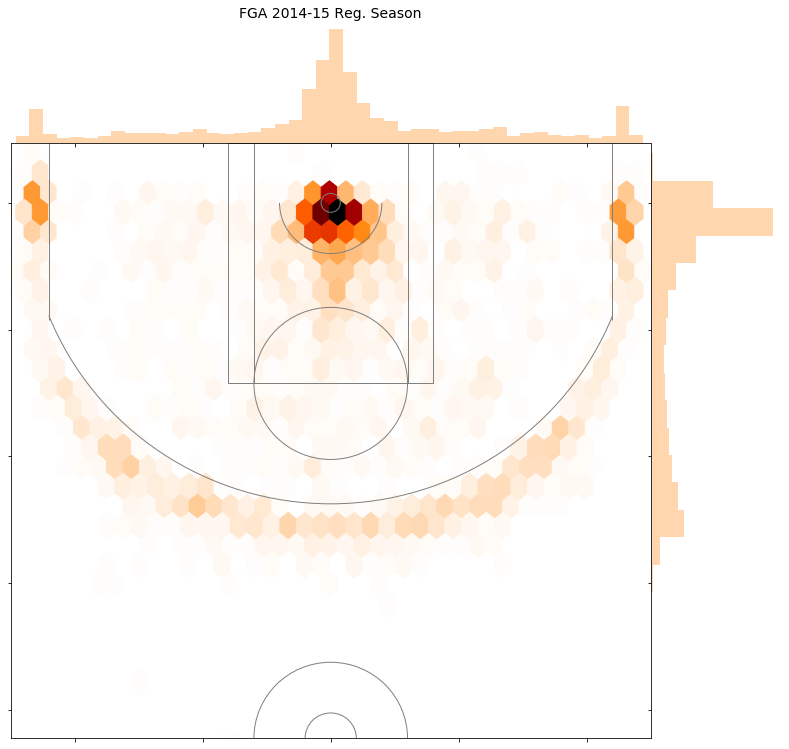

In [45]:
# create our jointplot

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(xtot, ytot, stat_func=None,
                                 kind='hex', space=0, color=cmap(.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('FGA 2014-15 Reg. Season', y=1.2, fontsize=14)

plt.show()

In [28]:
cmap(.2)

(1.0, 0.6000000000000001, 0.20000000000000018, 1.0)